# Separate runs by HKLE due to size limits

# Positions rounded to 1,000

In [1]:
tcgadata="TCGA/focused.1000.T.csv.gz"

In [2]:
gpmpdata="20210604-GPMP-GBM/focused.1000.T.csv.gz"

In [3]:
hkle='SVA_F'

['HERVK113', 'SVA_A', 'SVA_B', 'SVA_C', 'SVA_D', 'SVA_E', 'SVA_F']

Number of insertions detected needed to call insertion present

In [4]:
threshold=3

In [5]:
import numpy as np
np.__version__

'1.20.3'

In [6]:
import pandas as pd
pd.__version__

'1.2.4'

In [7]:
import matplotlib
matplotlib.__version__

'3.4.2'

In [8]:
import matplotlib.pyplot as plt

In [9]:
# Adjust plot size
#options(repr.plot.width=16, repr.plot.height=6)

# For some reason, if this is in the same cell as the import command, it doesn't work.
plt.rcParams["figure.figsize"] = [18.0,8.0]

In [10]:
import scipy
scipy.__version__

'1.6.3'

In [11]:
from scipy import stats

In [12]:
import seaborn as sns
sns.__version__

'0.11.1'

In [13]:
from datetime import datetime

In [14]:
import sklearn
sklearn.__version__

'0.24.2'

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [16]:
default_max_columns=pd.get_option('display.max_columns')

In [17]:
default_max_rows=pd.get_option('display.max_rows')

In [18]:
default_precision=pd.get_option('display.precision')

In [19]:
pd.set_option('display.precision', 2)

In [20]:
#default_threshold=np.get_printoptions()['threshold']

In [21]:
#np.set_printoptions(threshold=10000000)

# Read Metadata 1

In [22]:
mt1=pd.read_csv("TCGA/metadata.cart.TCGA.GBM-LGG.WGS.bam.2020-07-17.csv",header=None,
 names=['submitter','days_to_death','gender','disease_type','center_name'])

In [23]:
mt1.shape

(127, 5)

In [24]:
mt1.rename(columns={"submitter": "subject"},inplace=True)
mt1.rename(columns={"gender": "gender1"},inplace=True)

In [25]:
mt1 #.head()

subject  days_to_death gender1              disease_type  \
0    02-2483            NaN    male   Glioblastoma Multiforme   
1    02-2485            NaN    male   Glioblastoma Multiforme   
2    06-0125         1448.0  female   Glioblastoma Multiforme   
3    06-0152          375.0    male   Glioblastoma Multiforme   
4    06-0157           97.0  female   Glioblastoma Multiforme   
..       ...            ...     ...                       ...   
122  IK-7675          578.0    male  Brain Lower Grade Glioma   
123  TM-A7CF            NaN  female  Brain Lower Grade Glioma   
124  TQ-A7RK            NaN    male  Brain Lower Grade Glioma   
125  TQ-A7RV            NaN    male  Brain Lower Grade Glioma   
126  TQ-A8XE          954.0  female  Brain Lower Grade Glioma   

                            center_name  
0    Broad Institute of MIT and Harvard  
1    Broad Institute of MIT and Harvard  
2    Broad Institute of MIT and Harvard  
3    Broad Institute of MIT and Harvard  
4    Broad Institute of MIT and Harvard  
..                                  ...  
122  Broad Institute of MIT and Harvard  
123  Broad Institute of MIT and Harvard  
124  Broad Institute of MIT and Harvard  
125  Broad Institute of MIT and Harvard  
126  Broad Institute of MIT and Harvard  

[127 rows x 5 columns]

In [26]:
list(mt1)

['subject', 'days_to_death', 'gender1', 'disease_type', 'center_name']

# Read Metadata 2

In [27]:
mt2=pd.read_csv("TCGA/TCGA.Glioma.metadata.tsv",sep="\t")

In [28]:
mt2.shape

(1114, 18)

In [29]:
mt2.head()

case_submitter_id project_id primary_diagnosis   race  \
0      TCGA-02-0001   TCGA-GBM      Glioblastoma  white   
1      TCGA-02-0003   TCGA-GBM      Glioblastoma  white   
2      TCGA-02-0004   TCGA-GBM      Glioblastoma  white   
3      TCGA-02-0006   TCGA-GBM      Glioblastoma  white   
4      TCGA-02-0007   TCGA-GBM      Glioblastoma  white   

                ethnicity  gender RE_names IDH     x1p19q TERT  \
0  not hispanic or latino  female      NaN  WT  non-codel  NaN   
1  not hispanic or latino    male      NaN  WT  non-codel  NaN   
2  not hispanic or latino    male      NaN  WT        NaN  NaN   
3  not hispanic or latino  female      NaN  WT  non-codel  NaN   
4  not hispanic or latino  female      NaN  WT  non-codel  NaN   

         IDH_1p19q_status                           WHO_groups  \
0  IDH-WT:1p19q-non-codel  glioblastoma:IDH-WT:1p19q-non-codel   
1  IDH-WT:1p19q-non-codel  glioblastoma:IDH-WT:1p19q-non-codel   
2         IDH-WT:1p19q-NA                                  NaN   
3  IDH-WT:1p19q-non-codel  glioblastoma:IDH-WT:1p19q-non-codel   
4  IDH-WT:1p19q-non-codel  glioblastoma:IDH-WT:1p19q-non-codel   

                     Triple_group     Tissue_sample_location          MGMT  \
0  IDH-WT:1p19q-non-codel:TERT-NA  MD Anderson Cancer Center  Unmethylated   
1  IDH-WT:1p19q-non-codel:TERT-NA  MD Anderson Cancer Center  Unmethylated   
2         IDH-WT:1p19q-NA:TERT-NA  MD Anderson Cancer Center           NaN   
3  IDH-WT:1p19q-non-codel:TERT-NA  MD Anderson Cancer Center  Unmethylated   
4  IDH-WT:1p19q-non-codel:TERT-NA  MD Anderson Cancer Center  Unmethylated   

    Age  Survival_months  Vital_status  
0  44.0            11.76           1.0  
1  50.0             4.73           1.0  
2  59.0            11.33           1.0  
3  56.0            18.33           1.0  
4  40.0            23.16           1.0

In [30]:
list(mt2)

['case_submitter_id',
 'project_id',
 'primary_diagnosis',
 'race',
 'ethnicity',
 'gender',
 'RE_names',
 'IDH',
 'x1p19q',
 'TERT',
 'IDH_1p19q_status',
 'WHO_groups',
 'Triple_group',
 'Tissue_sample_location',
 'MGMT',
 'Age',
 'Survival_months',
 'Vital_status']

In [31]:
mt2['subject']=mt2['case_submitter_id'].astype(str).str[5:12]

In [32]:
mt2[['subject','case_submitter_id']].head()

subject case_submitter_id
0  02-0001      TCGA-02-0001
1  02-0003      TCGA-02-0003
2  02-0004      TCGA-02-0004
3  02-0006      TCGA-02-0006
4  02-0007      TCGA-02-0007

In [33]:
mt2.drop('case_submitter_id',axis='columns',inplace=True)
mt2.rename(columns={"gender": "gender2"},inplace=True)

In [34]:
list(mt2)

['project_id',
 'primary_diagnosis',
 'race',
 'ethnicity',
 'gender2',
 'RE_names',
 'IDH',
 'x1p19q',
 'TERT',
 'IDH_1p19q_status',
 'WHO_groups',
 'Triple_group',
 'Tissue_sample_location',
 'MGMT',
 'Age',
 'Survival_months',
 'Vital_status',
 'subject']

# Merge Metadata

In [35]:
meta=mt2.merge(mt1,on='subject',suffixes=["_mt2","_mt1"],how='inner')

In [36]:
del mt1
del mt2

In [37]:
meta.head()

project_id primary_diagnosis                       race  \
0   TCGA-GBM      Glioblastoma                      asian   
1   TCGA-GBM      Glioblastoma  black or african american   
2   TCGA-GBM      Glioblastoma                      white   
3   TCGA-GBM      Glioblastoma                      white   
4   TCGA-GBM      Glioblastoma                      white   

                ethnicity gender2                   RE_names     IDH  \
0  not hispanic or latino    male  02-2483-01A-01R-1849-01+1  Mutant   
1  not hispanic or latino    male  02-2485-01A-01R-1849-01+1      WT   
2  not hispanic or latino  female  06-0125-01A-01R-1849-01+1      WT   
3  not hispanic or latino    male                        NaN      WT   
4  not hispanic or latino  female  06-0157-01A-01R-1849-01+1      WT   

      x1p19q    TERT            IDH_1p19q_status  ...  \
0  non-codel      WT  IDH-Mutant:1p19q-non-codel  ...   
1  non-codel  Mutant      IDH-WT:1p19q-non-codel  ...   
2  non-codel  Mutant      IDH-WT:1p19q-non-codel  ...   
3  non-codel     NaN      IDH-WT:1p19q-non-codel  ...   
4  non-codel  Mutant      IDH-WT:1p19q-non-codel  ...   

      Tissue_sample_location          MGMT   Age Survival_months  \
0  MD Anderson Cancer Center    Methylated  43.0           15.31   
1  MD Anderson Cancer Center  Unmethylated  53.0           15.44   
2        Henry Ford Hospital    Methylated  63.0           47.57   
3        Henry Ford Hospital           NaN  68.0           12.32   
4        Henry Ford Hospital           NaN  63.0            3.19   

   Vital_status  subject  days_to_death gender1             disease_type  \
0           0.0  02-2483            NaN    male  Glioblastoma Multiforme   
1           0.0  02-2485            NaN    male  Glioblastoma Multiforme   
2           1.0  06-0125         1448.0  female  Glioblastoma Multiforme   
3           1.0  06-0152          375.0    male  Glioblastoma Multiforme   
4           1.0  06-0157           97.0  female  Glioblastoma Multiforme   

                          center_name  
0  Broad Institute of MIT and Harvard  
1  Broad Institute of MIT and Harvard  
2  Broad Institute of MIT and Harvard  
3  Broad Institute of MIT and Harvard  
4  Broad Institute of MIT and Harvard  

[5 rows x 22 columns]

In [38]:
meta.drop(meta[(meta['subject']=='CS-6186') & (meta['center_name']=='Harvard Medical School')].index,inplace=True)

In [39]:
meta.drop(meta[(meta['subject']=='DU-5872') & (meta['center_name']=='Harvard Medical School')].index,inplace=True)

In [40]:
meta.columns

Index(['project_id', 'primary_diagnosis', 'race', 'ethnicity', 'gender2',
       'RE_names', 'IDH', 'x1p19q', 'TERT', 'IDH_1p19q_status', 'WHO_groups',
       'Triple_group', 'Tissue_sample_location', 'MGMT', 'Age',
       'Survival_months', 'Vital_status', 'subject', 'days_to_death',
       'gender1', 'disease_type', 'center_name'],
      dtype='object')

In [41]:
meta['primary_diagnosis'].value_counts()

Glioblastoma                     35
Oligodendroglioma, NOS           33
Astrocytoma, anaplastic          24
Mixed glioma                     16
Astrocytoma, NOS                  9
Oligodendroglioma, anaplastic     8
Name: primary_diagnosis, dtype: int64

In [42]:
meta['TERT'].value_counts()

Mutant    68
WT        54
Name: TERT, dtype: int64

In [43]:
meta['IDH'].value_counts()

Mutant    74
WT        50
Name: IDH, dtype: int64

In [44]:
meta['x1p19q'].value_counts()

non-codel    102
codel         23
Name: x1p19q, dtype: int64

In [45]:
meta['disease_type'].value_counts()

Brain Lower Grade Glioma    90
Glioblastoma Multiforme     35
Name: disease_type, dtype: int64

In [46]:
meta['gender1'].value_counts()

male      72
female    53
Name: gender1, dtype: int64

In [47]:
meta['race'].value_counts()

white                        114
black or african american      7
not reported                   3
asian                          1
Name: race, dtype: int64

In [48]:
meta['ethnicity'].value_counts()

not hispanic or latino    108
not reported               11
hispanic or latino          6
Name: ethnicity, dtype: int64

In [49]:
meta['IDH_1p19q_status'].value_counts()

IDH-Mutant:1p19q-non-codel    51
IDH-WT:1p19q-non-codel        50
IDH-Mutant:1p19q-codel        23
IDH-NA:1p19q-non-codel         1
Name: IDH_1p19q_status, dtype: int64

In [50]:
meta['WHO_groups'].value_counts()

glioblastoma:IDH-WT:1p19q-non-codel             29
oligodendroglioma:IDH-Mutant:1p19q-codel        23
astrocytoma:IDH-Mutant:1p19q-non-codel          18
oligodendroglioma:IDH-Mutant:1p19q-non-codel    13
astrocytoma:IDH-WT:1p19q-non-codel              13
oligoastrocytoma:IDH-Mutant:1p19q-non-codel     11
glioblastoma:IDH-Mutant:1p19q-non-codel          5
oligoastrocytoma:IDH-WT:1p19q-non-codel          4
oligodendroglioma:IDH-WT:1p19q-non-codel         4
Name: WHO_groups, dtype: int64

In [51]:
meta['Triple_group'].value_counts()

IDH-Mutant:1p19q-non-codel:TERT-WT        49
IDH-WT:1p19q-non-codel:TERT-Mutant        44
IDH-Mutant:1p19q-codel:TERT-Mutant        22
IDH-WT:1p19q-non-codel:TERT-WT             4
IDH-WT:1p19q-non-codel:TERT-NA             2
IDH-Mutant:1p19q-non-codel:TERT-Mutant     1
IDH-NA:1p19q-non-codel:TERT-Mutant         1
IDH-Mutant:1p19q-codel:TERT-WT             1
IDH-Mutant:1p19q-non-codel:TERT-NA         1
Name: Triple_group, dtype: int64

In [52]:
meta['MGMT'].value_counts()

Methylated      87
Unmethylated    27
Name: MGMT, dtype: int64

In [53]:
meta['center_name'].value_counts()

Broad Institute of MIT and Harvard    75
Harvard Medical School                50
Name: center_name, dtype: int64

## We need a multi-level index to merge with df later so adding an empty index level

not anymore. I flatten before merging.

In [54]:
#meta.columns=[meta.columns,[''] * len(meta.columns)]

In [55]:
meta.columns

Index(['project_id', 'primary_diagnosis', 'race', 'ethnicity', 'gender2',
       'RE_names', 'IDH', 'x1p19q', 'TERT', 'IDH_1p19q_status', 'WHO_groups',
       'Triple_group', 'Tissue_sample_location', 'MGMT', 'Age',
       'Survival_months', 'Vital_status', 'subject', 'days_to_death',
       'gender1', 'disease_type', 'center_name'],
      dtype='object')

# Read raw TCGA data and cleanup

In [56]:
tcga_df=pd.read_csv(tcgadata,header=[0,1],index_col=[0,1,2,3])
tcga_df #.head()

chromosome                          chr1                                  \
position                         1048000 1190000 1308000 1409000 1410000   
sample      pup    hkle     mapq                                           
02-2483-01A paired HERVK113 Q20        0       0       0       4       1   
                   SVA_A    Q20        0       0       0       0       0   
                   SVA_B    Q20        0       0       0       0       0   
                   SVA_C    Q20        0       0       0       0       0   
                   SVA_D    Q20        0       0       0       0       0   
...                                  ...     ...     ...     ...     ...   
TQ-A8XE-10A paired SVA_B    Q20        0       0       0       0       0   
                   SVA_C    Q20        0       0       0       0       0   
                   SVA_D    Q20        0       0       0       0       0   
                   SVA_E    Q20        0       0       0       0       0   
                   SVA_F    Q20        0       0       0       0       0   

chromosome                                                                ...  \
position                         1580000 1581000 2211000 2513000 2581000  ...   
sample      pup    hkle     mapq                                          ...   
02-2483-01A paired HERVK113 Q20        4       0       0       0       0  ...   
                   SVA_A    Q20        0       0       0       0       0  ...   
                   SVA_B    Q20        0       0       0       0       0  ...   
                   SVA_C    Q20        0       0       0       0       0  ...   
                   SVA_D    Q20        0       0       0       0       0  ...   
...                                  ...     ...     ...     ...     ...  ...   
TQ-A8XE-10A paired SVA_B    Q20        0       0       0       0       0  ...   
                   SVA_C    Q20        0       0       0       0       0  ...   
                   SVA_D    Q20        0       0       0       0       0  ...   
                   SVA_E    Q20        0       0       0       0       0  ...   
                   SVA_F    Q20        0       0       0       0       0  ...   

chromosome                           chrY                                      \
position                         19535000 19536000 19699000 19700000 20552000   
sample      pup    hkle     mapq                                                
02-2483-01A paired HERVK113 Q20         0        0        2        0        0   
                   SVA_A    Q20         0        0        0        0        0   
                   SVA_B    Q20         0        0        0        0        0   
                   SVA_C    Q20         0        0        0        0        0   
                   SVA_D    Q20         0        0        0        0        0   
...                                   ...      ...      ...      ...      ...   
TQ-A8XE-10A paired SVA_B    Q20         0        0        0        0        0   
                   SVA_C    Q20         0        0        0        0        0   
                   SVA_D    Q20         0        0        0        0        0   
                   SVA_E    Q20         0        0        0        0        0   
                   SVA_F    Q20         0        0        0        0        0   

chromosome                                                                     
position                         20553000 20976000 21047000 21217000 21639000  
sample      pup    hkle     mapq                                               
02-2483-01A paired HERVK113 Q20         0        0        0        0        0  
                   SVA_A    Q20         0        0        0        0        0  
                   SVA_B    Q20         0        0        0        0        0  
                   SVA_C    Q20         0        0        0        0        0  
                   SVA_D    Q20         0        0        0        0        0  
...                      

In [57]:
tcga_df.reset_index(inplace=True)
tcga_df.head()

chromosome       sample     pup      hkle mapq    chr1                  \
position                                       1048000 1190000 1308000   
0           02-2483-01A  paired  HERVK113  Q20       0       0       0   
1           02-2483-01A  paired     SVA_A  Q20       0       0       0   
2           02-2483-01A  paired     SVA_B  Q20       0       0       0   
3           02-2483-01A  paired     SVA_C  Q20       0       0       0   
4           02-2483-01A  paired     SVA_D  Q20       0       0       0   

chromosome                          ...     chrY                             \
position   1409000 1410000 1580000  ... 19535000 19536000 19699000 19700000   
0                4       1       4  ...        0        0        2        0   
1                0       0       0  ...        0        0        0        0   
2                0       0       0  ...        0        0        0        0   
3                0       0       0  ...        0        0        0        0   
4                0       0       0  ...        0        0        0        0   

chromosome                                                        
position   20552000 20553000 20976000 21047000 21217000 21639000  
0                 0        0        0        0        0        0  
1                 0        0        0        0        0        0  
2                 0        0        0        0        0        0  
3                 0        0        0        0        0        0  
4                 0        0        0        0        0        0  

[5 rows x 17413 columns]

In [58]:
tcga_df['subject']=tcga_df['sample'].str[0:7]
tcga_df['subject']

0       02-2483
1       02-2483
2       02-2483
3       02-2483
4       02-2483
         ...   
1913    TQ-A8XE
1914    TQ-A8XE
1915    TQ-A8XE
1916    TQ-A8XE
1917    TQ-A8XE
Name: subject, Length: 1918, dtype: object

In [59]:
tcga_df.columns

MultiIndex([( 'sample',         ''),
            (    'pup',         ''),
            (   'hkle',         ''),
            (   'mapq',         ''),
            (   'chr1',  '1048000'),
            (   'chr1',  '1190000'),
            (   'chr1',  '1308000'),
            (   'chr1',  '1409000'),
            (   'chr1',  '1410000'),
            (   'chr1',  '1580000'),
            ...
            (   'chrY', '19536000'),
            (   'chrY', '19699000'),
            (   'chrY', '19700000'),
            (   'chrY', '20552000'),
            (   'chrY', '20553000'),
            (   'chrY', '20976000'),
            (   'chrY', '21047000'),
            (   'chrY', '21217000'),
            (   'chrY', '21639000'),
            ('subject',         '')],
           names=['chromosome', 'position'], length=17414)

In [60]:
tcga_df=tcga_df[tcga_df['hkle']==hkle]
tcga_df.head()

chromosome       sample     pup   hkle mapq    chr1                          \
position                                    1048000 1190000 1308000 1409000   
6           02-2483-01A  paired  SVA_F  Q20       0       0       0       0   
13          02-2483-10A  paired  SVA_F  Q20       0       0       0       0   
20          02-2485-01A  paired  SVA_F  Q20       0       0       0       0   
27          02-2485-10A  paired  SVA_F  Q20       0       0       0       0   
34          06-0125-01A  paired  SVA_F  Q20       0       0       0       0   

chromosome                  ...     chrY                                      \
position   1410000 1580000  ... 19536000 19699000 19700000 20552000 20553000   
6                0       0  ...        0        0        0        0        0   
13               0       0  ...        0        0        0        0        0   
20               0       0  ...        0        0        0        0        0   
27               0       0  ...        0        0        0        0        0   
34               0       0  ...        0        0        0        0        0   

chromosome                                      subject  
position   20976000 21047000 21217000 21639000           
6                 0        0        0        0  02-2483  
13                0        0        0        0  02-2483  
20                0        0        1        0  02-2485  
27                0        0        0        0  02-2485  
34                0        0        0        0  06-0125  

[5 rows x 17414 columns]

In [61]:
tcga_df.set_index(['subject','sample','pup','hkle','mapq'],inplace=True)
tcga_df.head()

chromosome                               chr1                                  \
position                              1048000 1190000 1308000 1409000 1410000   
subject sample      pup    hkle  mapq                                           
02-2483 02-2483-01A paired SVA_F Q20        0       0       0       0       0   
        02-2483-10A paired SVA_F Q20        0       0       0       0       0   
02-2485 02-2485-01A paired SVA_F Q20        0       0       0       0       0   
        02-2485-10A paired SVA_F Q20        0       0       0       0       0   
06-0125 06-0125-01A paired SVA_F Q20        0       0       0       0       0   

chromosome                                                                     \
position                              1580000 1581000 2211000 2513000 2581000   
subject sample      pup    hkle  mapq                                           
02-2483 02-2483-01A paired SVA_F Q20        0       0       0       0       0   
        02-2483-10A paired SVA_F Q20        0       0       0       0       0   
02-2485 02-2485-01A paired SVA_F Q20        0       0       0       0       0   
        02-2485-10A paired SVA_F Q20        0       0       0       0       0   
06-0125 06-0125-01A paired SVA_F Q20        0       0       0       0       0   

chromosome                             ...     chrY                    \
position                               ... 19535000 19536000 19699000   
subject sample      pup    hkle  mapq  ...                              
02-2483 02-2483-01A paired SVA_F Q20   ...        0        0        0   
        02-2483-10A paired SVA_F Q20   ...        0        0        0   
02-2485 02-2485-01A paired SVA_F Q20   ...        0        0        0   
        02-2485-10A paired SVA_F Q20   ...        0        0        0   
06-0125 06-0125-01A paired SVA_F Q20   ...        0        0        0   

chromosome                                                                 \
position                              19700000 20552000 20553000 20976000   
subject sample      pup    hkle  mapq                                       
02-2483 02-2483-01A paired SVA_F Q20         0        0        0        0   
        02-2483-10A paired SVA_F Q20         0        0        0        0   
02-2485 02-2485-01A paired SVA_F Q20         0        0        0        0   
        02-2485-10A paired SVA_F Q20         0        0        0        0   
06-0125 06-0125-01A paired SVA_F Q20         0        0        0        0   

chromosome                                                        
position                              21047000 21217000 21639000  
subject sample      pup    hkle  mapq                             
02-2483 02-2483-01A paired SVA_F Q20         0        0        0  
        02-2483-10A paired SVA_F Q20         0        0        0  
02-2485 02-2485-01A paired SVA_F Q20         0        1        0  
        02-2485-10A paired SVA_F Q20         0        0        0  
06-0125 06-0125-01A paired SVA_F Q20         0        0        0  

[5 rows x 17409 columns]

In [62]:
tcga_df.shape

(274, 17409)

## Remove "hkle", "pup" and "q" as they are useless in this dataset.

In [63]:
tcga_df=tcga_df.droplevel('pup',axis='index').droplevel('mapq',axis='index').droplevel('hkle',axis='index')

In [64]:
tcga_df #.head()

chromosome             chr1                                                  \
position            1048000 1190000 1308000 1409000 1410000 1580000 1581000   
subject sample                                                                
02-2483 02-2483-01A       0       0       0       0       0       0       0   
        02-2483-10A       0       0       0       0       0       0       0   
02-2485 02-2485-01A       0       0       0       0       0       0       0   
        02-2485-10A       0       0       0       0       0       0       0   
06-0125 06-0125-01A       0       0       0       0       0       0       0   
...                     ...     ...     ...     ...     ...     ...     ...   
TQ-A7RV TQ-A7RV-02A       0       0       0       0       0       0       0   
        TQ-A7RV-10A       0       0       0       0       0       0       0   
TQ-A8XE TQ-A8XE-01A       0       0       0       0       0       0       0   
        TQ-A8XE-02A       0       0       0       0       0       0       0   
        TQ-A8XE-10A       0       0       0       0       0       0       0   

chromosome                                   ...     chrY                    \
position            2211000 2513000 2581000  ... 19535000 19536000 19699000   
subject sample                               ...                              
02-2483 02-2483-01A       0       0       0  ...        0        0        0   
        02-2483-10A       0       0       0  ...        0        0        0   
02-2485 02-2485-01A       0       0       0  ...        0        0        0   
        02-2485-10A       0       0       0  ...        0        0        0   
06-0125 06-0125-01A       0       0       0  ...        0        0        0   
...                     ...     ...     ...  ...      ...      ...      ...   
TQ-A7RV TQ-A7RV-02A       0       0       0  ...        0        0        0   
        TQ-A7RV-10A       0       0       0  ...        0        0        0   
TQ-A8XE TQ-A8XE-01A       0       0       0  ...        0        0        0   
        TQ-A8XE-02A       0       0       0  ...        0        0        0   
        TQ-A8XE-10A       0       0       0  ...        0        0        0   

chromosome                                                                 \
position            19700000 20552000 20553000 20976000 21047000 21217000   
subject sample                                                              
02-2483 02-2483-01A        0        0        0        0        0        0   
        02-2483-10A        0        0        0        0        0        0   
02-2485 02-2485-01A        0        0        0        0        0        1   
        02-2485-10A        0        0        0        0        0        0   
06-0125 06-0125-01A        0        0        0        0        0        0   
...                      ...      ...      ...      ...      ...      ...   
TQ-A7RV TQ-A7RV-02A        0        0        0        0        0        0   
        TQ-A7RV-10A        0        0        0        0        0        1   
TQ-A8XE TQ-A8XE-01A        0        0        0        0        0        0   
        TQ-A8XE-02A        0        0        0        0        0        0   
        TQ-A8XE-10A        0        0        0        0        0        0   

chromosome                    
position            21639000  
subject sample                
02-2483 02-2483-01A        0  
        02-2483-10A        0  
02-2485 02-2485-01A        0  
        02-2485-10A        0  
06-0125 06-0125-01A        0  
...                      ...  
TQ-A7RV TQ-A7RV-02A        0  
        TQ-A7RV-10A        0  
TQ-A8XE TQ-A8XE-01A        0  
        TQ-A8XE-02A        0  
        TQ-A8XE-10A        0  

[274 rows x 17409 columns]

In [65]:
tcga_df.shape

(274, 17409)

## Drop recurrent tumor (-02?)

In [66]:
tcga_df.loc[tcga_df.index.get_level_values('sample').str.contains("-02.$")].index

MultiIndex([('06-0125', '06-0125-02A'),
            ('06-0152', '06-0152-02A'),
            ('06-0171', '06-0171-02A'),
            ('06-0190', '06-0190-02A'),
            ('06-0210', '06-0210-02A'),
            ('06-0211', '06-0211-02A'),
            ('06-0221', '06-0221-02A'),
            ('14-1034', '14-1034-02B'),
            ('14-1402', '14-1402-02A'),
            ('19-1389', '19-1389-02A'),
            ('DH-A669', 'DH-A669-02A'),
            ('DU-5870', 'DU-5870-02A'),
            ('DU-5872', 'DU-5872-02A'),
            ('DU-6397', 'DU-6397-02A'),
            ('DU-6404', 'DU-6404-02A'),
            ('DU-6404', 'DU-6404-02B'),
            ('DU-6407', 'DU-6407-02A'),
            ('DU-6407', 'DU-6407-02B'),
            ('DU-7304', 'DU-7304-02A'),
            ('FG-5965', 'FG-5965-02A'),
            ('FG-5965', 'FG-5965-02B'),
            ('FG-A4MT', 'FG-A4MT-02A'),
            ('TM-A7CF', 'TM-A7CF-02A'),
            ('TQ-A7RK', 'TQ-A7RK-02A'),
            ('TQ-A7RK', 'TQ-A7RK-02B'),


In [67]:
tcga_df.drop(tcga_df.loc[tcga_df.index.get_level_values('sample').str.contains("-02.$")].index,axis='index',inplace=True)

In [68]:
tcga_df.loc[tcga_df.index.get_level_values('sample').str.contains("-02.$")].index

MultiIndex([], names=['subject', 'sample'])

## Drop solid normal (-11?) (I've seen a couple)

In [69]:
tcga_df.loc[tcga_df.index.get_level_values('sample').str.contains("-11.$")].index

MultiIndex([('FG-5963', 'FG-5963-11A')],
           names=['subject', 'sample'])

In [70]:
tcga_df.drop(tcga_df.loc[tcga_df.index.get_level_values('sample').str.contains("-11.$")].index,axis='index',inplace=True)

In [71]:
tcga_df.loc[tcga_df.index.get_level_values('sample').str.contains("-11.$")].index

MultiIndex([], names=['subject', 'sample'])

## Drop solitary tumor / normal ( not sure how to do this programmatically )

* FG-5963-01A
* CS-5390-10A

In [72]:
tcga_df.loc[tcga_df.index.get_level_values('sample') == 'FG-5963-01A'].index

MultiIndex([('FG-5963', 'FG-5963-01A')],
           names=['subject', 'sample'])

In [73]:
tcga_df.drop(tcga_df.loc[tcga_df.index.get_level_values('sample') == 'FG-5963-01A'].index,axis='index',inplace=True)

In [74]:
tcga_df.loc[tcga_df.index.get_level_values('sample') == 'FG-5963-01A'].index

MultiIndex([], names=['subject', 'sample'])

In [75]:
tcga_df.loc[tcga_df.index.get_level_values('sample') == "CS-5390-10A"].index

MultiIndex([('CS-5390', 'CS-5390-10A')],
           names=['subject', 'sample'])

In [76]:
tcga_df.drop(tcga_df.loc[tcga_df.index.get_level_values('sample') == "CS-5390-10A"].index,axis='index',inplace=True)

In [77]:
tcga_df.loc[tcga_df.index.get_level_values('sample') == "CS-5390-10A"].index

MultiIndex([], names=['subject', 'sample'])

# Match earlier HERVK113 notebook counts
* CS-5390-10A - 553
* FG-5963-01A - 68
* CS-6186-01A - 1100
* CS-6186-10A - 950
* DU-5872-01A - 1108
* DU-5872-10A - 776
* 02-2483-01A - 568
* 02-2483-10A - 557
* 02-2485-01A - 587
* 02-2485-10A - 498
* 06-0125-01A - 734

In [78]:
tcga_df[tcga_df[tcga_df.columns]>0].count(axis='columns')['CS-6186','CS-6186-01A']

1784

In [79]:
tcga_df[tcga_df[tcga_df.columns]>0].count(axis='columns')['CS-6186','CS-6186-10A']

1512

In [80]:
tcga_df[tcga_df[tcga_df.columns]>0].count(axis='columns')['DU-5872','DU-5872-01A']

2285

In [81]:
tcga_df[tcga_df[tcga_df.columns]>0].count(axis='columns')['DU-5872','DU-5872-10A']

1547

## Keep only Broad and drop Harvard Medical School

### Harvard's samples were really low coverage?

In [82]:
meta[meta['center_name'] == 'Broad Institute of MIT and Harvard']['subject'].unique()


array(['02-2483', '02-2485', '06-0125', '06-0152', '06-0157', '06-0171',
       '06-0190', '06-0210', '06-0211', '06-0214', '06-0221', '06-0686',
       '06-0744', '06-0745', '06-2557', '06-2570', '06-5411', '06-5415',
       '14-1034', '14-1402', '14-1823', '14-2554', '15-1444', '19-1389',
       '19-2620', '19-2624', '19-2629', '19-5960', '26-5132', '26-5135',
       '27-1831', '27-2523', '27-2528', '32-1970', '41-5651', 'CS-5390',
       'CS-5395', 'CS-6186', 'CS-6665', 'CS-6668', 'CS-6669', 'DB-5278',
       'DH-A669', 'DU-5870', 'DU-5872', 'DU-5874', 'DU-6397', 'DU-6401',
       'DU-6404', 'DU-6407', 'DU-7009', 'DU-7013', 'DU-7301', 'DU-7304',
       'E1-5318', 'E1-5319', 'EZ-7264', 'FG-5964', 'FG-5965', 'FG-7643',
       'FG-8182', 'FG-A4MT', 'HT-7602', 'HT-7689', 'HT-7695', 'HT-8104',
       'HT-A5R7', 'HT-A61B', 'HW-7486', 'HW-7487', 'IK-7675', 'TM-A7CF',
       'TQ-A7RK', 'TQ-A7RV', 'TQ-A8XE'], dtype=object)

In [83]:
tcga_df.index.get_level_values('subject')


Index(['02-2483', '02-2483', '02-2485', '02-2485', '06-0125', '06-0125',
       '06-0157', '06-0157', '06-0171', '06-0171',
       ...
       'IK-7675', 'IK-7675', 'TM-A7CF', 'TM-A7CF', 'TQ-A7RK', 'TQ-A7RK',
       'TQ-A7RV', 'TQ-A7RV', 'TQ-A8XE', 'TQ-A8XE'],
      dtype='object', name='subject', length=244)

In [84]:
tcga_df.index.get_level_values('subject').isin(
    meta[meta['center_name'] == 'Broad Institute of MIT and Harvard']['subject'].unique())


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False,  True,  True, False, False,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True, False, False,
       False, False,  True,  True, False, False, False, False, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True, False, False,  True,  True, False, False,
       False, False,

In [85]:
tcga_df=tcga_df[tcga_df.index.get_level_values('subject').isin(
    meta[meta['center_name'] == 'Broad Institute of MIT and Harvard']['subject'].unique())]
tcga_df #.head()


chromosome             chr1                                                  \
position            1048000 1190000 1308000 1409000 1410000 1580000 1581000   
subject sample                                                                
02-2483 02-2483-01A       0       0       0       0       0       0       0   
        02-2483-10A       0       0       0       0       0       0       0   
02-2485 02-2485-01A       0       0       0       0       0       0       0   
        02-2485-10A       0       0       0       0       0       0       0   
06-0125 06-0125-01A       0       0       0       0       0       0       0   
...                     ...     ...     ...     ...     ...     ...     ...   
TQ-A7RK TQ-A7RK-10A       0       0       0       0       0       0       0   
TQ-A7RV TQ-A7RV-01A       0       0       0       0       0       0       0   
        TQ-A7RV-10A       0       0       0       0       0       0       0   
TQ-A8XE TQ-A8XE-01A       0       0       0       0       0       0       0   
        TQ-A8XE-10A       0       0       0       0       0       0       0   

chromosome                                   ...     chrY                    \
position            2211000 2513000 2581000  ... 19535000 19536000 19699000   
subject sample                               ...                              
02-2483 02-2483-01A       0       0       0  ...        0        0        0   
        02-2483-10A       0       0       0  ...        0        0        0   
02-2485 02-2485-01A       0       0       0  ...        0        0        0   
        02-2485-10A       0       0       0  ...        0        0        0   
06-0125 06-0125-01A       0       0       0  ...        0        0        0   
...                     ...     ...     ...  ...      ...      ...      ...   
TQ-A7RK TQ-A7RK-10A       0       0       0  ...        0        0        0   
TQ-A7RV TQ-A7RV-01A       0       0       0  ...        0        0        0   
        TQ-A7RV-10A       0       0       0  ...        0        0        0   
TQ-A8XE TQ-A8XE-01A       0       0       0  ...        0        0        0   
        TQ-A8XE-10A       0       0       0  ...        0        0        0   

chromosome                                                                 \
position            19700000 20552000 20553000 20976000 21047000 21217000   
subject sample                                                              
02-2483 02-2483-01A        0        0        0        0        0        0   
        02-2483-10A        0        0        0        0        0        0   
02-2485 02-2485-01A        0        0        0        0        0        1   
        02-2485-10A        0        0        0        0        0        0   
06-0125 06-0125-01A        0        0        0        0        0        0   
...                      ...      ...      ...      ...      ...      ...   
TQ-A7RK TQ-A7RK-10A        0        0        0        0        0        0   
TQ-A7RV TQ-A7RV-01A        0        0        0        0        0        0   
        TQ-A7RV-10A        0        0        0        0        0        1   
TQ-A8XE TQ-A8XE-01A        0        0        0        0        0        0   
        TQ-A8XE-10A        0        0        0        0        0        0   

chromosome                    
position            21639000  
subject sample                
02-2483 02-2483-01A        0  
        02-2483-10A        0  
02-2485 02-2485-01A        0  
        02-2485-10A        0  
06-0125 06-0125-01A        0  
...                      ...  
TQ-A7RK TQ-A7RK-10A        0  
TQ-A7RV TQ-A7RV-01A        0  
        TQ-A7RV-10A        0  
TQ-A8XE TQ-A8XE-01A        0  
        TQ-A8XE-10A        0  

[146 rows x 17409 columns]

In [86]:
tcga_df.shape

(146, 17409)

# NORMALIZE INSERTION POINTS BY ( * 1,000,000,000 / READ COUNT )

In [87]:
tcga_counts=pd.read_csv("TCGA/TCGA_raw_counts.csv")
tcga_counts.rename(columns={"subject": "sample"},inplace=True)
tcga_counts.head()

sample  raw pair count
0  02-2483-01A       566024474
1  02-2483-10A       579304076
2  02-2485-01A       575060540
3  02-2485-10A       478851061
4  06-0125-01A      1066268796

In [88]:
tcga_df.reset_index(inplace=True)
tcga_df.columns= [' '.join(col).strip() for col in tcga_df.columns.values]
tcga_df=tcga_df.merge(tcga_counts,on='sample')
tcga_df.set_index(['subject','sample'],inplace=True)
tcga_df.head()

chr1 1048000  chr1 1190000  chr1 1308000  chr1 1409000  \
subject sample                                                                
02-2483 02-2483-01A             0             0             0             0   
        02-2483-10A             0             0             0             0   
02-2485 02-2485-01A             0             0             0             0   
        02-2485-10A             0             0             0             0   
06-0125 06-0125-01A             0             0             0             0   

                     chr1 1410000  chr1 1580000  chr1 1581000  chr1 2211000  \
subject sample                                                                
02-2483 02-2483-01A             0             0             0             0   
        02-2483-10A             0             0             0             0   
02-2485 02-2485-01A             0             0             0             0   
        02-2485-10A             0             0             0             0   
06-0125 06-0125-01A             0             0             0             0   

                     chr1 2513000  chr1 2581000  ...  chrY 19536000  \
subject sample                                   ...                  
02-2483 02-2483-01A             0             0  ...              0   
        02-2483-10A             0             0  ...              0   
02-2485 02-2485-01A             0             0  ...              0   
        02-2485-10A             0             0  ...              0   
06-0125 06-0125-01A             0             0  ...              0   

                     chrY 19699000  chrY 19700000  chrY 20552000  \
subject sample                                                     
02-2483 02-2483-01A              0              0              0   
        02-2483-10A              0              0              0   
02-2485 02-2485-01A              0              0              0   
        02-2485-10A              0              0              0   
06-0125 06-0125-01A              0              0              0   

                     chrY 20553000  chrY 20976000  chrY 21047000  \
subject sample                                                     
02-2483 02-2483-01A              0              0              0   
        02-2483-10A              0              0              0   
02-2485 02-2485-01A              0              0              0   
        02-2485-10A              0              0              0   
06-0125 06-0125-01A              0              0              0   

                     chrY 21217000  chrY 21639000  raw pair count  
subject sample                                                     
02-2483 02-2483-01A              0              0       566024474  
        02-2483-10A              0              0       579304076  
02-2485 02-2485-01A              1              0       575060540  
        02-2485-10A              0              0       478851061  
06-0125 06-0125-01A              0              0      1066268796  

[5 rows x 17410 columns]

In [89]:
tcga_df[tcga_df.columns[tcga_df.columns.str.contains("^chr")]]=(
    1e9*tcga_df[tcga_df.columns[tcga_df.columns.str.contains("^chr")]].values)/tcga_df[['raw pair count']].values


In [90]:
tcga_df.drop('raw pair count',axis='columns',inplace=True)
tcga_df.head()

chr1 1048000  chr1 1190000  chr1 1308000  chr1 1409000  \
subject sample                                                                
02-2483 02-2483-01A           0.0           0.0           0.0           0.0   
        02-2483-10A           0.0           0.0           0.0           0.0   
02-2485 02-2485-01A           0.0           0.0           0.0           0.0   
        02-2485-10A           0.0           0.0           0.0           0.0   
06-0125 06-0125-01A           0.0           0.0           0.0           0.0   

                     chr1 1410000  chr1 1580000  chr1 1581000  chr1 2211000  \
subject sample                                                                
02-2483 02-2483-01A           0.0           0.0           0.0           0.0   
        02-2483-10A           0.0           0.0           0.0           0.0   
02-2485 02-2485-01A           0.0           0.0           0.0           0.0   
        02-2485-10A           0.0           0.0           0.0           0.0   
06-0125 06-0125-01A           0.0           0.0           0.0           0.0   

                     chr1 2513000  chr1 2581000  ...  chrY 19535000  \
subject sample                                   ...                  
02-2483 02-2483-01A           0.0           0.0  ...            0.0   
        02-2483-10A           0.0           0.0  ...            0.0   
02-2485 02-2485-01A           0.0           0.0  ...            0.0   
        02-2485-10A           0.0           0.0  ...            0.0   
06-0125 06-0125-01A           0.0           0.0  ...            0.0   

                     chrY 19536000  chrY 19699000  chrY 19700000  \
subject sample                                                     
02-2483 02-2483-01A            0.0            0.0            0.0   
        02-2483-10A            0.0            0.0            0.0   
02-2485 02-2485-01A            0.0            0.0            0.0   
        02-2485-10A            0.0            0.0            0.0   
06-0125 06-0125-01A            0.0            0.0            0.0   

                     chrY 20552000  chrY 20553000  chrY 20976000  \
subject sample                                                     
02-2483 02-2483-01A            0.0            0.0            0.0   
        02-2483-10A            0.0            0.0            0.0   
02-2485 02-2485-01A            0.0            0.0            0.0   
        02-2485-10A            0.0            0.0            0.0   
06-0125 06-0125-01A            0.0            0.0            0.0   

                     chrY 21047000  chrY 21217000  chrY 21639000  
subject sample                                                    
02-2483 02-2483-01A            0.0           0.00            0.0  
        02-2483-10A            0.0           0.00            0.0  
02-2485 02-2485-01A            0.0           1.74            0.0  
        02-2485-10A            0.0           0.00            0.0  
06-0125 06-0125-01A            0.0           0.00            0.0  

[5 rows x 17409 columns]

# New technique. Separate the tumor and normal counts.
### Remove the sample column
### DO NOT RESHAPE

In [91]:
n=tcga_df.copy()    # NORMAL
#t=tcga_df.copy()    # TUMOR

In [92]:
n.drop(n.loc[n.index.get_level_values('sample').str.contains("-01.$")].index,axis='index',inplace=True)
#t.drop(t.loc[t.index.get_level_values('sample').str.contains("-10.$")].index,axis='index',inplace=True)

In [93]:
n=n.droplevel('sample',axis='index')
#t=t.droplevel('sample',axis='index')

In [94]:
n.head()

chr1 1048000  chr1 1190000  chr1 1308000  chr1 1409000  chr1 1410000  \
subject                                                                         
02-2483           0.0           0.0           0.0           0.0           0.0   
02-2485           0.0           0.0           0.0           0.0           0.0   
06-0125           0.0           0.0           0.0           0.0           0.0   
06-0157           0.0           0.0           0.0           0.0           0.0   
06-0171           0.0           0.0           0.0           0.0           0.0   

         chr1 1580000  chr1 1581000  chr1 2211000  chr1 2513000  chr1 2581000  \
subject                                                                         
02-2483           0.0           0.0           0.0           0.0           0.0   
02-2485           0.0           0.0           0.0           0.0           0.0   
06-0125           0.0           0.0           0.0           0.0           0.0   
06-0157           0.0           0.0           0.0           0.0           0.0   
06-0171           0.0           0.0           0.0           0.0           0.0   

         ...  chrY 19535000  chrY 19536000  chrY 19699000  chrY 19700000  \
subject  ...                                                               
02-2483  ...            0.0            0.0            0.0            0.0   
02-2485  ...            0.0            0.0            0.0            0.0   
06-0125  ...            0.0            0.0            0.0            0.0   
06-0157  ...            0.0            0.0            0.0            0.0   
06-0171  ...            0.0            0.0            0.0            0.0   

         chrY 20552000  chrY 20553000  chrY 20976000  chrY 21047000  \
subject                                                               
02-2483            0.0            0.0            0.0           0.00   
02-2485            0.0            0.0            0.0           0.00   
06-0125            0.0            0.0            0.0           0.00   
06-0157            0.0            0.0            0.0           0.00   
06-0171            0.0            0.0            0.0           1.39   

         chrY 21217000  chrY 21639000  
subject                                
02-2483            0.0            0.0  
02-2485            0.0            0.0  
06-0125            0.0            0.0  
06-0157            0.0            0.0  
06-0171            0.0            0.0  

[5 rows x 17409 columns]

In [95]:
#t.head()

In [96]:
#n_index=n.index
#t_index=t.index

### Compare the indexes. An empty array shows that the indexes are the same. Yay.

In [97]:
#n_index[n_index != t_index]

In [98]:
#ngtet=(n>=threshold)
#tgtet=(t>=threshold)
#
#compdf=((((ngtet)^(tgtet))&(tgtet)).replace([False,True],[0,1]) - 
#        (((ngtet)^(tgtet))&(ngtet)).replace([False,True],[0,1]))

# Tumor only. Could have filtered earlier but here is good too.

In [99]:
#compdf=(t>=threshold).replace([False,True],[0,1])

# Normal only. Could have filtered earlier but here is good too.

In [100]:
compdf=(n>=threshold).replace([False,True],[0,1])

In [101]:
compdf.head()

chr1 1048000  chr1 1190000  chr1 1308000  chr1 1409000  chr1 1410000  \
subject                                                                         
02-2483             0             0             0             0             0   
02-2485             0             0             0             0             0   
06-0125             0             0             0             0             0   
06-0157             0             0             0             0             0   
06-0171             0             0             0             0             0   

         chr1 1580000  chr1 1581000  chr1 2211000  chr1 2513000  chr1 2581000  \
subject                                                                         
02-2483             0             0             0             0             0   
02-2485             0             0             0             0             0   
06-0125             0             0             0             0             0   
06-0157             0             0             0             0             0   
06-0171             0             0             0             0             0   

         ...  chrY 19535000  chrY 19536000  chrY 19699000  chrY 19700000  \
subject  ...                                                               
02-2483  ...              0              0              0              0   
02-2485  ...              0              0              0              0   
06-0125  ...              0              0              0              0   
06-0157  ...              0              0              0              0   
06-0171  ...              0              0              0              0   

         chrY 20552000  chrY 20553000  chrY 20976000  chrY 21047000  \
subject                                                               
02-2483              0              0              0              0   
02-2485              0              0              0              0   
06-0125              0              0              0              0   
06-0157              0              0              0              0   
06-0171              0              0              0              0   

         chrY 21217000  chrY 21639000  
subject                                
02-2483              0              0  
02-2485              0              0  
06-0125              0              0  
06-0157              0              0  
06-0171              0              0  

[5 rows x 17409 columns]

In [102]:
compdf.shape

(73, 17409)

### Keep only positions with any sample with something other than 0

In [103]:
compdf=compdf.loc[:, (compdf != 0).any(axis=0)]

In [104]:
compdf.shape

(73, 3030)

In [105]:
compdf.head()

chr1 3315000  chr1 6304000  chr1 6306000  chr1 6716000  chr1 7600000  \
subject                                                                         
02-2483             0             0             0             1             0   
02-2485             0             0             0             0             1   
06-0125             0             0             0             0             0   
06-0157             0             0             0             0             0   
06-0171             0             0             0             0             0   

         chr1 7601000  chr1 7602000  chr1 7952000  chr1 8503000  chr1 8912000  \
subject                                                                         
02-2483             0             0             0             0             0   
02-2485             0             0             0             0             0   
06-0125             0             0             0             0             0   
06-0157             0             0             0             0             0   
06-0171             0             0             0             0             0   

         ...  chrX 151598000  chrX 155223000  chrX 155907000  chrX 155908000  \
subject  ...                                                                   
02-2483  ...               0               0               0               0   
02-2485  ...               1               0               0               0   
06-0125  ...               0               0               0               0   
06-0157  ...               1               0               1               0   
06-0171  ...               0               0               0               0   

         chrY 4294000  chrY 4296000  chrY 8917000  chrY 12878000  \
subject                                                            
02-2483             0             0             0              0   
02-2485             1             0             0              0   
06-0125             0             0             0              0   
06-0157             0             0             0              0   
06-0171             0             0             0              0   

         chrY 12879000  chrY 21217000  
subject                                
02-2483              0              0  
02-2485              0              0  
06-0125              0              0  
06-0157              0              0  
06-0171              0              0  

[5 rows x 3030 columns]

### Get the chromosome columns for analysis after merging with the metadata

In [106]:
#chromosome_columns=compdf.columns[compdf.columns.get_level_values('chromosome').str.contains("^chr")]
#chromosome_columns

### Merge with the metadata for later grouping

In [107]:
compdf.reset_index(inplace=True)
compdf=compdf.merge(meta,on='subject')
compdf.set_index(['subject'],inplace=True)
compdf.head()

chr1 3315000  chr1 6304000  chr1 6306000  chr1 6716000  chr1 7600000  \
subject                                                                         
02-2483             0             0             0             1             0   
02-2485             0             0             0             0             1   
06-0125             0             0             0             0             0   
06-0157             0             0             0             0             0   
06-0171             0             0             0             0             0   

         chr1 7601000  chr1 7602000  chr1 7952000  chr1 8503000  chr1 8912000  \
subject                                                                         
02-2483             0             0             0             0             0   
02-2485             0             0             0             0             0   
06-0125             0             0             0             0             0   
06-0157             0             0             0             0             0   
06-0171             0             0             0             0             0   

         ...                        Triple_group     Tissue_sample_location  \
subject  ...                                                                  
02-2483  ...  IDH-Mutant:1p19q-non-codel:TERT-WT  MD Anderson Cancer Center   
02-2485  ...  IDH-WT:1p19q-non-codel:TERT-Mutant  MD Anderson Cancer Center   
06-0125  ...  IDH-WT:1p19q-non-codel:TERT-Mutant        Henry Ford Hospital   
06-0157  ...  IDH-WT:1p19q-non-codel:TERT-Mutant        Henry Ford Hospital   
06-0171  ...  IDH-WT:1p19q-non-codel:TERT-Mutant        Henry Ford Hospital   

                 MGMT   Age  Survival_months  Vital_status  days_to_death  \
subject                                                                     
02-2483    Methylated  43.0            15.31           0.0            NaN   
02-2485  Unmethylated  53.0            15.44           0.0            NaN   
06-0125    Methylated  63.0            47.57           1.0         1448.0   
06-0157           NaN  63.0             3.19           1.0           97.0   
06-0171           NaN  65.0            13.11           1.0          399.0   

         gender1             disease_type                         center_name  
subject                                                                        
02-2483     male  Glioblastoma Multiforme  Broad Institute of MIT and Harvard  
02-2485     male  Glioblastoma Multiforme  Broad Institute of MIT and Harvard  
06-0125   female  Glioblastoma Multiforme  Broad Institute of MIT and Harvard  
06-0157   female  Glioblastoma Multiforme  Broad Institute of MIT and Harvard  
06-0171     male  Glioblastoma Multiforme  Broad Institute of MIT and Harvard  

[5 rows x 3051 columns]

In [108]:
def ttests_boxplots_and_heatmaps(localdf,columns,group_column,box_p=0.05,heat_p=0.15):
    select_p_values=[]
    groups=localdf[group_column].unique().tolist()
    print("T-Testing")
    for col in columns:
        if ( col not in localdf.columns ):
            continue
        for group in groups:
            others = groups.copy()
            others.remove(group)
            for other in others:
                t,p = stats.ttest_ind(
                    localdf[localdf[group_column]==group][col],
                    localdf[localdf[group_column]==other][col])
                #if(p<0.1):
                #    print(col,group,other,t,p)
                if(( p > 0 ) and ( p < heat_p )):
                    select_p_values.append([abs(t),p,col])

    pdf = pd.DataFrame(select_p_values, columns=['t','p','col'])                        
    pdf=pdf.drop_duplicates().sort_values('p')
    print("Boxplotting")
    for index, row in pdf.iterrows():
        if(( row['p'] > 0 ) and ( row['p'] < box_p )):
            print(" p : "+str(row['p'])+"  ( t : "+str(row['t'])+" ) :  "+str(row['col']))
            
            localdf.boxplot(column=row['col'],by=[group_column])
            plt.title(str(row['col']))
            plt.xticks(rotation=75,ha='right')
            plt.show()                            

    print("Clustermapping")

    selected=['subject',group_column]
    selected=np.append(selected,pdf['col'])
    selected=np.unique(selected)
    print(selected)
    
    #['Lab kit' 'NR_029609.1' 'trimmer' 'diag' 'idh' 'sample' 'subject']
    #['IDH_1p19q_status' 'chrY 7711000' 'subject']
    if len(selected) > 3: #7:
        tmp=localdf[selected].copy()
        tmp.set_index(['subject',group_column],inplace=True)

        #tmp-=tmp.min() # This may almost always be 0 now.
#        tmp/=tmp.max() # given that there should be no NAs now, coule let clustermap do this
        # ...
        #standard_scale int or None, optional
        #Either 0 (rows) or 1 (columns).
        #Whether or not to standardize that dimension, meaning for each row or column,
        #subtract the minimum and divide each by its maximum.
        # how would that deal with 0s or empty cells

#        tmp=tmp.fillna(0) # Somehow, some scaled values become NaN so keep this

        tmp.reset_index(inplace=True)

        tmp=tmp.sort_values([group_column])
        tmp.set_index(['subject'],inplace=True)

        diagnoses=tmp.pop(group_column)
        tmp=tmp.T

        network_pal = sns.cubehelix_palette(len(diagnoses.unique()),
                            light=.9, dark=.1, reverse=True,
                            start=1, rot=-2)
        #print(network_pal)
        network_pal
        #print('lut')
        network_lut = dict(zip(diagnoses.unique(), network_pal))
        #print(network_lut)
        #print('labels')
        # Convert the palette to vectors that will be drawn on the side of the matrix
        network_labels = diagnoses
        #print(network_labels)
        network_colors = pd.Series(network_labels, index=tmp.columns).map(network_lut)                
        #print('colors')
        #print(network_colors)

#        print(tmp)

        g=sns.clustermap(tmp,col_cluster=False,figsize=(15,20),cmap="Spectral",
                         col_colors=network_colors,xticklabels=True)
        g.fig.suptitle("Clustermap 1 : " + group_column)
        plt.setp(g.ax_heatmap.get_xticklabels(), rotation=75, horizontalalignment='right')

        # Draw the legend bar for the classes                 
        for label in network_labels.unique():
            g.ax_col_dendrogram.bar(0, 0, color=network_lut[label],
                                    label=label, linewidth=0)
        g.ax_col_dendrogram.legend(loc="center", ncol=4)

        # Adjust the postion of the main colorbar for the heatmap
        #g.cax.set_position([.97, .2, .03, .45])
        g.cax.set_position([0, .15, .005, .6])
        plt.show()

        g=sns.clustermap(tmp,figsize=(15,20),cmap="Spectral",
                         col_colors=network_colors,xticklabels=True)
        g.fig.suptitle("Clustermap 2 : " + group_column)
        plt.setp(g.ax_heatmap.get_xticklabels(), rotation=75, horizontalalignment='right')

        # Draw the legend bar for the classes                 
        for label in network_labels.unique():
            g.ax_col_dendrogram.bar(0, 0, color=network_lut[label],
                                    label=label, linewidth=0)
        g.ax_col_dendrogram.legend(loc="center", ncol=4)

        # Adjust the postion of the main colorbar for the heatmap
        # [dist from left,dist from bottom?,width?,height?]
        g.cax.set_position([0, .15, .005, .6])
        plt.show()  
        


        pcadf=localdf[selected].copy()

        #pcadf=tmp[(tmp["Lab kit"]==labkit) & (tmp["trimmer"]==trimmer) & tmp['diag'].isin(diags)].copy()
        #pcadf=pcadf.drop('trimmer',axis='columns')
        #pcadf=pcadf.drop('Lab kit',axis='columns')
        pcadf.set_index(['subject',group_column],inplace=True)
        elements=pcadf.columns
        pcadf.reset_index(inplace=True)
        scaler = StandardScaler()
        scaler.fit(pcadf[elements])
        scaled_data = scaler.transform(pcadf[elements])
        #scaled_data[0]
        
        #ValueError: n_components=8 must be between 0 and min(n_samples, n_features)=2 with svd_solver='full'
        n=min([len(pcadf),len(pcadf.columns)-2,8])
        pca = PCA(n_components=n)
        
        pca.fit(scaled_data)
        x_pca = pca.transform(scaled_data)
        
        # for color
        groups=pcadf[group_column].unique().tolist()
        pcadf['group_index']=pcadf[group_column].apply(lambda x: groups.index(x))
        
        fig = plt.figure(figsize = (18,8))
        ax = fig.add_subplot(1,1,1) 
        ax.set_xlabel('Principal Component 1', fontsize = 15)
        ax.set_ylabel('Principal Component 2', fontsize = 15)
        ax.set_title(''+str(n)+' component PCA '+group_column, fontsize = 20)

        colors = ['r','g','b','c','m','y','k']
        for target, color in zip(groups,colors):
            indicesToKeep = pcadf[group_column] == target
            ax.scatter(x_pca[indicesToKeep, 0], x_pca[indicesToKeep, 1], c = color, s = 50)
        ax.legend(groups)
        ax.grid()
        #plt.title(group_column)
        plt.show()

    else:
        print("Not enough data to produce cluster maps")
        

In [109]:
datetime.now().strftime("%Y%m%d %H:%M:%S")

'20210610 12:13:05'

### Flatten the multi-level column names

In [110]:
#compdf.columns= [' '.join(col).strip() for col in compdf.columns.values]
#compdf #.head()

### Reset Index

In [111]:
compdf.reset_index(inplace=True)
compdf.head(2)

subject  chr1 3315000  chr1 6304000  chr1 6306000  chr1 6716000  \
0  02-2483             0             0             0             1   
1  02-2485             0             0             0             0   

   chr1 7600000  chr1 7601000  chr1 7602000  chr1 7952000  chr1 8503000  ...  \
0             0             0             0             0             0  ...   
1             1             0             0             0             0  ...   

                         Triple_group     Tissue_sample_location  \
0  IDH-Mutant:1p19q-non-codel:TERT-WT  MD Anderson Cancer Center   
1  IDH-WT:1p19q-non-codel:TERT-Mutant  MD Anderson Cancer Center   

           MGMT   Age  Survival_months  Vital_status  days_to_death  gender1  \
0    Methylated  43.0            15.31           0.0            NaN     male   
1  Unmethylated  53.0            15.44           0.0            NaN     male   

              disease_type                         center_name  
0  Glioblastoma Multiforme  Broad Institute of MIT and Harvard  
1  Glioblastoma Multiforme  Broad Institute of MIT and Harvard  

[2 rows x 3052 columns]

In [112]:
datetime.now().strftime("%Y%m%d %H:%M:%S")

'20210610 12:13:05'

disease_type
T-Testing
Boxplotting
Clustermapping
['chr1 108490000' 'chr1 108536000' 'chr1 108675000' ... 'chrY 8917000'
 'disease_type' 'subject']


/Users/jakewendt/Library/Python/3.8/lib/python/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


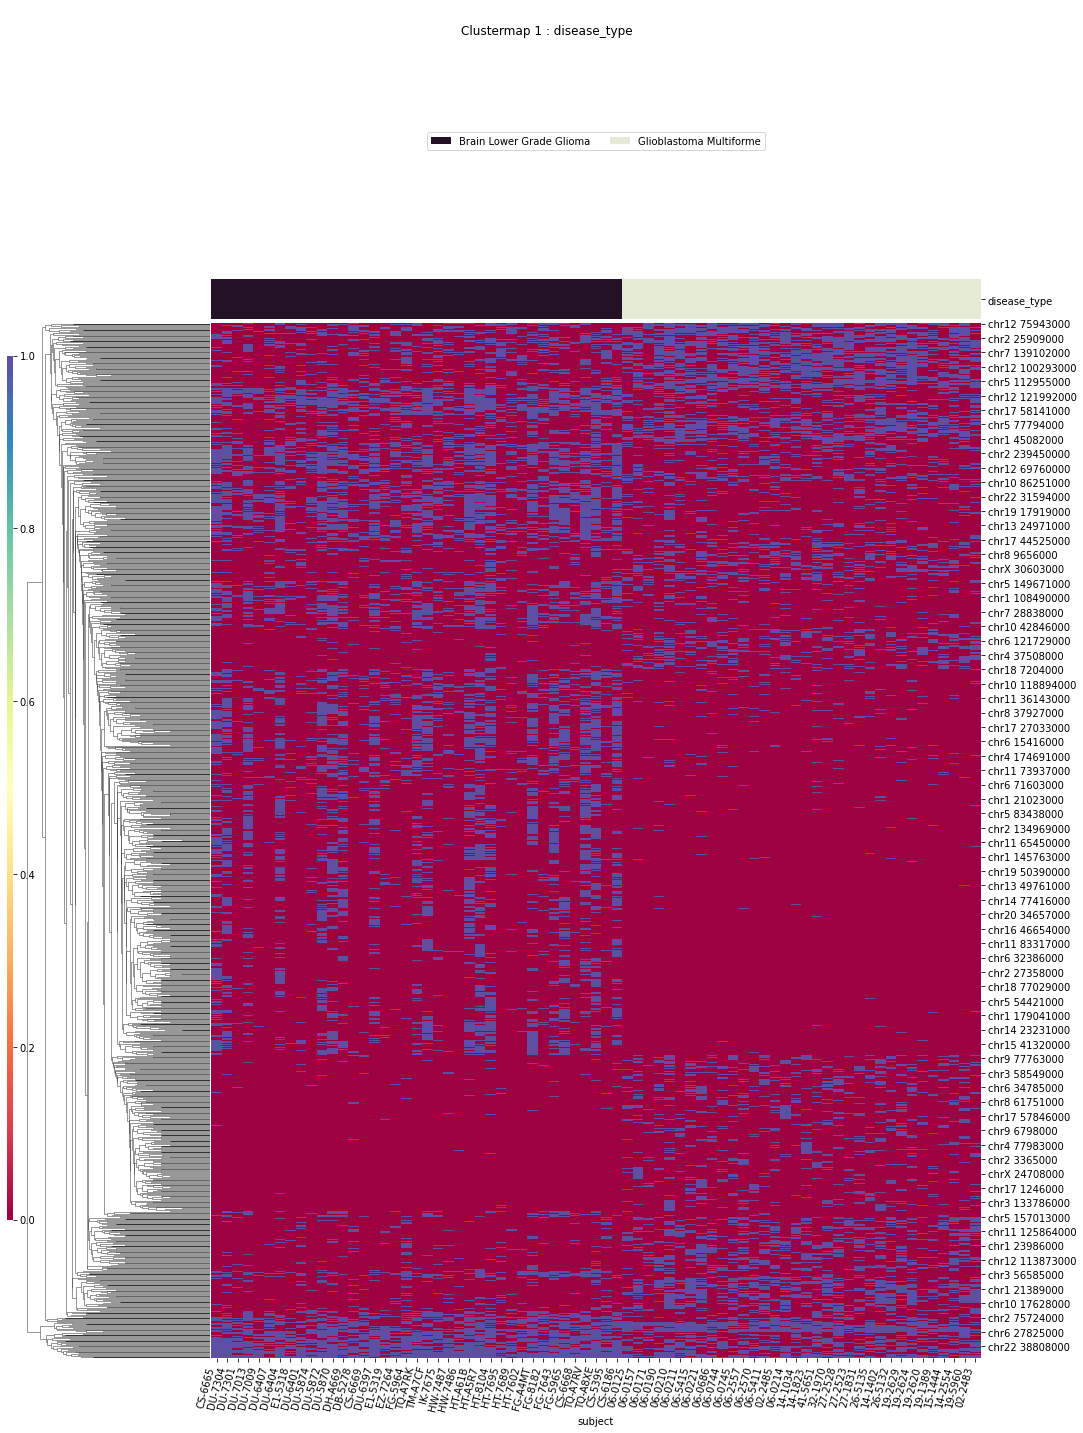

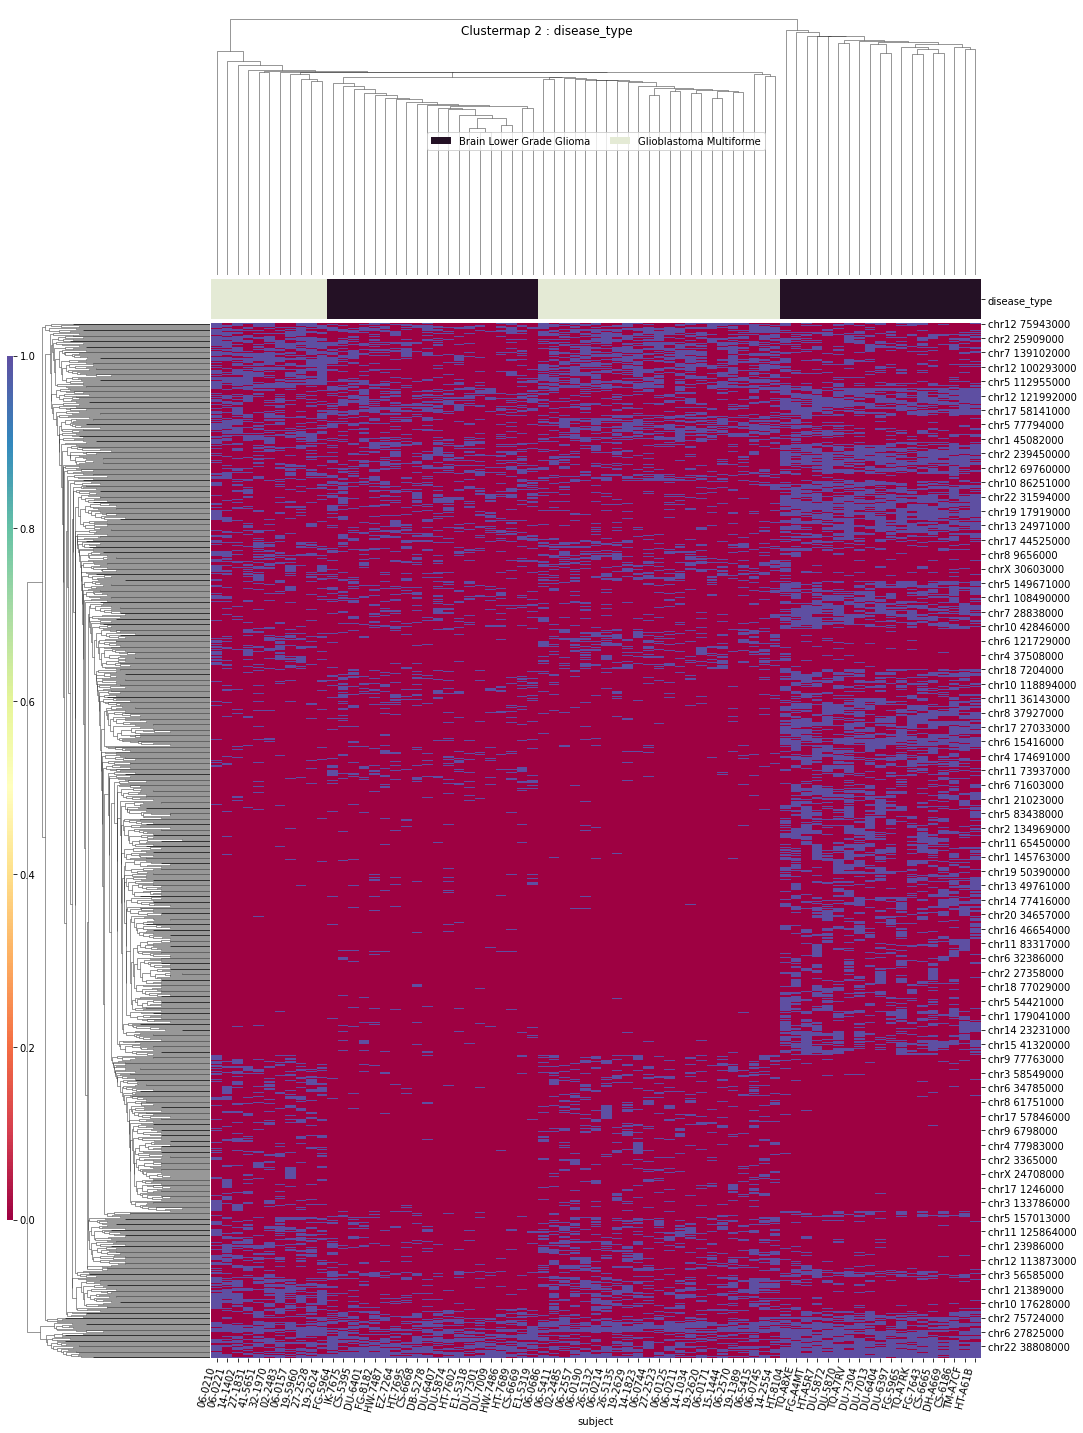

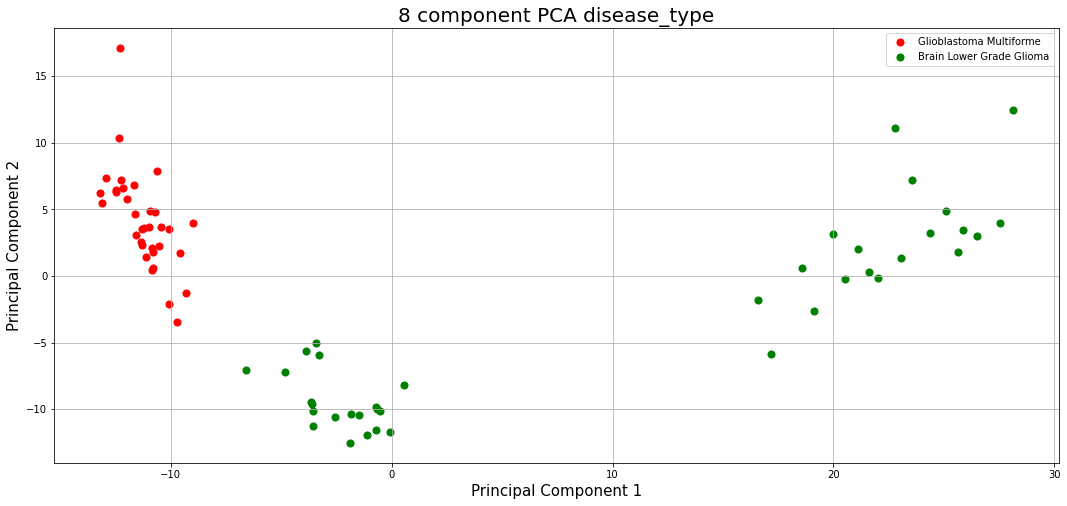

In [113]:
for column in ['disease_type']:
    print(column)
    ttests_boxplots_and_heatmaps(compdf,
        compdf.columns[compdf.columns.str.contains("^chr")],column,box_p=1e-10,heat_p=0.1)
    

In [114]:
datetime.now().strftime("%Y%m%d %H:%M:%S")

'20210610 12:13:35'

disease_type
T-Testing
Boxplotting
Clustermapping
['chr1 108490000' 'chr1 108675000' 'chr1 108676000' 'chr1 111800000'
 'chr1 114791000' 'chr1 114805000' 'chr1 117428000' 'chr1 12007000'
 'chr1 143637000' 'chr1 143702000' 'chr1 145763000' 'chr1 147061000'
 'chr1 147062000' 'chr1 150850000' 'chr1 152144000' 'chr1 160934000'
 'chr1 162465000' 'chr1 162466000' 'chr1 168208000' 'chr1 173614000'
 'chr1 179041000' 'chr1 182742000' 'chr1 197405000' 'chr1 21023000'
 'chr1 212322000' 'chr1 213153000' 'chr1 21389000' 'chr1 22159000'
 'chr1 227132000' 'chr1 231127000' 'chr1 23258000' 'chr1 23503000'
 'chr1 237670000' 'chr1 23852000' 'chr1 23854000' 'chr1 23934000'
 'chr1 23986000' 'chr1 245774000' 'chr1 246363000' 'chr1 247219000'
 'chr1 24801000' 'chr1 248676000' 'chr1 26802000' 'chr1 27290000'
 'chr1 38646000' 'chr1 39999000' 'chr1 45498000' 'chr1 48191000'
 'chr1 48384000' 'chr1 54234000' 'chr1 64200000' 'chr1 65630000'
 'chr1 7952000' 'chr1 86215000' 'chr1 86900000' 'chr1 8912000'
 'chr1 9646

/Users/jakewendt/Library/Python/3.8/lib/python/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


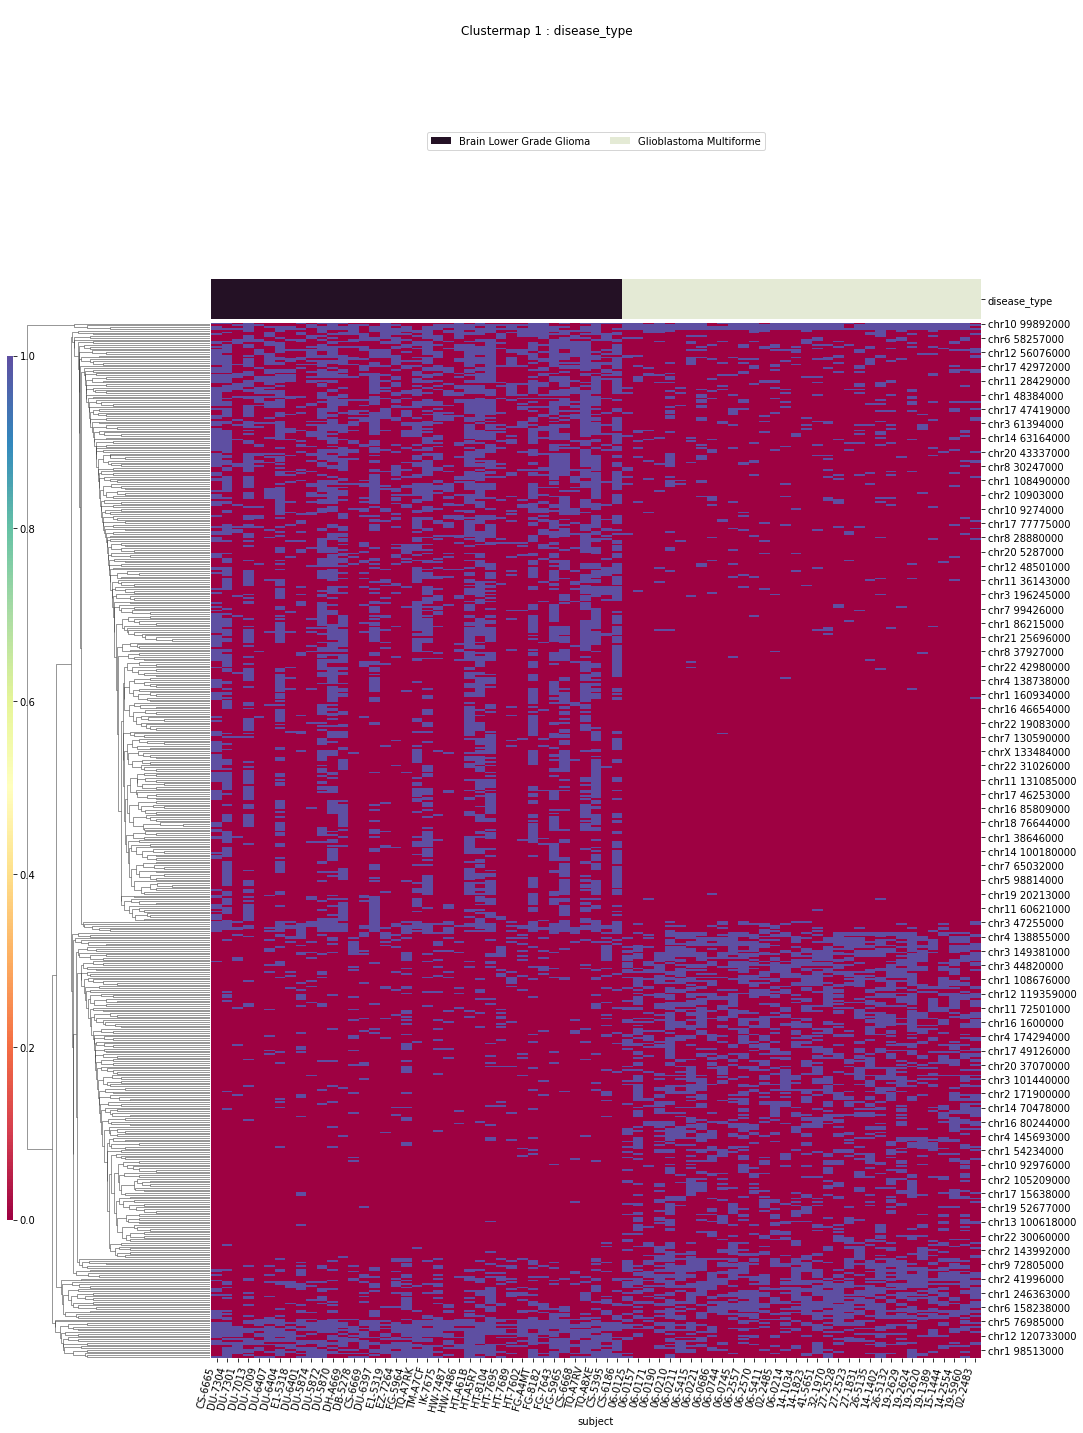

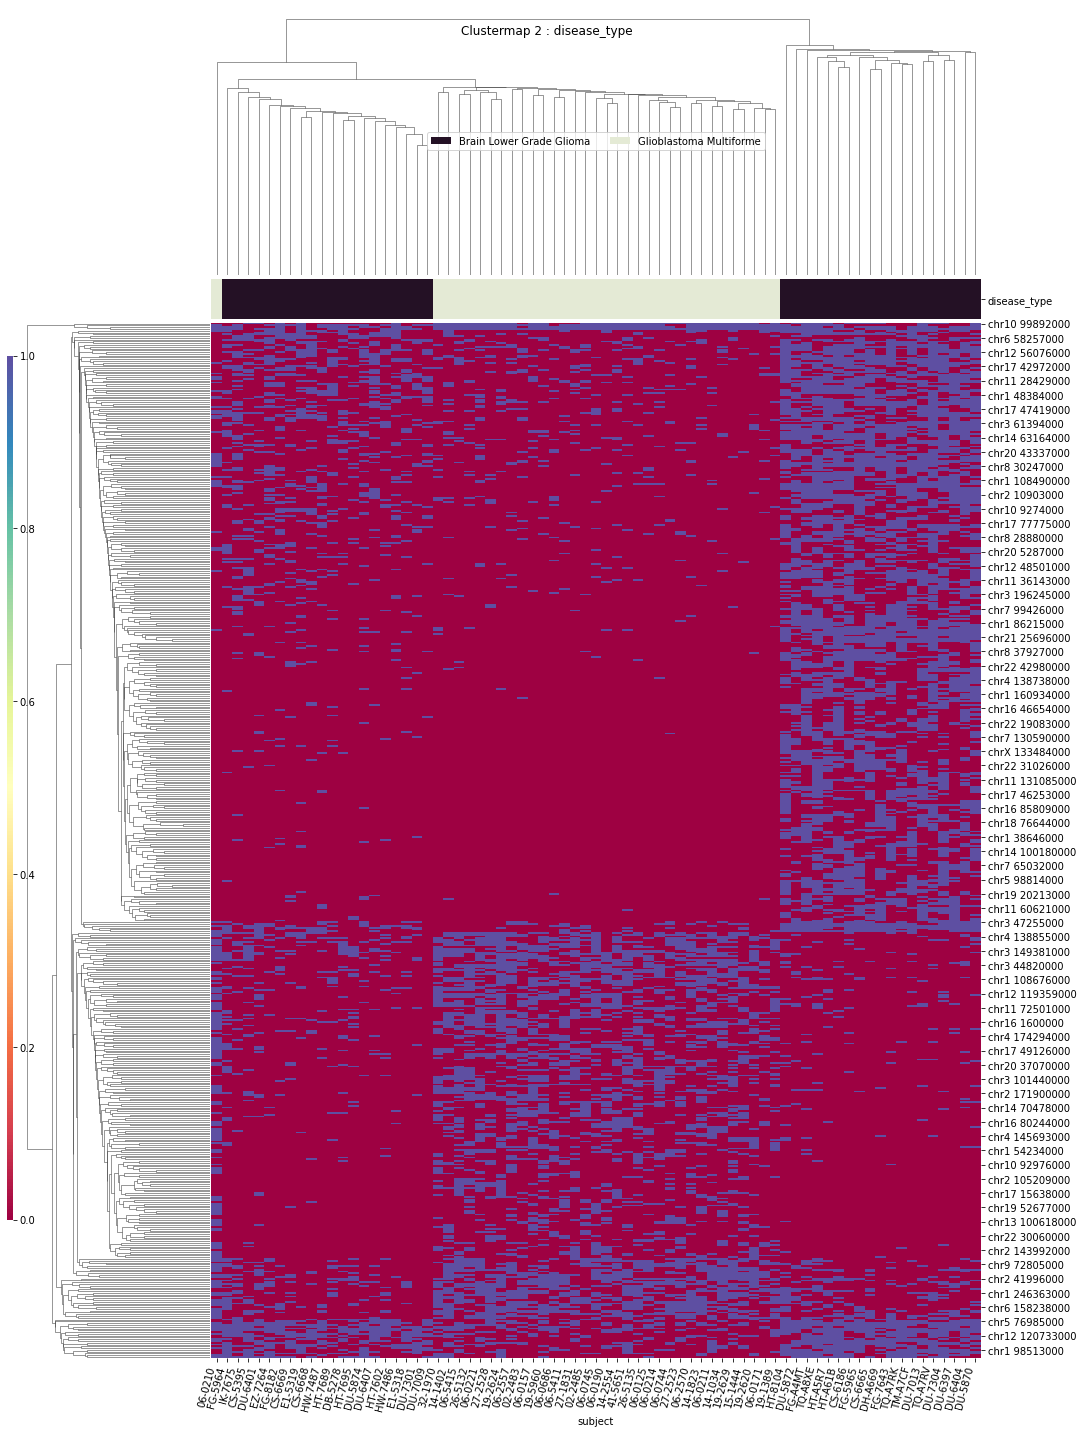

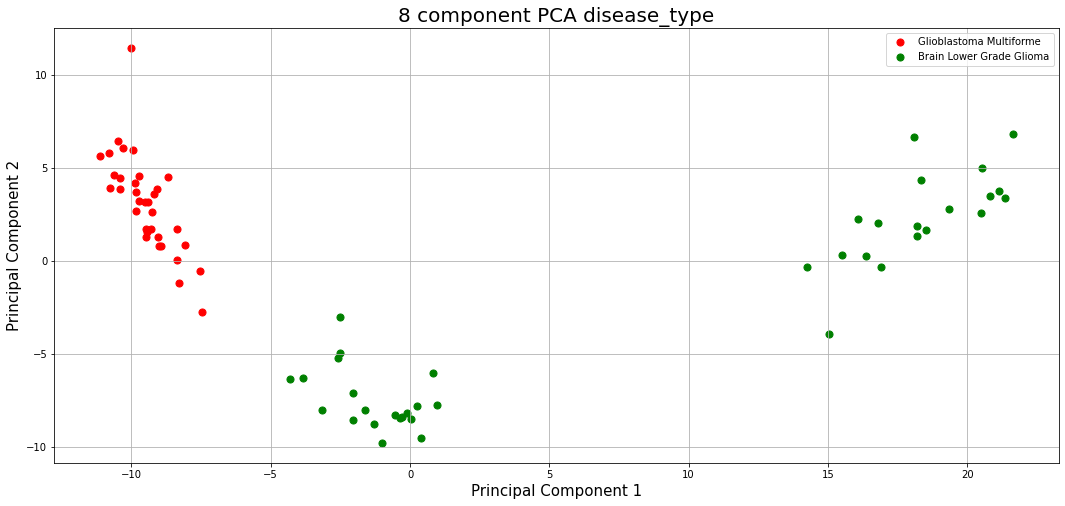

In [115]:
for column in ['disease_type']:
    print(column)
    ttests_boxplots_and_heatmaps(compdf,
        compdf.columns[compdf.columns.str.contains("^chr")],column,box_p=1e-15,heat_p=0.01)
    

In [116]:
datetime.now().strftime("%Y%m%d %H:%M:%S")

'20210610 12:14:06'

disease_type
T-Testing
Boxplotting
Clustermapping
['chr1 108676000' 'chr1 111800000' 'chr1 114791000' 'chr1 147061000'
 'chr1 150850000' 'chr1 152144000' 'chr1 160934000' 'chr1 168208000'
 'chr1 173614000' 'chr1 197405000' 'chr1 21023000' 'chr1 213153000'
 'chr1 21389000' 'chr1 22159000' 'chr1 227132000' 'chr1 231127000'
 'chr1 23503000' 'chr1 246363000' 'chr1 24801000' 'chr1 248676000'
 'chr1 26802000' 'chr1 38646000' 'chr1 39999000' 'chr1 45498000'
 'chr1 48191000' 'chr1 54234000' 'chr1 65630000' 'chr1 7952000'
 'chr1 86215000' 'chr1 96469000' 'chr1 99079000' 'chr10 100094000'
 'chr10 118264000' 'chr10 24658000' 'chr10 42846000' 'chr10 70686000'
 'chr10 78469000' 'chr10 86251000' 'chr10 92673000' 'chr10 9274000'
 'chr10 97840000' 'chr10 99891000' 'chr10 99892000' 'chr11 104195000'
 'chr11 125864000' 'chr11 131085000' 'chr11 17051000' 'chr11 19861000'
 'chr11 28429000' 'chr11 41303000' 'chr11 60452000' 'chr11 60492000'
 'chr11 60621000' 'chr11 60816000' 'chr11 65238000' 'chr11 7250100

/Users/jakewendt/Library/Python/3.8/lib/python/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


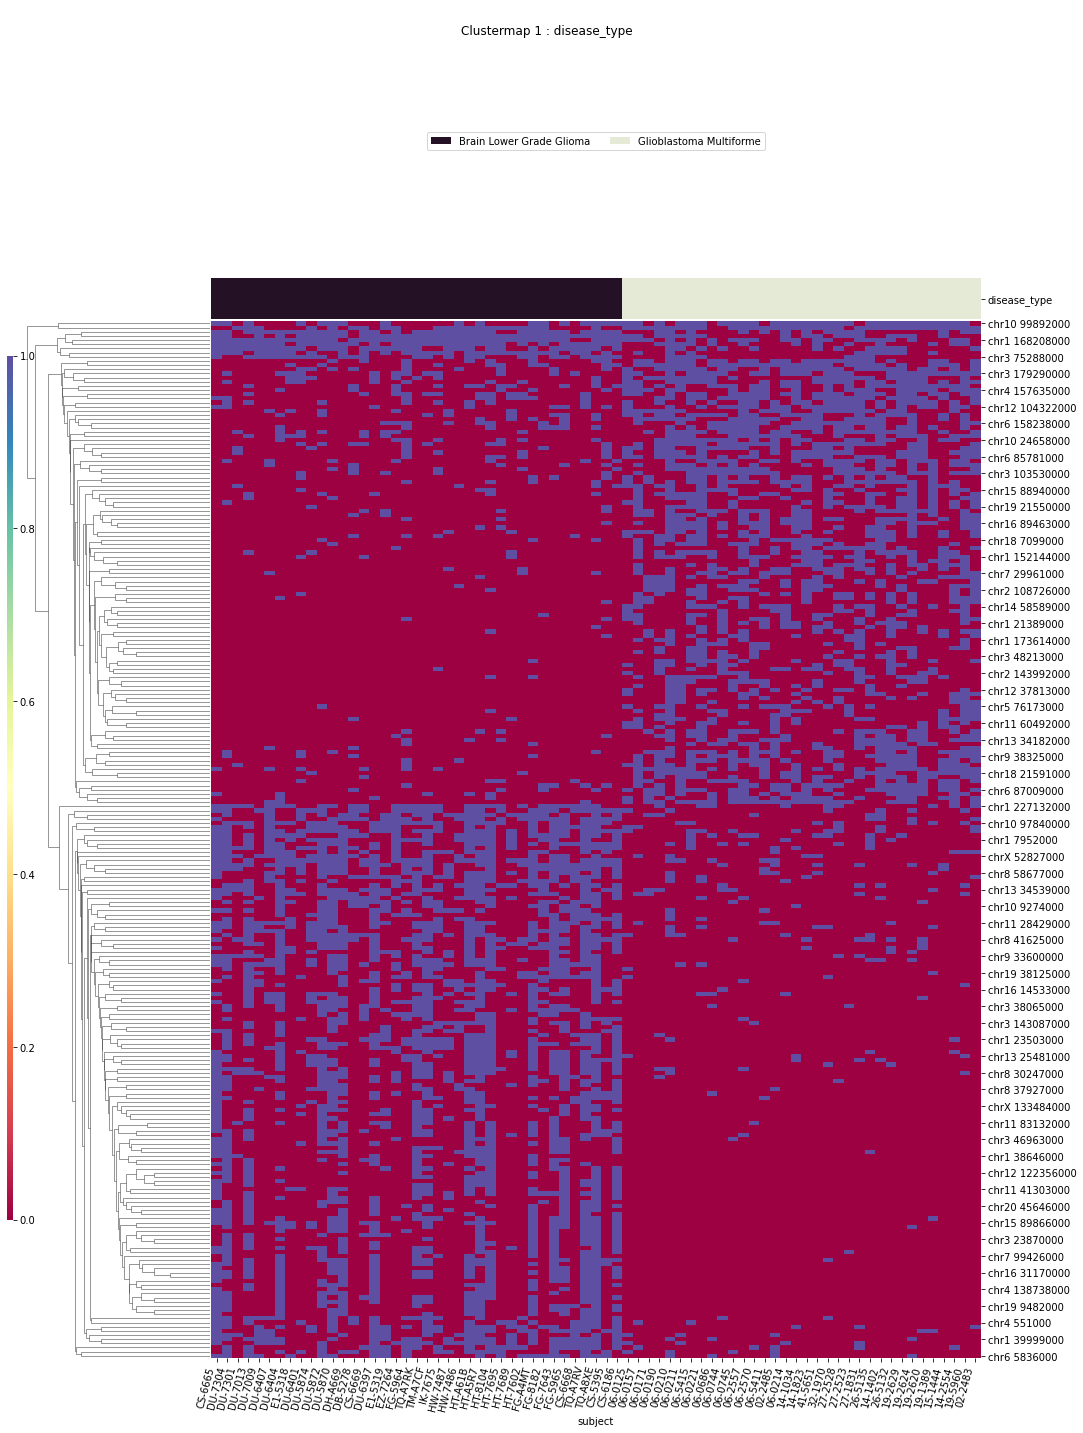

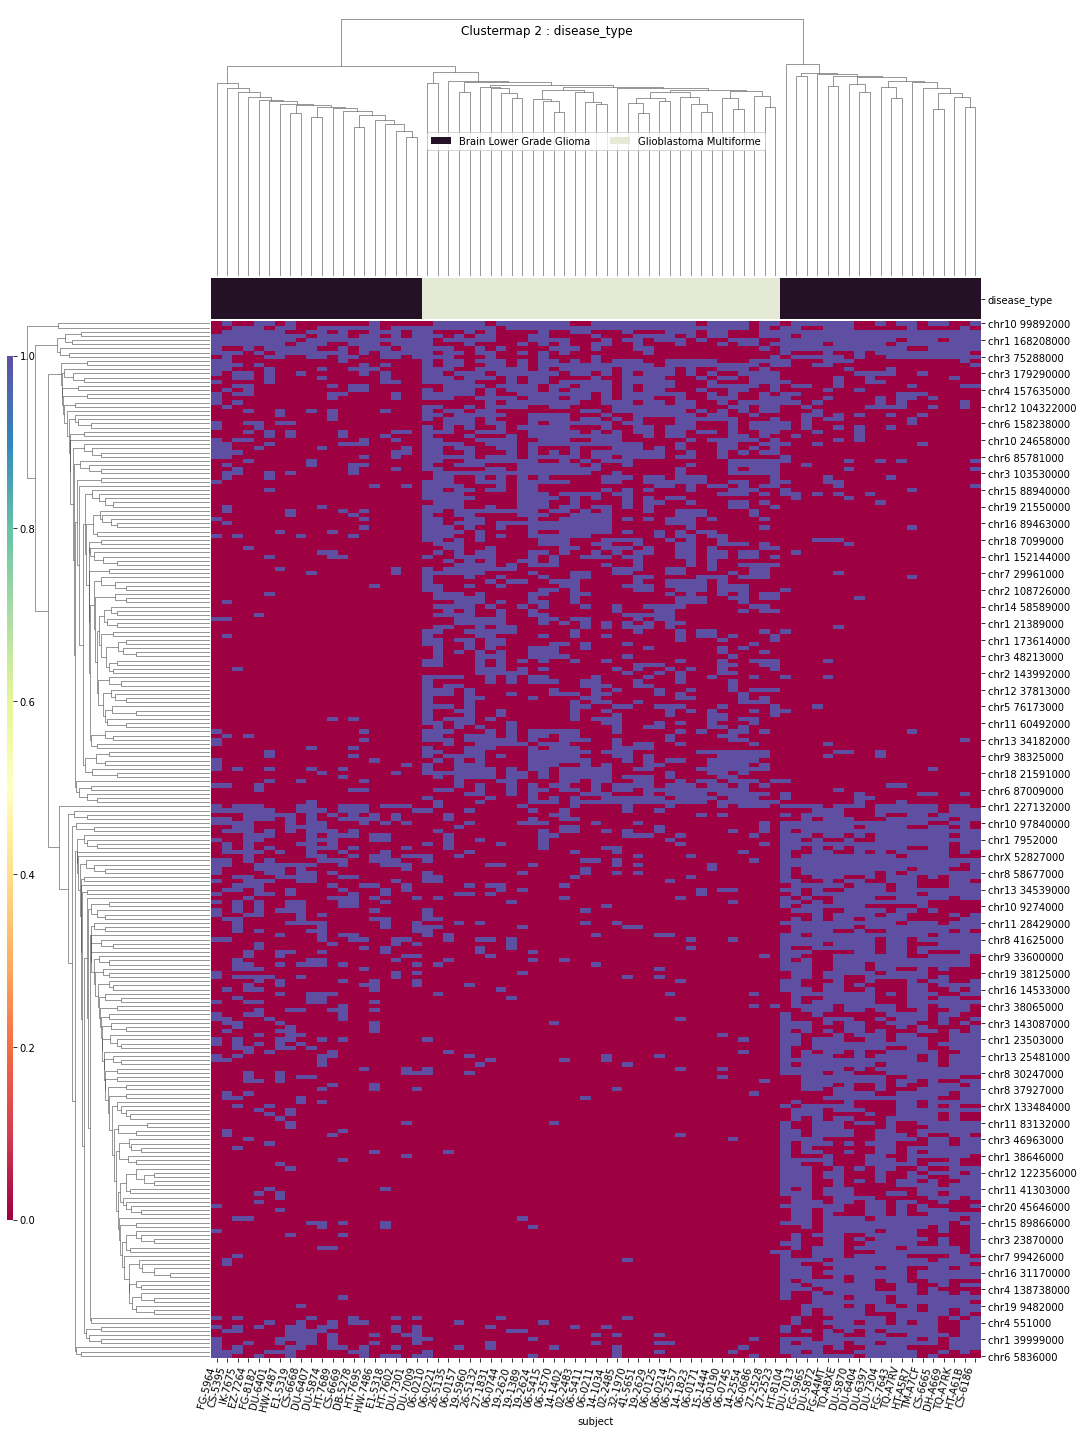

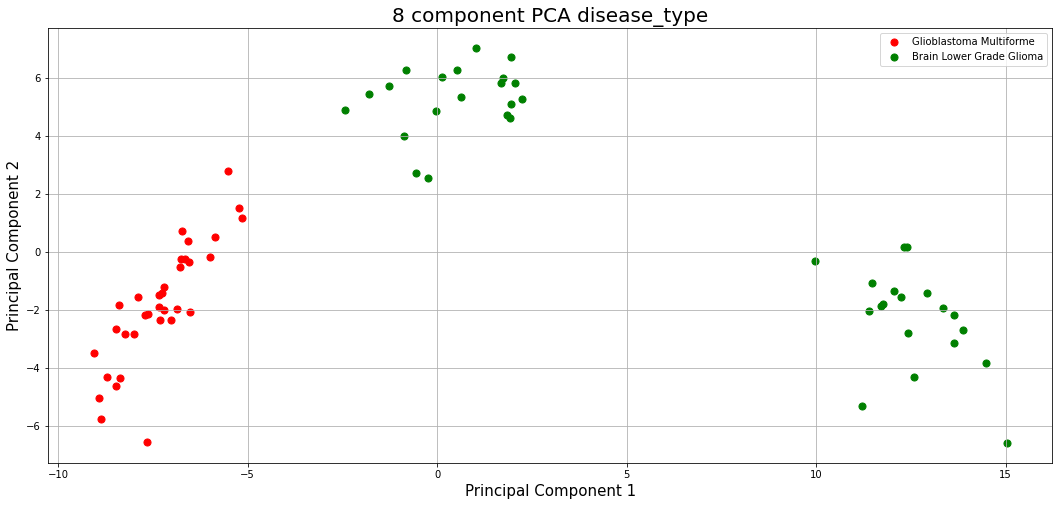

In [117]:
for column in ['disease_type']:
    print(column)
    ttests_boxplots_and_heatmaps(compdf,
        compdf.columns[compdf.columns.str.contains("^chr")],column,box_p=1e-15,heat_p=0.001)
    

In [118]:
datetime.now().strftime("%Y%m%d %H:%M:%S")

'20210610 12:14:37'

# Load the GPMP data

In [119]:
gpmp_df=pd.read_csv(gpmpdata,header=[0,1],index_col=[0,1,2,3])
gpmp_df

chromosome                              chr1                                  \
position                             1409000 1410000 1580000 1581000 3751000   
sample          pup    hkle     mapq                                           
SF12149_S1L1_N  paired HERVK113 Q20        5       2       0       0       1   
                       SVA_A    Q20        0       0       0       0       0   
                       SVA_B    Q20        0       0       0       0       0   
                       SVA_C    Q20        0       0       0       0       0   
                       SVA_D    Q20        0       0       0       0       0   
...                                      ...     ...     ...     ...     ...   
SF12656_S11L4_N paired SVA_B    Q20        0       0       0       1       0   
                       SVA_C    Q20        0       0       0       0       0   
                       SVA_D    Q20        0       0       0       0       0   
                       SVA_E    Q20        0       0       0       0       0   
                       SVA_F    Q20        0       0       0       0       0   

chromosome                                                                    \
position                             5573000 6304000 6306000 6714000 6716000   
sample          pup    hkle     mapq                                           
SF12149_S1L1_N  paired HERVK113 Q20        0       0       0       0       0   
                       SVA_A    Q20        0       2       4       3       4   
                       SVA_B    Q20        0       1       2       3       3   
                       SVA_C    Q20        0       2       2       3       3   
                       SVA_D    Q20        0       2       3       3       3   
...                                      ...     ...     ...     ...     ...   
SF12656_S11L4_N paired SVA_B    Q20        0       3       3       1       5   
                       SVA_C    Q20        0       4       3       0       5   
                       SVA_D    Q20        0       4       3       0       5   
                       SVA_E    Q20        0       4       3       0       5   
                       SVA_F    Q20        0       4       0       0       3   

chromosome                            ...     chrY                             \
position                              ... 12879000 13103000 13104000 15774000   
sample          pup    hkle     mapq  ...                                       
SF12149_S1L1_N  paired HERVK113 Q20   ...        0        0        1        1   
                       SVA_A    Q20   ...        4        0        0        0   
                       SVA_B    Q20   ...        3        0        0        0   
                       SVA_C    Q20   ...        4        0        0        0   
                       SVA_D    Q20   ...        4        0        0        0   
...                                   ...      ...      ...      ...      ...   
SF12656_S11L4_N paired SVA_B    Q20   ...        0        0        0        0   
                       SVA_C    Q20   ...        0        0        0        0   
                       SVA_D    Q20   ...        0        0        0        0   
                       SVA_E    Q20   ...        0        0        0        0   
                       SVA_F    Q20   ...        0        0        0        0   

chromosome                                                                \
position                             19535000 19536000 19699000 19700000   
sample          pup    hkle     mapq                                       
SF12149_S1L1_N  paired HERVK113 Q20         0        0        2        3   
                       SVA_A    Q20         0        3        0        0   
                       SVA_B    Q20         0        4        0        0   
                       SVA_C    Q20         0        3        0        0   
                       SVA_D    Q20         0        3        0        0   
...            

In [120]:
gpmp_df.reset_index(inplace=True)
gpmp_df

chromosome           sample     pup      hkle mapq    chr1                  \
position                                           1409000 1410000 1580000   
0            SF12149_S1L1_N  paired  HERVK113  Q20       5       2       0   
1            SF12149_S1L1_N  paired     SVA_A  Q20       0       0       0   
2            SF12149_S1L1_N  paired     SVA_B  Q20       0       0       0   
3            SF12149_S1L1_N  paired     SVA_C  Q20       0       0       0   
4            SF12149_S1L1_N  paired     SVA_D  Q20       0       0       0   
..                      ...     ...       ...  ...     ...     ...     ...   
93          SF12656_S11L4_N  paired     SVA_B  Q20       0       0       0   
94          SF12656_S11L4_N  paired     SVA_C  Q20       0       0       0   
95          SF12656_S11L4_N  paired     SVA_D  Q20       0       0       0   
96          SF12656_S11L4_N  paired     SVA_E  Q20       0       0       0   
97          SF12656_S11L4_N  paired     SVA_F  Q20       0       0       0   

chromosome                          ...     chrY                             \
position   1581000 3751000 5573000  ... 12879000 13103000 13104000 15774000   
0                0       1       0  ...        0        0        1        1   
1                0       0       0  ...        4        0        0        0   
2                0       0       0  ...        3        0        0        0   
3                0       0       0  ...        4        0        0        0   
4                0       0       0  ...        4        0        0        0   
..             ...     ...     ...  ...      ...      ...      ...      ...   
93               1       0       0  ...        0        0        0        0   
94               0       0       0  ...        0        0        0        0   
95               0       0       0  ...        0        0        0        0   
96               0       0       0  ...        0        0        0        0   
97               0       0       0  ...        0        0        0        0   

chromosome                                                        
position   19535000 19536000 19699000 19700000 20553000 20976000  
0                 0        0        2        3        0        0  
1                 0        3        0        0        1        0  
2                 0        4        0        0        1        0  
3                 0        3        0        0        1        0  
4                 0        3        0        0        1        0  
..              ...      ...      ...      ...      ...      ...  
93                0        0        0        0        0        0  
94                0        0        0        0        0        0  
95                0        0        0        0        0        0  
96                0        0        0        0        0        0  
97                0        0        0        0        0        0  

[98 rows x 6046 columns]

In [121]:
gpmp_df=gpmp_df[gpmp_df['hkle']==hkle]
gpmp_df

chromosome           sample     pup   hkle mapq    chr1                  \
position                                        1409000 1410000 1580000   
6            SF12149_S1L1_N  paired  SVA_F  Q20       0       0       0   
13           SF12210_S2L1_N  paired  SVA_F  Q20       0       0       0   
20           SF12255_S7L2_N  paired  SVA_F  Q20       0       0       0   
27           SF12271_S8L2_N  paired  SVA_F  Q20       0       0       0   
34           SF12288_S1L1_N  paired  SVA_F  Q20       0       0       0   
41           SF12333_S2L1_N  paired  SVA_F  Q20       0       0       0   
48           SF12407_S1L1_N  paired  SVA_F  Q20       0       0       0   
55           SF12430_S2L1_N  paired  SVA_F  Q20       0       0       0   
62           SF12460_S8L3_N  paired  SVA_F  Q20       0       0       0   
69           SF12480_S7L3_N  paired  SVA_F  Q20       0       0       0   
76           SF12495_S9L3_N  paired  SVA_F  Q20       0       0       0   
83           SF12577_S6L2_N  paired  SVA_F  Q20       0       0       0   
90          SF12634_S10L4_N  paired  SVA_F  Q20       0       0       0   
97          SF12656_S11L4_N  paired  SVA_F  Q20       0       0       0   

chromosome                          ...     chrY                             \
position   1581000 3751000 5573000  ... 12879000 13103000 13104000 15774000   
6                0       0       0  ...        3        0        0        0   
13               0       0       0  ...        0        0        0        0   
20               0       0       0  ...        0        0        0        0   
27               0       0       0  ...        1        0        0        0   
34               0       0       0  ...        3        0        0        0   
41               0       0       0  ...        0        0        0        0   
48               0       0       0  ...        0        0        0        0   
55               0       0       0  ...        0        0        0        0   
62               0       0       0  ...        0        0        0        0   
69               0       0       0  ...        2        0        0        0   
76               0       0       0  ...        1        0        0        0   
83               0       0       0  ...        2        0        0        0   
90               0       0       0  ...        1        0        0        0   
97               0       0       0  ...        0        0        0        0   

chromosome                                                        
position   19535000 19536000 19699000 19700000 20553000 20976000  
6                 0        2        0        0        0        0  
13                0        0        0        0        0        0  
20                0        0        0        0        0        0  
27                0        1        0        0        0        0  
34                0        0        0        0        0        0  
41                0        0        0        0        0        0  
48                0        0        0        0        0        0  
55                0        0        0        0        0        0  
62                0        0        0        0        0        0  
69                0        0        0        0        0        0  
76                0        0        0        0        0        0  
83                0        0        0        0        0        0  
90                0        3        0        0        0        0  
97                0        0        0        0        0        0  

[14 rows x 6046 columns]

In [122]:
gpmp_df['subject']=gpmp_df['sample'].str[0:7]
gpmp_df['subject']

<ipython-input-122-9c38aa8e9611>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gpmp_df['subject']=gpmp_df['sample'].str[0:7]


6     SF12149
13    SF12210
20    SF12255
27    SF12271
34    SF12288
41    SF12333
48    SF12407
55    SF12430
62    SF12460
69    SF12480
76    SF12495
83    SF12577
90    SF12634
97    SF12656
Name: subject, dtype: object

In [123]:
gpmp_df.set_index(['subject','sample','pup','hkle','mapq'],inplace=True)
gpmp_df #.head()

chromosome                                   chr1                          \
position                                  1409000 1410000 1580000 1581000   
subject sample          pup    hkle  mapq                                   
SF12149 SF12149_S1L1_N  paired SVA_F Q20        0       0       0       0   
SF12210 SF12210_S2L1_N  paired SVA_F Q20        0       0       0       0   
SF12255 SF12255_S7L2_N  paired SVA_F Q20        0       0       0       0   
SF12271 SF12271_S8L2_N  paired SVA_F Q20        0       0       0       0   
SF12288 SF12288_S1L1_N  paired SVA_F Q20        0       0       0       0   
SF12333 SF12333_S2L1_N  paired SVA_F Q20        0       0       0       0   
SF12407 SF12407_S1L1_N  paired SVA_F Q20        0       0       0       0   
SF12430 SF12430_S2L1_N  paired SVA_F Q20        0       0       0       0   
SF12460 SF12460_S8L3_N  paired SVA_F Q20        0       0       0       0   
SF12480 SF12480_S7L3_N  paired SVA_F Q20        0       0       0       0   
SF12495 SF12495_S9L3_N  paired SVA_F Q20        0       0       0       0   
SF12577 SF12577_S6L2_N  paired SVA_F Q20        0       0       0       0   
SF12634 SF12634_S10L4_N paired SVA_F Q20        0       0       0       0   
SF12656 SF12656_S11L4_N paired SVA_F Q20        0       0       0       0   

chromosome                                                                 \
position                                  3751000 5573000 6304000 6306000   
subject sample          pup    hkle  mapq                                   
SF12149 SF12149_S1L1_N  paired SVA_F Q20        0       0       1       1   
SF12210 SF12210_S2L1_N  paired SVA_F Q20        0       0       1       0   
SF12255 SF12255_S7L2_N  paired SVA_F Q20        0       0       0       0   
SF12271 SF12271_S8L2_N  paired SVA_F Q20        0       0       2       0   
SF12288 SF12288_S1L1_N  paired SVA_F Q20        0       0       5       0   
SF12333 SF12333_S2L1_N  paired SVA_F Q20        0       0       4       0   
SF12407 SF12407_S1L1_N  paired SVA_F Q20        0       0       4       0   
SF12430 SF12430_S2L1_N  paired SVA_F Q20        0       0       8       1   
SF12460 SF12460_S8L3_N  paired SVA_F Q20        0       0       2       0   
SF12480 SF12480_S7L3_N  paired SVA_F Q20        0       0       1       0   
SF12495 SF12495_S9L3_N  paired SVA_F Q20        0       0       2       0   
SF12577 SF12577_S6L2_N  paired SVA_F Q20        0       0       3       0   
SF12634 SF12634_S10L4_N paired SVA_F Q20        0       0      10       2   
SF12656 SF12656_S11L4_N paired SVA_F Q20        0       0       4       0   

chromosome                                                 ...     chrY  \
position                                  6714000 6716000  ... 12879000   
subject sample          pup    hkle  mapq                  ...            
SF12149 SF12149_S1L1_N  paired SVA_F Q20        0       2  ...        3   
SF12210 SF12210_S2L1_N  paired SVA_F Q20        1       0  ...        0   
SF12255 SF12255_S7L2_N  paired SVA_F Q20        0       1  ...        0   
SF12271 SF12271_S8L2_N  paired SVA_F Q20        1       2  ...        1   
SF12288 SF12288_S1L1_N  paired SVA_F Q20        1       7  ...        3   
SF12333 SF12333_S2L1_N  paired SVA_F Q20        0       4  ...        0   
SF12407 SF12407_S1L1_N  paired SVA_F Q20        6       2  ...        0   
SF12430 SF12430_S2L1_N  paired SVA_F Q20        4       8  ...        0   
SF12460 SF12460_S8L3_N  paired SVA_F Q20        2       2  ...        0   
SF12480 SF12480_S7L3_N  paired SVA_F Q20        2       2  ...        2   
SF12495 SF12495_S9L3_N  paired SVA_F Q20        0       1  ...        1   
SF12577 SF12577_S6L2_N  paired SVA_F Q20        3       0  ...        2   
SF12634 SF12634_S10L4_N paired SVA_F Q20        1       3  ...        1   
SF12656 SF12656_S11L4_N paired SVA_F Q20        0       3  ...        0   

chromosome                                                                     \
position               

In [124]:
gpmp_df.columns= [' '.join(col).strip() for col in gpmp_df.columns.values]
gpmp_df

chr1 1409000  chr1 1410000  \
subject sample          pup    hkle  mapq                               
SF12149 SF12149_S1L1_N  paired SVA_F Q20              0             0   
SF12210 SF12210_S2L1_N  paired SVA_F Q20              0             0   
SF12255 SF12255_S7L2_N  paired SVA_F Q20              0             0   
SF12271 SF12271_S8L2_N  paired SVA_F Q20              0             0   
SF12288 SF12288_S1L1_N  paired SVA_F Q20              0             0   
SF12333 SF12333_S2L1_N  paired SVA_F Q20              0             0   
SF12407 SF12407_S1L1_N  paired SVA_F Q20              0             0   
SF12430 SF12430_S2L1_N  paired SVA_F Q20              0             0   
SF12460 SF12460_S8L3_N  paired SVA_F Q20              0             0   
SF12480 SF12480_S7L3_N  paired SVA_F Q20              0             0   
SF12495 SF12495_S9L3_N  paired SVA_F Q20              0             0   
SF12577 SF12577_S6L2_N  paired SVA_F Q20              0             0   
SF12634 SF12634_S10L4_N paired SVA_F Q20              0             0   
SF12656 SF12656_S11L4_N paired SVA_F Q20              0             0   

                                           chr1 1580000  chr1 1581000  \
subject sample          pup    hkle  mapq                               
SF12149 SF12149_S1L1_N  paired SVA_F Q20              0             0   
SF12210 SF12210_S2L1_N  paired SVA_F Q20              0             0   
SF12255 SF12255_S7L2_N  paired SVA_F Q20              0             0   
SF12271 SF12271_S8L2_N  paired SVA_F Q20              0             0   
SF12288 SF12288_S1L1_N  paired SVA_F Q20              0             0   
SF12333 SF12333_S2L1_N  paired SVA_F Q20              0             0   
SF12407 SF12407_S1L1_N  paired SVA_F Q20              0             0   
SF12430 SF12430_S2L1_N  paired SVA_F Q20              0             0   
SF12460 SF12460_S8L3_N  paired SVA_F Q20              0             0   
SF12480 SF12480_S7L3_N  paired SVA_F Q20              0             0   
SF12495 SF12495_S9L3_N  paired SVA_F Q20              0             0   
SF12577 SF12577_S6L2_N  paired SVA_F Q20              0             0   
SF12634 SF12634_S10L4_N paired SVA_F Q20              0             0   
SF12656 SF12656_S11L4_N paired SVA_F Q20              0             0   

                                           chr1 3751000  chr1 5573000  \
subject sample          pup    hkle  mapq                               
SF12149 SF12149_S1L1_N  paired SVA_F Q20              0             0   
SF12210 SF12210_S2L1_N  paired SVA_F Q20              0             0   
SF12255 SF12255_S7L2_N  paired SVA_F Q20              0             0   
SF12271 SF12271_S8L2_N  paired SVA_F Q20              0             0   
SF12288 SF12288_S1L1_N  paired SVA_F Q20              0             0   
SF12333 SF12333_S2L1_N  paired SVA_F Q20              0             0   
SF12407 SF12407_S1L1_N  paired SVA_F Q20              0             0   
SF12430 SF12430_S2L1_N  paired SVA_F Q20              0             0   
SF12460 SF12460_S8L3_N  paired SVA_F Q20              0             0   
SF12480 SF12480_S7L3_N  paired SVA_F Q20              0             0   
SF12495 SF12495_S9L3_N  paired SVA_F Q20              0             0   
SF12577 SF12577_S6L2_N  paired SVA_F Q20              0             0   
SF12634 SF12634_S10L4_N paired SVA_F Q20              0             0   
SF12656 SF12656_S11L4_N paired SVA_F Q20              0             0   

                                           chr1 6304000  chr1 6306000  \
subject sample          pup    hkle  mapq                               
SF12149 SF12149_S1L1_N  paired SVA_F Q20              1             1   
SF12210 SF12210_S2L1_N  paired SVA_F Q20              1             0   
SF12255 SF12255_S7L2_N  paired SVA_F Q20              0             0   
SF12271 SF12271_S8L2_N  paired SVA_F Q20              2             0   
SF12288 SF12288_S1L1_N  paired SVA_F Q20              5             0   
SF12333 SF12333_S2L1_N  p

In [125]:
gpmp_df=gpmp_df.droplevel('pup',axis='index').droplevel('mapq',axis='index').droplevel('hkle',axis='index')
gpmp_df

chr1 1409000  chr1 1410000  chr1 1580000  \
subject sample                                                      
SF12149 SF12149_S1L1_N              0             0             0   
SF12210 SF12210_S2L1_N              0             0             0   
SF12255 SF12255_S7L2_N              0             0             0   
SF12271 SF12271_S8L2_N              0             0             0   
SF12288 SF12288_S1L1_N              0             0             0   
SF12333 SF12333_S2L1_N              0             0             0   
SF12407 SF12407_S1L1_N              0             0             0   
SF12430 SF12430_S2L1_N              0             0             0   
SF12460 SF12460_S8L3_N              0             0             0   
SF12480 SF12480_S7L3_N              0             0             0   
SF12495 SF12495_S9L3_N              0             0             0   
SF12577 SF12577_S6L2_N              0             0             0   
SF12634 SF12634_S10L4_N             0             0             0   
SF12656 SF12656_S11L4_N             0             0             0   

                         chr1 1581000  chr1 3751000  chr1 5573000  \
subject sample                                                      
SF12149 SF12149_S1L1_N              0             0             0   
SF12210 SF12210_S2L1_N              0             0             0   
SF12255 SF12255_S7L2_N              0             0             0   
SF12271 SF12271_S8L2_N              0             0             0   
SF12288 SF12288_S1L1_N              0             0             0   
SF12333 SF12333_S2L1_N              0             0             0   
SF12407 SF12407_S1L1_N              0             0             0   
SF12430 SF12430_S2L1_N              0             0             0   
SF12460 SF12460_S8L3_N              0             0             0   
SF12480 SF12480_S7L3_N              0             0             0   
SF12495 SF12495_S9L3_N              0             0             0   
SF12577 SF12577_S6L2_N              0             0             0   
SF12634 SF12634_S10L4_N             0             0             0   
SF12656 SF12656_S11L4_N             0             0             0   

                         chr1 6304000  chr1 6306000  chr1 6714000  \
subject sample                                                      
SF12149 SF12149_S1L1_N              1             1             0   
SF12210 SF12210_S2L1_N              1             0             1   
SF12255 SF12255_S7L2_N              0             0             0   
SF12271 SF12271_S8L2_N              2             0             1   
SF12288 SF12288_S1L1_N              5             0             1   
SF12333 SF12333_S2L1_N              4             0             0   
SF12407 SF12407_S1L1_N              4             0             6   
SF12430 SF12430_S2L1_N              8             1             4   
SF12460 SF12460_S8L3_N              2             0             2   
SF12480 SF12480_S7L3_N              1             0             2   
SF12495 SF12495_S9L3_N              2             0             0   
SF12577 SF12577_S6L2_N              3             0             3   
SF12634 SF12634_S10L4_N            10             2             1   
SF12656 SF12656_S11L4_N             4             0             0   

                         chr1 6716000  ...  chrY 12879000  chrY 13103000  \
subject sample                         ...                                 
SF12149 SF12149_S1L1_N              2  ...              3              0   
SF12210 SF12210_S2L1_N              0  ...              0              0   
SF12255 SF12255_S7L2_N              1  ...              0              0   
SF12271 SF12271_S8L2_N              2  ...              1              0   
SF12288 SF12288_S1L1_N              7  ...              3              0   
SF12333 SF12333_S2L1_N              4  ...              0              0   
SF12407 SF12407_S1L1_N              2  ...              0              0   
SF12430 SF12430_S2L1_N    

# NORMALIZE INSERTION POINTS BY ( * 1,000,000,000 / READ COUNT )

In [126]:
gpmp_counts=pd.read_csv("20210604-GPMP-GBM/raw_read_counts.csv")
gpmp_counts.head()

sample  raw pair count
0   SF12149_S1L0_E      1515318278
1   SF12149_S1L1_N       660620929
2  SF12149_S2L0_NE      1334986480
3   SF12210_S2L1_N       597544666
4   SF12210_S3L1_E      1487133148

In [127]:
gpmp_df.reset_index(inplace=True)
gpmp_df=gpmp_df.merge(gpmp_counts,on='sample')
gpmp_df.set_index(['subject','sample'],inplace=True)
gpmp_df

chr1 1409000  chr1 1410000  chr1 1580000  \
subject sample                                                      
SF12149 SF12149_S1L1_N              0             0             0   
SF12210 SF12210_S2L1_N              0             0             0   
SF12255 SF12255_S7L2_N              0             0             0   
SF12271 SF12271_S8L2_N              0             0             0   
SF12288 SF12288_S1L1_N              0             0             0   
SF12333 SF12333_S2L1_N              0             0             0   
SF12407 SF12407_S1L1_N              0             0             0   
SF12430 SF12430_S2L1_N              0             0             0   
SF12460 SF12460_S8L3_N              0             0             0   
SF12480 SF12480_S7L3_N              0             0             0   
SF12495 SF12495_S9L3_N              0             0             0   
SF12577 SF12577_S6L2_N              0             0             0   
SF12634 SF12634_S10L4_N             0             0             0   
SF12656 SF12656_S11L4_N             0             0             0   

                         chr1 1581000  chr1 3751000  chr1 5573000  \
subject sample                                                      
SF12149 SF12149_S1L1_N              0             0             0   
SF12210 SF12210_S2L1_N              0             0             0   
SF12255 SF12255_S7L2_N              0             0             0   
SF12271 SF12271_S8L2_N              0             0             0   
SF12288 SF12288_S1L1_N              0             0             0   
SF12333 SF12333_S2L1_N              0             0             0   
SF12407 SF12407_S1L1_N              0             0             0   
SF12430 SF12430_S2L1_N              0             0             0   
SF12460 SF12460_S8L3_N              0             0             0   
SF12480 SF12480_S7L3_N              0             0             0   
SF12495 SF12495_S9L3_N              0             0             0   
SF12577 SF12577_S6L2_N              0             0             0   
SF12634 SF12634_S10L4_N             0             0             0   
SF12656 SF12656_S11L4_N             0             0             0   

                         chr1 6304000  chr1 6306000  chr1 6714000  \
subject sample                                                      
SF12149 SF12149_S1L1_N              1             1             0   
SF12210 SF12210_S2L1_N              1             0             1   
SF12255 SF12255_S7L2_N              0             0             0   
SF12271 SF12271_S8L2_N              2             0             1   
SF12288 SF12288_S1L1_N              5             0             1   
SF12333 SF12333_S2L1_N              4             0             0   
SF12407 SF12407_S1L1_N              4             0             6   
SF12430 SF12430_S2L1_N              8             1             4   
SF12460 SF12460_S8L3_N              2             0             2   
SF12480 SF12480_S7L3_N              1             0             2   
SF12495 SF12495_S9L3_N              2             0             0   
SF12577 SF12577_S6L2_N              3             0             3   
SF12634 SF12634_S10L4_N            10             2             1   
SF12656 SF12656_S11L4_N             4             0             0   

                         chr1 6716000  ...  chrY 13103000  chrY 13104000  \
subject sample                         ...                                 
SF12149 SF12149_S1L1_N              2  ...              0              0   
SF12210 SF12210_S2L1_N              0  ...              0              0   
SF12255 SF12255_S7L2_N              1  ...              0              0   
SF12271 SF12271_S8L2_N              2  ...              0              0   
SF12288 SF12288_S1L1_N              7  ...              0              0   
SF12333 SF12333_S2L1_N              4  ...              0              0   
SF12407 SF12407_S1L1_N              2  ...              0              0   
SF12430 SF12430_S2L1_N    

In [128]:
gpmp_df=gpmp_df.droplevel('sample',axis='index')
gpmp_df

chr1 1409000  chr1 1410000  chr1 1580000  chr1 1581000  chr1 3751000  \
subject                                                                         
SF12149             0             0             0             0             0   
SF12210             0             0             0             0             0   
SF12255             0             0             0             0             0   
SF12271             0             0             0             0             0   
SF12288             0             0             0             0             0   
SF12333             0             0             0             0             0   
SF12407             0             0             0             0             0   
SF12430             0             0             0             0             0   
SF12460             0             0             0             0             0   
SF12480             0             0             0             0             0   
SF12495             0             0             0             0             0   
SF12577             0             0             0             0             0   
SF12634             0             0             0             0             0   
SF12656             0             0             0             0             0   

         chr1 5573000  chr1 6304000  chr1 6306000  chr1 6714000  chr1 6716000  \
subject                                                                         
SF12149             0             1             1             0             2   
SF12210             0             1             0             1             0   
SF12255             0             0             0             0             1   
SF12271             0             2             0             1             2   
SF12288             0             5             0             1             7   
SF12333             0             4             0             0             4   
SF12407             0             4             0             6             2   
SF12430             0             8             1             4             8   
SF12460             0             2             0             2             2   
SF12480             0             1             0             2             2   
SF12495             0             2             0             0             1   
SF12577             0             3             0             3             0   
SF12634             0            10             2             1             3   
SF12656             0             4             0             0             3   

         ...  chrY 13103000  chrY 13104000  chrY 15774000  chrY 19535000  \
subject  ...                                                               
SF12149  ...              0              0              0              0   
SF12210  ...              0              0              0              0   
SF12255  ...              0              0              0              0   
SF12271  ...              0              0              0              0   
SF12288  ...              0              0              0              0   
SF12333  ...              0              0              0              0   
SF12407  ...              0              0              0              0   
SF12430  ...              0              0              0              0   
SF12460  ...              0              0              0              0   
SF12480  ...              0              0              0              0   
SF12495  ...              0              0              0              0   
SF12577  ...              0              0              0              0   
SF12634  ...              0              0              0              0   
SF12656  ...              0              0              0              0   

         chrY 19536000  chrY 19699000  chrY 19700000  chrY 20553000  \
subject                                                               
SF12149              2              0              0    

In [129]:
gpmp_df.shape

(14, 6043)

In [130]:
gpmp_df=gpmp_df.loc[:, (gpmp_df != 0).any(axis=0)]

In [131]:
gpmp_df.shape

(14, 3903)

In [132]:
gpmp_df[gpmp_df.columns[gpmp_df.columns.str.contains("^chr")]]=(
    1e9*gpmp_df[gpmp_df.columns[gpmp_df.columns.str.contains("^chr")]].values)/gpmp_df[['raw pair count']].values


<ipython-input-132-5f77c92ad960>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gpmp_df[gpmp_df.columns[gpmp_df.columns.str.contains("^chr")]]=(
/Users/jakewendt/Library/Python/3.8/lib/python/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [133]:
gpmp_df.drop('raw pair count',axis='columns',inplace=True)
gpmp_df

/Users/jakewendt/Library/Python/3.8/lib/python/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


chr1 6304000  chr1 6306000  chr1 6714000  chr1 6716000  chr1 7600000  \
subject                                                                         
SF12149          1.51          1.51          0.00          3.03          0.00   
SF12210          1.67          0.00          1.67          0.00          0.00   
SF12255          0.00          0.00          0.00          1.45          2.91   
SF12271          2.66          0.00          1.33          2.66          2.66   
SF12288          4.54          0.00          0.91          6.35          0.91   
SF12333          3.34          0.00          0.00          3.34          2.51   
SF12407          3.40          0.00          5.10          1.70         11.90   
SF12430          6.31          0.79          3.15          6.31          3.94   
SF12460          2.08          0.00          2.08          2.08          2.08   
SF12480          1.13          0.00          2.25          2.25          0.00   
SF12495          1.92          0.00          0.00          0.96          6.73   
SF12577          2.16          0.00          2.16          0.00          2.87   
SF12634          7.13          1.43          0.71          2.14          3.56   
SF12656          3.03          0.00          0.00          2.27          0.00   

         chr1 7601000  chr1 7602000  chr1 7952000  chr1 8503000  chr1 8912000  \
subject                                                                         
SF12149          0.00          1.51          1.51          0.00          7.57   
SF12210          0.00          0.00          1.67          1.67          1.67   
SF12255          0.00          0.00          1.45          5.81          1.45   
SF12271          0.00          1.33          2.66          3.99          5.33   
SF12288          0.00          0.91          2.72          2.72          5.45   
SF12333          0.00          0.84          3.34          2.51          4.18   
SF12407          0.00          1.70          4.25          9.35          4.25   
SF12430          0.00          0.79          3.94          2.37          9.46   
SF12460          0.00          1.04          3.12          4.17          8.33   
SF12480          1.13          0.00          3.38          1.13          6.76   
SF12495          0.00          0.00          1.92          0.00          1.92   
SF12577          0.00          2.16          0.00          2.16          4.31   
SF12634          0.00          1.43          2.85          2.14          3.56   
SF12656          0.00          0.00          3.03          2.27          4.54   

         ...  chrX 155223000  chrY 4294000  chrY 4296000  chrY 7571000  \
subject  ...                                                             
SF12149  ...            3.03          3.03          1.51          0.00   
SF12210  ...            0.00          0.00          0.00          0.00   
SF12255  ...            0.00          1.45          2.91          0.00   
SF12271  ...            1.33          2.66          0.00          0.00   
SF12288  ...            2.72          0.91          0.91          0.00   
SF12333  ...            1.67          0.00          0.00          0.00   
SF12407  ...            3.40          0.00          0.00          0.00   
SF12430  ...            7.89          0.00          0.00          0.00   
SF12460  ...            2.08          0.00          0.00          0.00   
SF12480  ...            3.38          1.13          2.25          0.00   
SF12495  ...            0.96          0.00          0.96          0.00   
SF12577  ...            0.72          0.72          1.44          0.72   
SF12634  ...            0.00          0.00          0.00          0.00   
SF12656  ...            0.00          0.00          0.00          0.00   

         chrY 8917000  chrY 12352000  chrY 12452000  chrY 12878000  \
subject                                                              
SF12149          4.54           0.00           3.03           0.00   
SF12210          0.0

In [134]:
gpmp_binary_df=(gpmp_df>=threshold).replace([False,True],[0,1]).copy()
gpmp_binary_df

chr1 6304000  chr1 6306000  chr1 6714000  chr1 6716000  chr1 7600000  \
subject                                                                         
SF12149             0             0             0             1             0   
SF12210             0             0             0             0             0   
SF12255             0             0             0             0             0   
SF12271             0             0             0             0             0   
SF12288             1             0             0             1             0   
SF12333             1             0             0             1             0   
SF12407             1             0             1             0             1   
SF12430             1             0             1             1             1   
SF12460             0             0             0             0             0   
SF12480             0             0             0             0             0   
SF12495             0             0             0             0             1   
SF12577             0             0             0             0             0   
SF12634             1             0             0             0             1   
SF12656             1             0             0             0             0   

         chr1 7601000  chr1 7602000  chr1 7952000  chr1 8503000  chr1 8912000  \
subject                                                                         
SF12149             0             0             0             0             1   
SF12210             0             0             0             0             0   
SF12255             0             0             0             1             0   
SF12271             0             0             0             1             1   
SF12288             0             0             0             0             1   
SF12333             0             0             1             0             1   
SF12407             0             0             1             1             1   
SF12430             0             0             1             0             1   
SF12460             0             0             1             1             1   
SF12480             0             0             1             0             1   
SF12495             0             0             0             0             0   
SF12577             0             0             0             0             1   
SF12634             0             0             0             0             1   
SF12656             0             0             1             0             1   

         ...  chrX 155223000  chrY 4294000  chrY 4296000  chrY 7571000  \
subject  ...                                                             
SF12149  ...               1             1             0             0   
SF12210  ...               0             0             0             0   
SF12255  ...               0             0             0             0   
SF12271  ...               0             0             0             0   
SF12288  ...               0             0             0             0   
SF12333  ...               0             0             0             0   
SF12407  ...               1             0             0             0   
SF12430  ...               1             0             0             0   
SF12460  ...               0             0             0             0   
SF12480  ...               1             0             0             0   
SF12495  ...               0             0             0             0   
SF12577  ...               0             0             0             0   
SF12634  ...               0             0             0             0   
SF12656  ...               0             0             0             0   

         chrY 8917000  chrY 12352000  chrY 12452000  chrY 12878000  \
subject                                                              
SF12149             1              0              1              0   
SF12210             

In [135]:
gpmp_binary_df.shape

(14, 3902)

In [136]:
gpmp_binary_df=gpmp_binary_df.loc[:, (gpmp_binary_df != 0).any(axis=0)]
gpmp_binary_df.shape

(14, 2926)

In [137]:
gpmp_binary_df.loc[:,'disease_type']='GBM'
gpmp_binary_df

/Users/jakewendt/Library/Python/3.8/lib/python/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/Users/jakewendt/Library/Python/3.8/lib/python/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


chr1 6304000  chr1 6714000  chr1 6716000  chr1 7600000  chr1 7952000  \
subject                                                                         
SF12149             0             0             1             0             0   
SF12210             0             0             0             0             0   
SF12255             0             0             0             0             0   
SF12271             0             0             0             0             0   
SF12288             1             0             1             0             0   
SF12333             1             0             1             0             1   
SF12407             1             1             0             1             1   
SF12430             1             1             1             1             1   
SF12460             0             0             0             0             1   
SF12480             0             0             0             0             1   
SF12495             0             0             0             1             0   
SF12577             0             0             0             0             0   
SF12634             1             0             0             1             0   
SF12656             1             0             0             0             1   

         chr1 8503000  chr1 8912000  chr1 10029000  chr1 11249000  \
subject                                                             
SF12149             0             1              1              0   
SF12210             0             0              1              1   
SF12255             1             0              0              0   
SF12271             1             1              1              1   
SF12288             0             1              1              0   
SF12333             0             1              0              0   
SF12407             1             1              1              0   
SF12430             0             1              1              1   
SF12460             1             1              0              1   
SF12480             0             1              1              0   
SF12495             0             0              0              0   
SF12577             0             1              1              0   
SF12634             0             1              1              0   
SF12656             0             1              0              1   

         chr1 11305000  ...  chrX 149421000  chrX 151598000  chrX 154773000  \
subject                 ...                                                   
SF12149              1  ...               1               1               0   
SF12210              1  ...               0               1               1   
SF12255              1  ...               0               0               0   
SF12271              1  ...               0               0               1   
SF12288              0  ...               0               0               0   
SF12333              1  ...               1               1               0   
SF12407              0  ...               1               1               1   
SF12430              1  ...               1               1               1   
SF12460              0  ...               1               1               1   
SF12480              1  ...               0               0               0   
SF12495              0  ...               0               0               0   
SF12577              0  ...               1               0               0   
SF12634              0  ...               1               0               0   
SF12656              0  ...               1               0               1   

         chrX 155223000  chrY 4294000  chrY 8917000  chrY 12452000  \
subject                                                              
SF12149               1             1             1              1   
SF12210               0             0             0              0   
SF12255               0             0             0           

In [138]:
gpmp_binary_df.shape

(14, 2927)

In [139]:
both_binary_df=compdf.copy()

In [140]:
both_binary_df.drop(['Triple_group', 'Tissue_sample_location', 'MGMT', 'Age', 'Survival_months',
                     'Vital_status', 'days_to_death', 'gender1','center_name',
                     'race', 'ethnicity', 'gender2', 'RE_names', 'IDH', 'x1p19q', 'TERT',
                     'IDH_1p19q_status', 'WHO_groups',
                     'project_id','primary_diagnosis'], axis='columns',inplace=True)

In [141]:
both_binary_df.set_index(['subject'],inplace=True)
both_binary_df #.head()

chr1 3315000  chr1 6304000  chr1 6306000  chr1 6716000  chr1 7600000  \
subject                                                                         
02-2483             0             0             0             1             0   
02-2485             0             0             0             0             1   
06-0125             0             0             0             0             0   
06-0157             0             0             0             0             0   
06-0171             0             0             0             0             0   
...               ...           ...           ...           ...           ...   
IK-7675             0             0             0             0             0   
TM-A7CF             0             0             0             0             0   
TQ-A7RK             0             0             0             0             0   
TQ-A7RV             0             0             0             0             0   
TQ-A8XE             0             0             0             0             0   

         chr1 7601000  chr1 7602000  chr1 7952000  chr1 8503000  chr1 8912000  \
subject                                                                         
02-2483             0             0             0             0             0   
02-2485             0             0             0             0             0   
06-0125             0             0             0             0             0   
06-0157             0             0             0             0             0   
06-0171             0             0             0             0             0   
...               ...           ...           ...           ...           ...   
IK-7675             0             1             0             0             0   
TM-A7CF             0             0             1             0             0   
TQ-A7RK             0             0             1             0             0   
TQ-A7RV             1             0             1             0             0   
TQ-A8XE             0             0             0             0             0   

         ...  chrX 155223000  chrX 155907000  chrX 155908000  chrY 4294000  \
subject  ...                                                                 
02-2483  ...               0               0               0             0   
02-2485  ...               0               0               0             1   
06-0125  ...               0               0               0             0   
06-0157  ...               0               1               0             0   
06-0171  ...               0               0               0             0   
...      ...             ...             ...             ...           ...   
IK-7675  ...               0               0               0             1   
TM-A7CF  ...               0               0               0             0   
TQ-A7RK  ...               0               0               0             1   
TQ-A7RV  ...               0               0               0             1   
TQ-A8XE  ...               1               0               1             0   

         chrY 4296000  chrY 8917000  chrY 12878000  chrY 12879000  \
subject                                                             
02-2483             0             0              0              0   
02-2485             0             0              0              0   
06-0125             0             0              0              0   
06-0157             0             0              0              0   
06-0171             0             0              0              0   
...               ...           ...            ...            ...   
IK-7675             0             0              0              0   
TM-A7CF             0             0              0              0   
TQ-A7RK             0             0              0              0   
TQ-A7RV             0             0              0              1   
TQ-A8XE             0             0              0        

In [142]:
both_binary_df

chr1 3315000  chr1 6304000  chr1 6306000  chr1 6716000  chr1 7600000  \
subject                                                                         
02-2483             0             0             0             1             0   
02-2485             0             0             0             0             1   
06-0125             0             0             0             0             0   
06-0157             0             0             0             0             0   
06-0171             0             0             0             0             0   
...               ...           ...           ...           ...           ...   
IK-7675             0             0             0             0             0   
TM-A7CF             0             0             0             0             0   
TQ-A7RK             0             0             0             0             0   
TQ-A7RV             0             0             0             0             0   
TQ-A8XE             0             0             0             0             0   

         chr1 7601000  chr1 7602000  chr1 7952000  chr1 8503000  chr1 8912000  \
subject                                                                         
02-2483             0             0             0             0             0   
02-2485             0             0             0             0             0   
06-0125             0             0             0             0             0   
06-0157             0             0             0             0             0   
06-0171             0             0             0             0             0   
...               ...           ...           ...           ...           ...   
IK-7675             0             1             0             0             0   
TM-A7CF             0             0             1             0             0   
TQ-A7RK             0             0             1             0             0   
TQ-A7RV             1             0             1             0             0   
TQ-A8XE             0             0             0             0             0   

         ...  chrX 155223000  chrX 155907000  chrX 155908000  chrY 4294000  \
subject  ...                                                                 
02-2483  ...               0               0               0             0   
02-2485  ...               0               0               0             1   
06-0125  ...               0               0               0             0   
06-0157  ...               0               1               0             0   
06-0171  ...               0               0               0             0   
...      ...             ...             ...             ...           ...   
IK-7675  ...               0               0               0             1   
TM-A7CF  ...               0               0               0             0   
TQ-A7RK  ...               0               0               0             1   
TQ-A7RV  ...               0               0               0             1   
TQ-A8XE  ...               1               0               1             0   

         chrY 4296000  chrY 8917000  chrY 12878000  chrY 12879000  \
subject                                                             
02-2483             0             0              0              0   
02-2485             0             0              0              0   
06-0125             0             0              0              0   
06-0157             0             0              0              0   
06-0171             0             0              0              0   
...               ...           ...            ...            ...   
IK-7675             0             0              0              0   
TM-A7CF             0             0              0              0   
TQ-A7RK             0             0              0              0   
TQ-A7RV             0             0              0              1   
TQ-A8XE             0             0              0        

In [143]:
both_binary_df=both_binary_df.append(gpmp_binary_df)
both_binary_df

chr1 3315000  chr1 6304000  chr1 6306000  chr1 6716000  chr1 7600000  \
subject                                                                         
02-2483           0.0             0           0.0             1             0   
02-2485           0.0             0           0.0             0             1   
06-0125           0.0             0           0.0             0             0   
06-0157           0.0             0           0.0             0             0   
06-0171           0.0             0           0.0             0             0   
...               ...           ...           ...           ...           ...   
SF12480           NaN             0           NaN             0             0   
SF12495           NaN             0           NaN             0             1   
SF12577           NaN             0           NaN             0             0   
SF12634           NaN             1           NaN             0             1   
SF12656           NaN             1           NaN             0             0   

         chr1 7601000  chr1 7602000  chr1 7952000  chr1 8503000  chr1 8912000  \
subject                                                                         
02-2483           0.0           0.0             0             0             0   
02-2485           0.0           0.0             0             0             0   
06-0125           0.0           0.0             0             0             0   
06-0157           0.0           0.0             0             0             0   
06-0171           0.0           0.0             0             0             0   
...               ...           ...           ...           ...           ...   
SF12480           NaN           NaN             1             0             1   
SF12495           NaN           NaN             0             0             0   
SF12577           NaN           NaN             0             0             1   
SF12634           NaN           NaN             0             0             1   
SF12656           NaN           NaN             1             0             1   

         ...  chrX 100556000  chrX 100724000  chrX 119361000  chrX 119363000  \
subject  ...                                                                   
02-2483  ...             NaN             NaN             NaN             NaN   
02-2485  ...             NaN             NaN             NaN             NaN   
06-0125  ...             NaN             NaN             NaN             NaN   
06-0157  ...             NaN             NaN             NaN             NaN   
06-0171  ...             NaN             NaN             NaN             NaN   
...      ...             ...             ...             ...             ...   
SF12480  ...             0.0             1.0             0.0             0.0   
SF12495  ...             0.0             0.0             0.0             0.0   
SF12577  ...             0.0             0.0             0.0             0.0   
SF12634  ...             0.0             0.0             0.0             0.0   
SF12656  ...             0.0             1.0             0.0             1.0   

         chrX 123588000  chrX 129851000  chrX 138282000  chrX 154773000  \
subject                                                                   
02-2483             NaN             NaN             NaN             NaN   
02-2485             NaN             NaN             NaN             NaN   
06-0125             NaN             NaN             NaN             NaN   
06-0157             NaN             NaN             NaN             NaN   
06-0171             NaN             NaN             NaN             NaN   
...                 ...             ...             ...             ...   
SF12480             0.0             0.0             0.0             0.0   
SF12495             0.0             0.0             0.0             0.0   
SF12577             0.0             0.0             0.0             0.0   
SF12634             0.0            

In [144]:
both_binary_df.fillna(0, inplace=True)
both_binary_df.reset_index(inplace=True)
both_binary_df.set_index(['subject','disease_type'],inplace=True)
both_binary_df

chr1 3315000  chr1 6304000  chr1 6306000  \
subject disease_type                                                        
02-2483 Glioblastoma Multiforme           0.0             0           0.0   
02-2485 Glioblastoma Multiforme           0.0             0           0.0   
06-0125 Glioblastoma Multiforme           0.0             0           0.0   
06-0157 Glioblastoma Multiforme           0.0             0           0.0   
06-0171 Glioblastoma Multiforme           0.0             0           0.0   
...                                       ...           ...           ...   
SF12480 GBM                               0.0             0           0.0   
SF12495 GBM                               0.0             0           0.0   
SF12577 GBM                               0.0             0           0.0   
SF12634 GBM                               0.0             1           0.0   
SF12656 GBM                               0.0             1           0.0   

                                 chr1 6716000  chr1 7600000  chr1 7601000  \
subject disease_type                                                        
02-2483 Glioblastoma Multiforme             1             0           0.0   
02-2485 Glioblastoma Multiforme             0             1           0.0   
06-0125 Glioblastoma Multiforme             0             0           0.0   
06-0157 Glioblastoma Multiforme             0             0           0.0   
06-0171 Glioblastoma Multiforme             0             0           0.0   
...                                       ...           ...           ...   
SF12480 GBM                                 0             0           0.0   
SF12495 GBM                                 0             1           0.0   
SF12577 GBM                                 0             0           0.0   
SF12634 GBM                                 0             1           0.0   
SF12656 GBM                                 0             0           0.0   

                                 chr1 7602000  chr1 7952000  chr1 8503000  \
subject disease_type                                                        
02-2483 Glioblastoma Multiforme           0.0             0             0   
02-2485 Glioblastoma Multiforme           0.0             0             0   
06-0125 Glioblastoma Multiforme           0.0             0             0   
06-0157 Glioblastoma Multiforme           0.0             0             0   
06-0171 Glioblastoma Multiforme           0.0             0             0   
...                                       ...           ...           ...   
SF12480 GBM                               0.0             1             0   
SF12495 GBM                               0.0             0             0   
SF12577 GBM                               0.0             0             0   
SF12634 GBM                               0.0             0             0   
SF12656 GBM                               0.0             1             0   

                                 chr1 8912000  ...  chrX 100556000  \
subject disease_type                           ...                   
02-2483 Glioblastoma Multiforme             0  ...             0.0   
02-2485 Glioblastoma Multiforme             0  ...             0.0   
06-0125 Glioblastoma Multiforme             0  ...             0.0   
06-0157 Glioblastoma Multiforme             0  ...             0.0   
06-0171 Glioblastoma Multiforme             0  ...             0.0   
...                                       ...  ...             ...   
SF12480 GBM                                 1  ...             0.0   
SF12495 GBM                                 0  ...             0.0   
SF12577 GBM                                 1  ...             0.0   
SF12634 GBM                                 1  ...             0.0   
SF12656 GBM                                 1  ...             0.0   

                                 chrX 100724000  chrX 119361000  \
subject disease_type                             

In [145]:
both_binary_df = pd.DataFrame(both_binary_df, dtype=int)
both_binary_df.reset_index(inplace=True)
#both_binary_df.set_index(['subject'],inplace=True)
both_binary_df

subject             disease_type  chr1 3315000  chr1 6304000  \
0   02-2483  Glioblastoma Multiforme             0             0   
1   02-2485  Glioblastoma Multiforme             0             0   
2   06-0125  Glioblastoma Multiforme             0             0   
3   06-0157  Glioblastoma Multiforme             0             0   
4   06-0171  Glioblastoma Multiforme             0             0   
..      ...                      ...           ...           ...   
82  SF12480                      GBM             0             0   
83  SF12495                      GBM             0             0   
84  SF12577                      GBM             0             0   
85  SF12634                      GBM             0             1   
86  SF12656                      GBM             0             1   

    chr1 6306000  chr1 6716000  chr1 7600000  chr1 7601000  chr1 7602000  \
0              0             1             0             0             0   
1              0             0             1             0             0   
2              0             0             0             0             0   
3              0             0             0             0             0   
4              0             0             0             0             0   
..           ...           ...           ...           ...           ...   
82             0             0             0             0             0   
83             0             0             1             0             0   
84             0             0             0             0             0   
85             0             0             1             0             0   
86             0             0             0             0             0   

    chr1 7952000  ...  chrX 100556000  chrX 100724000  chrX 119361000  \
0              0  ...               0               0               0   
1              0  ...               0               0               0   
2              0  ...               0               0               0   
3              0  ...               0               0               0   
4              0  ...               0               0               0   
..           ...  ...             ...             ...             ...   
82             1  ...               0               1               0   
83             0  ...               0               0               0   
84             0  ...               0               0               0   
85             0  ...               0               0               0   
86             1  ...               0               1               0   

    chrX 119363000  chrX 123588000  chrX 129851000  chrX 138282000  \
0                0               0               0               0   
1                0               0               0               0   
2                0               0               0               0   
3                0               0               0               0   
4                0               0               0               0   
..             ...             ...             ...             ...   
82               0               0               0               0   
83               0               0               0               0   
84               0               0               0               0   
85               0               0               0               0   
86               1               0               0               0   

    chrX 154773000  chrY 12452000  chrY 19536000  
0                0              0              0  
1                0              0              0  
2                0              0              0  
3                0              0              0  
4                0              0              0  
..             ...            ...            ...  
82               0              0              0  
83               0              0              0  
84               0              0              0  
85               0              0             

disease_type
T-Testing
Boxplotting
 p : 2.8371647709053813e-21  ( t : 15.78690644471993 ) :  chr17 5143000


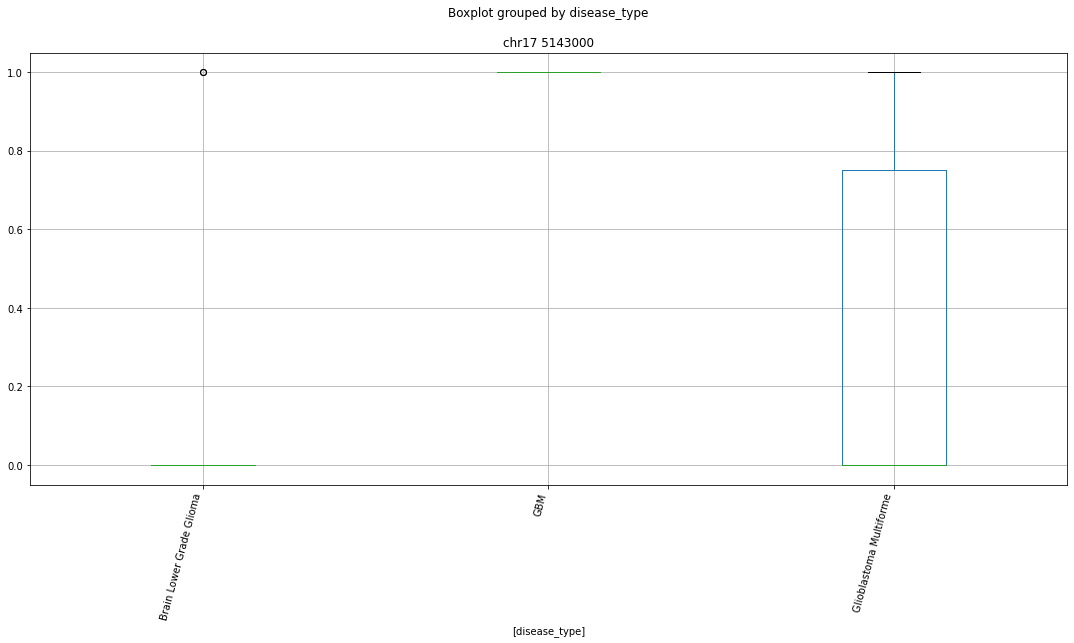

 p : 2.4075104891809472e-20  ( t : 15.005659309765589 ) :  chr2 3365000


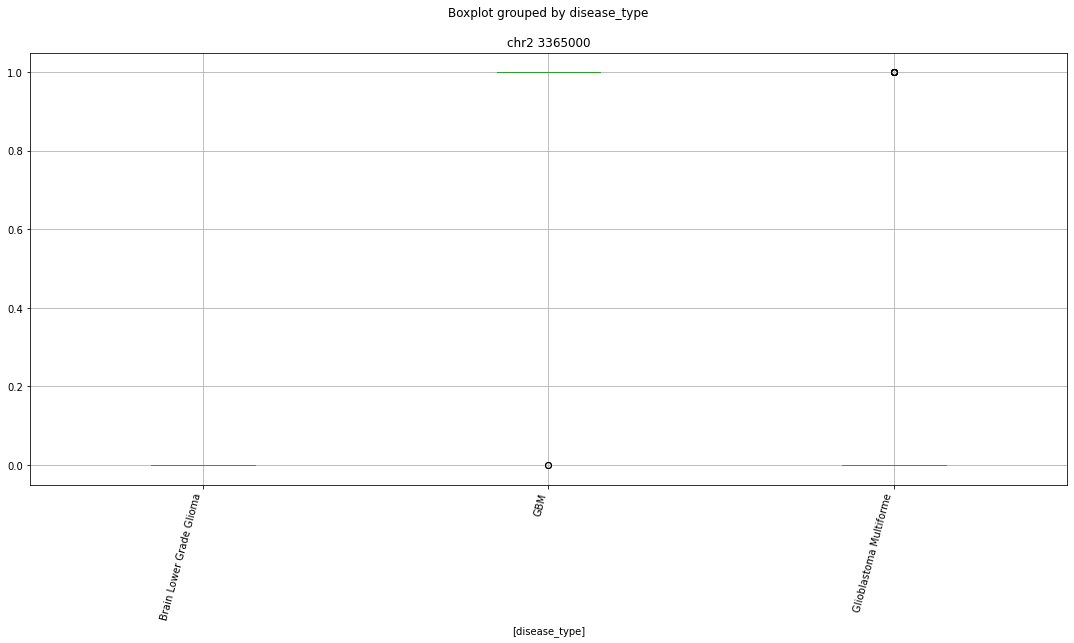

 p : 2.4075104891809472e-20  ( t : 15.005659309765589 ) :  chr14 58589000


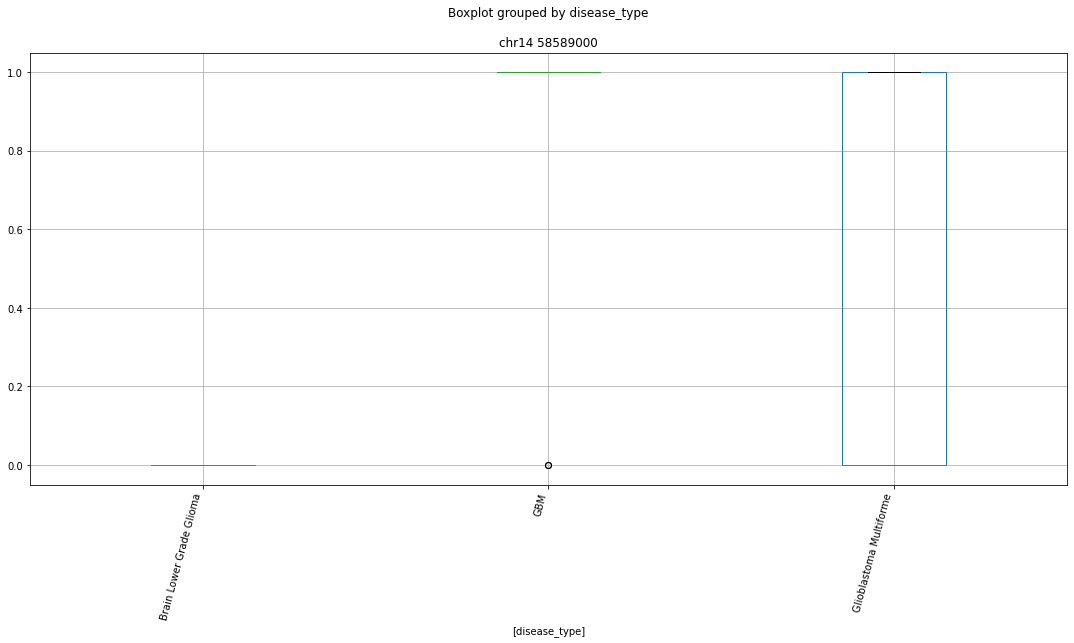

 p : 2.4075104891809472e-20  ( t : 15.005659309765589 ) :  chr12 37813000


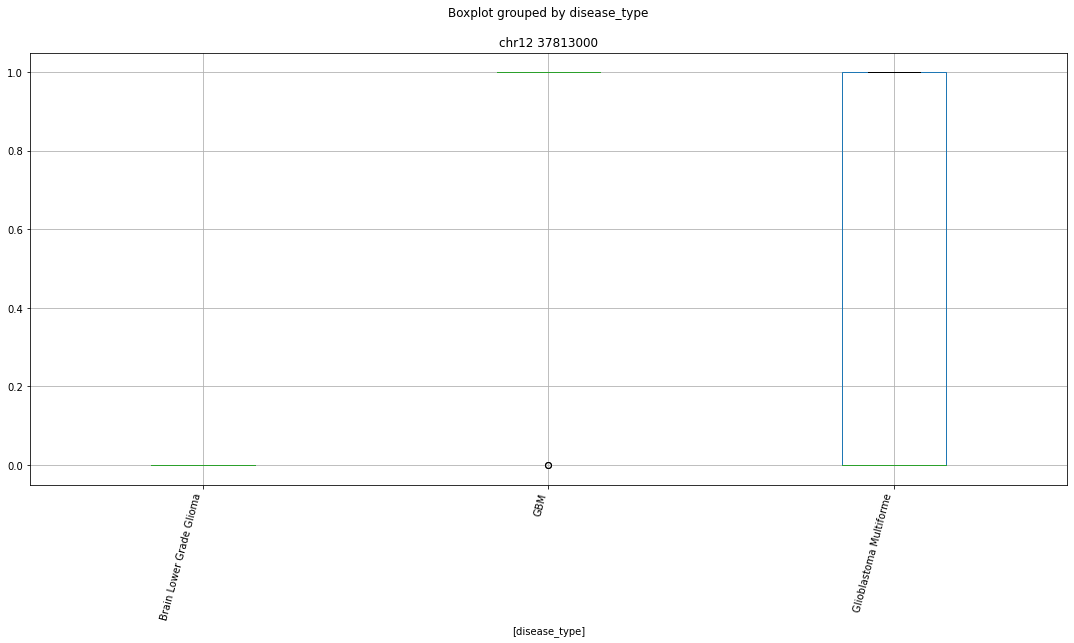

 p : 2.4075104891809472e-20  ( t : 15.005659309765589 ) :  chr10 70686000


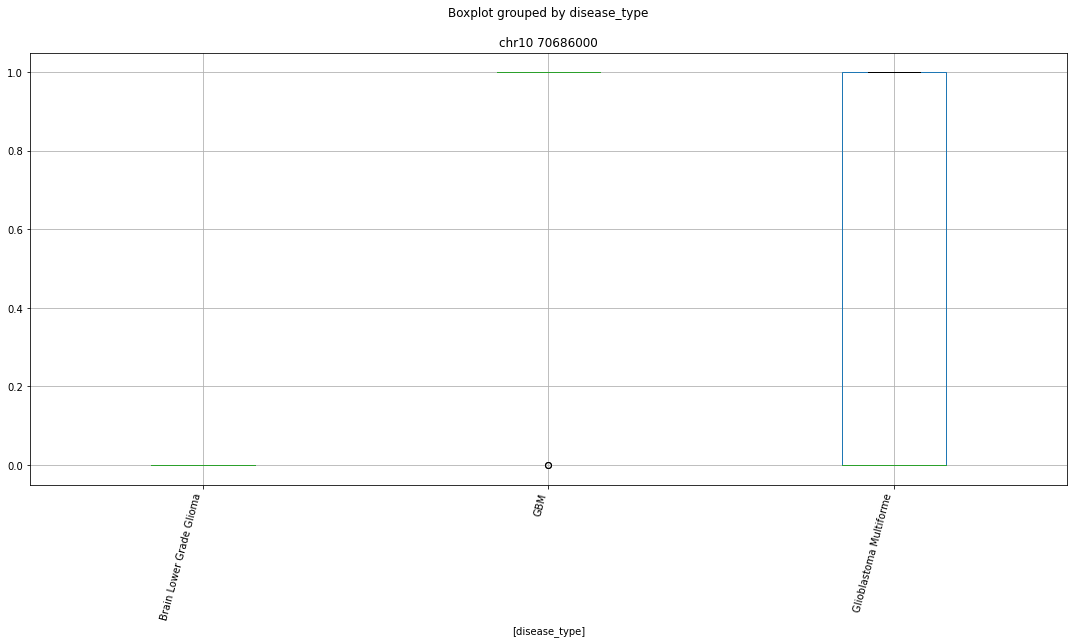

 p : 2.4075104891809472e-20  ( t : 15.005659309765589 ) :  chr9 6808000


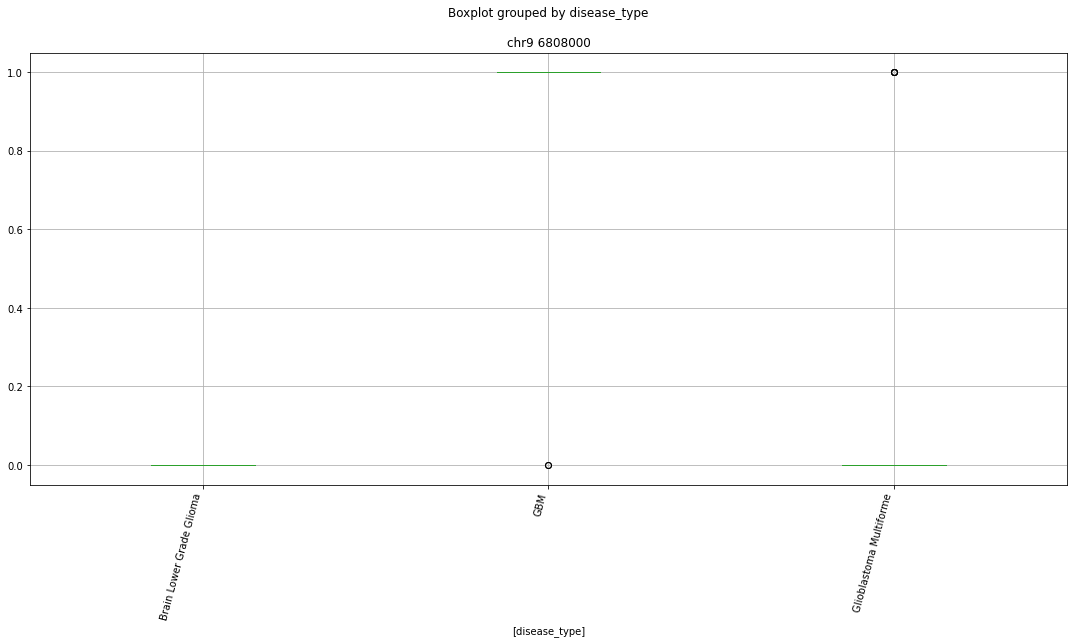

 p : 2.4075104891809472e-20  ( t : 15.005659309765589 ) :  chr20 45645000


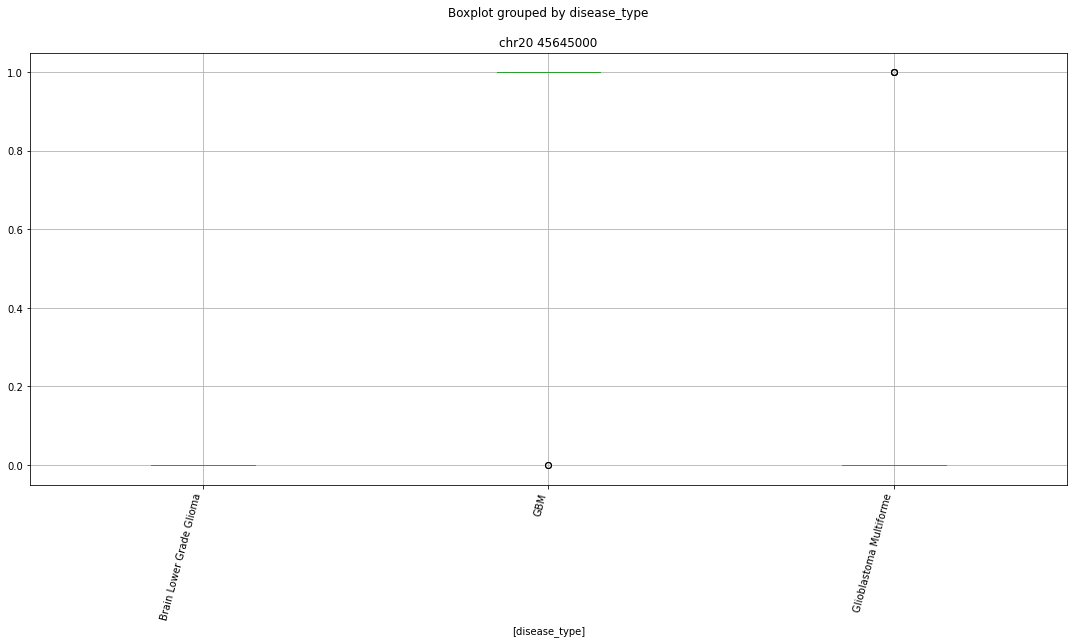

 p : 2.4234851722849214e-20  ( t : 15.003282913852896 ) :  chr13 46514000


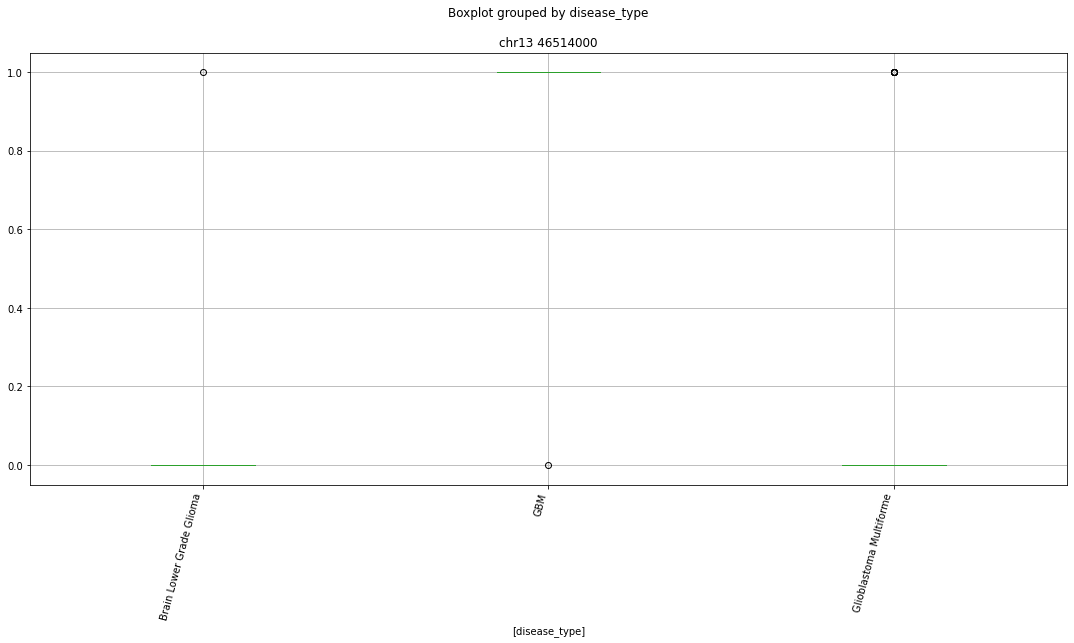

 p : 2.4234851722849214e-20  ( t : 15.003282913852896 ) :  chr16 89463000


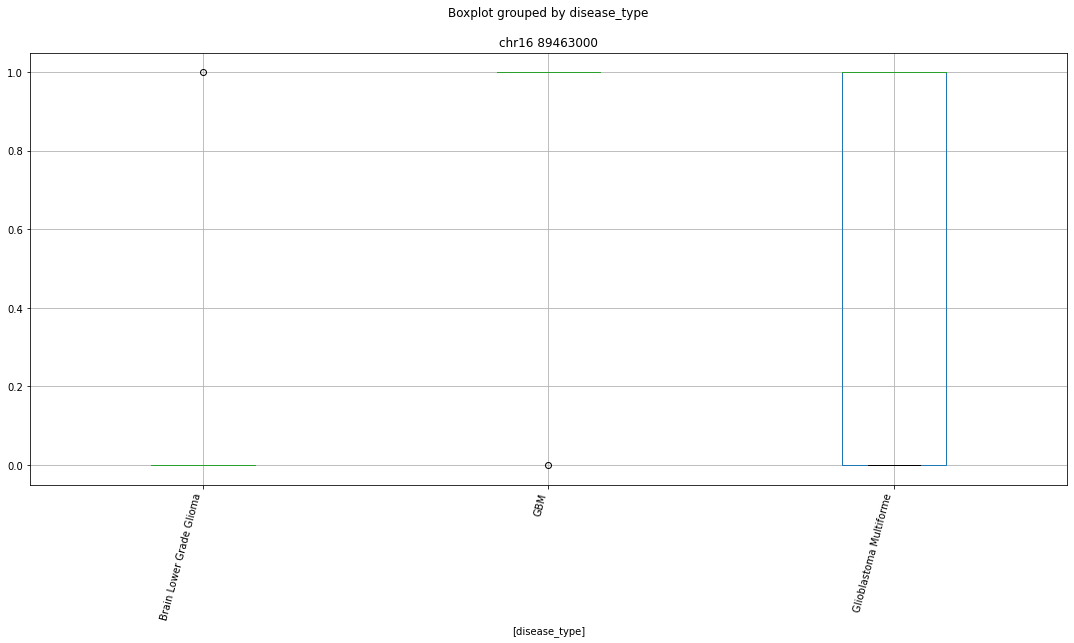

 p : 6.052106007130139e-19  ( t : 14.65150731722394 ) :  chr14 90445000


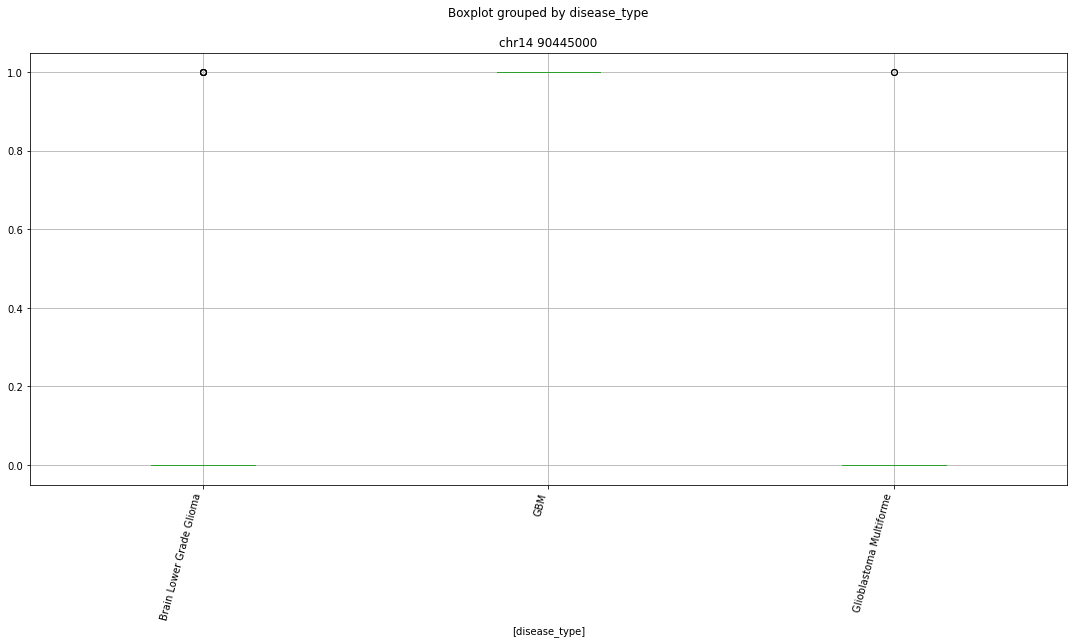

 p : 3.5344159057936754e-18  ( t : 13.982131454109561 ) :  chr16 31170000


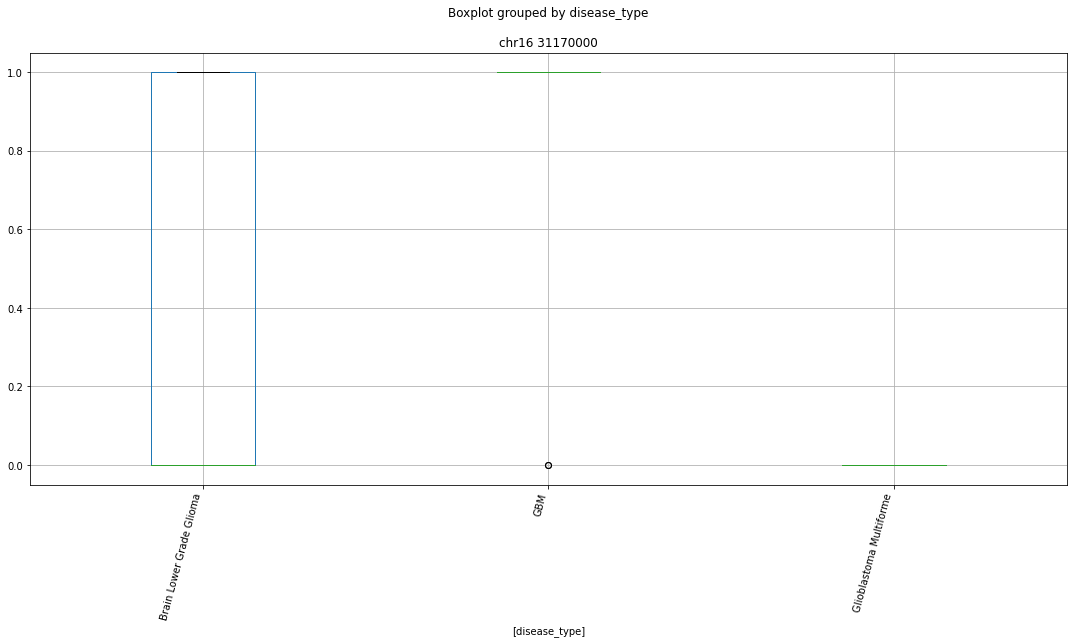

 p : 3.5344159057936754e-18  ( t : 13.982131454109561 ) :  chr2 11164000


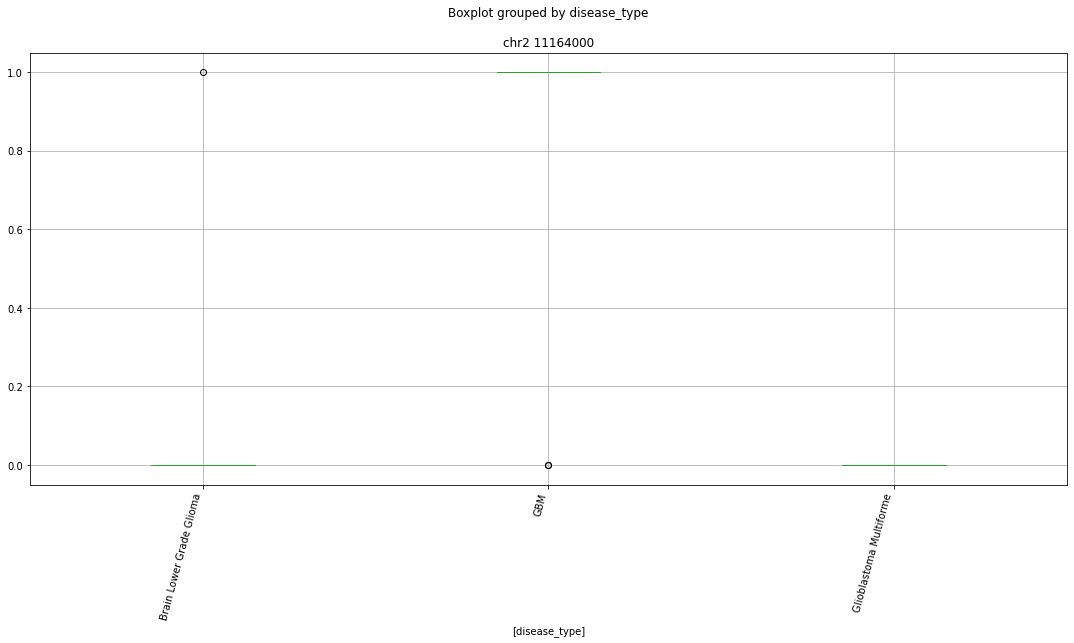

 p : 2.0346699265924837e-16  ( t : 11.961887225105135 ) :  chr11 124705000


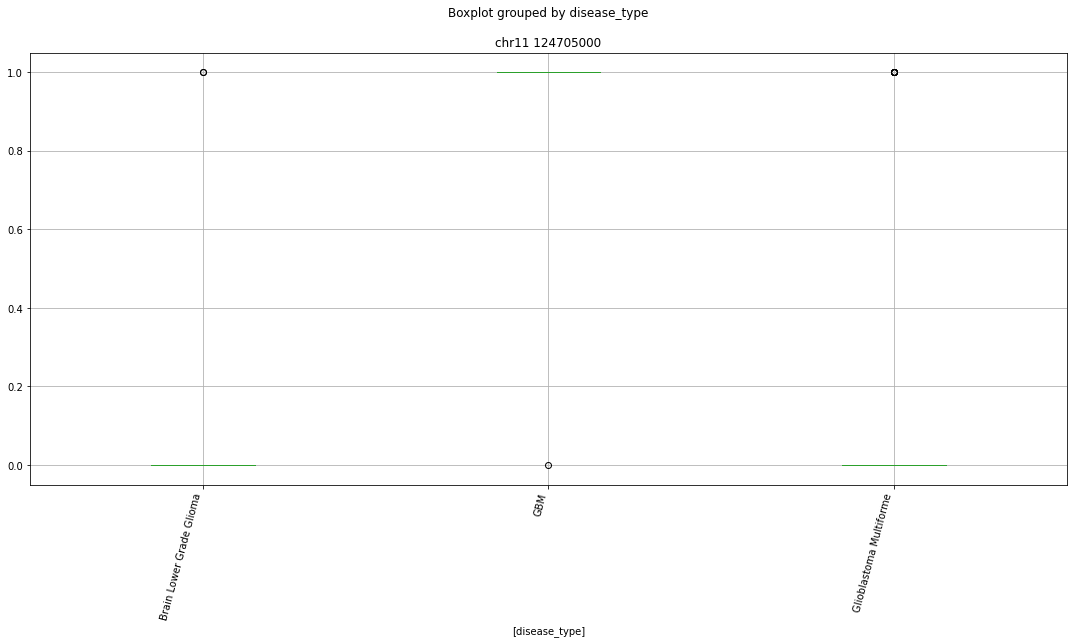

 p : 2.0346699265925125e-16  ( t : 11.961887225105132 ) :  chr20 32121000


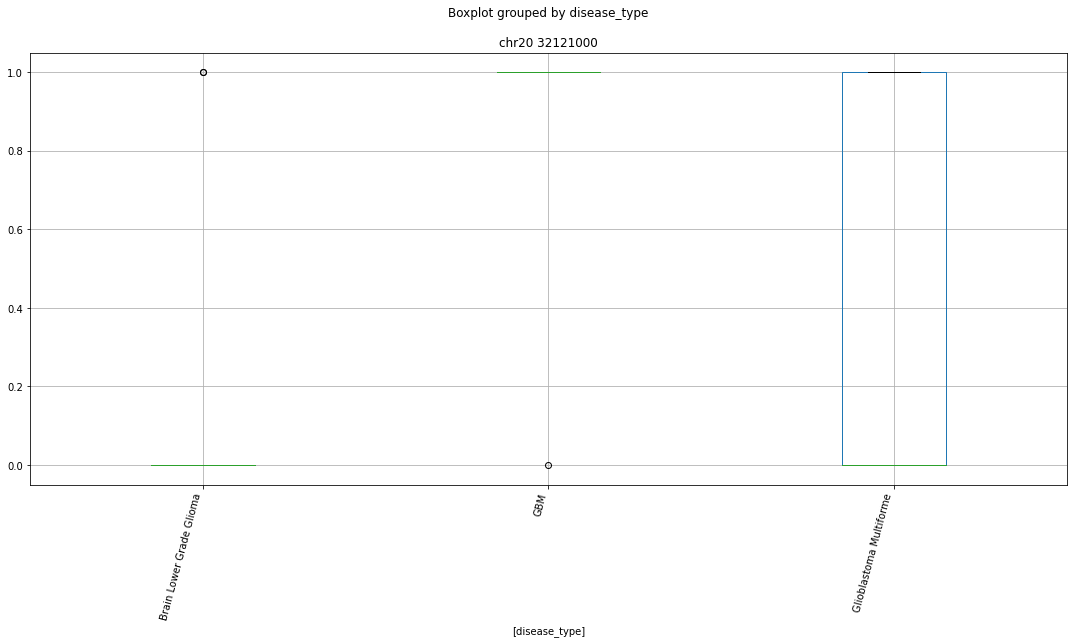

 p : 2.0346699265925125e-16  ( t : 11.961887225105132 ) :  chr2 186153000


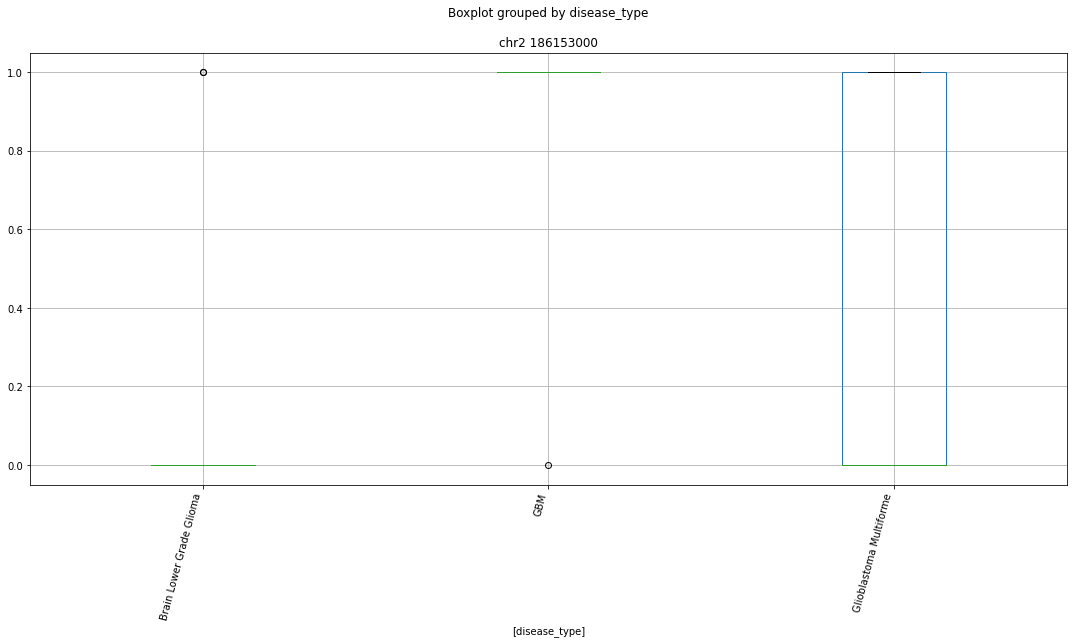

 p : 2.0346699265925125e-16  ( t : 11.961887225105132 ) :  chr17 27034000


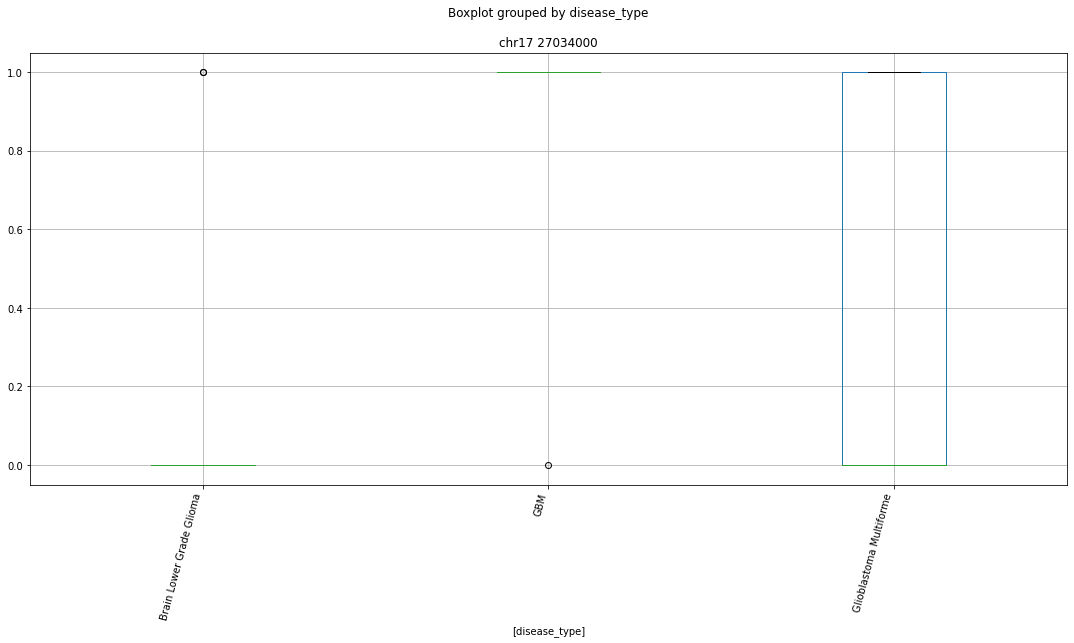

 p : 4.2462278382711956e-16  ( t : 11.730463485510949 ) :  chr5 142074000


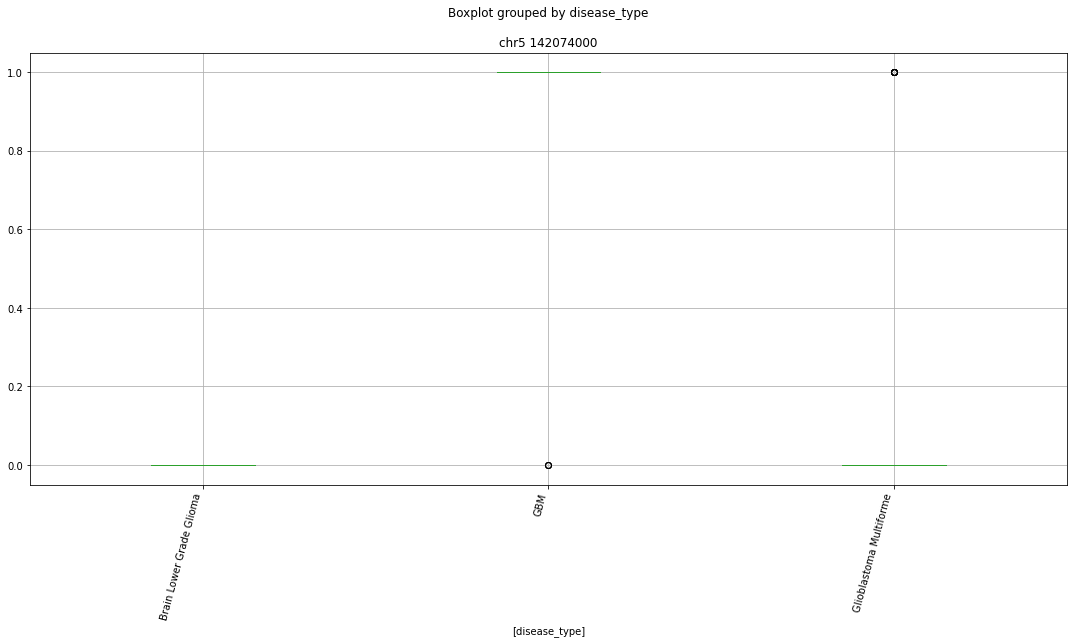

 p : 4.2462278382711956e-16  ( t : 11.730463485510949 ) :  chr1 111800000


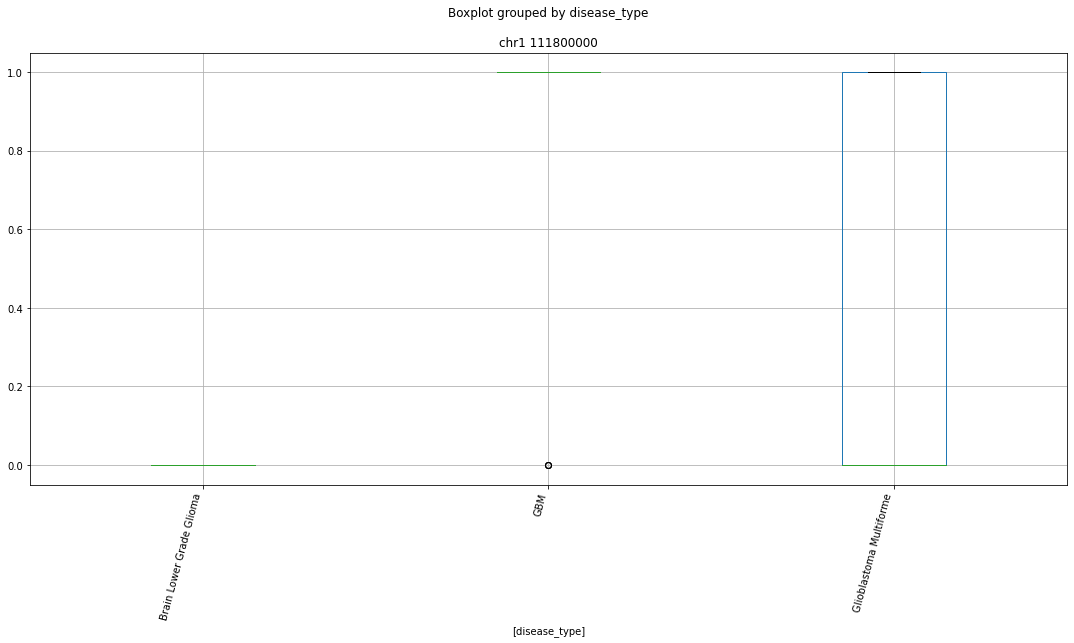

 p : 4.2462278382711956e-16  ( t : 11.730463485510949 ) :  chr1 21389000


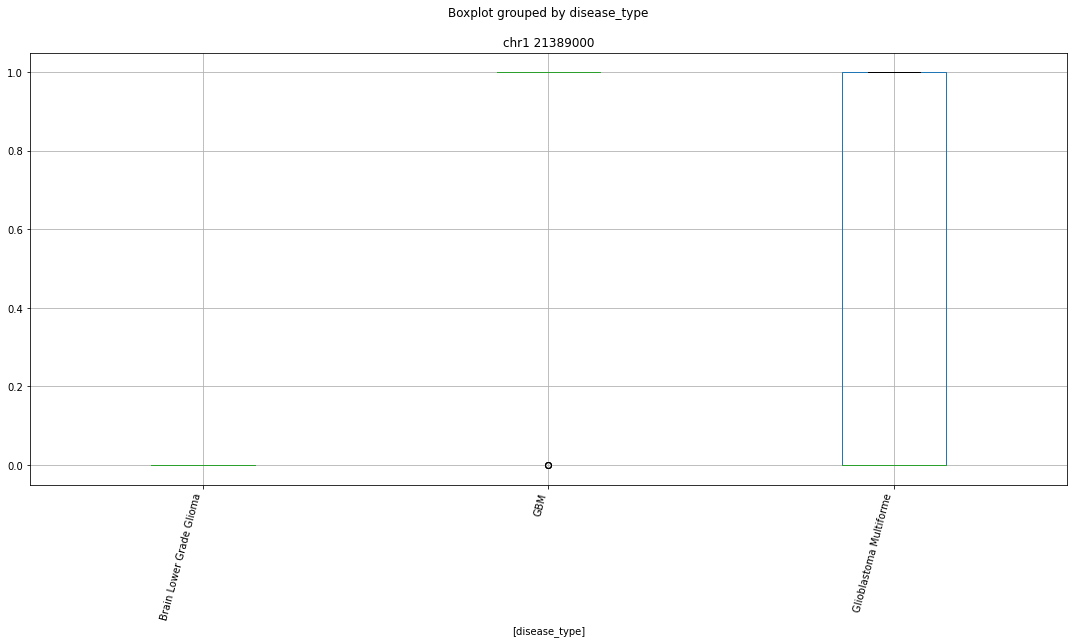

 p : 4.2462278382711956e-16  ( t : 11.730463485510949 ) :  chr2 143992000


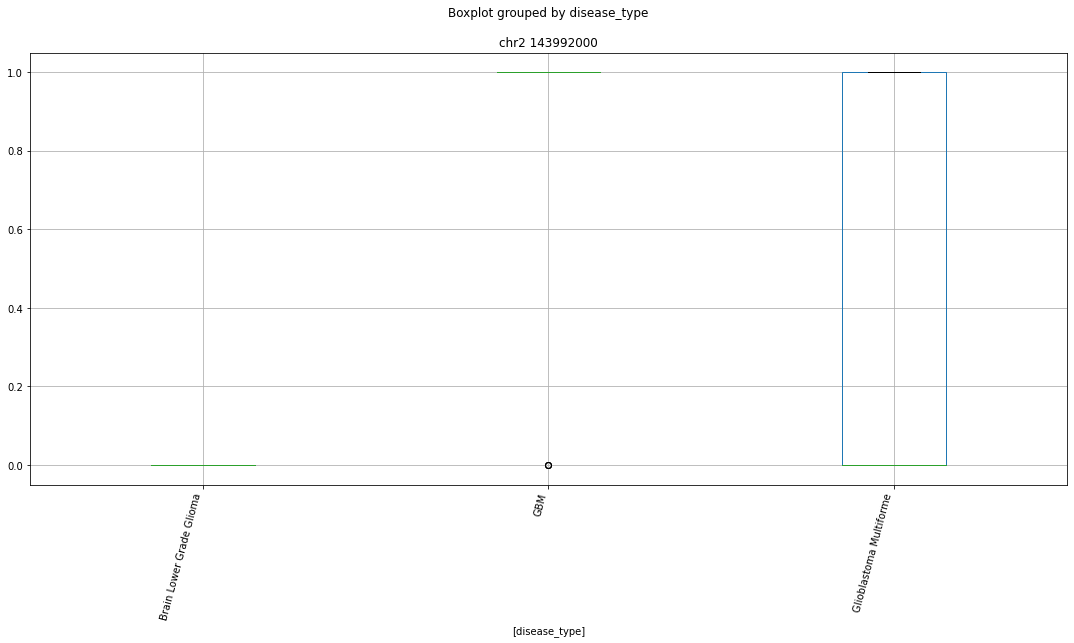

 p : 4.2462278382711956e-16  ( t : 11.730463485510949 ) :  chr2 233723000


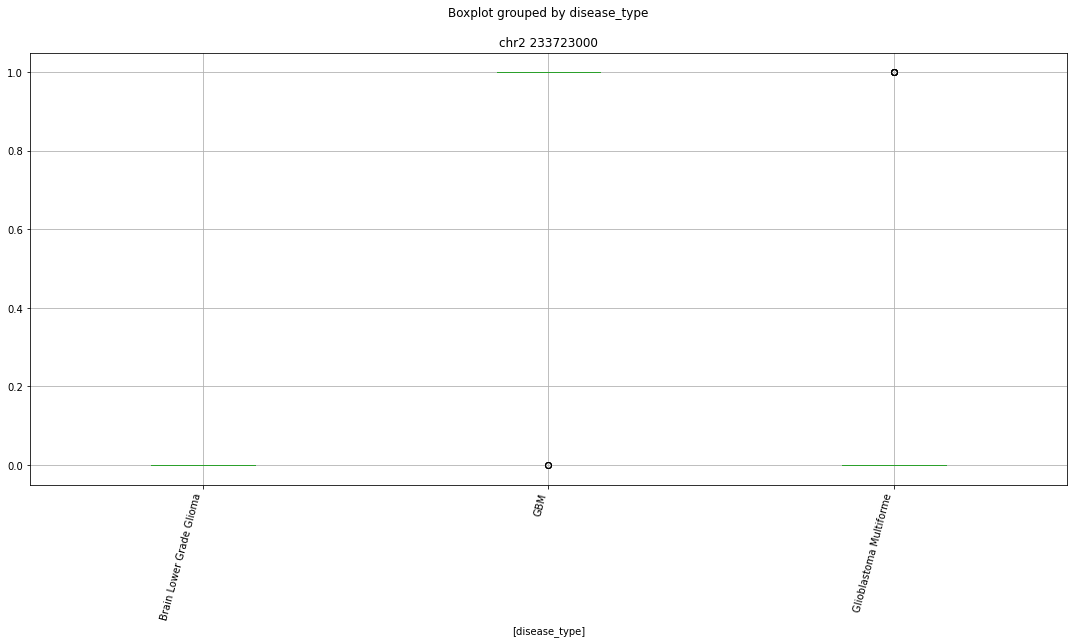

 p : 4.246227838271226e-16  ( t : 11.730463485510947 ) :  chr1 8912000


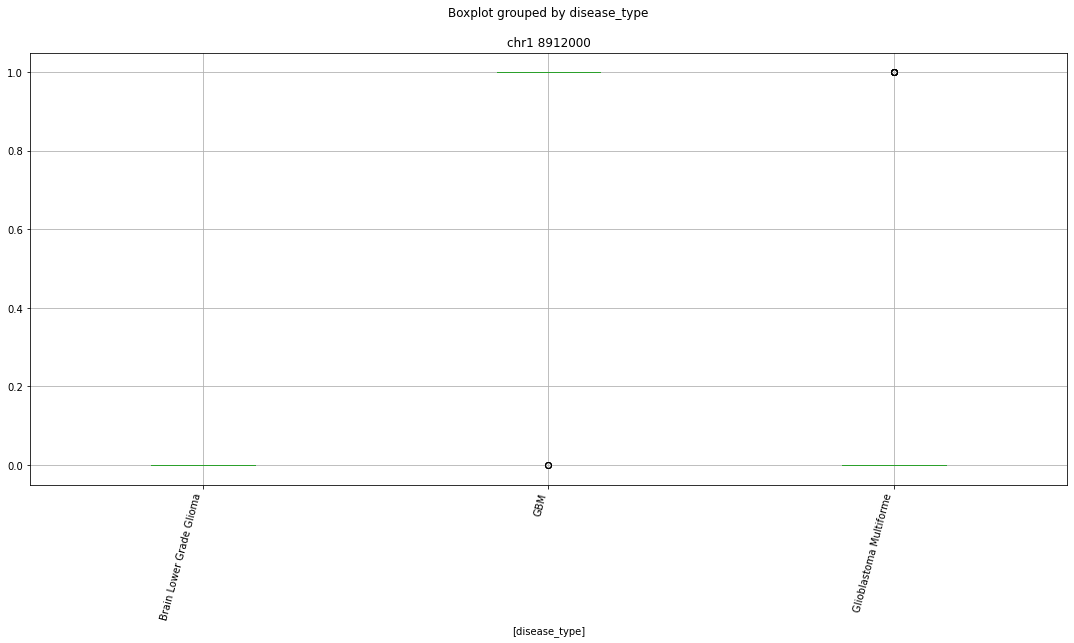

 p : 4.246227838271226e-16  ( t : 11.730463485510947 ) :  chr11 60492000


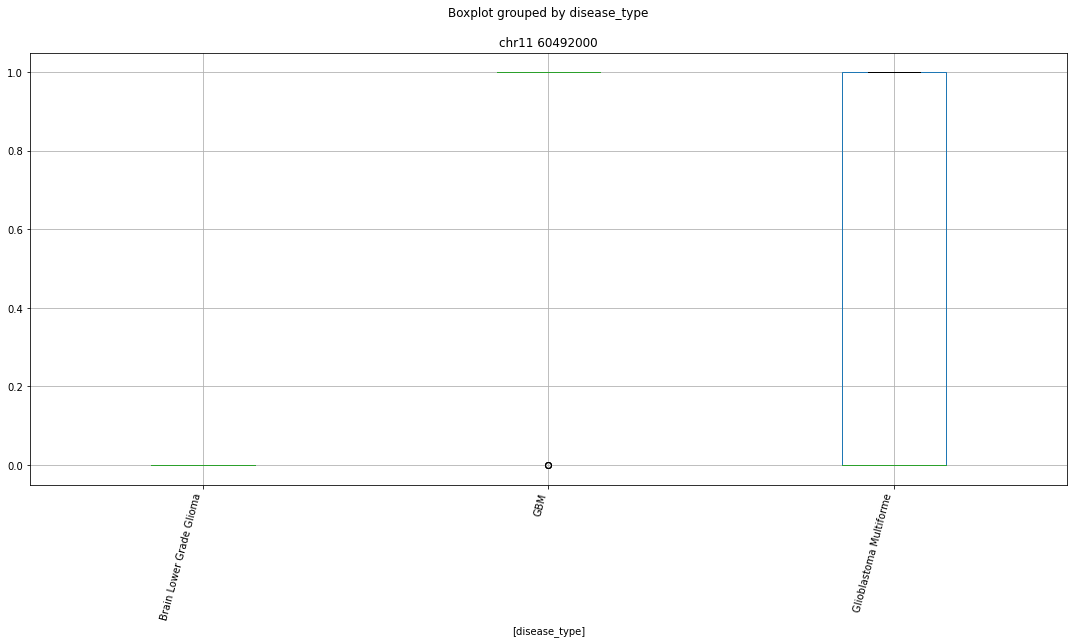

 p : 4.246227838271226e-16  ( t : 11.730463485510947 ) :  chr11 3398000


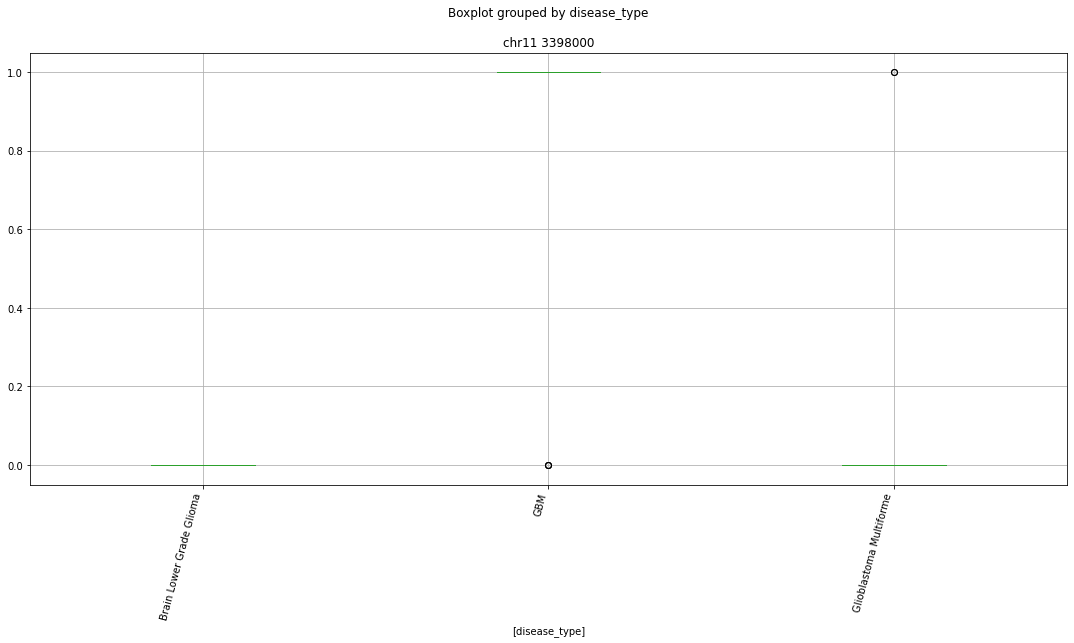

 p : 4.246227838271226e-16  ( t : 11.730463485510947 ) :  chr12 48915000


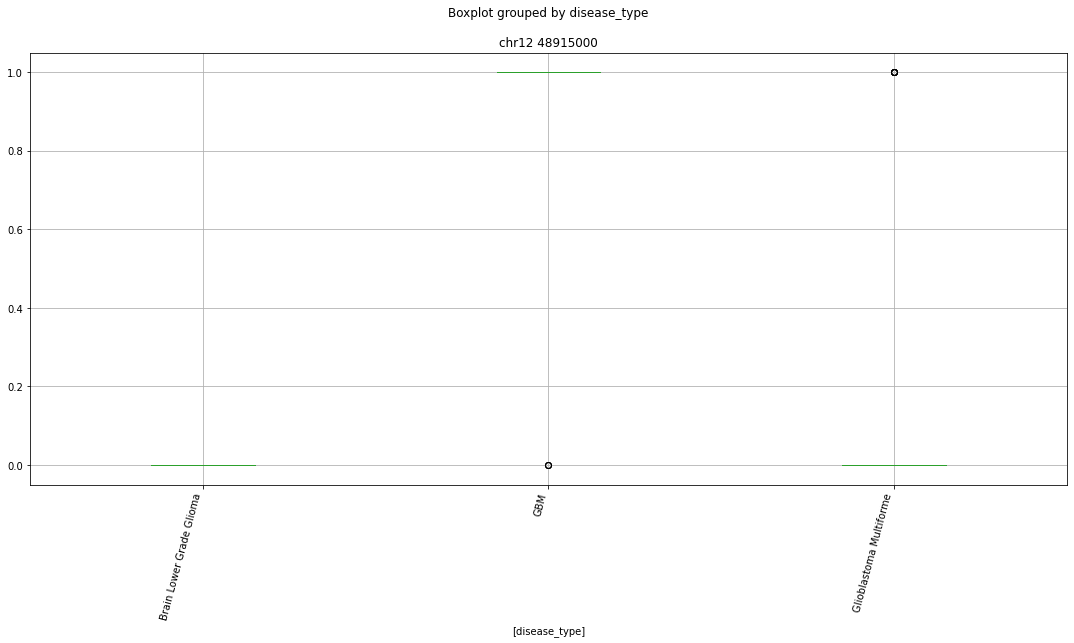

 p : 4.246227838271226e-16  ( t : 11.730463485510947 ) :  chr19 23532000


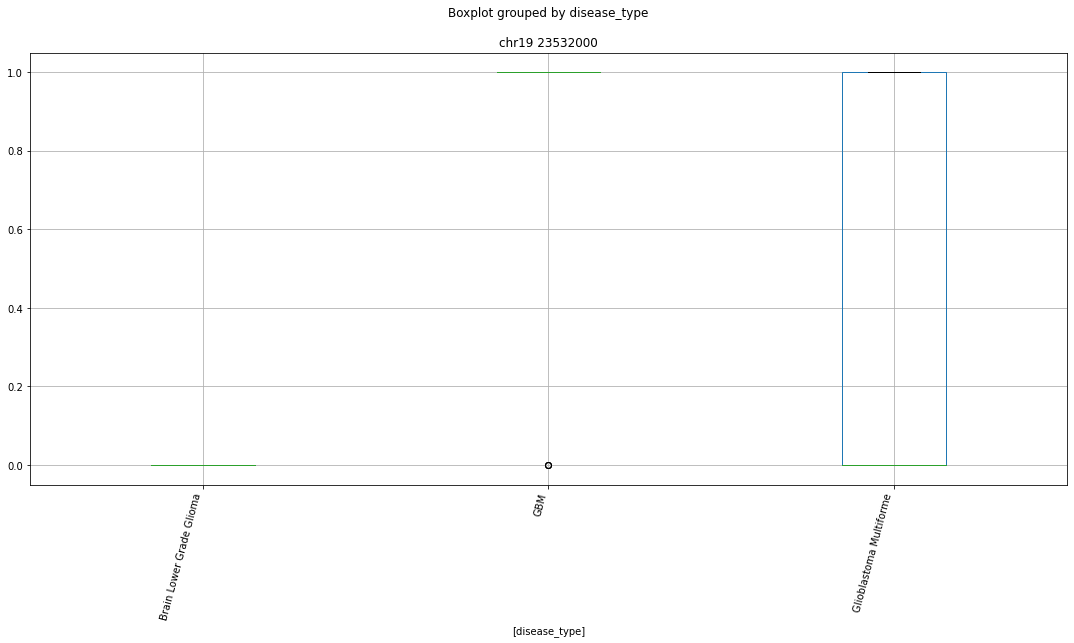

 p : 5.97829993619947e-16  ( t : 11.623581854721554 ) :  chr1 147062000


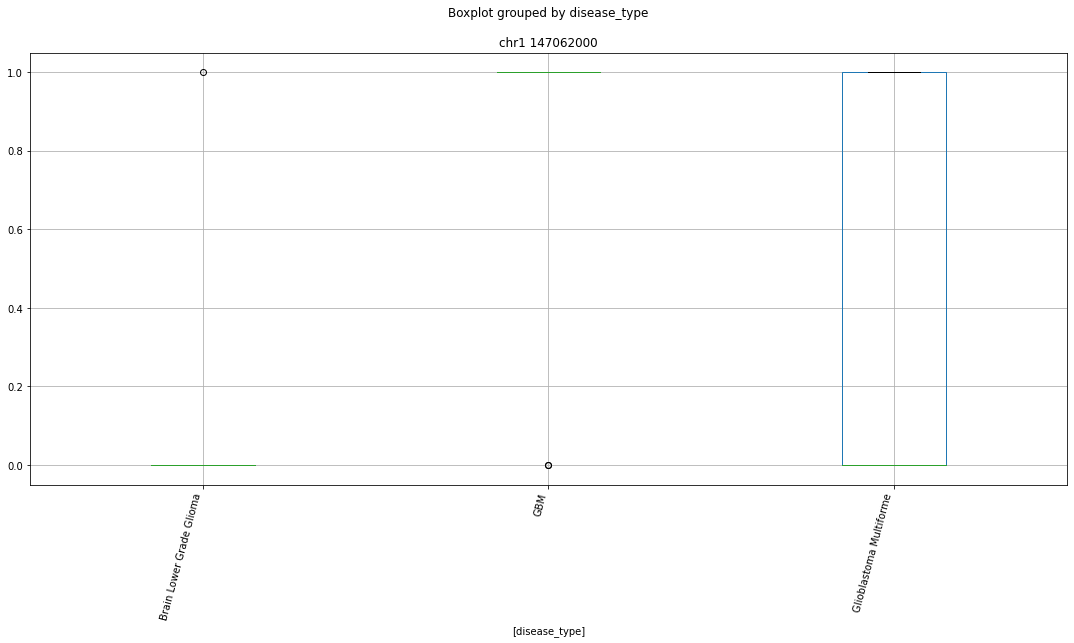

 p : 5.97829993619947e-16  ( t : 11.623581854721554 ) :  chr2 11164000


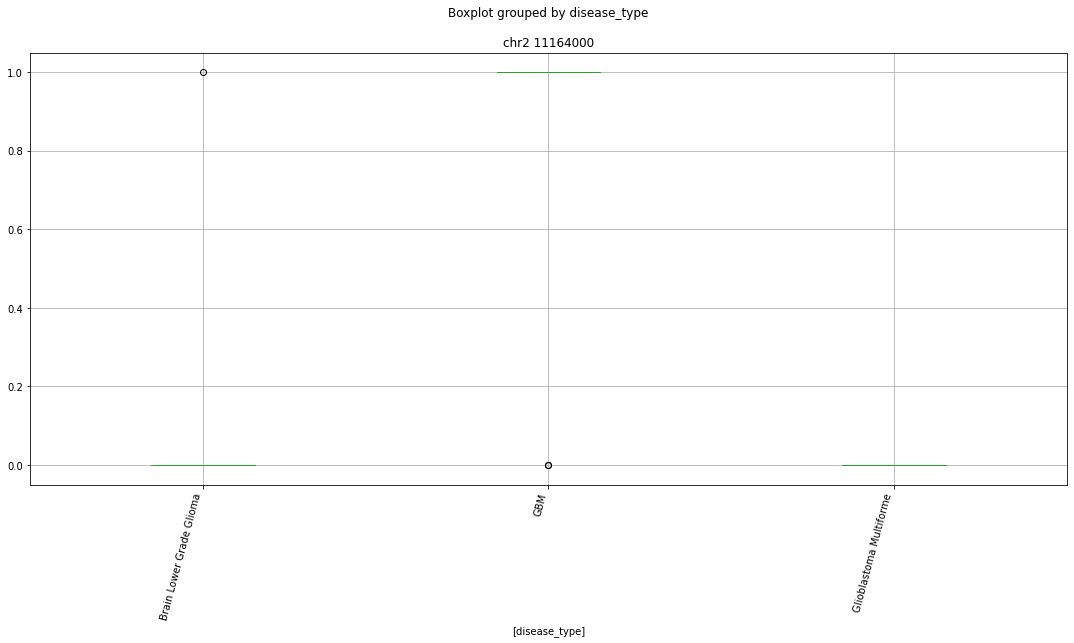

 p : 5.97829993619947e-16  ( t : 11.623581854721554 ) :  chr3 136724000


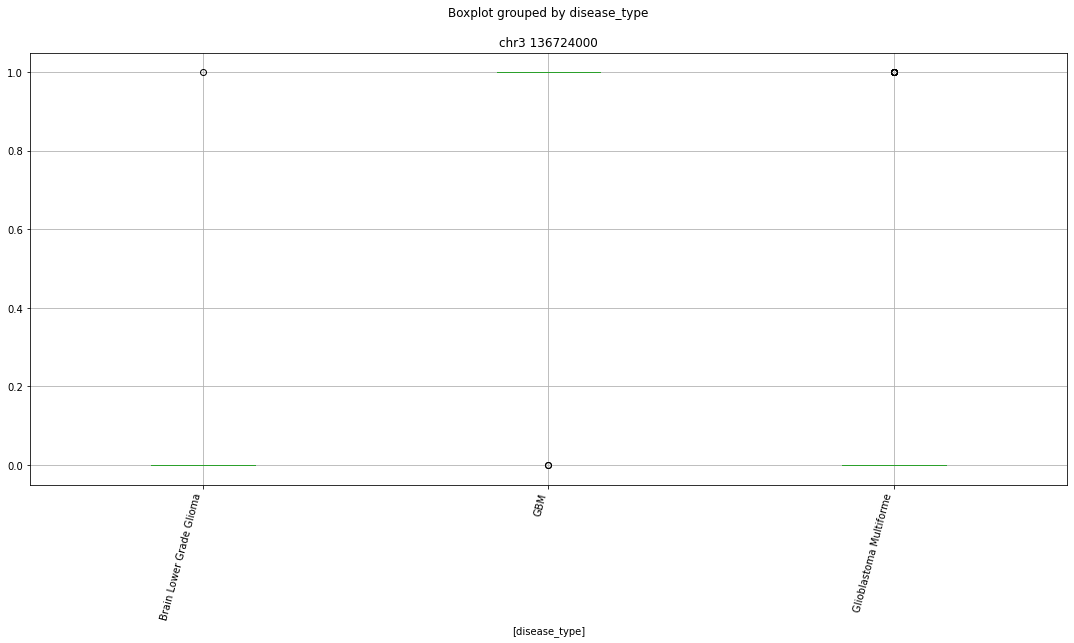

 p : 5.97829993619947e-16  ( t : 11.623581854721554 ) :  chr13 100618000


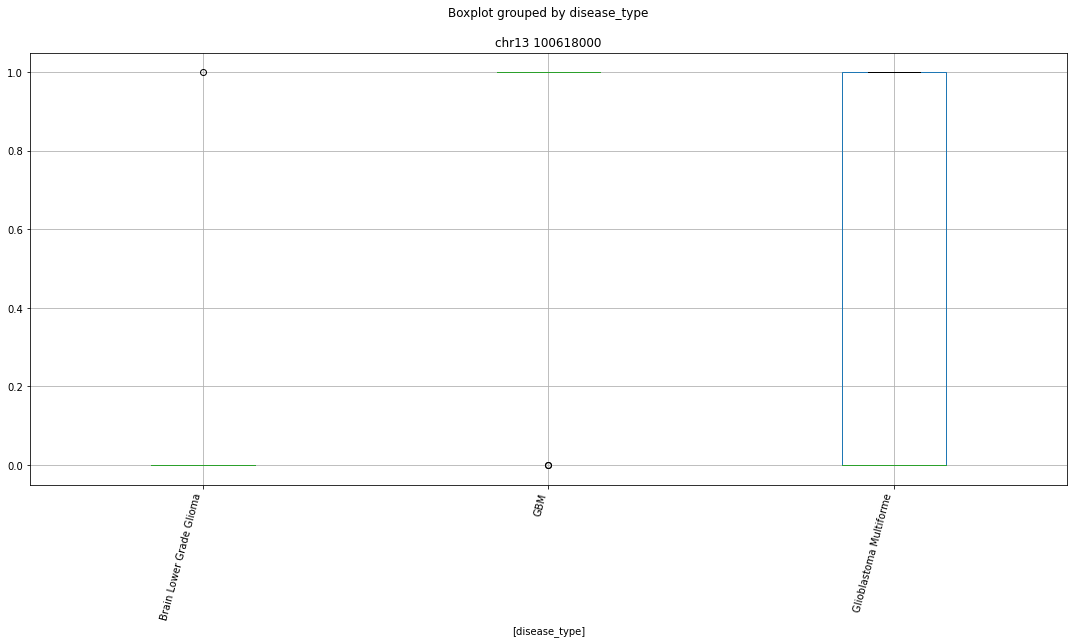

 p : 7.254146375649524e-15  ( t : 10.857133990633349 ) :  chr7 22801000


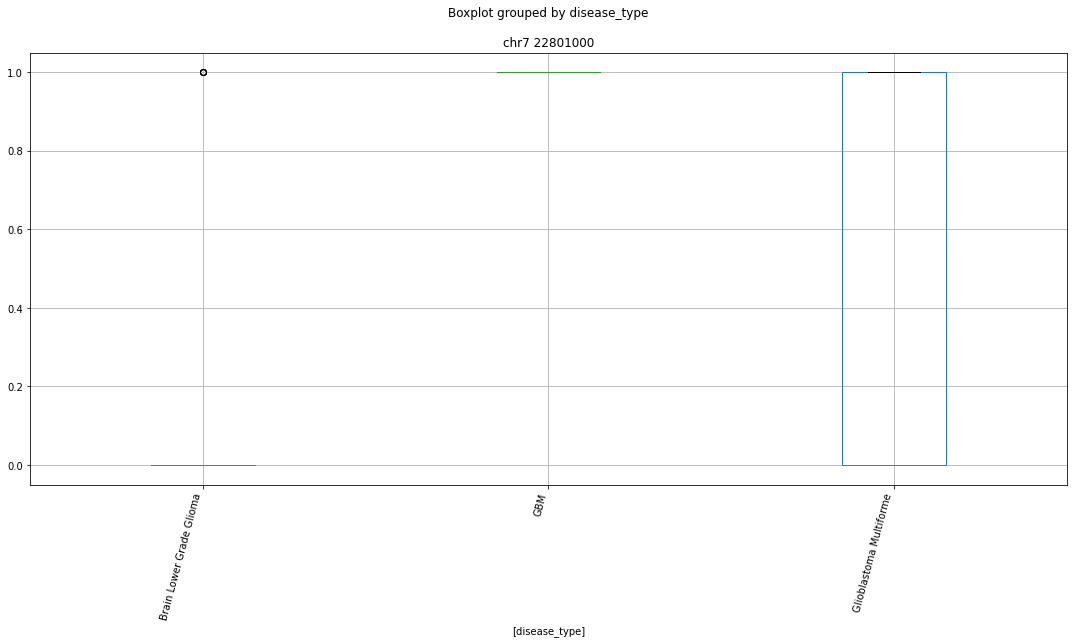

 p : 7.254146375649551e-15  ( t : 10.857133990633347 ) :  chr14 90445000


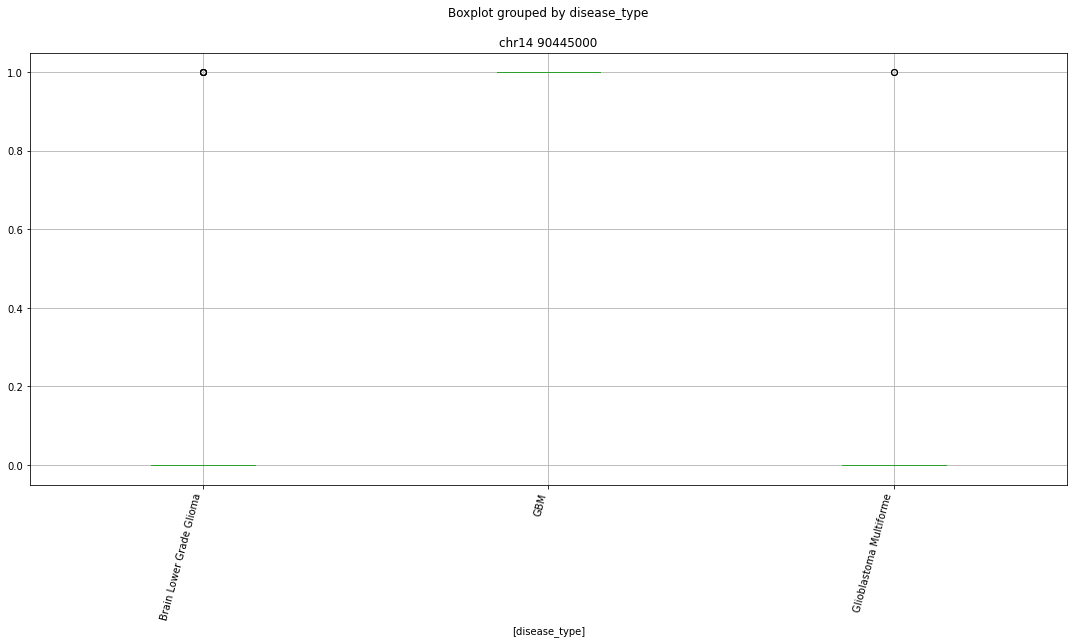

 p : 2.2297877480953916e-14  ( t : 10.930334954713064 ) :  chr17 27033000


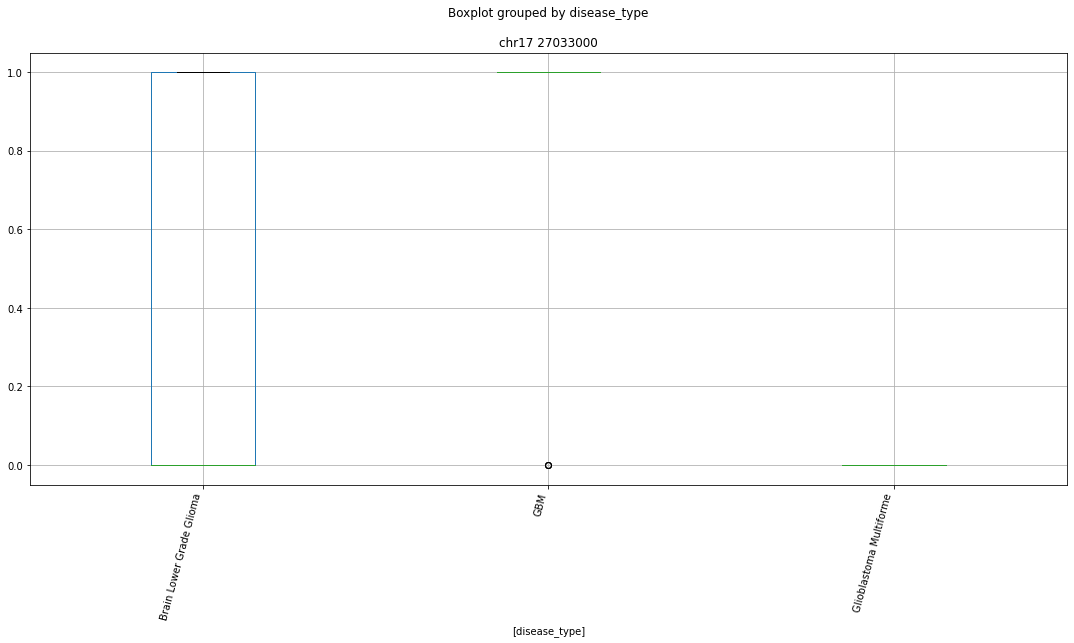

 p : 7.704722670518554e-14  ( t : 10.151540384745967 ) :  chr2 201165000


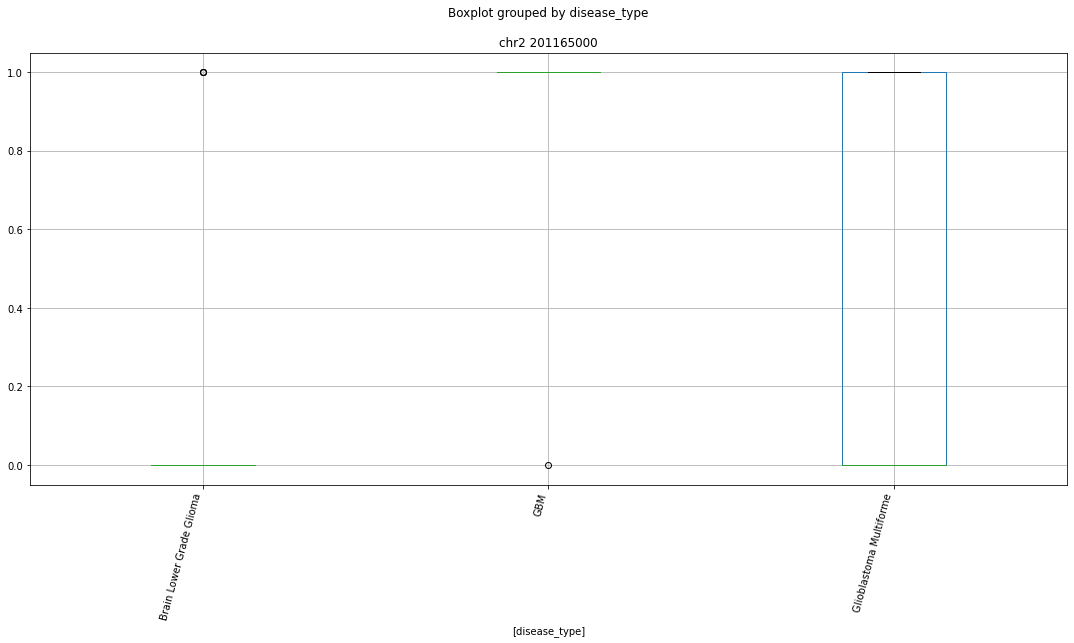

 p : 3.3711776281921387e-13  ( t : 9.719554838517347 ) :  chr16 1600000


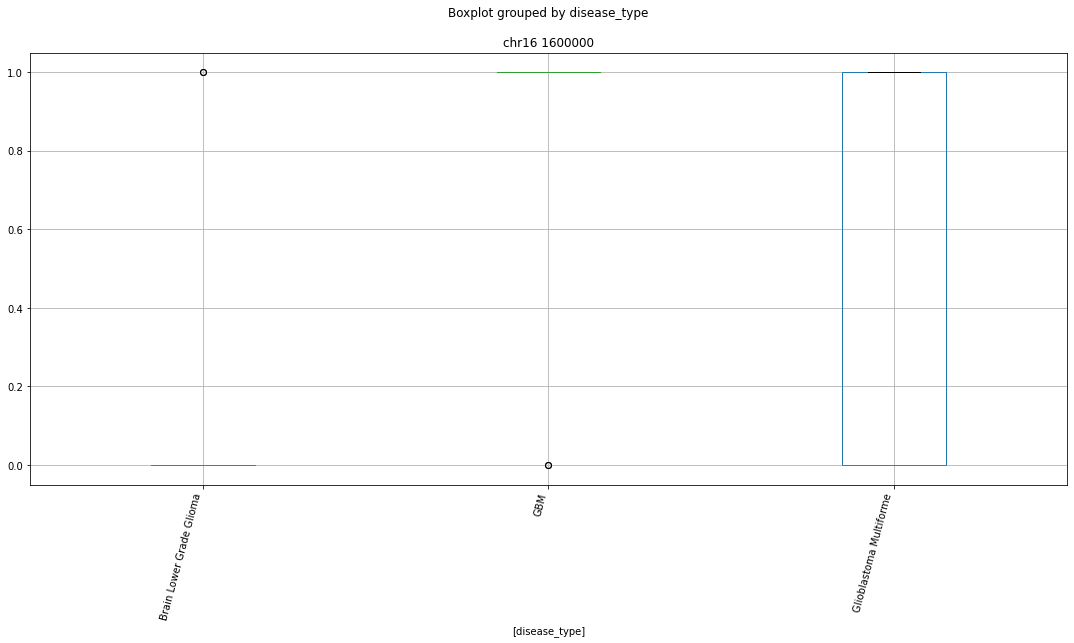

 p : 3.3711776281921387e-13  ( t : 9.719554838517347 ) :  chr2 186474000


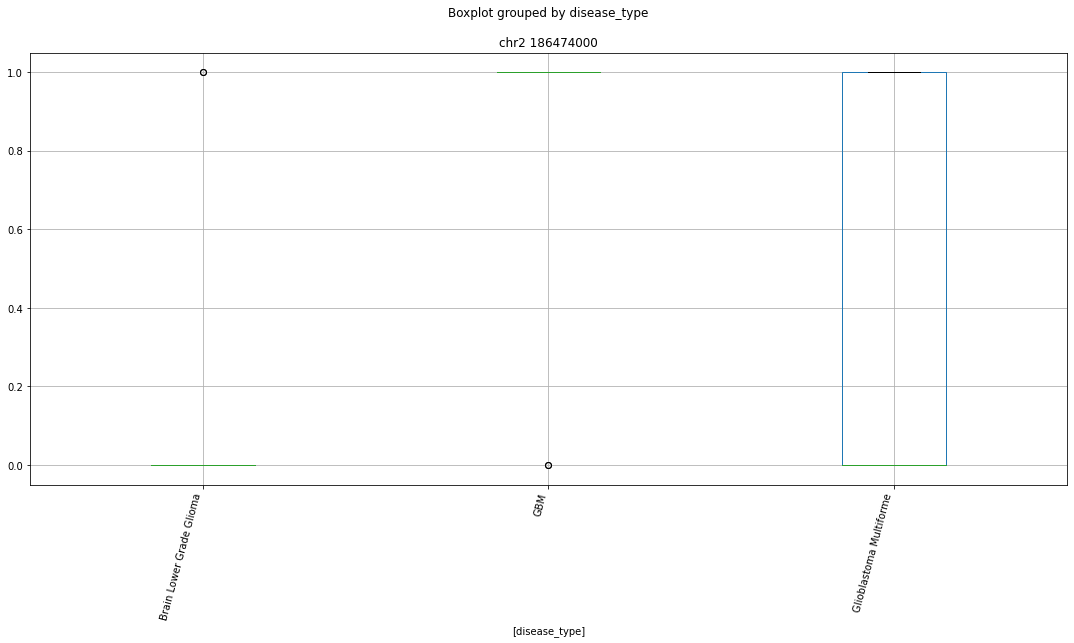

 p : 3.7826505374862424e-13  ( t : 9.686111434264069 ) :  chr6 47505000


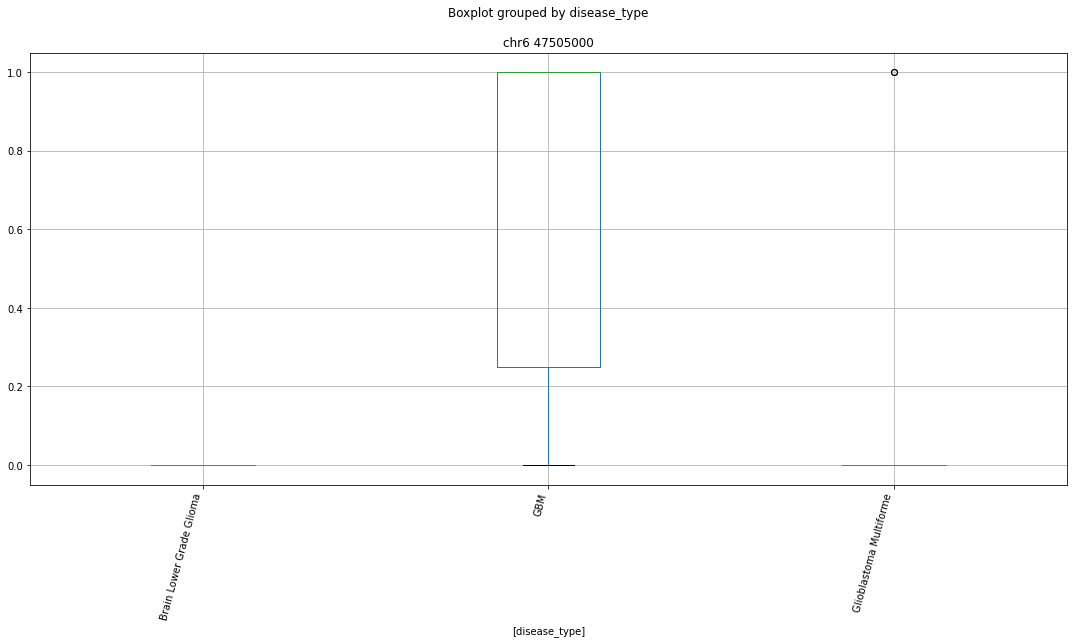

 p : 3.7826505374862424e-13  ( t : 9.686111434264069 ) :  chr14 84098000


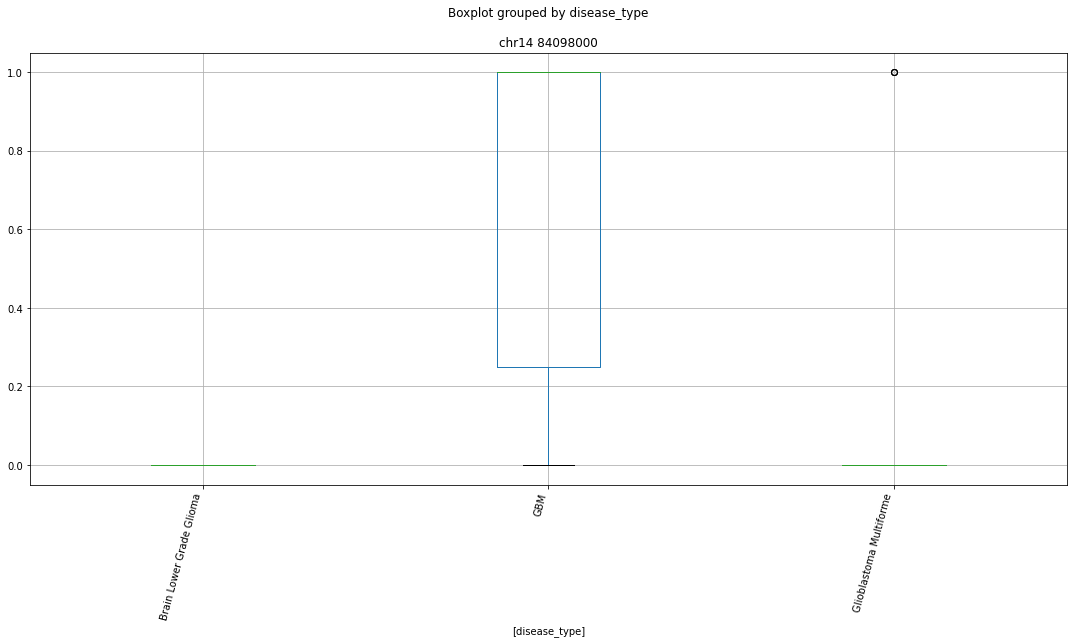

 p : 3.7826505374862424e-13  ( t : 9.686111434264069 ) :  chrX 126674000


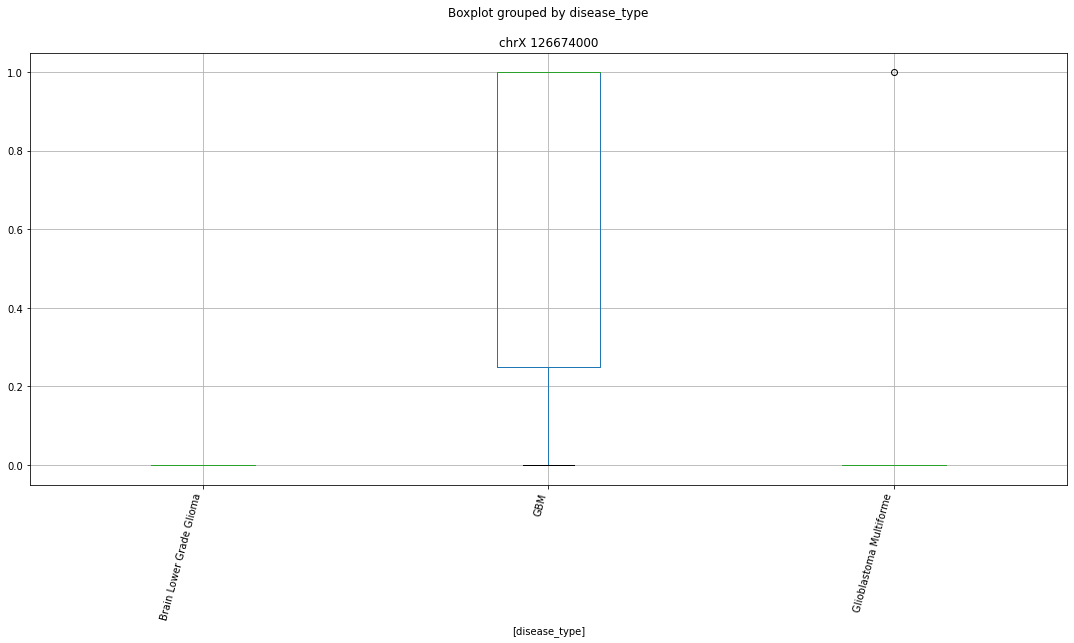

 p : 3.7826505374862424e-13  ( t : 9.686111434264069 ) :  chr22 38409000


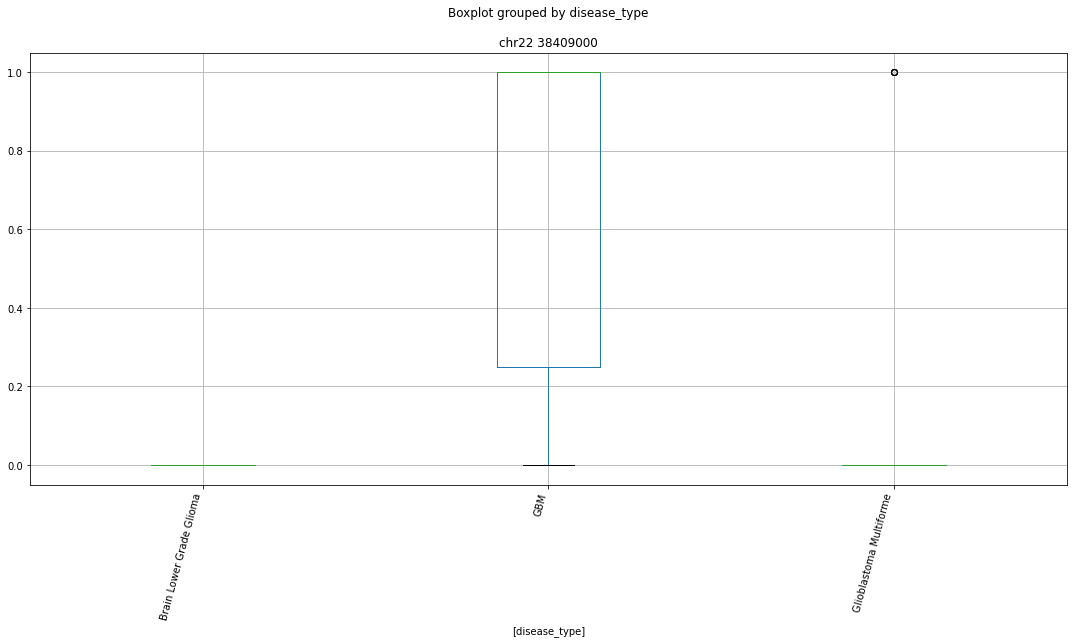

 p : 3.7826505374862424e-13  ( t : 9.686111434264069 ) :  chr2 197922000


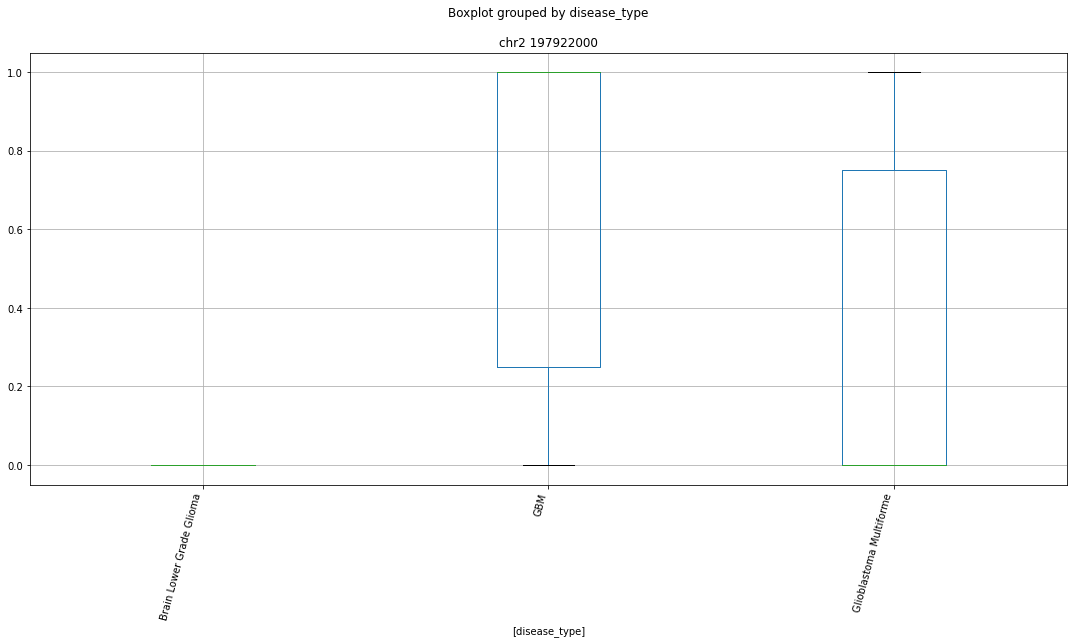

 p : 3.7826505374862424e-13  ( t : 9.686111434264069 ) :  chr9 77763000


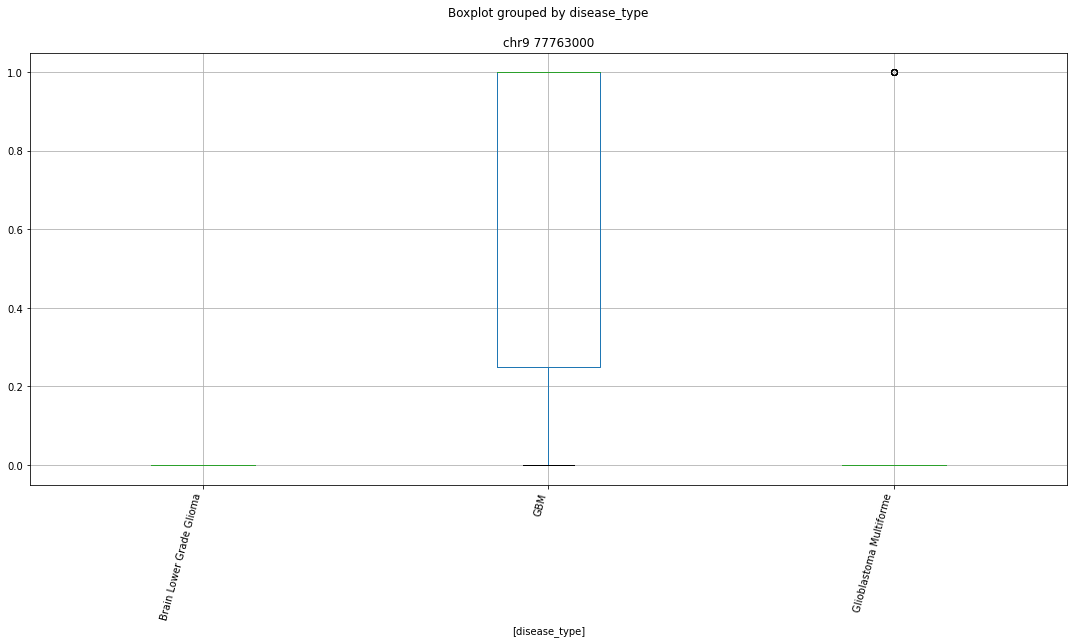

 p : 3.7826505374862424e-13  ( t : 9.686111434264069 ) :  chr11 116348000


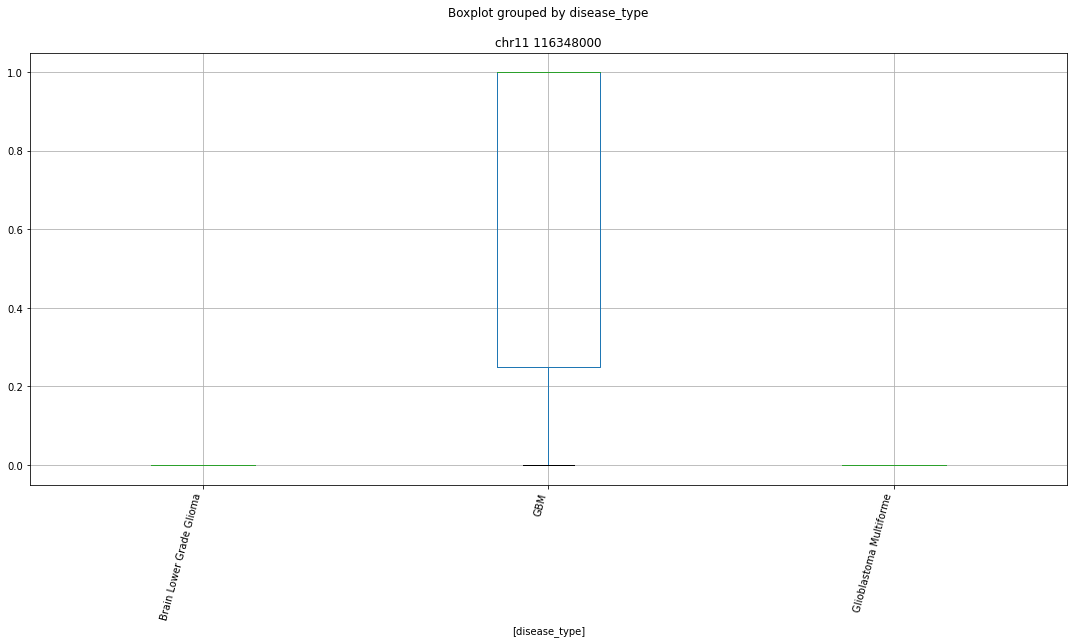

 p : 3.7826505374862424e-13  ( t : 9.686111434264069 ) :  chr14 45390000


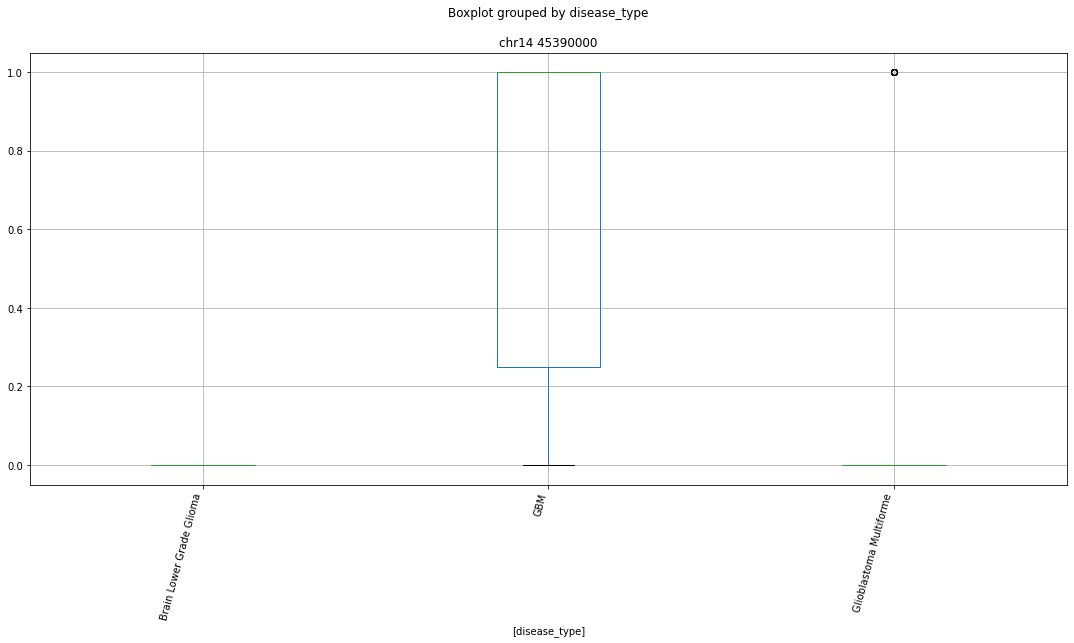

 p : 3.7826505374862424e-13  ( t : 9.686111434264069 ) :  chr13 30270000


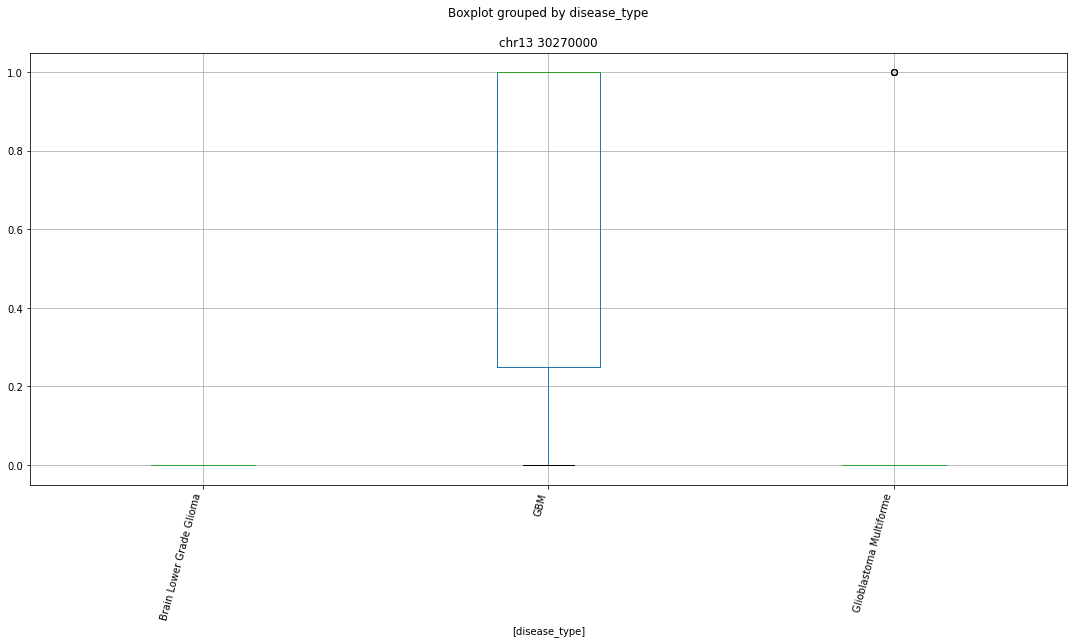

 p : 3.7826505374862424e-13  ( t : 9.686111434264069 ) :  chr12 73853000


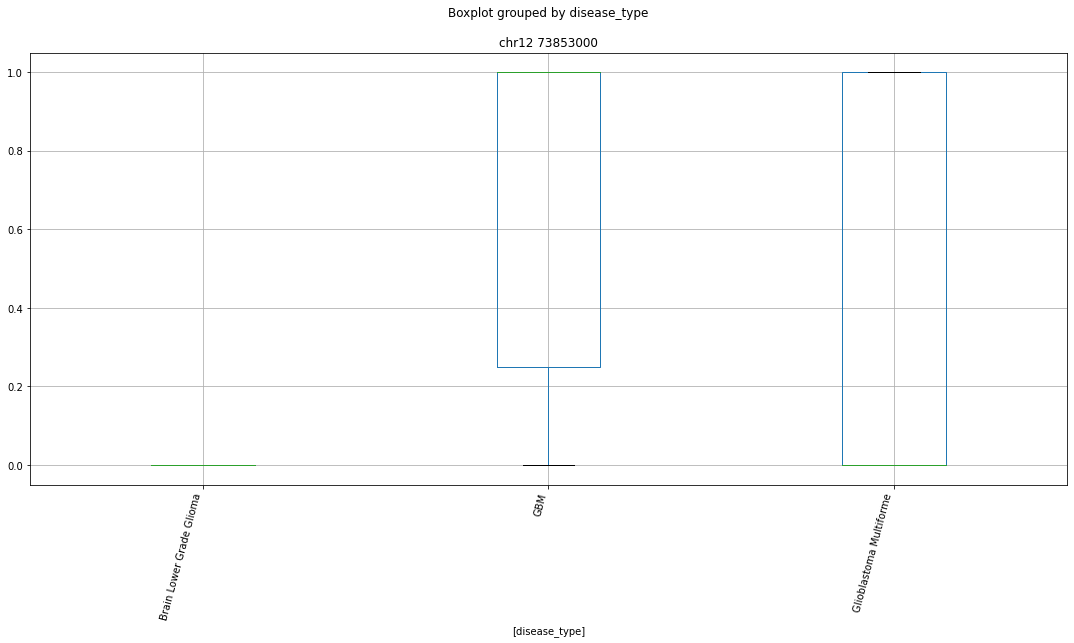

 p : 3.7826505374862424e-13  ( t : 9.686111434264069 ) :  chr11 77097000


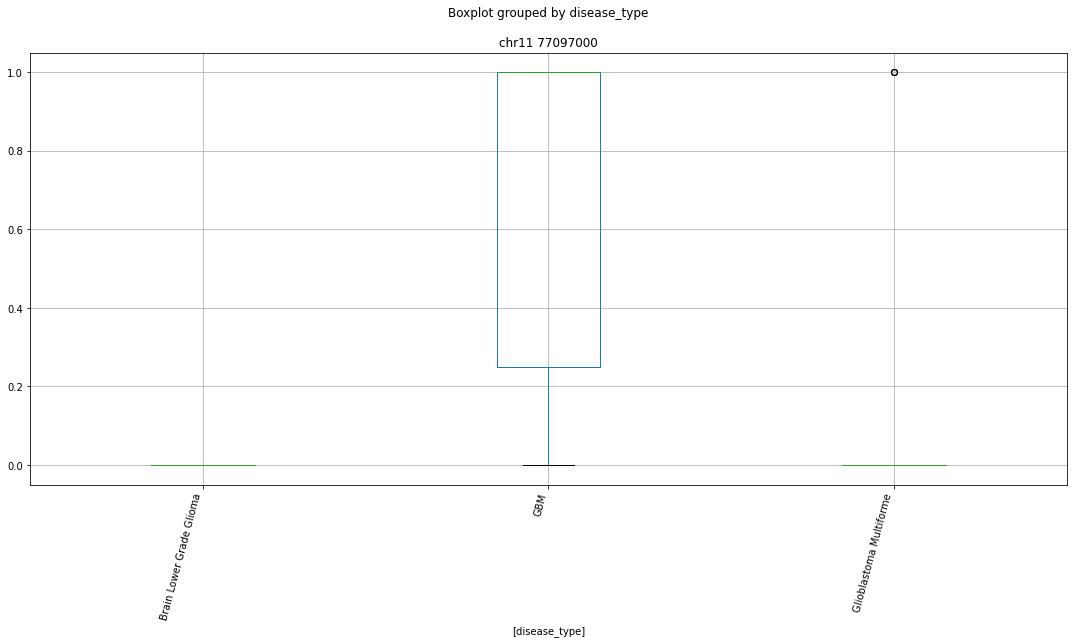

 p : 3.7826505374862424e-13  ( t : 9.686111434264069 ) :  chr8 61751000


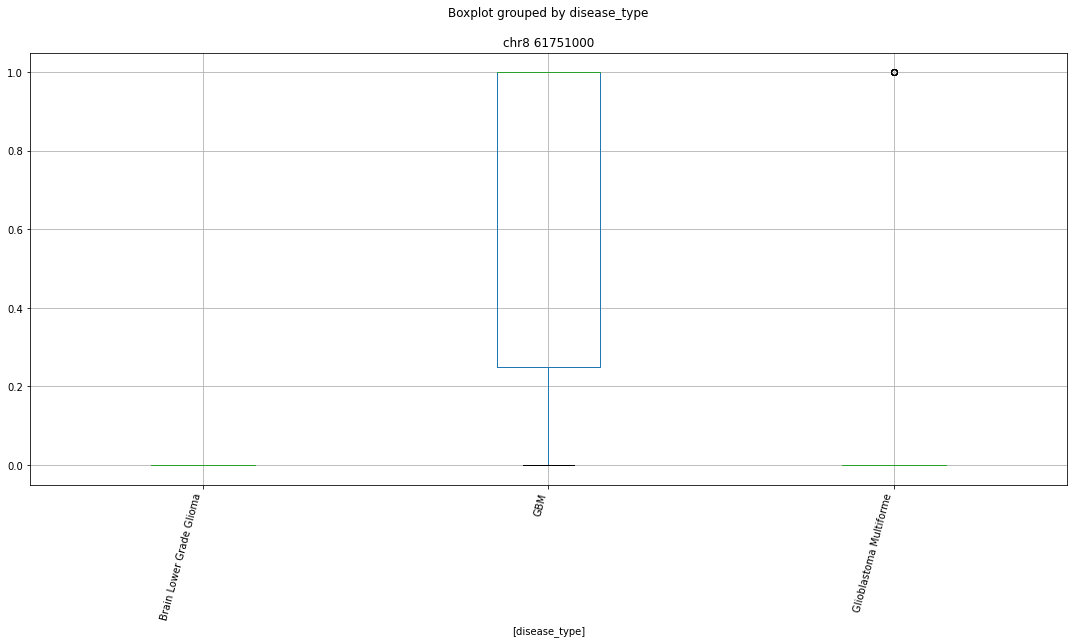

 p : 3.7826505374862424e-13  ( t : 9.686111434264069 ) :  chr16 49209000


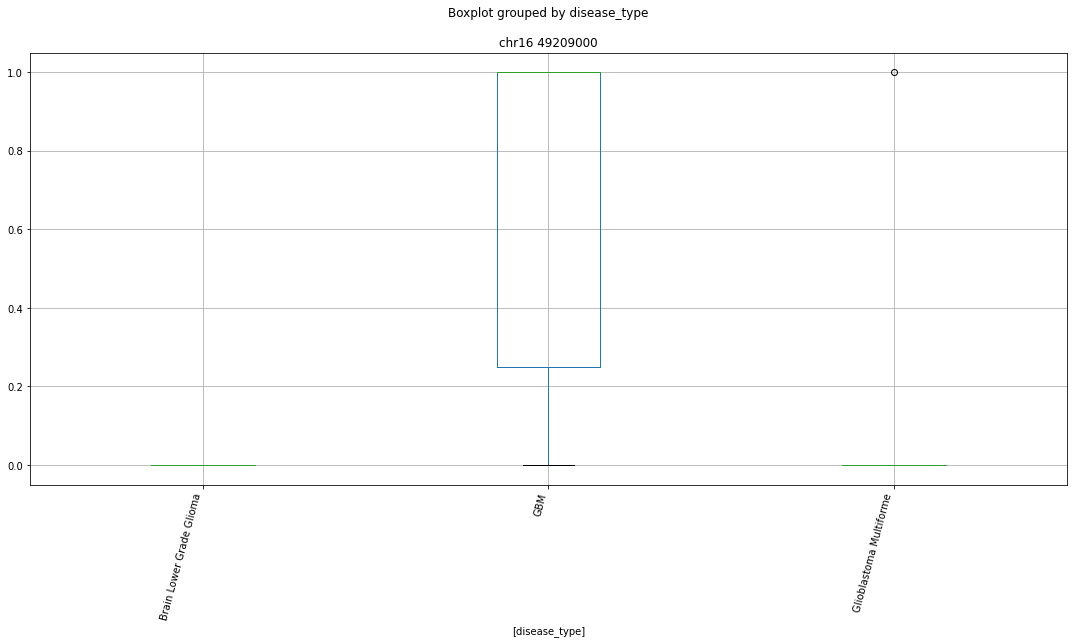

 p : 3.7826505374862424e-13  ( t : 9.686111434264069 ) :  chr2 127786000


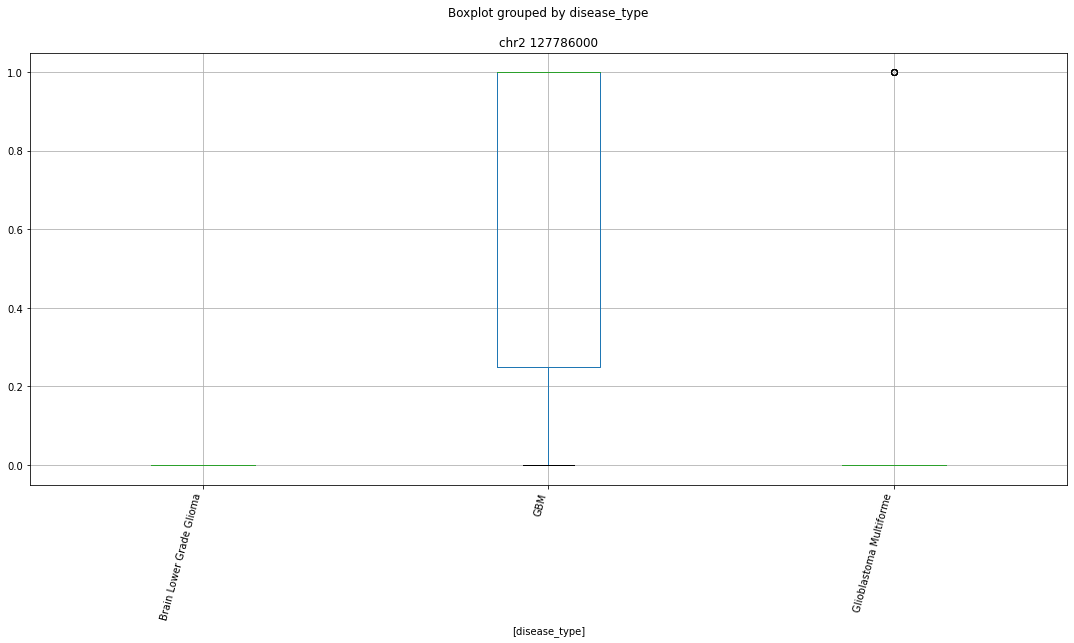

 p : 3.7826505374862424e-13  ( t : 9.686111434264069 ) :  chr17 67471000


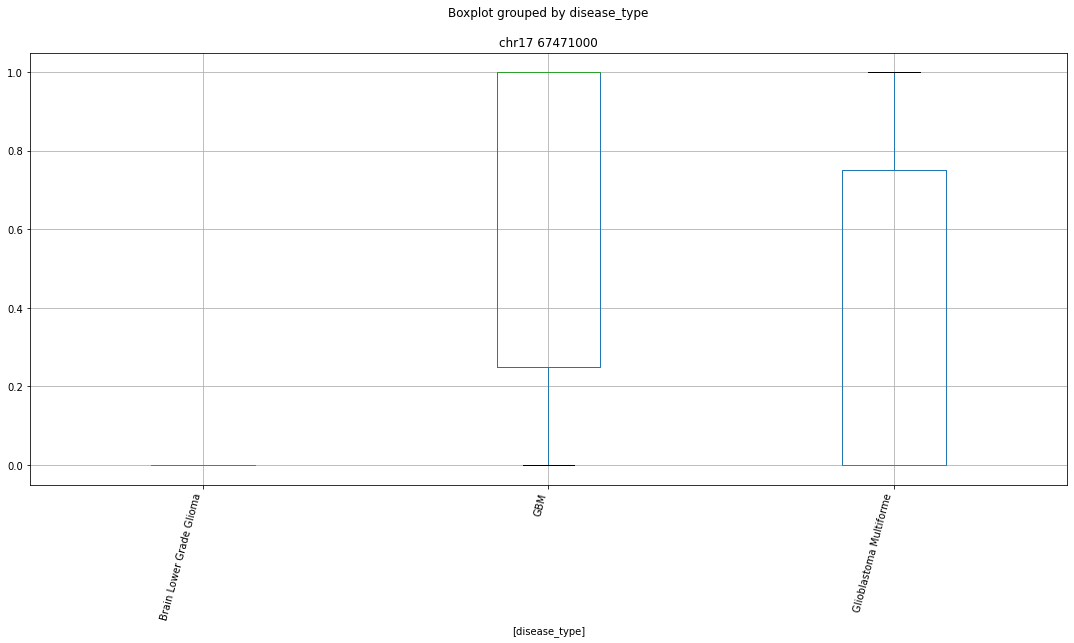

 p : 3.7826505374862424e-13  ( t : 9.686111434264069 ) :  chr1 111234000


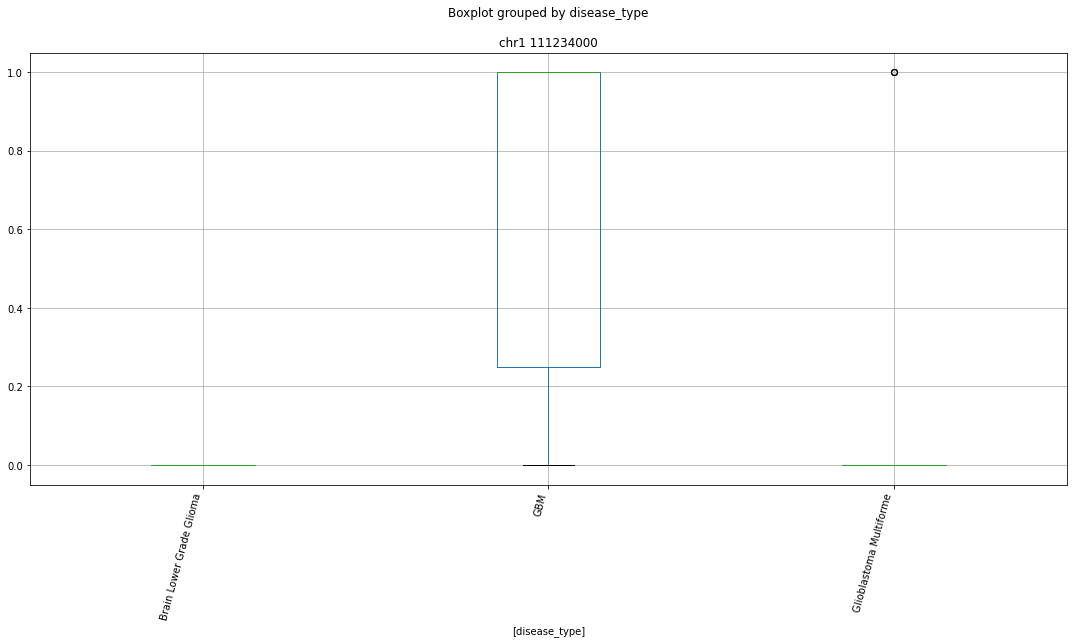

 p : 3.7826505374862424e-13  ( t : 9.686111434264069 ) :  chr14 94658000


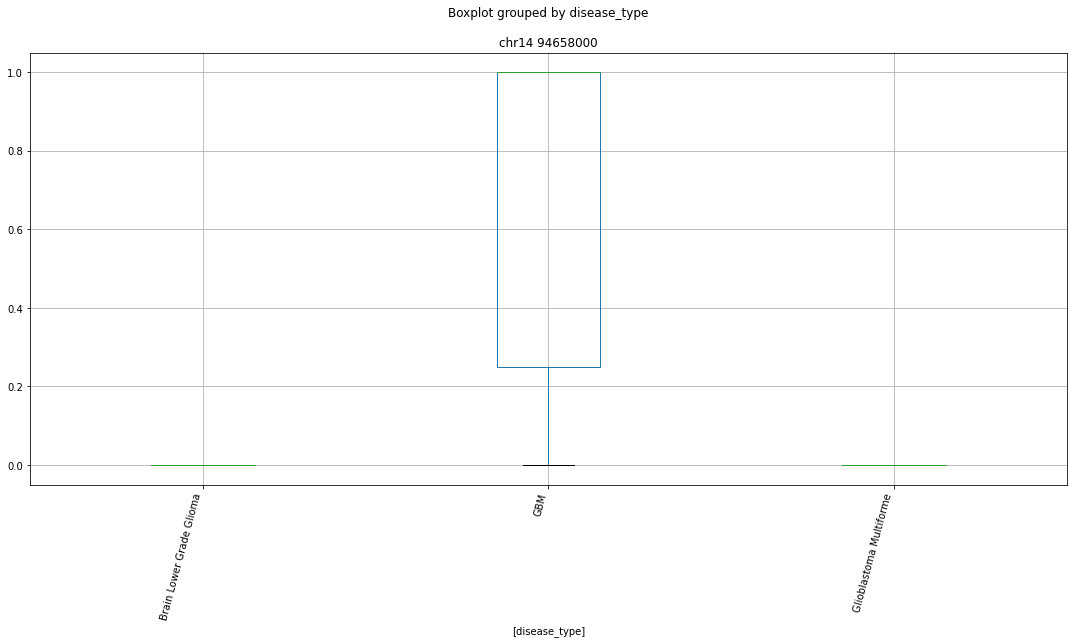

 p : 3.7826505374862424e-13  ( t : 9.686111434264069 ) :  chr3 39650000


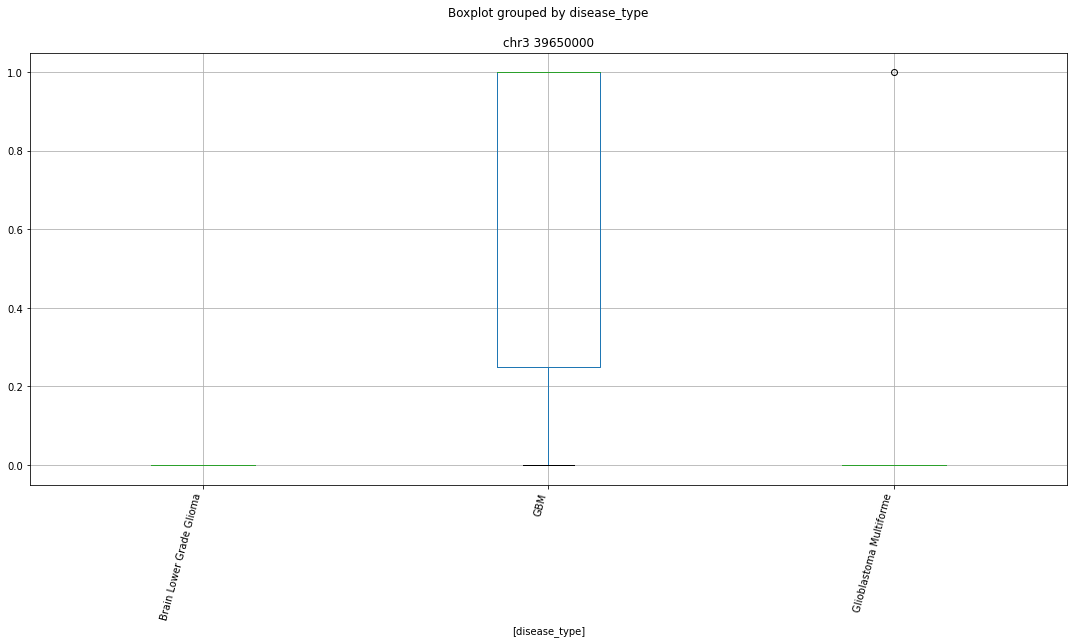

 p : 3.7826505374862424e-13  ( t : 9.686111434264069 ) :  chr17 65938000


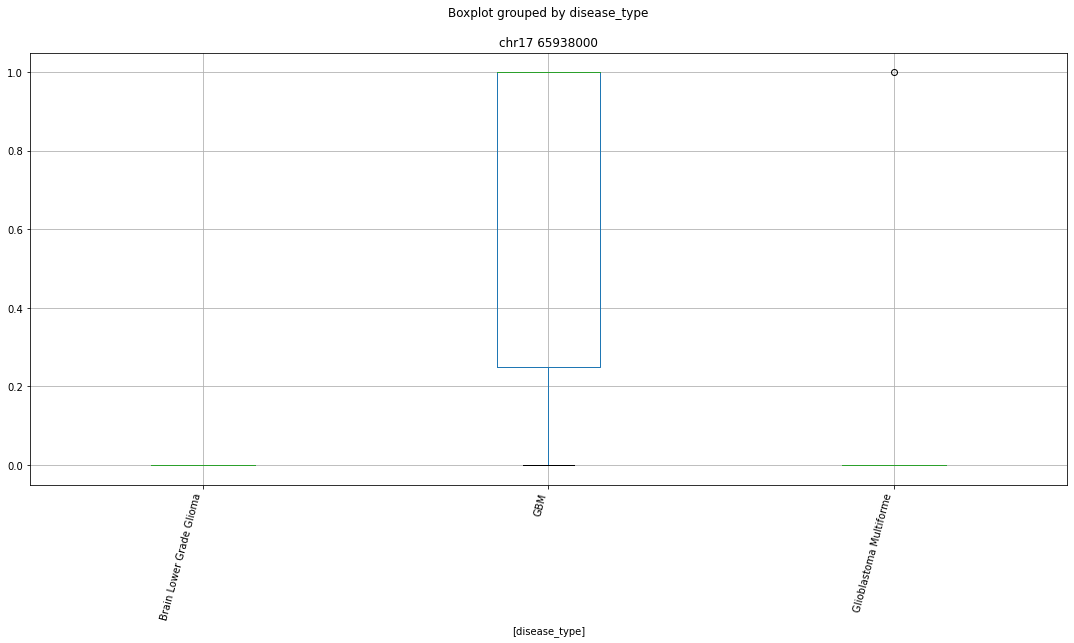

 p : 6.156397805631412e-13  ( t : 9.545065224835222 ) :  chr2 127118000


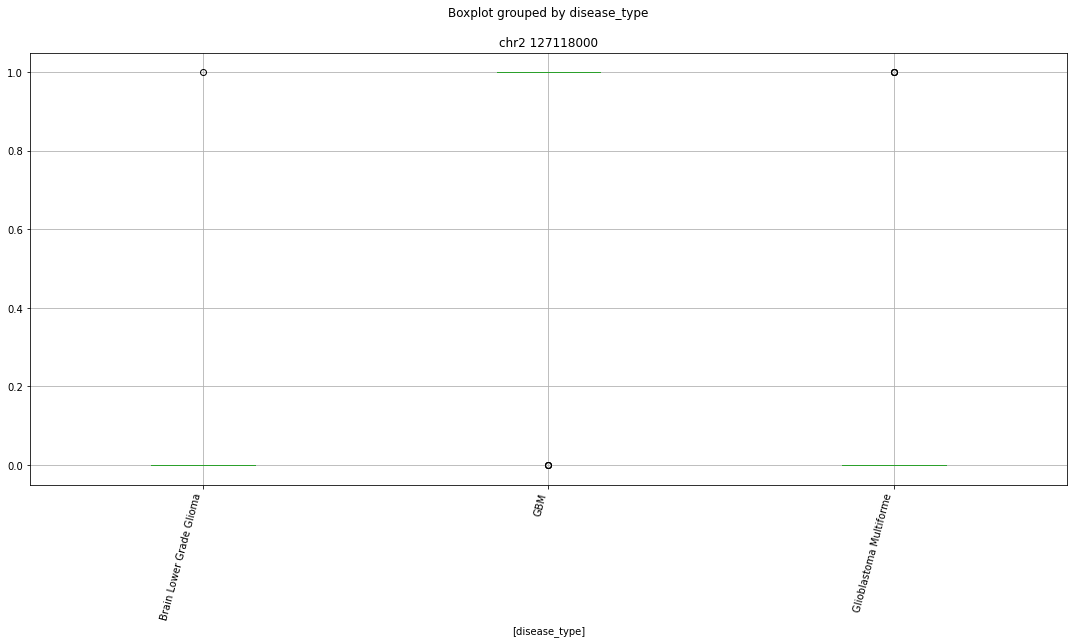

 p : 6.156397805631412e-13  ( t : 9.545065224835223 ) :  chr12 119917000


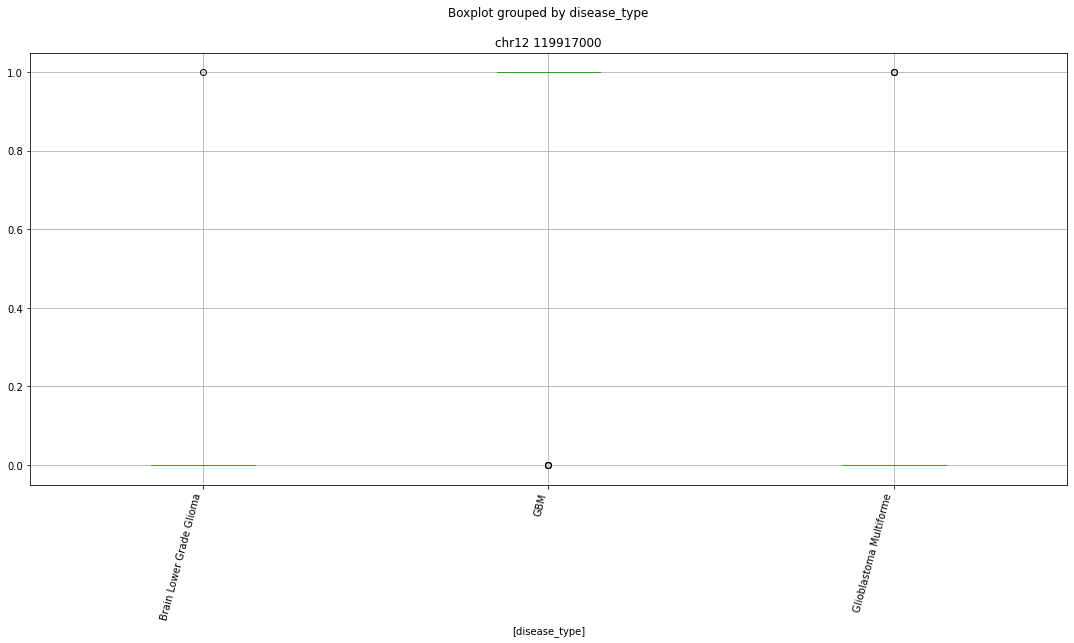

 p : 6.156397805631412e-13  ( t : 9.545065224835222 ) :  chr2 55772000


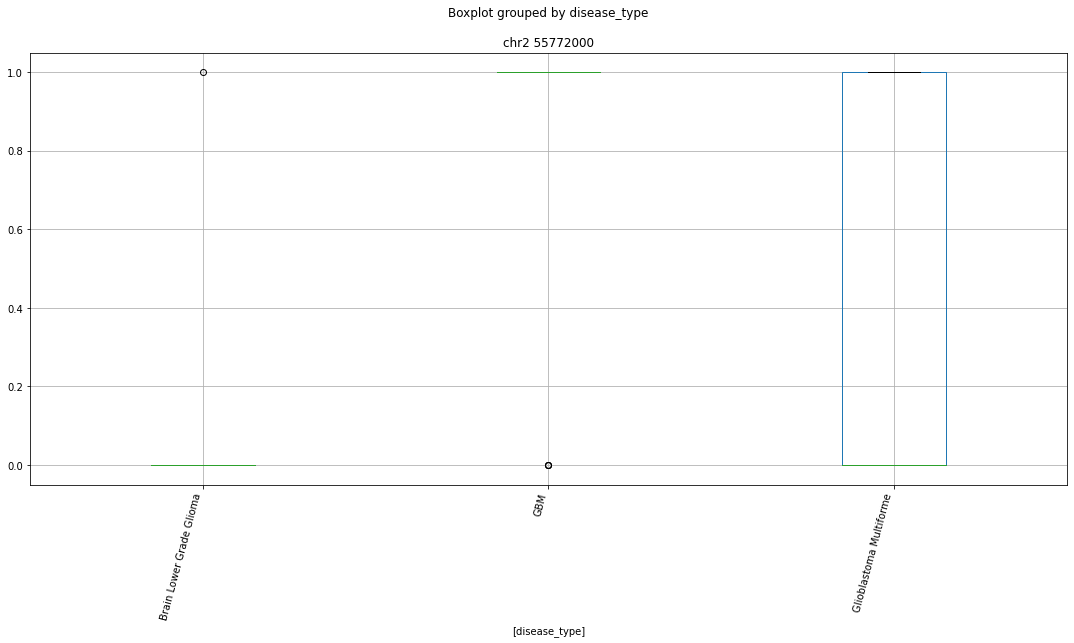

 p : 6.156397805631412e-13  ( t : 9.545065224835223 ) :  chr1 26802000


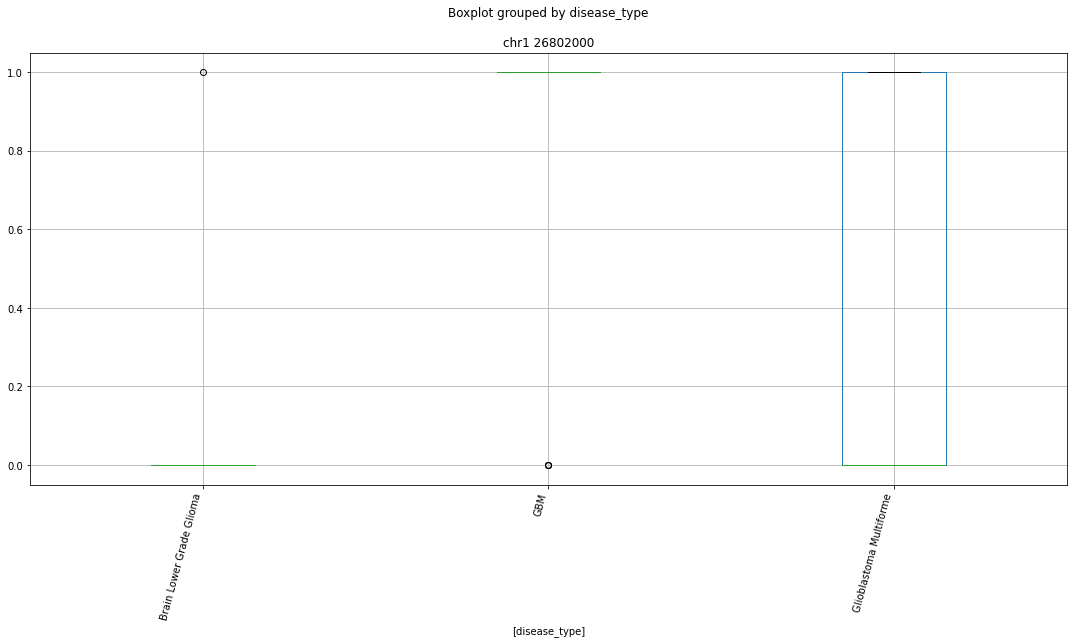

 p : 6.156397805631412e-13  ( t : 9.545065224835222 ) :  chr11 104195000


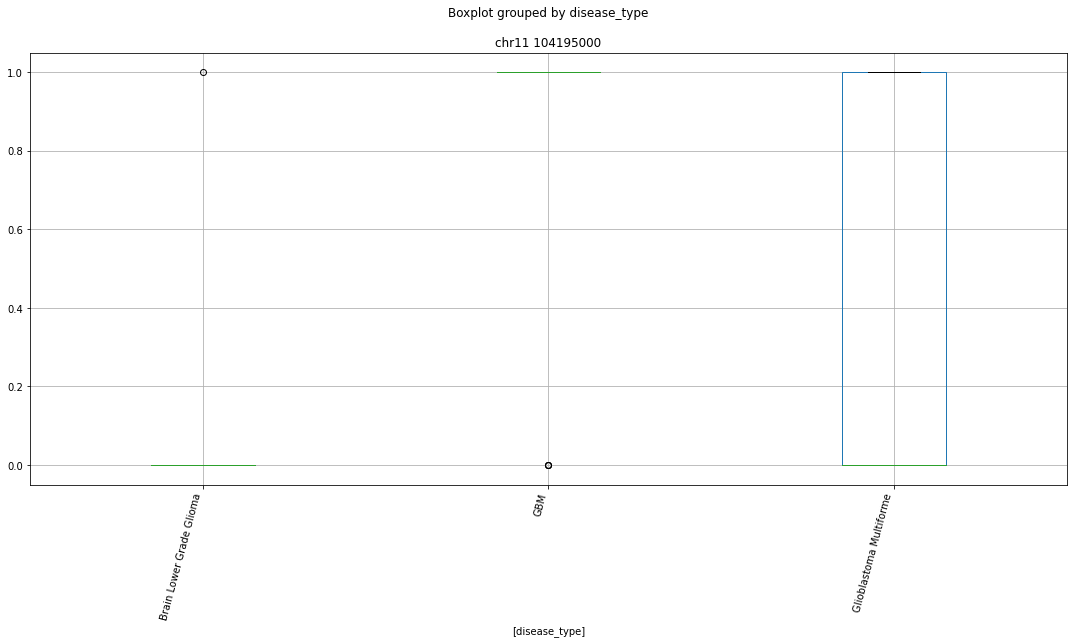

 p : 6.156397805631412e-13  ( t : 9.545065224835222 ) :  chr2 177844000


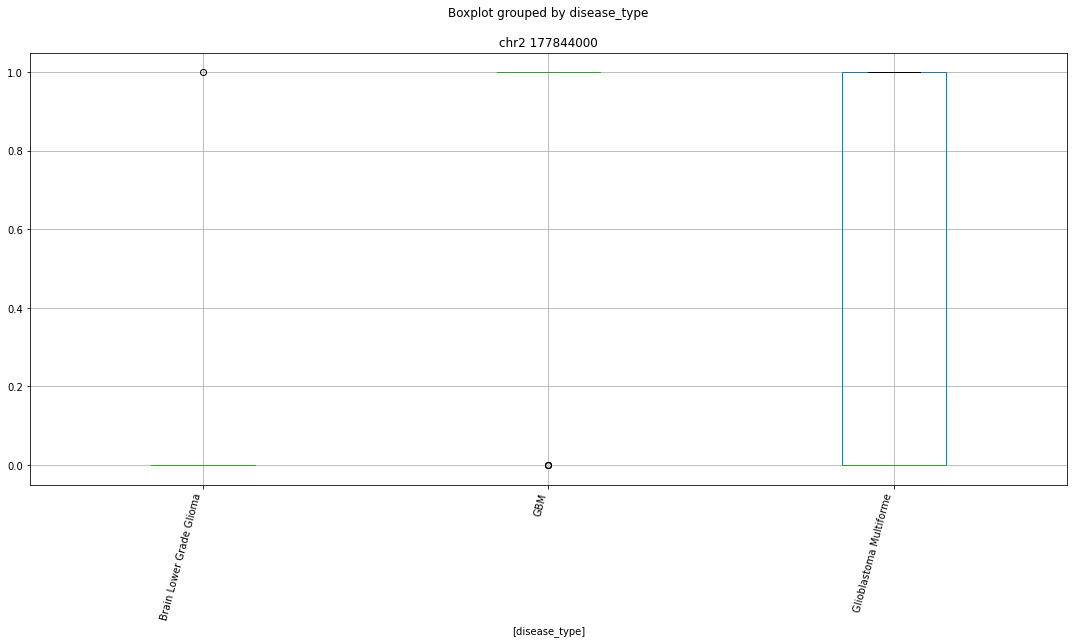

 p : 6.156397805631412e-13  ( t : 9.545065224835222 ) :  chr1 226114000


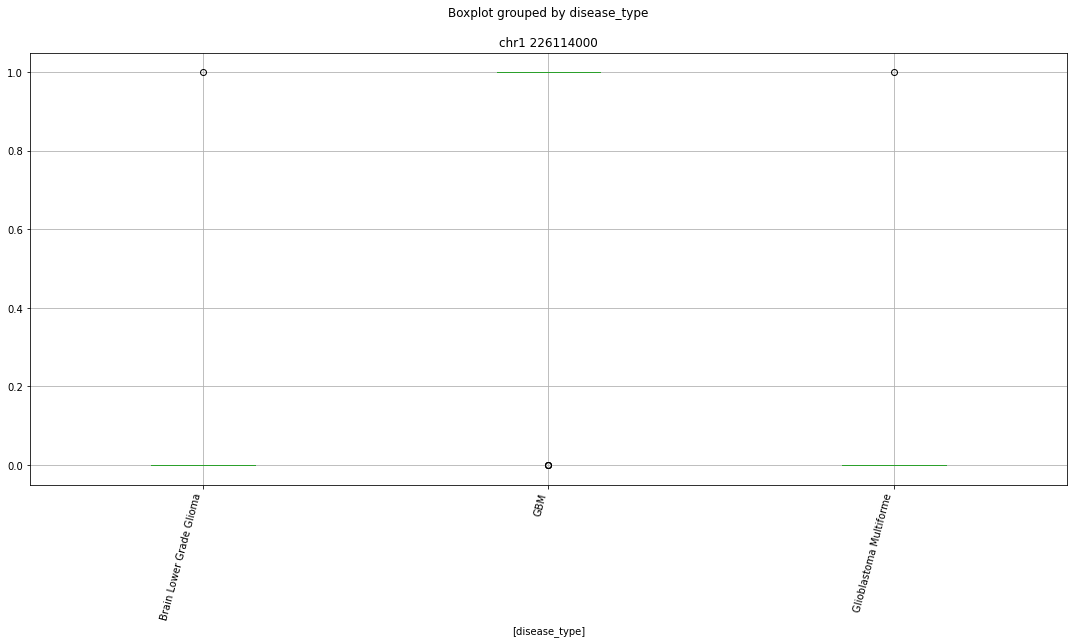

 p : 6.156397805631412e-13  ( t : 9.545065224835222 ) :  chr11 60623000


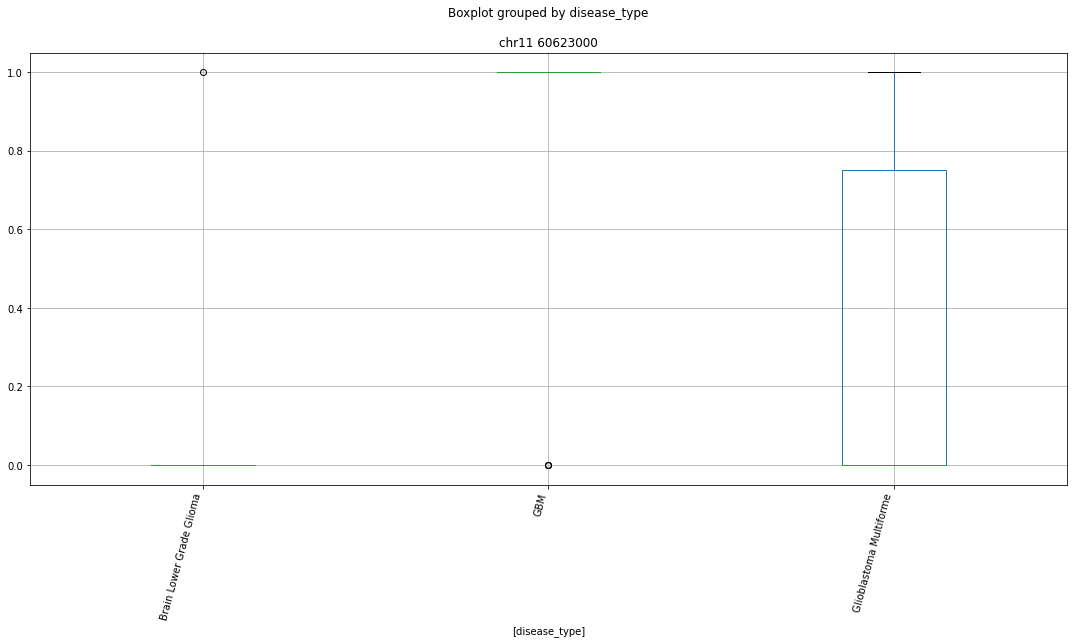

 p : 6.156397805631412e-13  ( t : 9.545065224835223 ) :  chr14 66544000


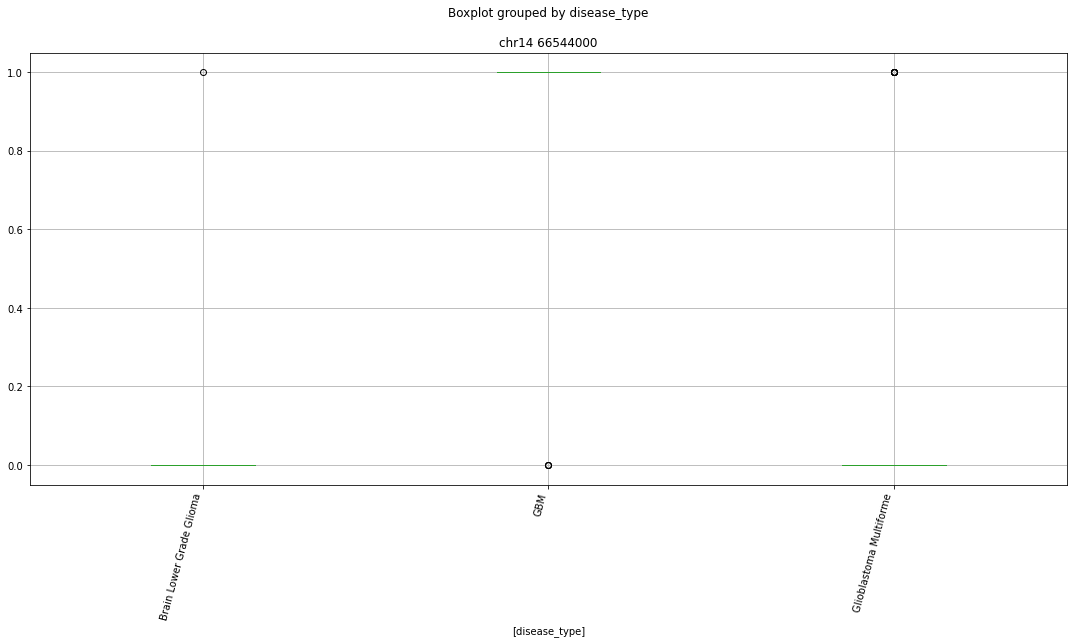

 p : 6.156397805631477e-13  ( t : 9.54506522483522 ) :  chr9 137289000


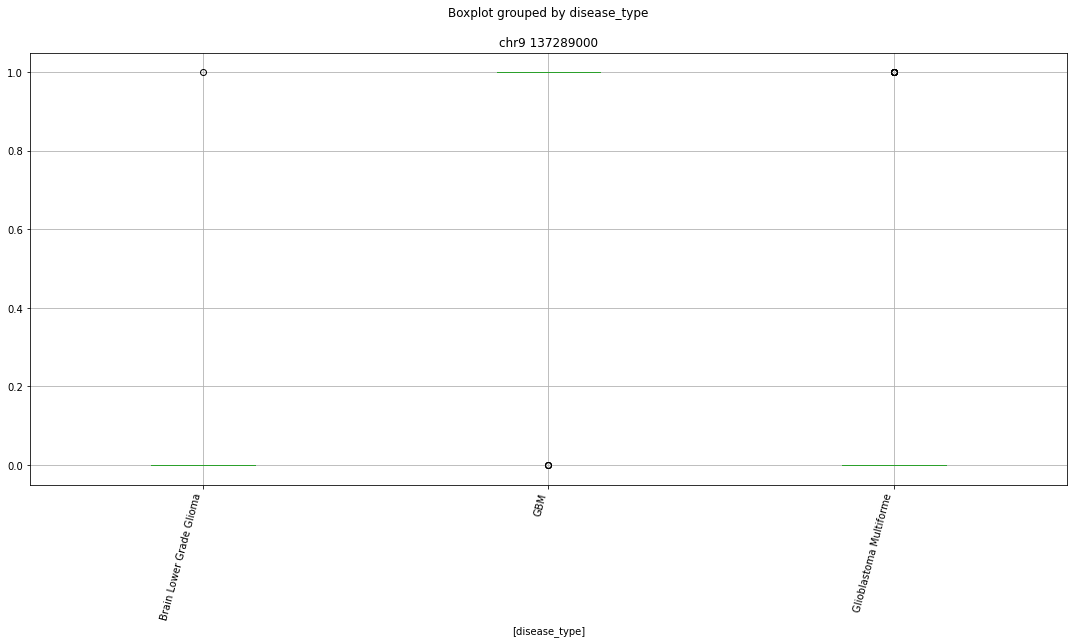

 p : 6.156397805631477e-13  ( t : 9.54506522483522 ) :  chr2 42604000


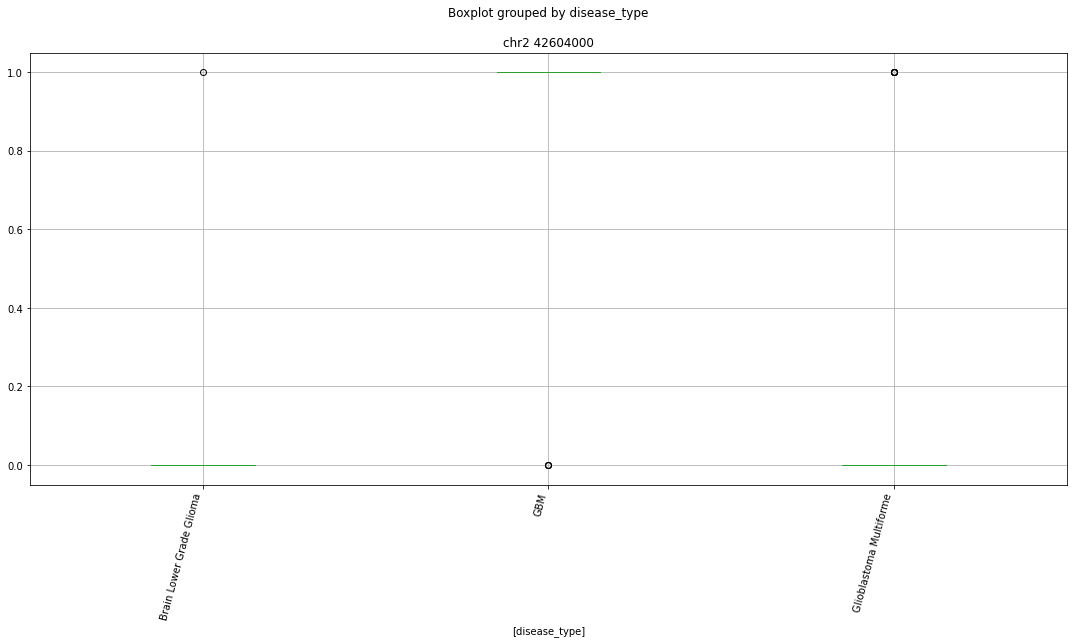

 p : 6.156397805631477e-13  ( t : 9.54506522483522 ) :  chr2 239448000


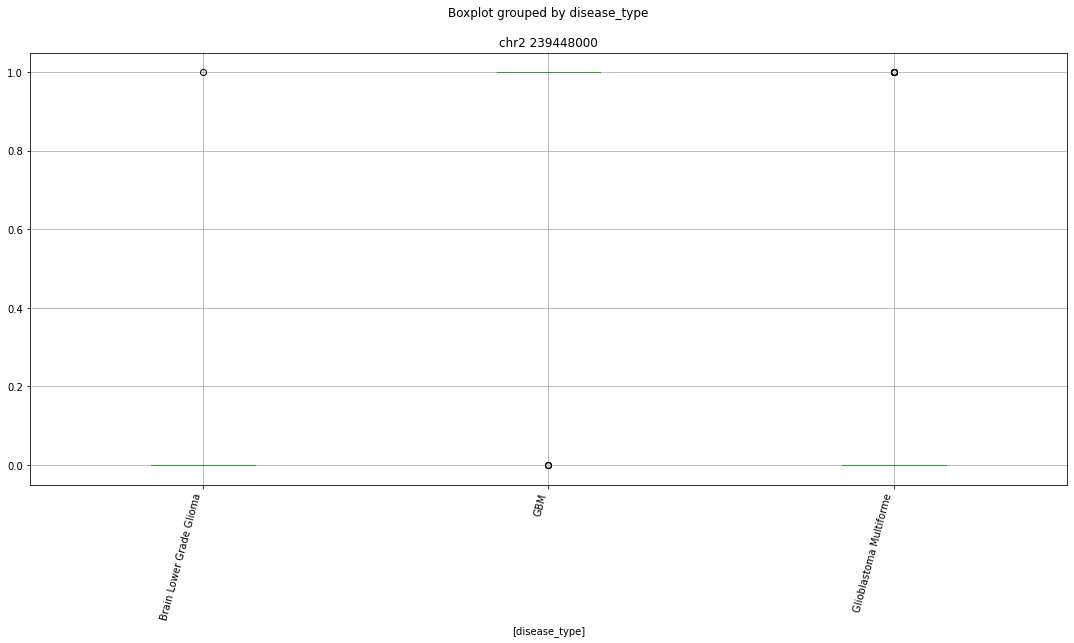

 p : 9.558830127815861e-12  ( t : 9.02542704437487 ) :  chr14 94658000


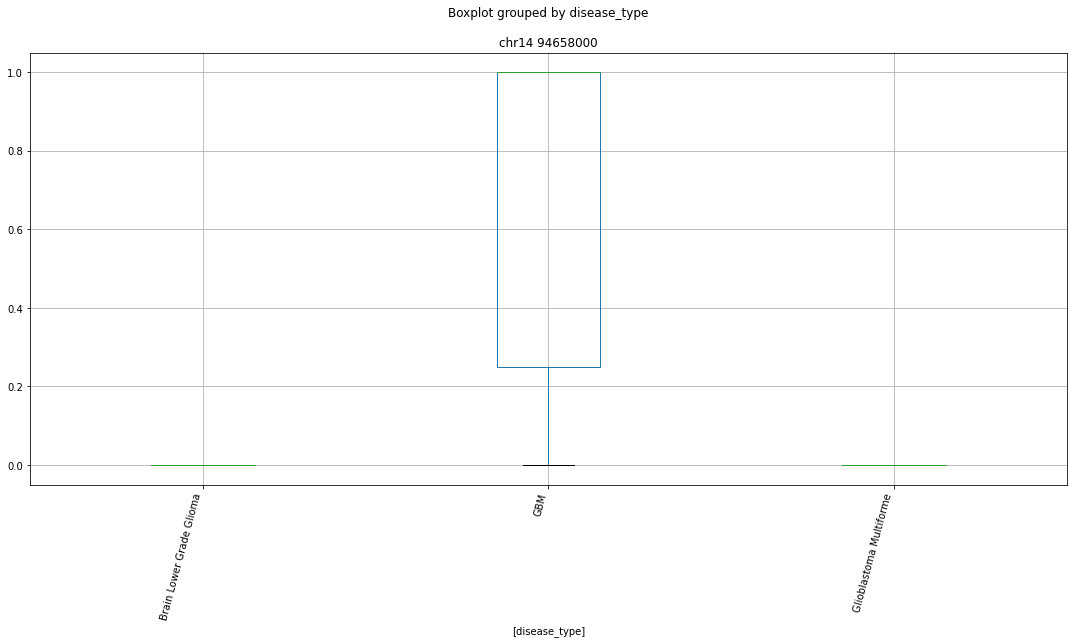

 p : 9.558830127815861e-12  ( t : 9.025427044374872 ) :  chr17 10058000


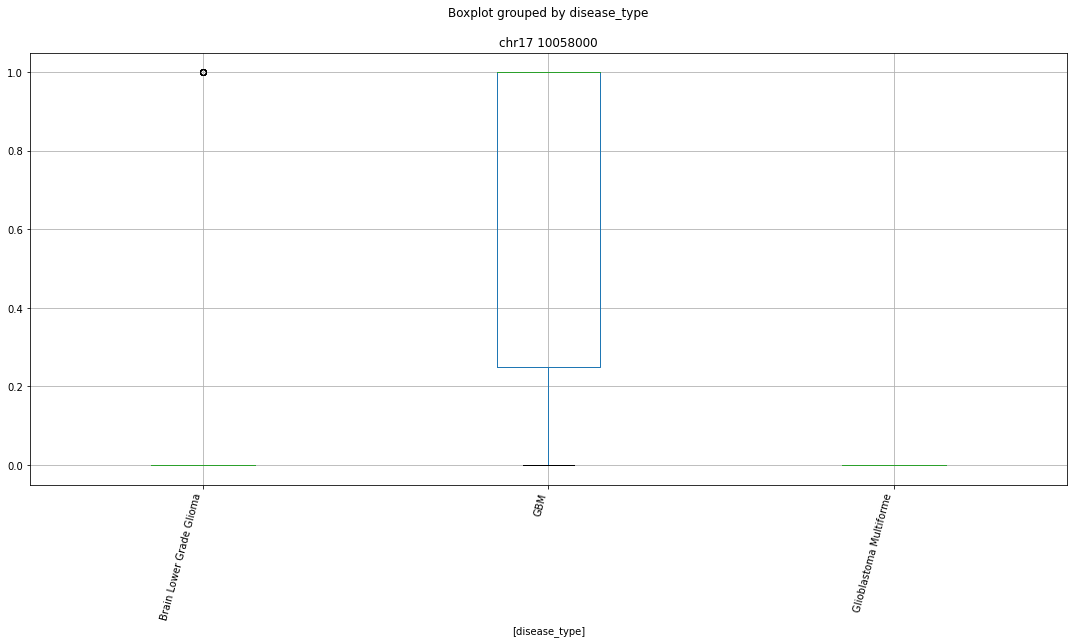

 p : 9.558830127815861e-12  ( t : 9.02542704437487 ) :  chr11 116348000


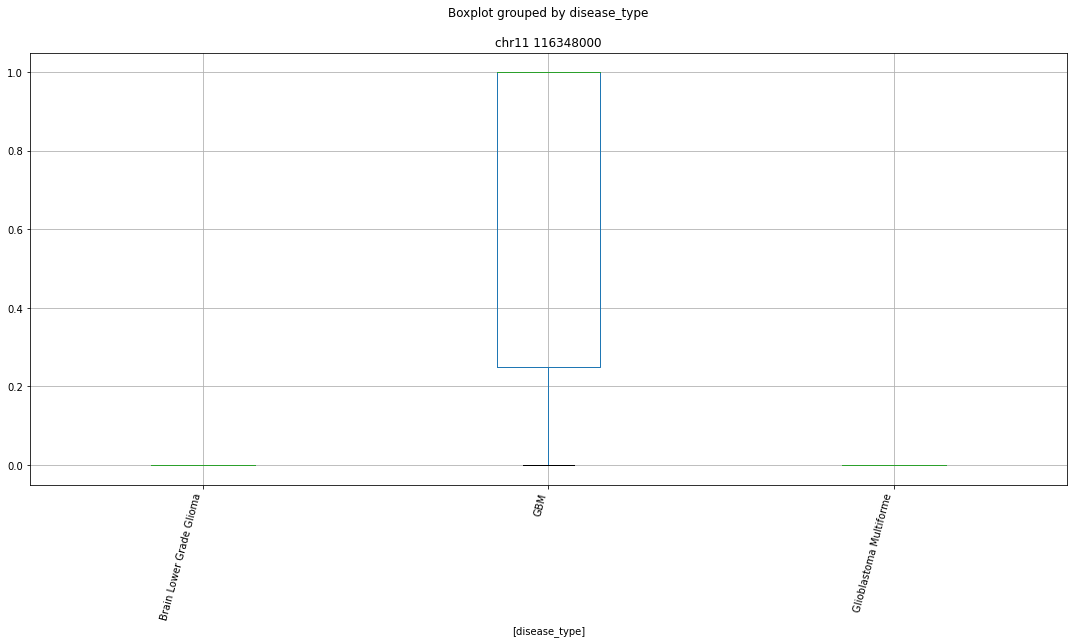

 p : 1.072083429418079e-11  ( t : 8.99062769181523 ) :  chr14 51605000


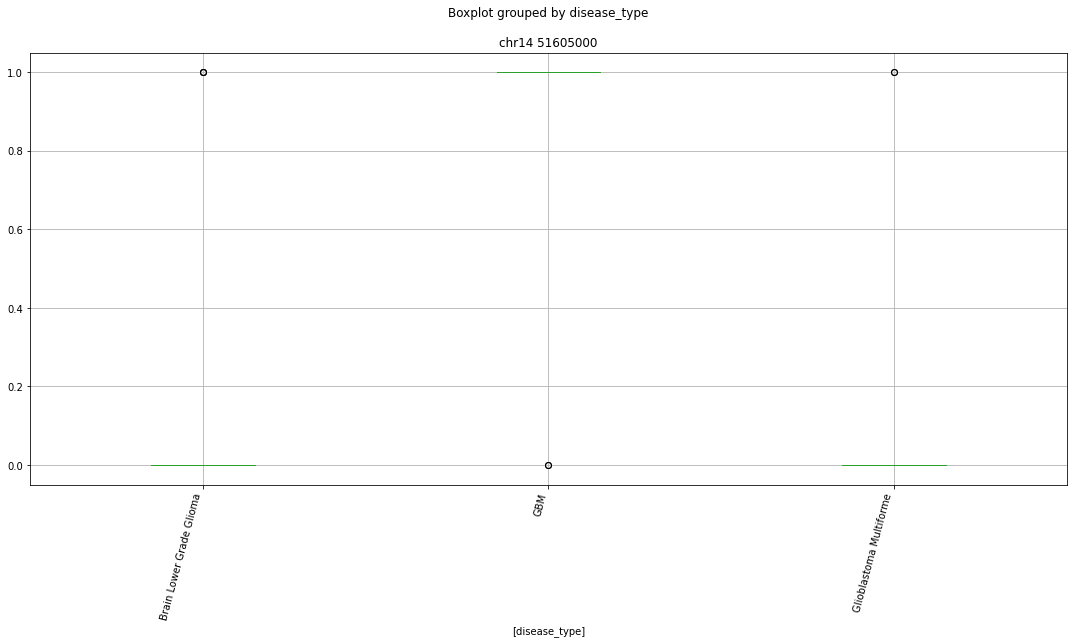

 p : 1.6792438766960332e-11  ( t : 8.854890790353709 ) :  chr4 854000


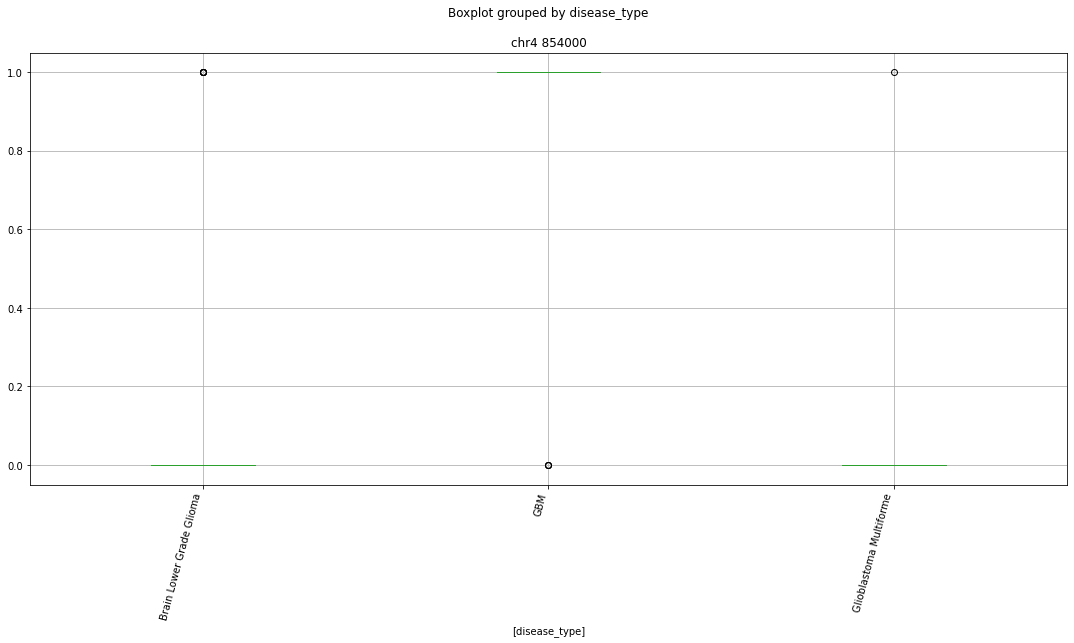

 p : 1.6792438766960332e-11  ( t : 8.854890790353709 ) :  chr19 37688000


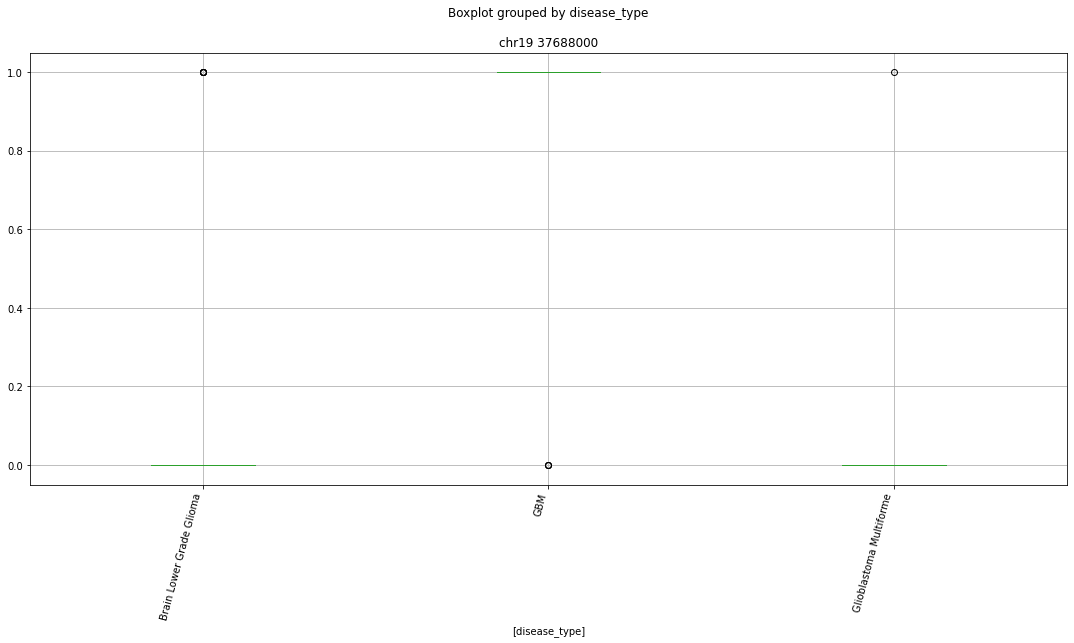

 p : 1.6792438766960332e-11  ( t : 8.854890790353709 ) :  chr1 226114000


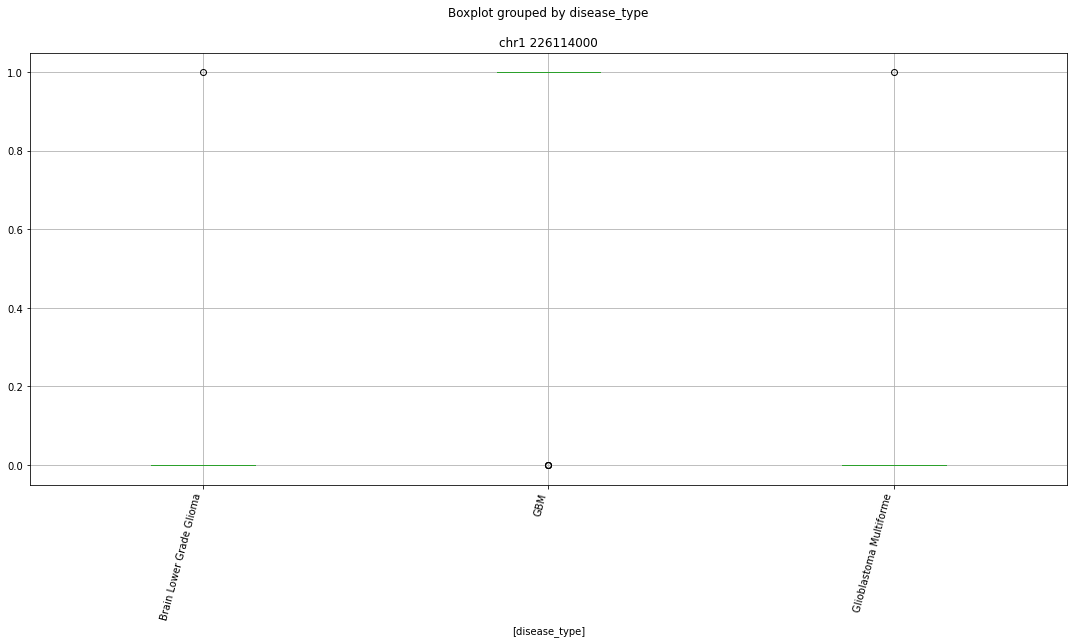

 p : 2.937478896622765e-11  ( t : 8.445999387898235 ) :  chr6 55909000


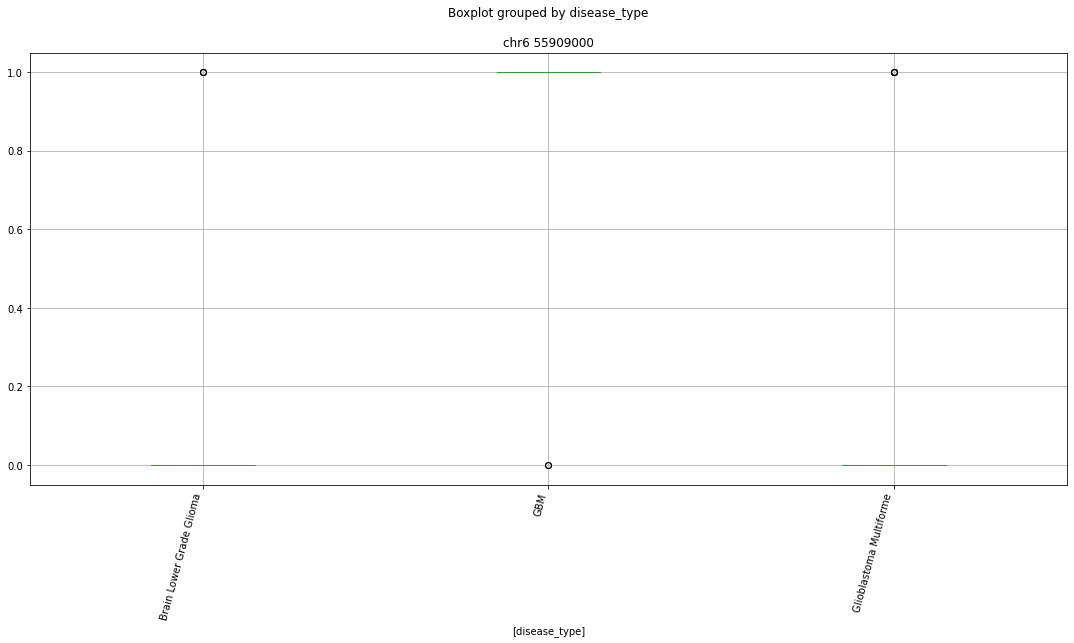

 p : 2.937478896622765e-11  ( t : 8.445999387898235 ) :  chr14 51605000


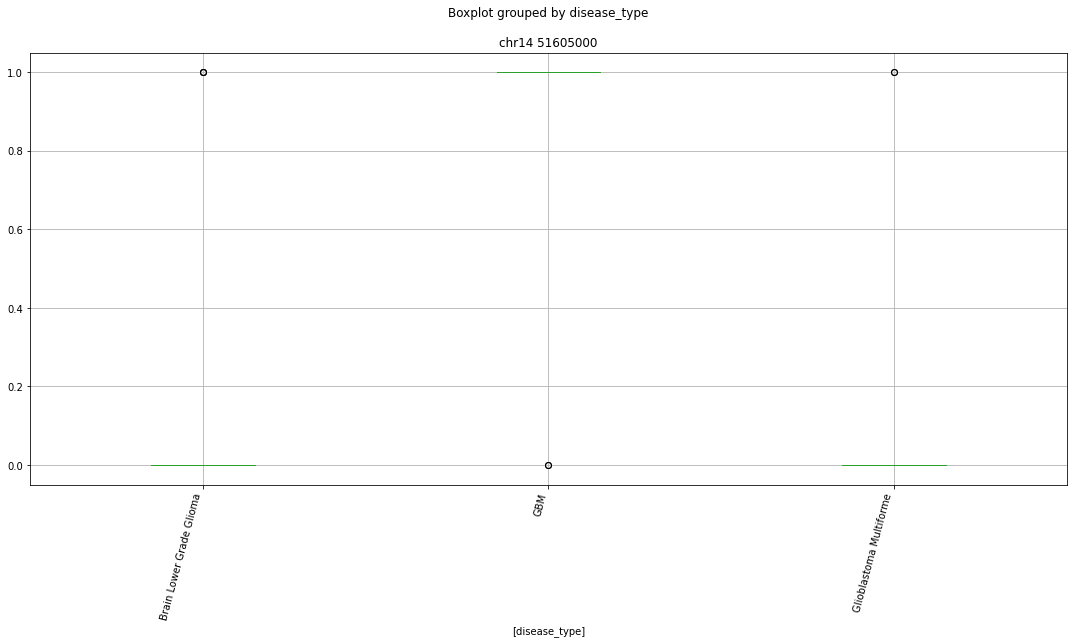

 p : 2.937478896622765e-11  ( t : 8.445999387898235 ) :  chr1 21024000


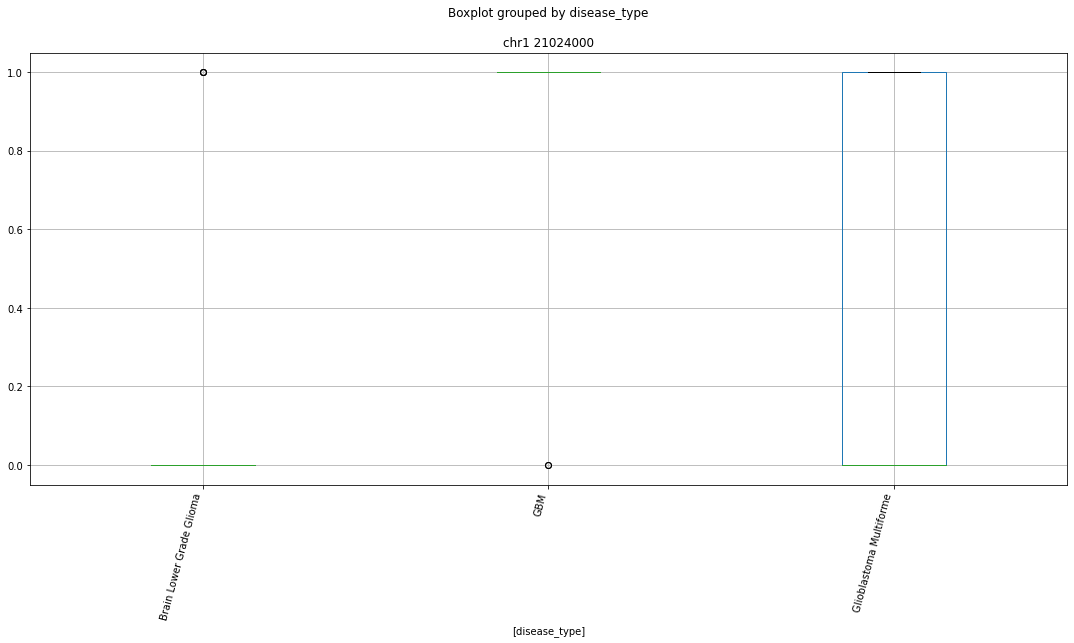

 p : 2.937478896622765e-11  ( t : 8.445999387898235 ) :  chr14 70478000


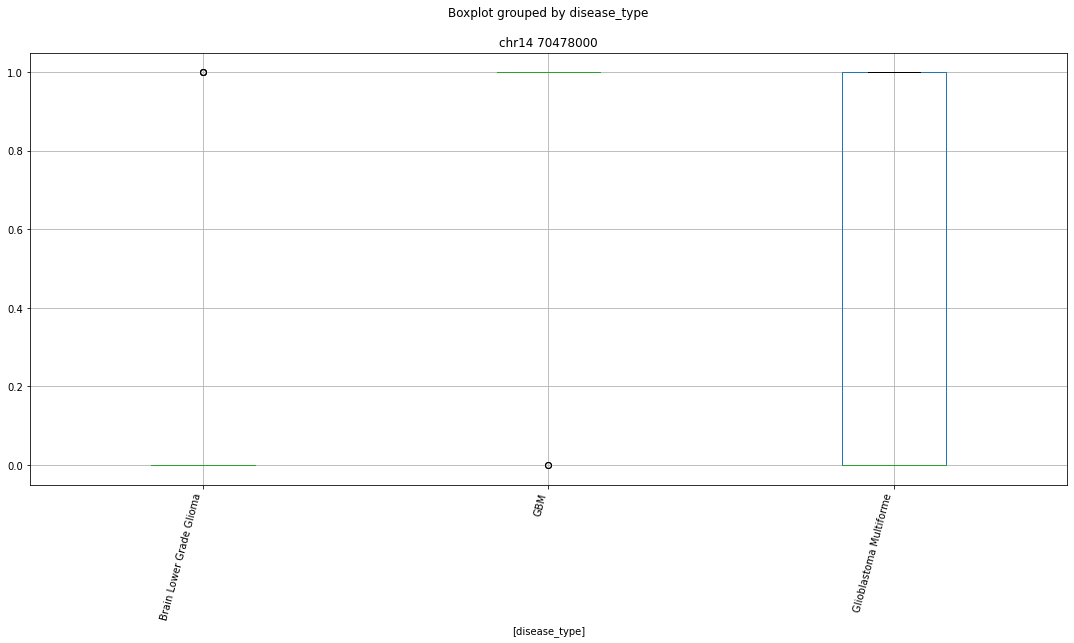

 p : 2.937478896622765e-11  ( t : 8.445999387898235 ) :  chr16 48952000


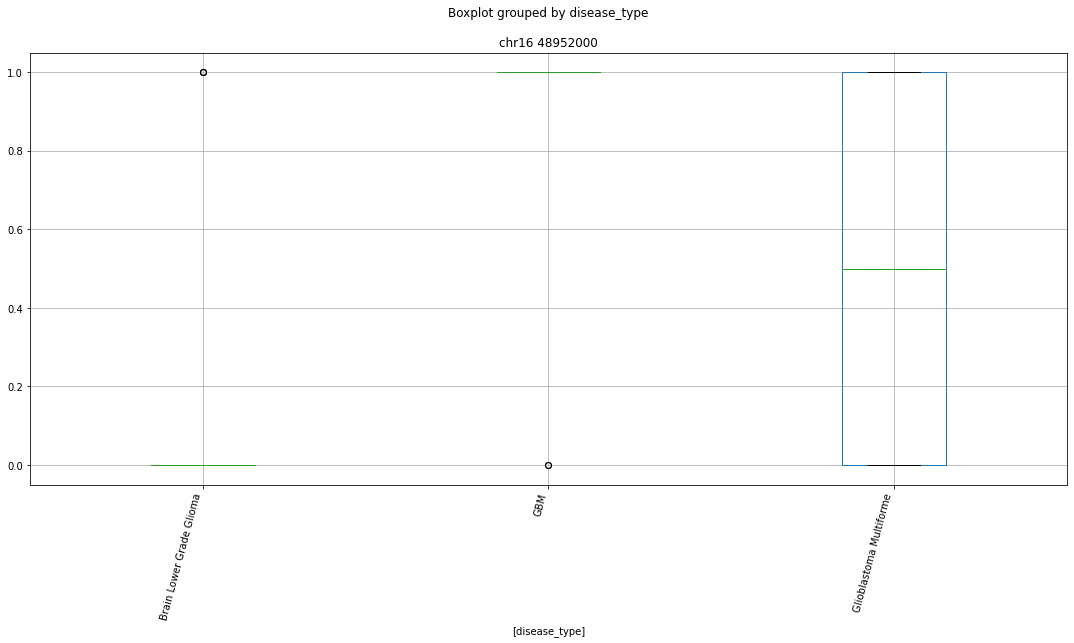

 p : 2.937478896622765e-11  ( t : 8.445999387898235 ) :  chr1 152144000


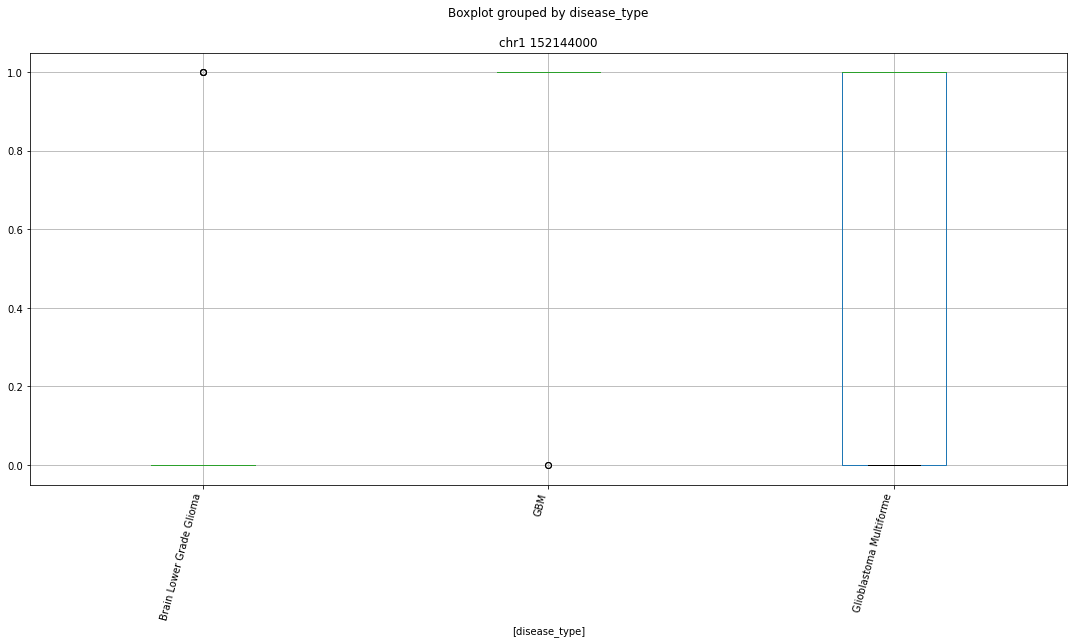

 p : 2.937478896622765e-11  ( t : 8.445999387898235 ) :  chr1 150851000


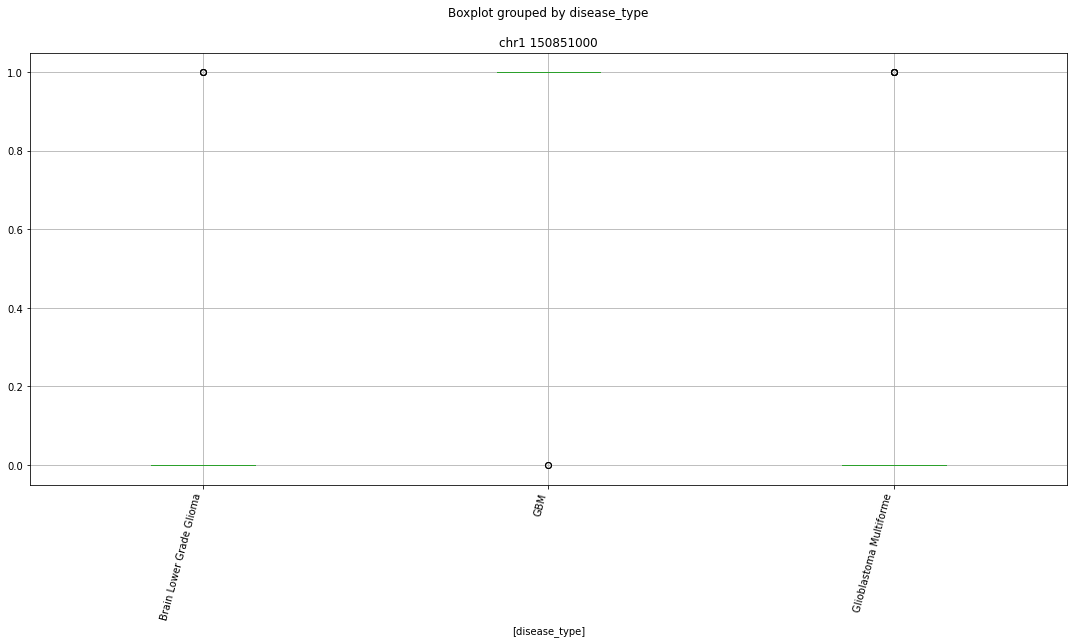

 p : 2.937478896622765e-11  ( t : 8.445999387898235 ) :  chr4 174294000


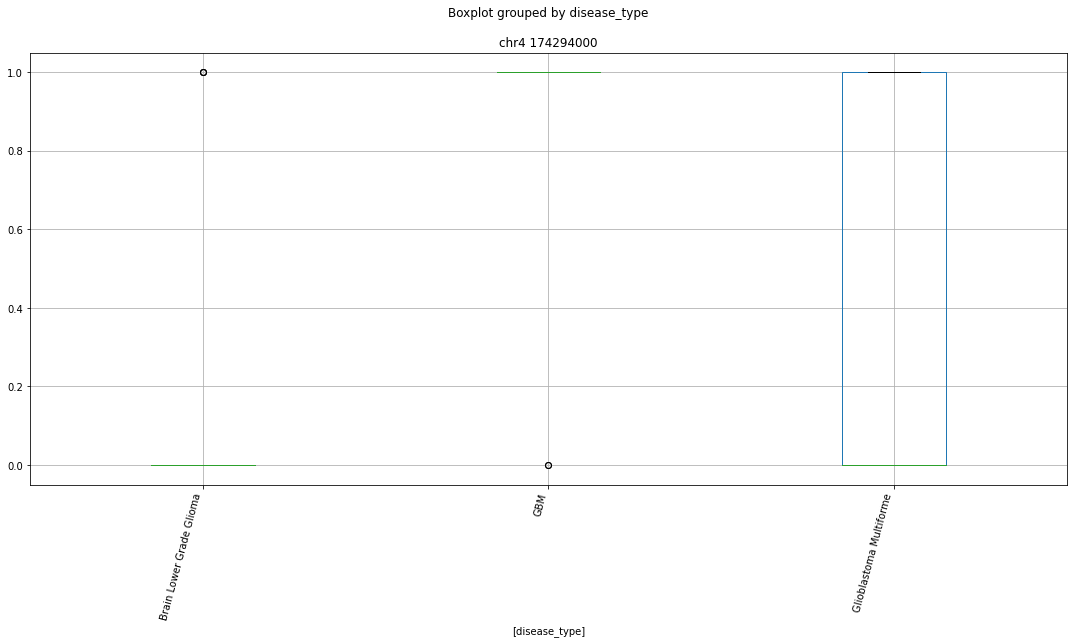

 p : 2.9374788966227866e-11  ( t : 8.445999387898233 ) :  chr5 37414000


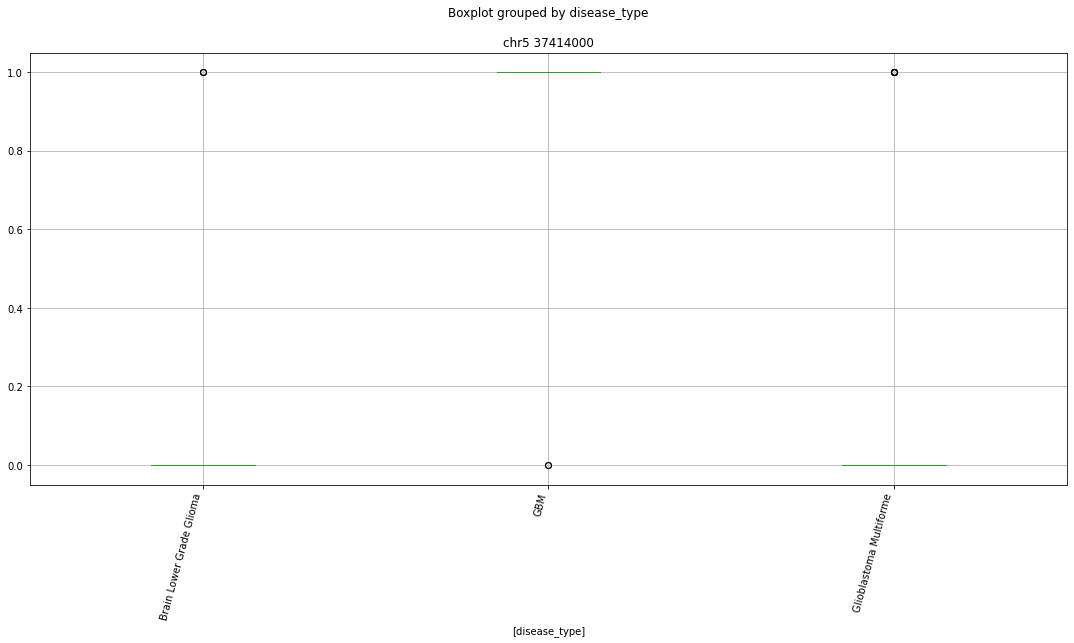

 p : 2.9374788966227866e-11  ( t : 8.445999387898233 ) :  chr6 84243000


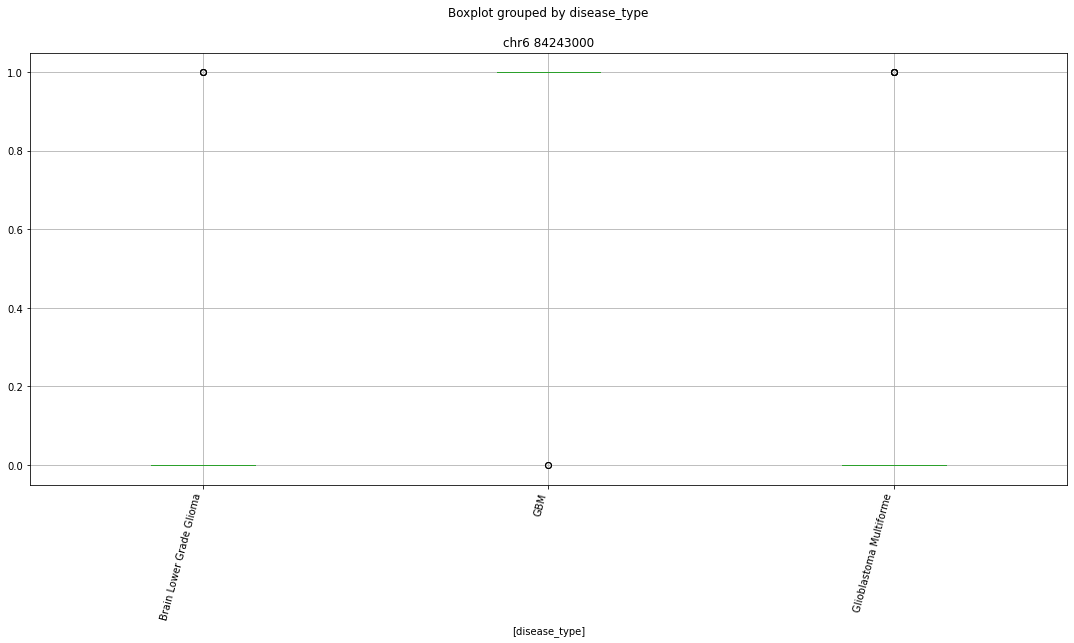

 p : 6.616621137048014e-11  ( t : 8.218938094196016 ) :  chr6 133666000


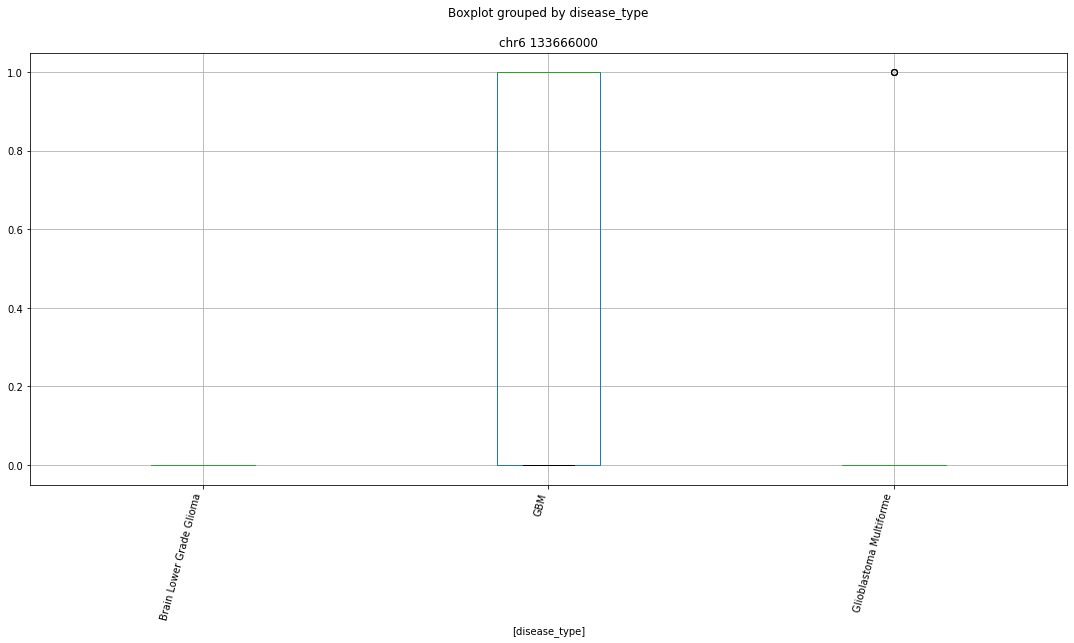

 p : 6.616621137048014e-11  ( t : 8.218938094196016 ) :  chr11 46897000


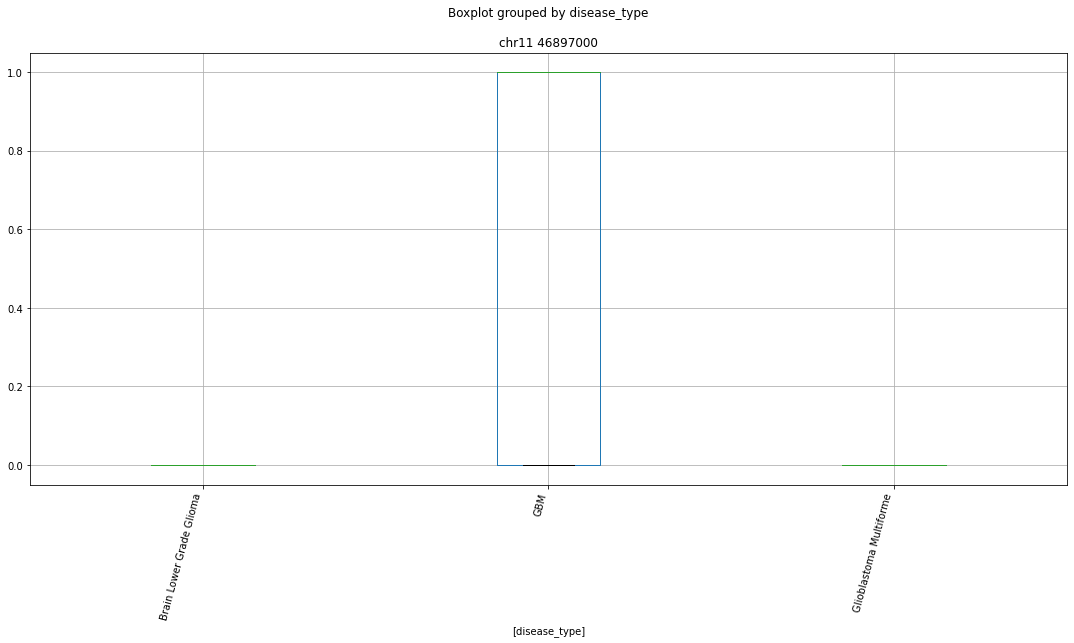

 p : 6.616621137048014e-11  ( t : 8.218938094196016 ) :  chr20 11512000


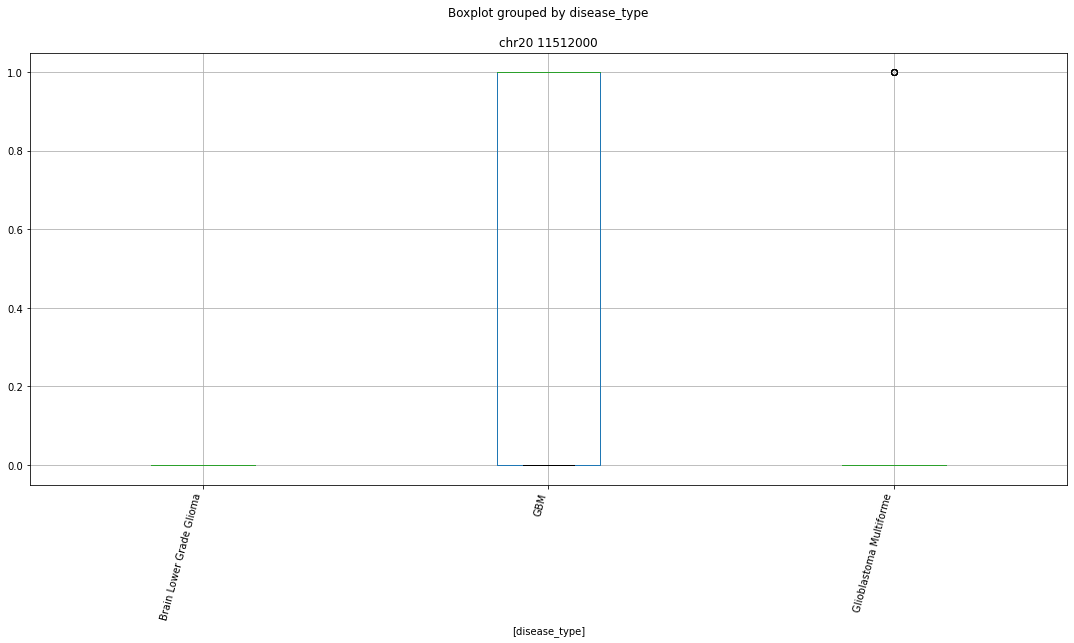

 p : 6.616621137048014e-11  ( t : 8.218938094196016 ) :  chr10 34977000


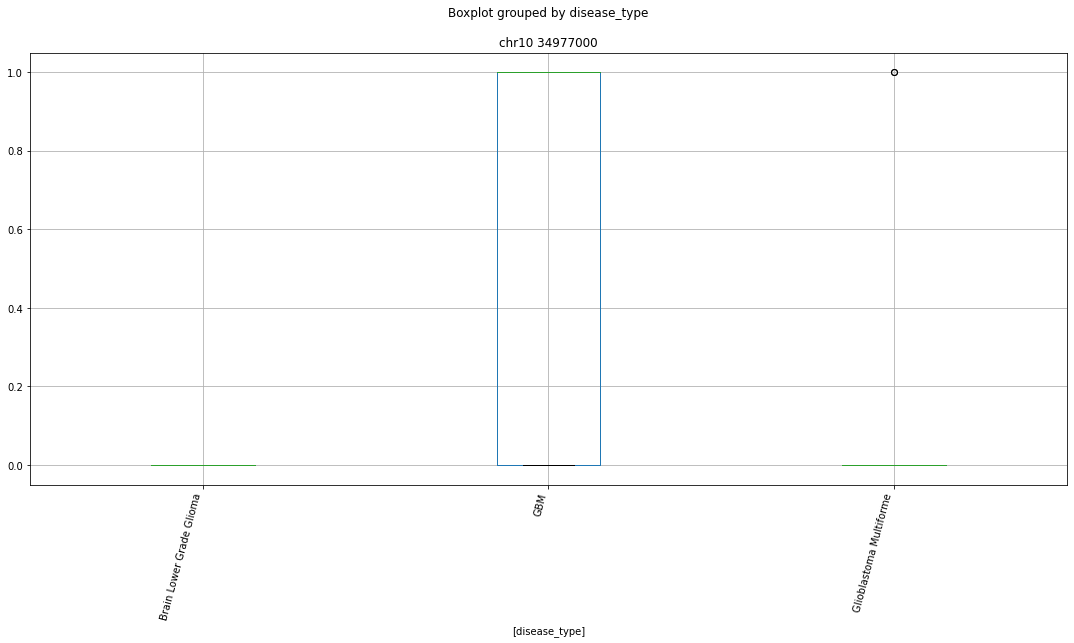

 p : 6.616621137048014e-11  ( t : 8.218938094196016 ) :  chr9 72839000


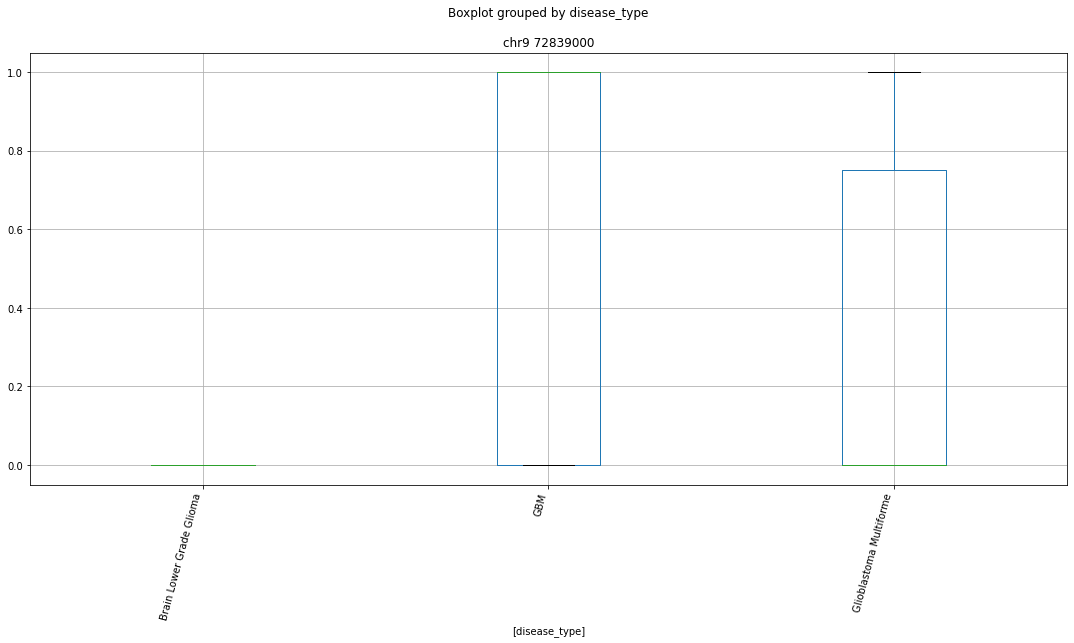

 p : 6.616621137048014e-11  ( t : 8.218938094196016 ) :  chr12 38329000


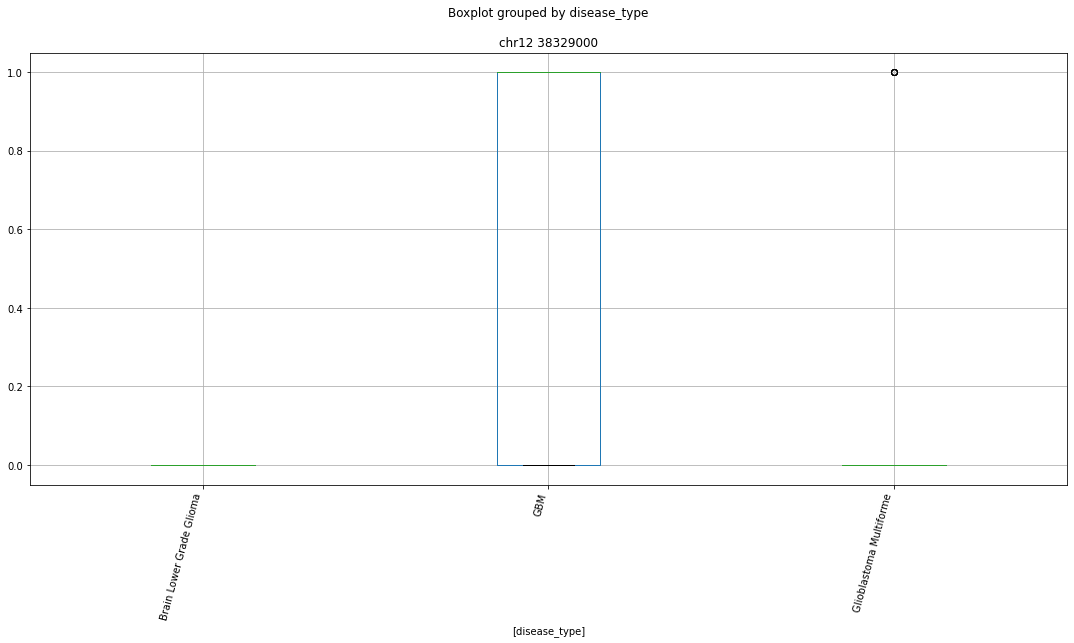

 p : 6.616621137048014e-11  ( t : 8.218938094196016 ) :  chr12 105873000


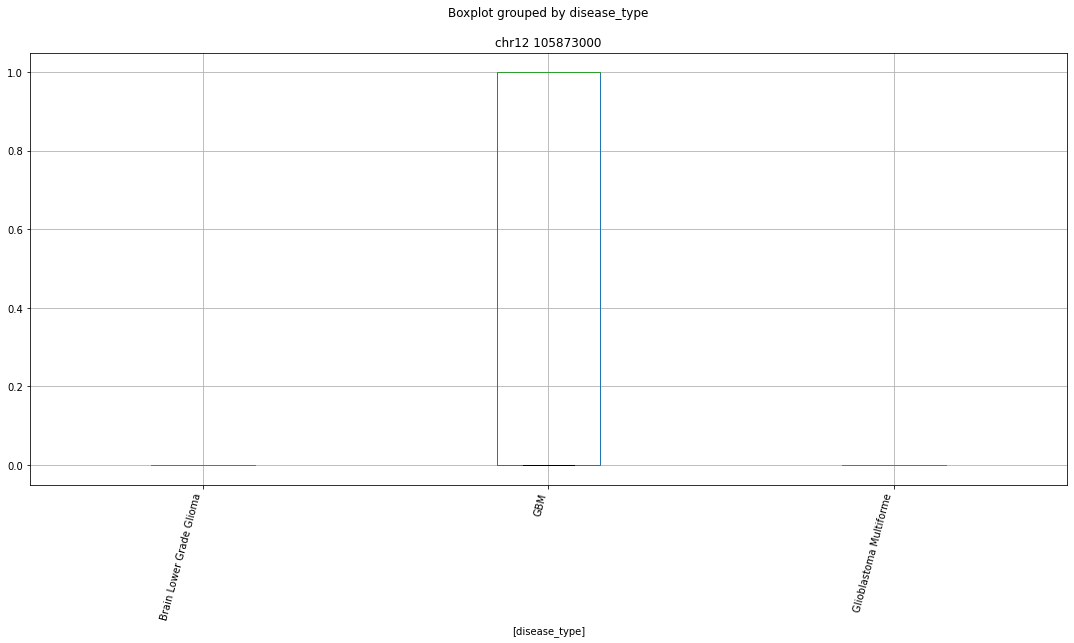

 p : 6.616621137048014e-11  ( t : 8.218938094196016 ) :  chr9 125328000


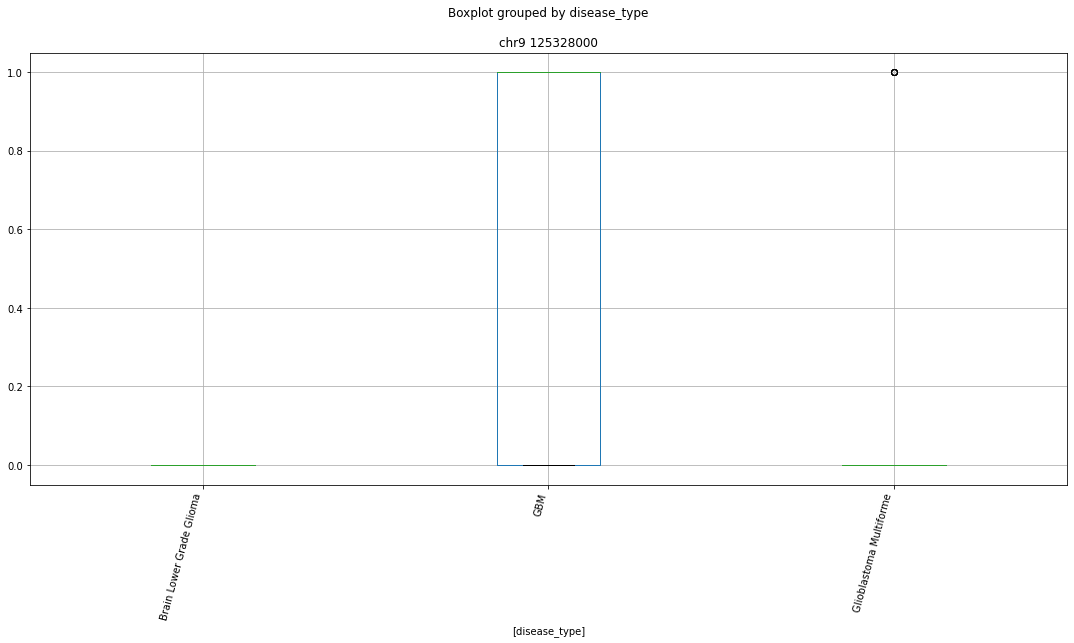

 p : 6.616621137048014e-11  ( t : 8.218938094196016 ) :  chr11 98769000


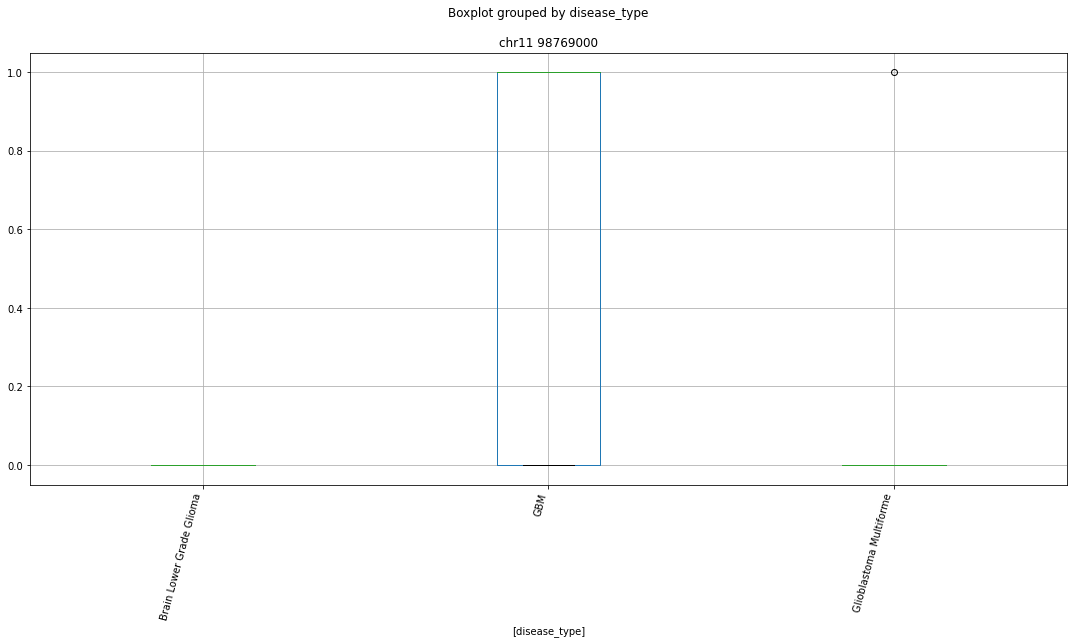

 p : 6.616621137048014e-11  ( t : 8.218938094196016 ) :  chr1 173614000


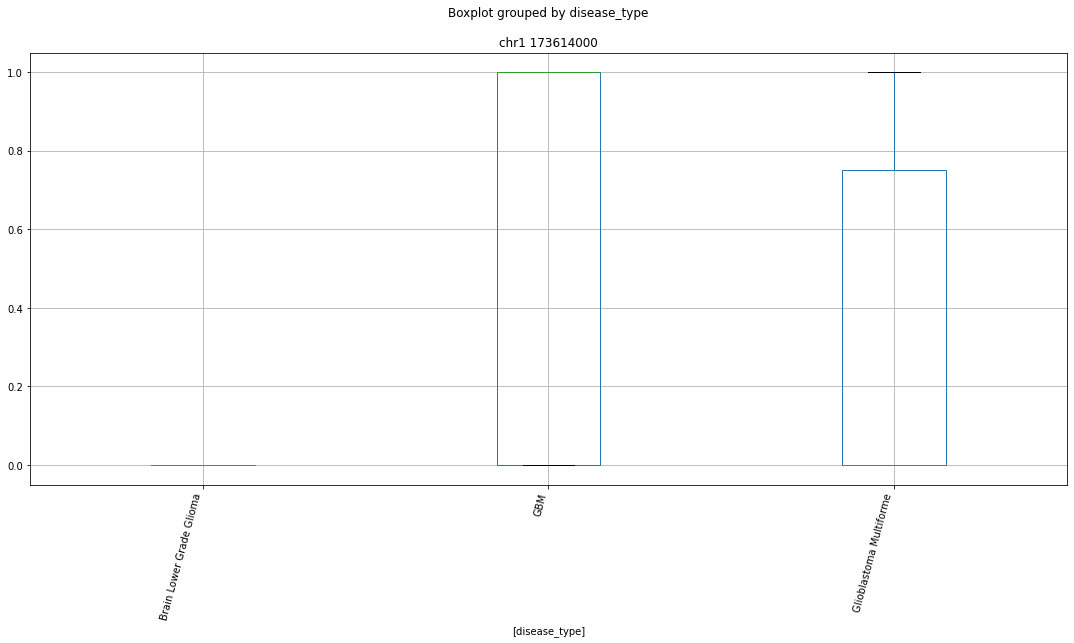

 p : 6.616621137048014e-11  ( t : 8.218938094196016 ) :  chrX 46276000


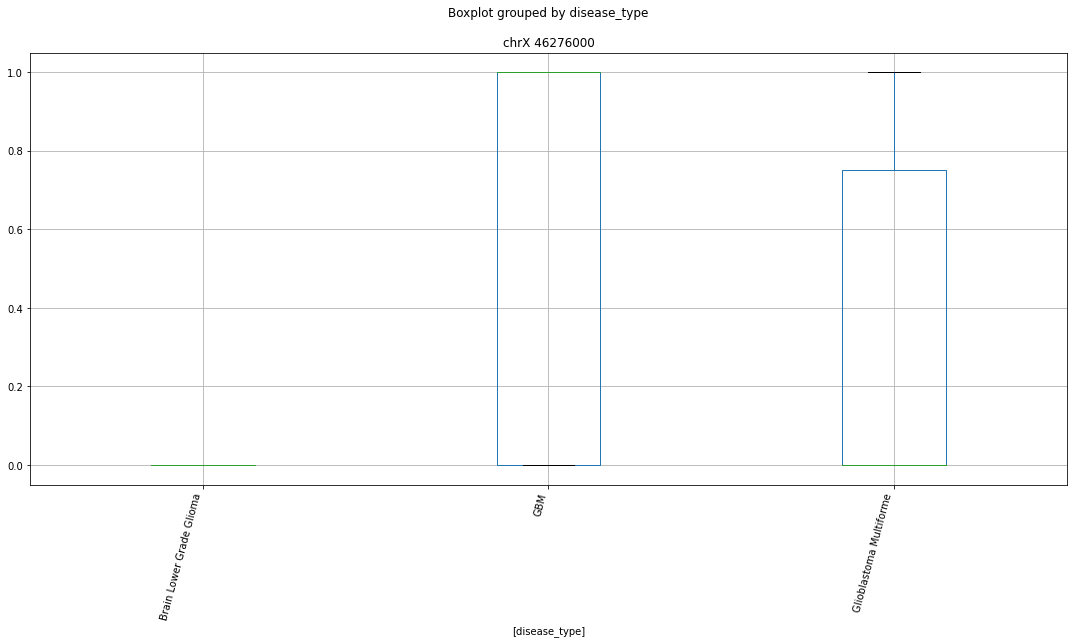

 p : 6.616621137048014e-11  ( t : 8.218938094196016 ) :  chr17 8551000


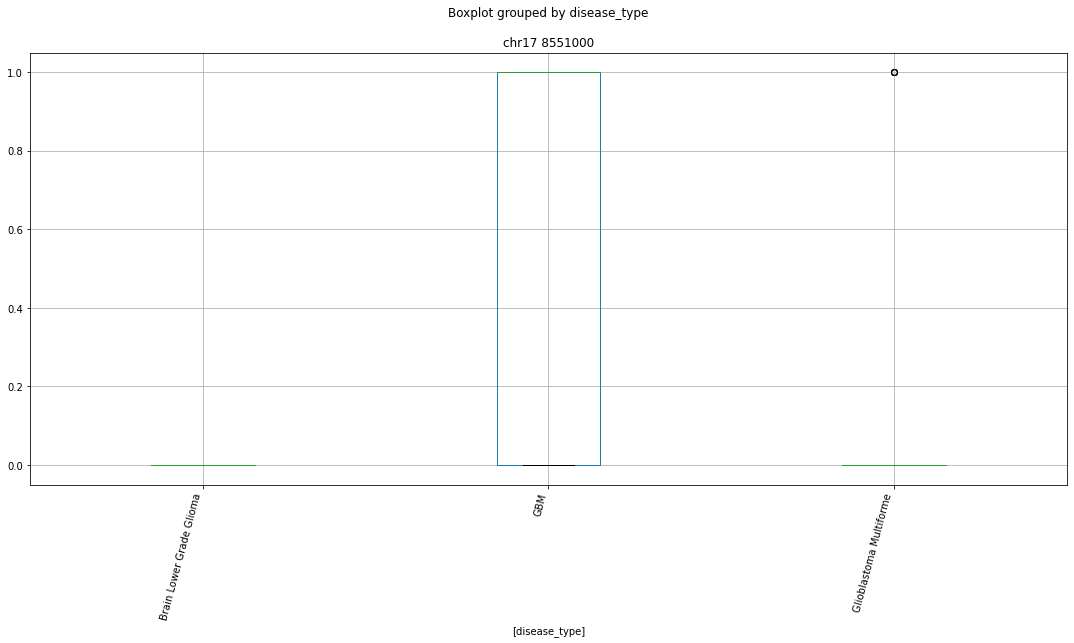

 p : 6.616621137048014e-11  ( t : 8.218938094196016 ) :  chr15 72102000


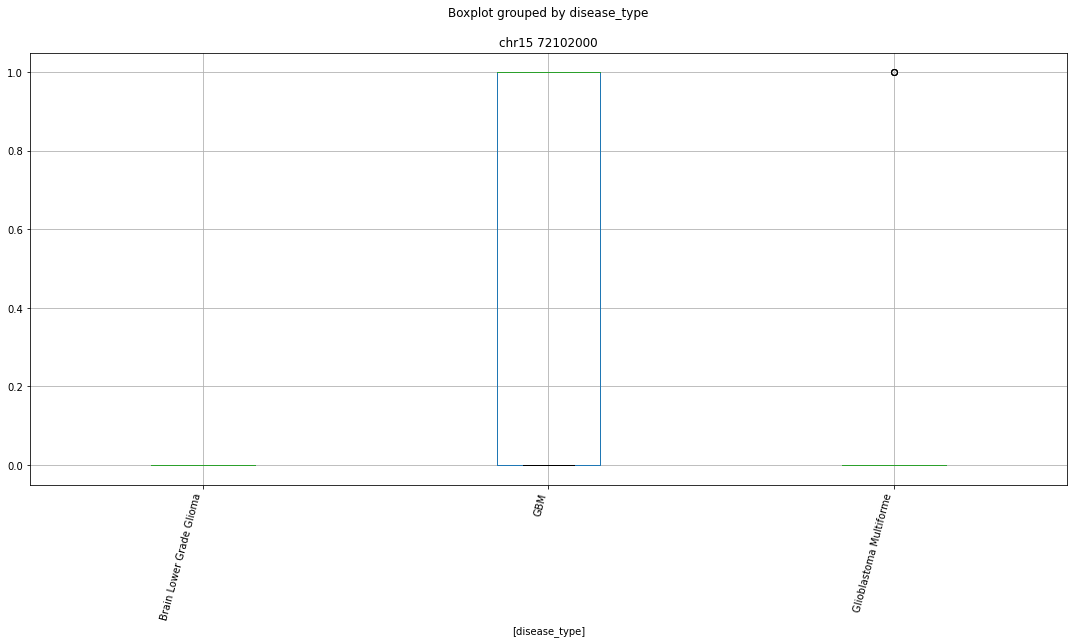

 p : 6.616621137048014e-11  ( t : 8.218938094196016 ) :  chr11 41305000


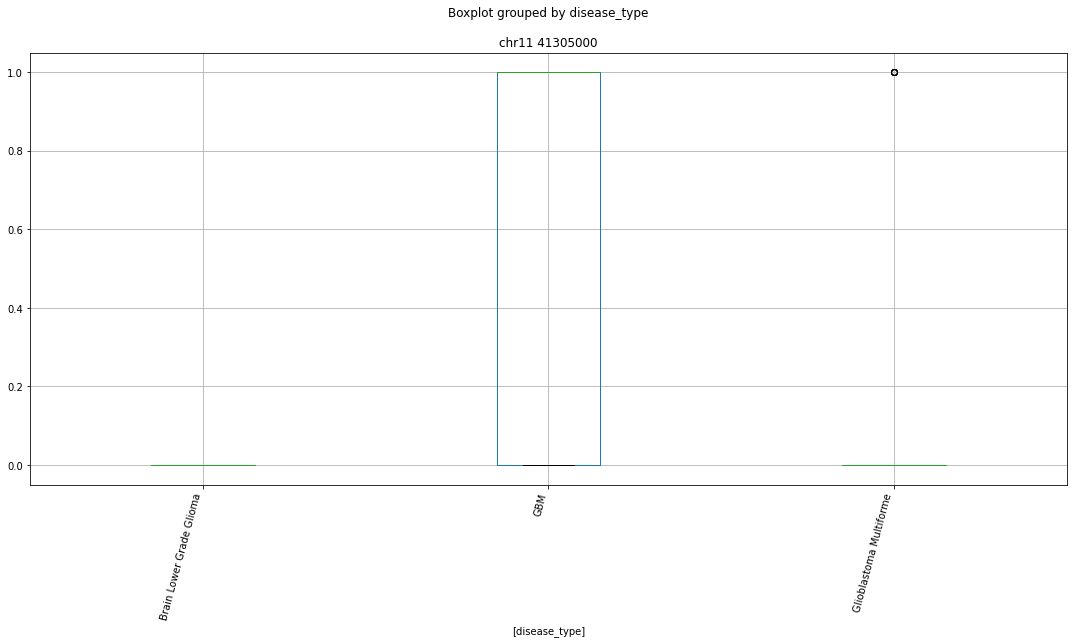

 p : 6.616621137048014e-11  ( t : 8.218938094196016 ) :  chr12 68484000


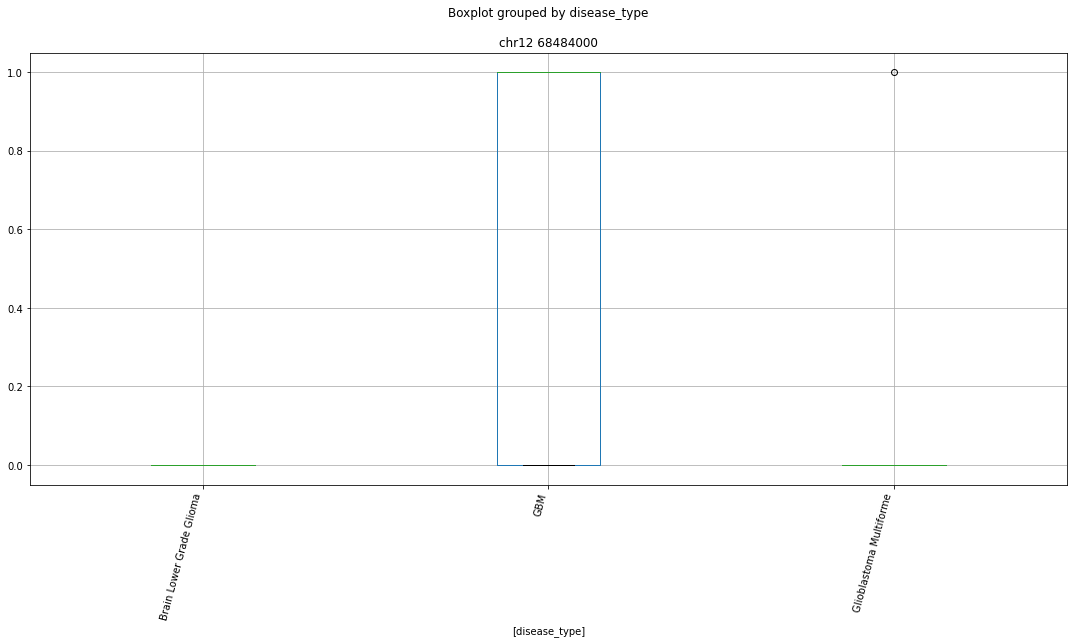

 p : 6.616621137048014e-11  ( t : 8.218938094196016 ) :  chr17 3997000


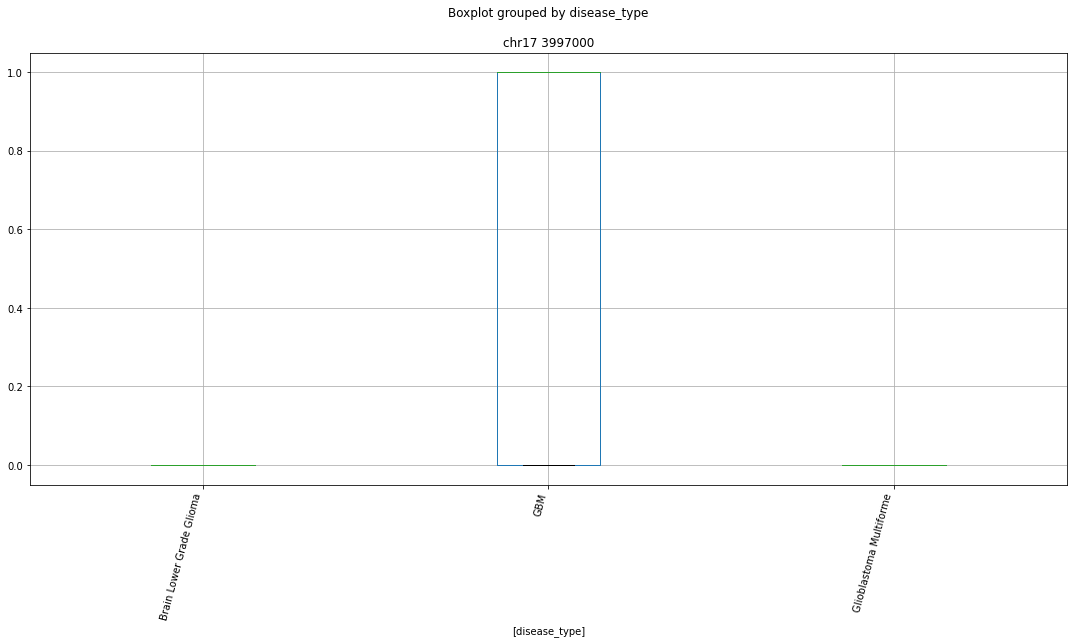

 p : 6.616621137048014e-11  ( t : 8.218938094196016 ) :  chr18 11609000


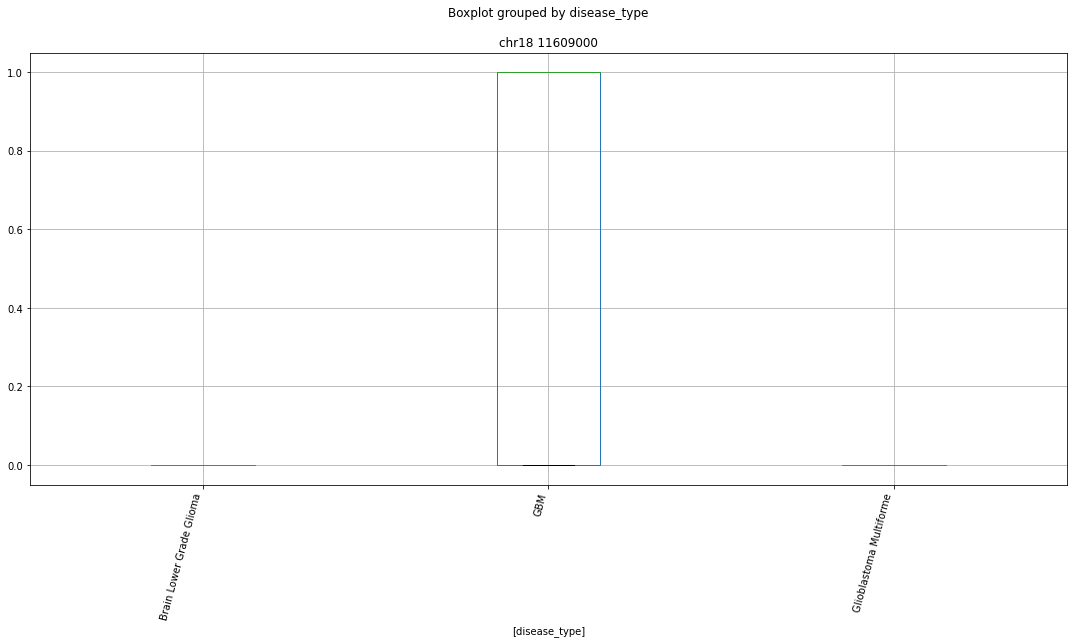

 p : 6.616621137048014e-11  ( t : 8.218938094196016 ) :  chr7 130592000


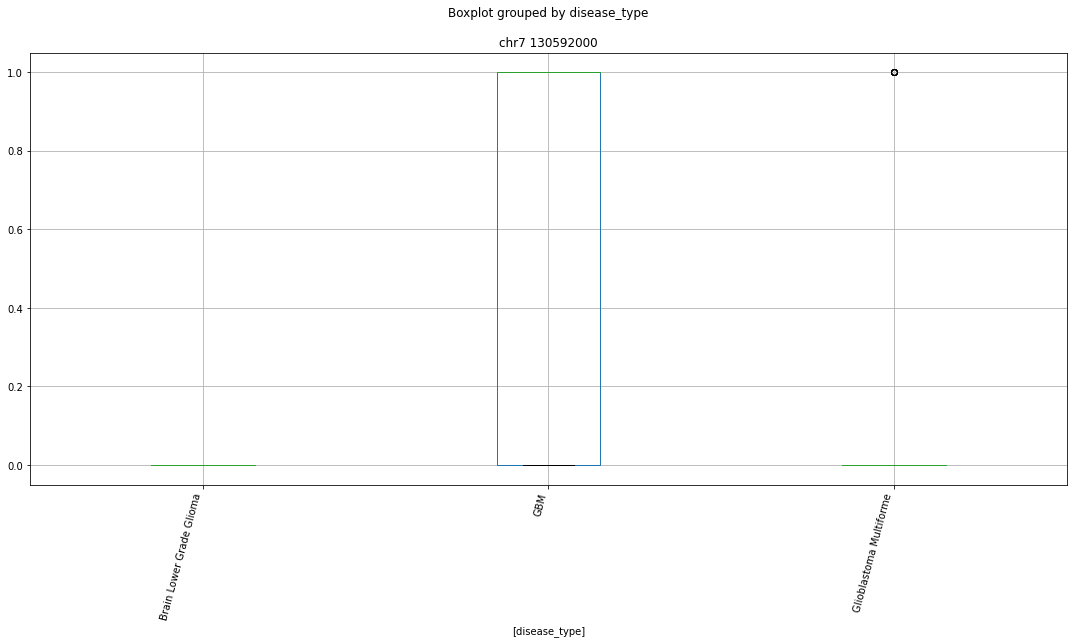

 p : 6.616621137048014e-11  ( t : 8.218938094196016 ) :  chr10 103130000


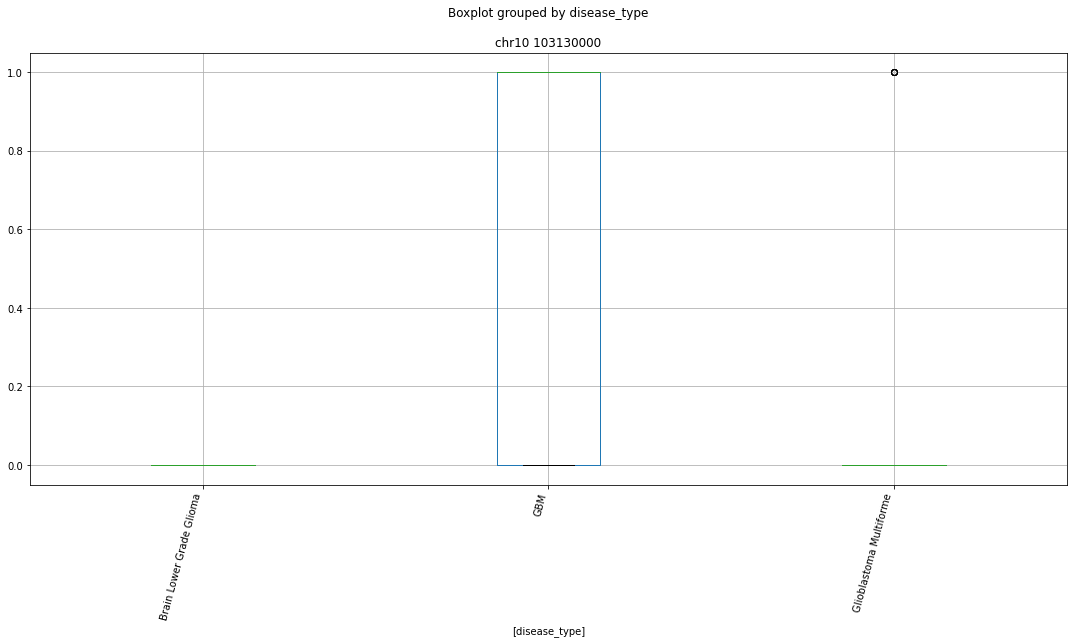

 p : 8.132074367057297e-11  ( t : 8.161442419967855 ) :  chr6 15190000


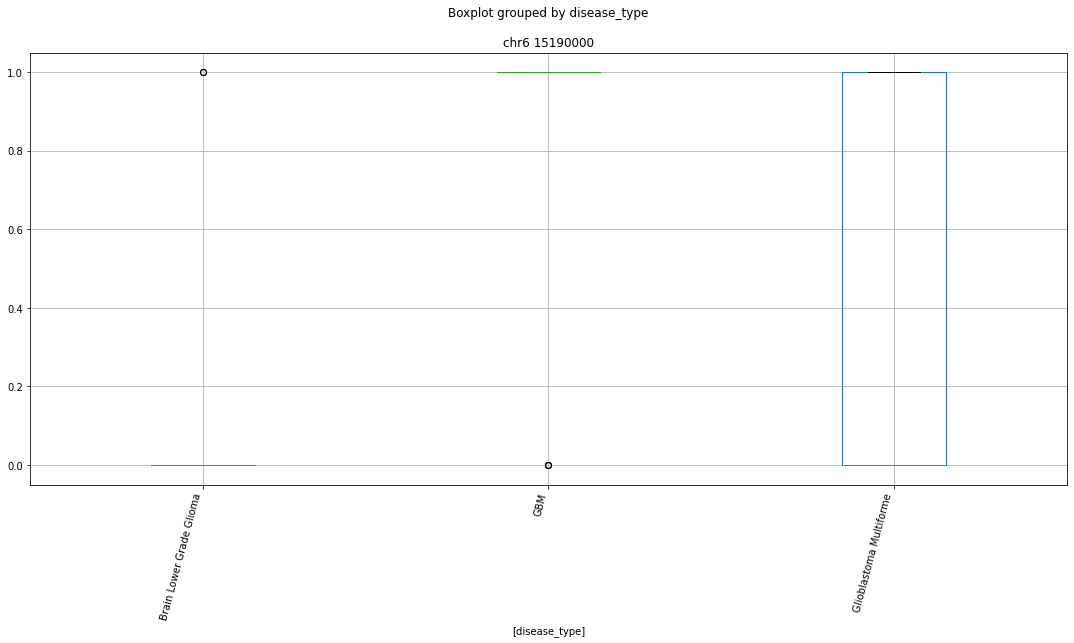

 p : 8.132074367057297e-11  ( t : 8.161442419967855 ) :  chr20 58413000


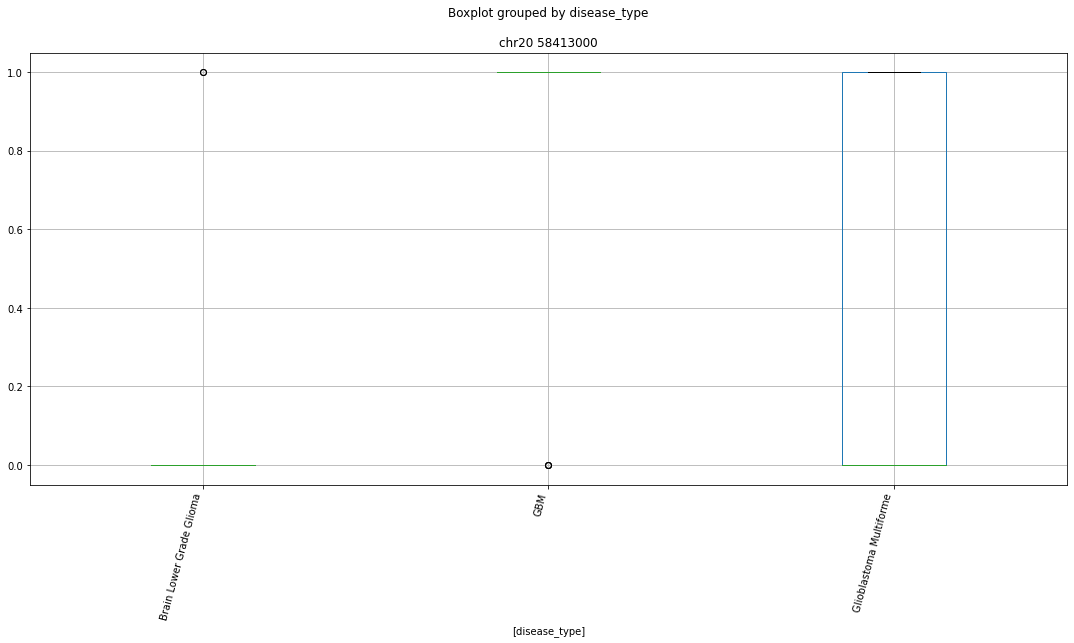

 p : 8.132074367057297e-11  ( t : 8.161442419967855 ) :  chr6 33526000


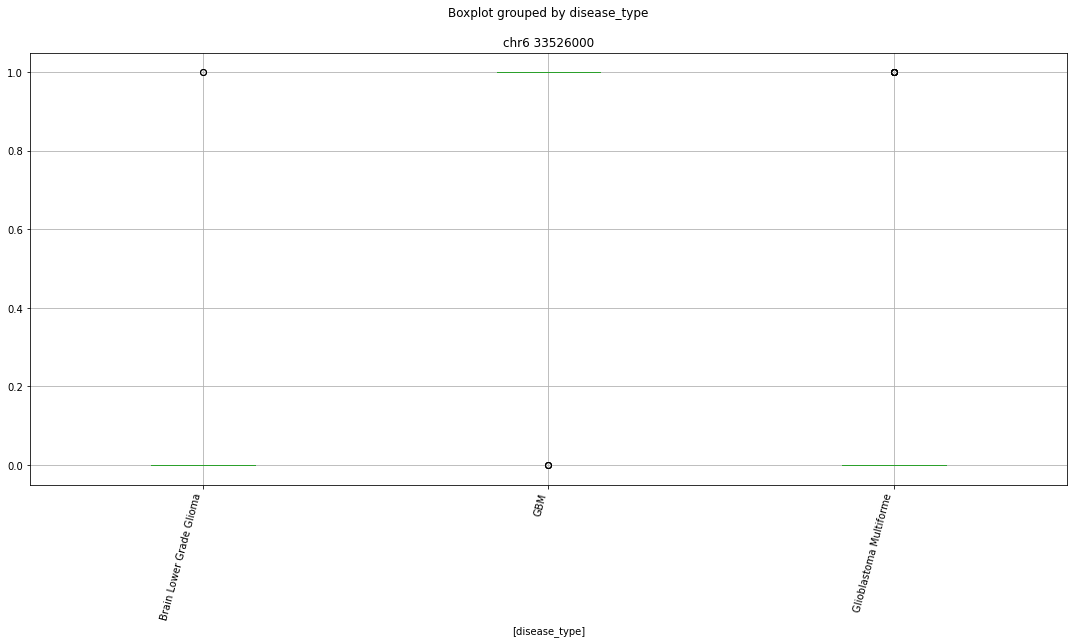

 p : 8.132074367057297e-11  ( t : 8.161442419967855 ) :  chr3 51250000


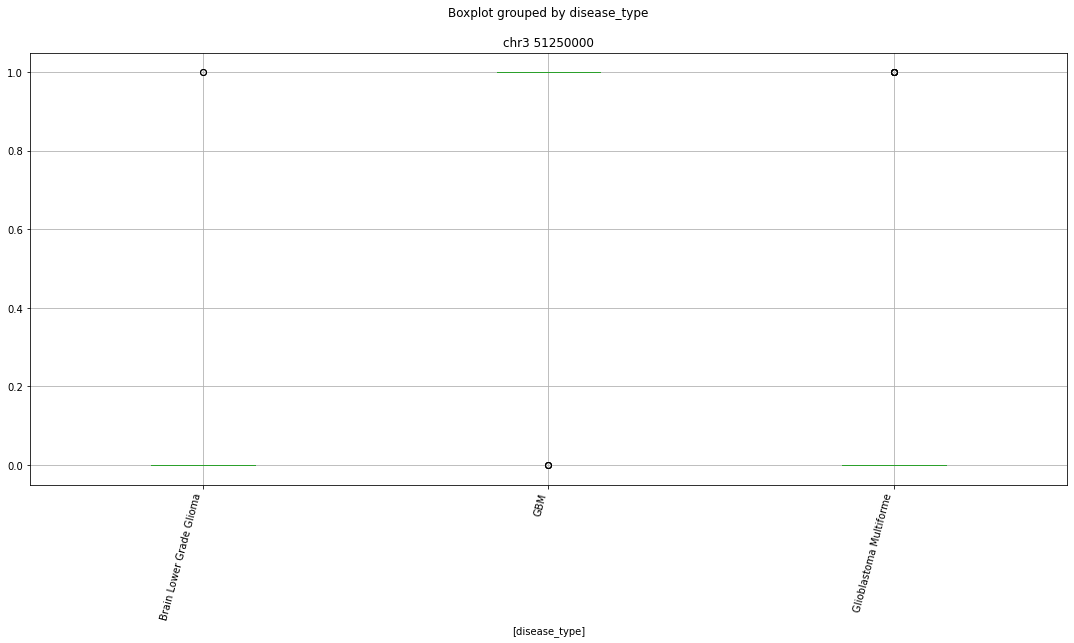

 p : 8.132074367057297e-11  ( t : 8.161442419967855 ) :  chr5 56013000


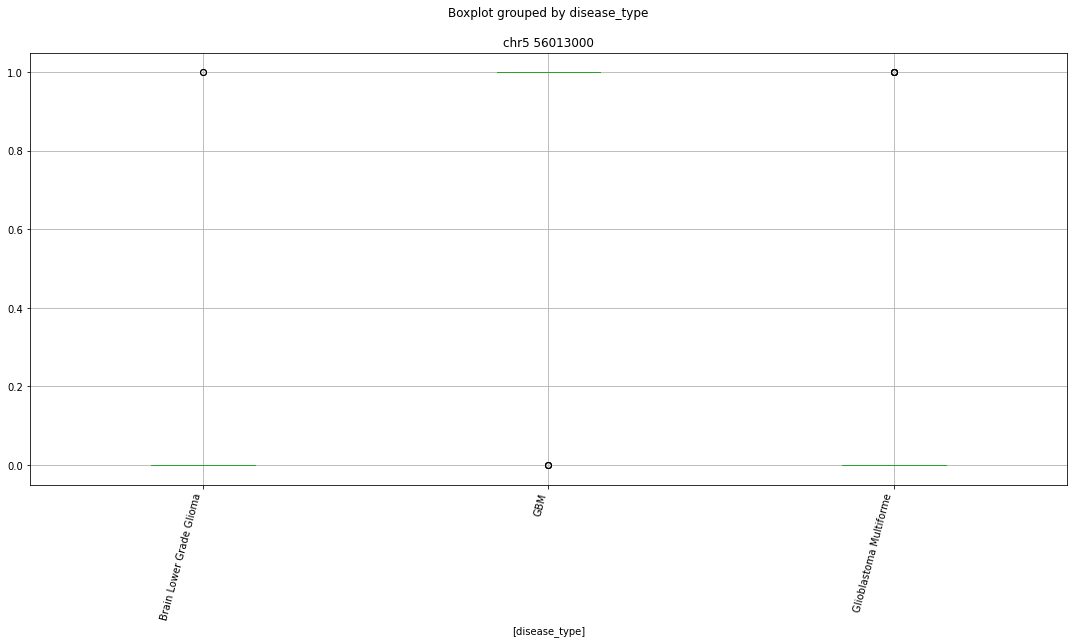

 p : 8.132074367057297e-11  ( t : 8.161442419967855 ) :  chr1 213150000


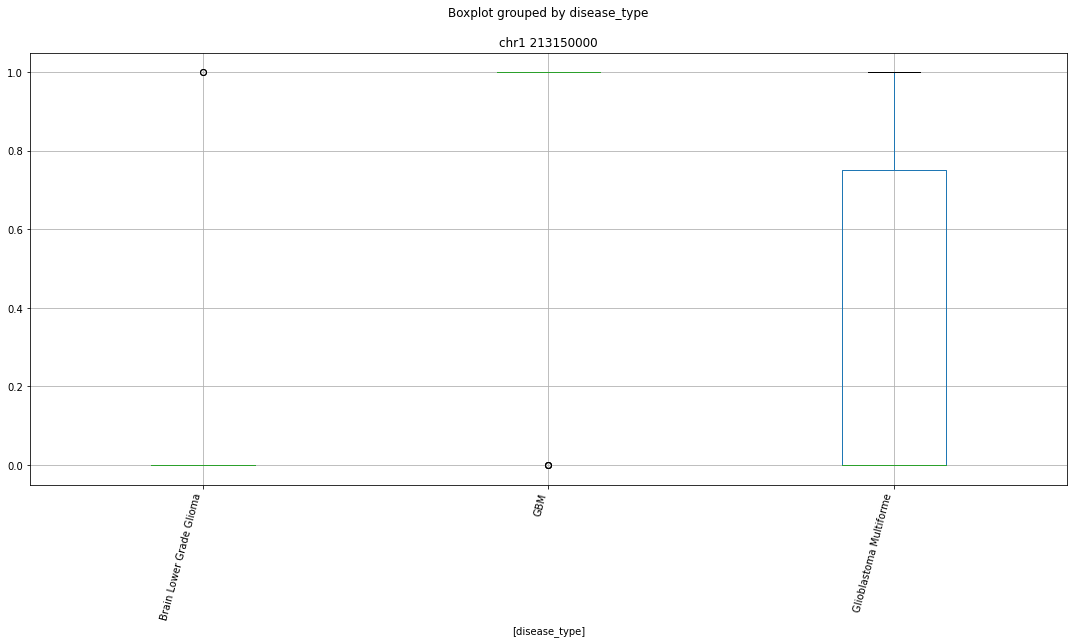

Clustermapping
['chr1 10029000' 'chr1 106413000' 'chr1 108161000' ... 'chrY 8917000'
 'disease_type' 'subject']


/Users/jakewendt/Library/Python/3.8/lib/python/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


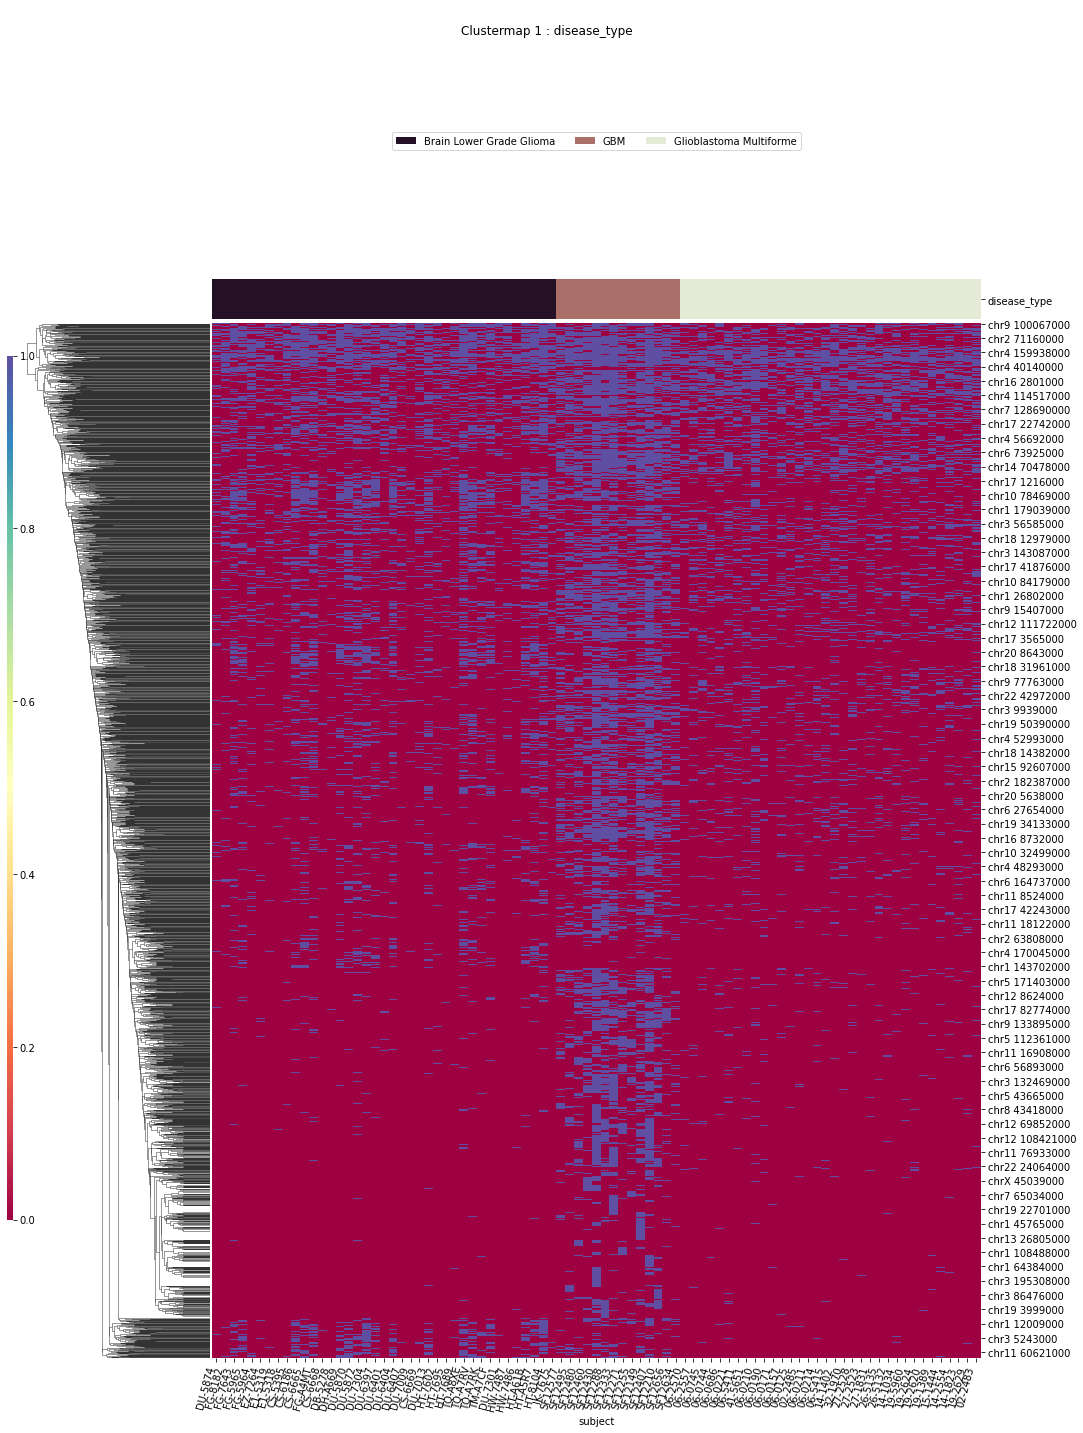

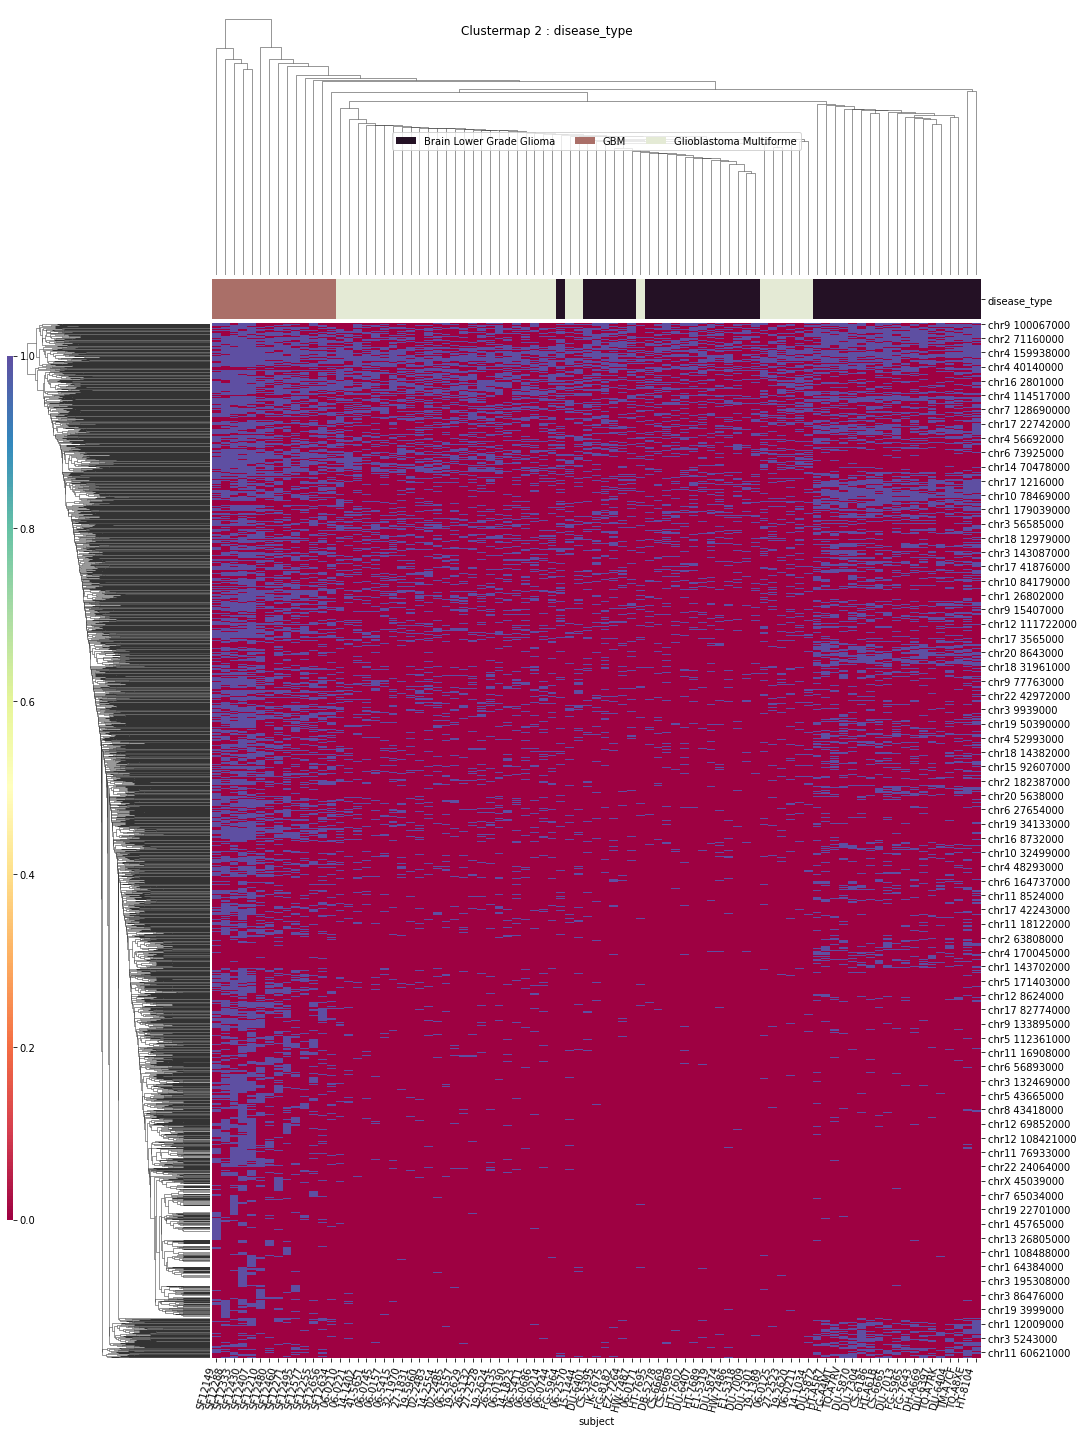

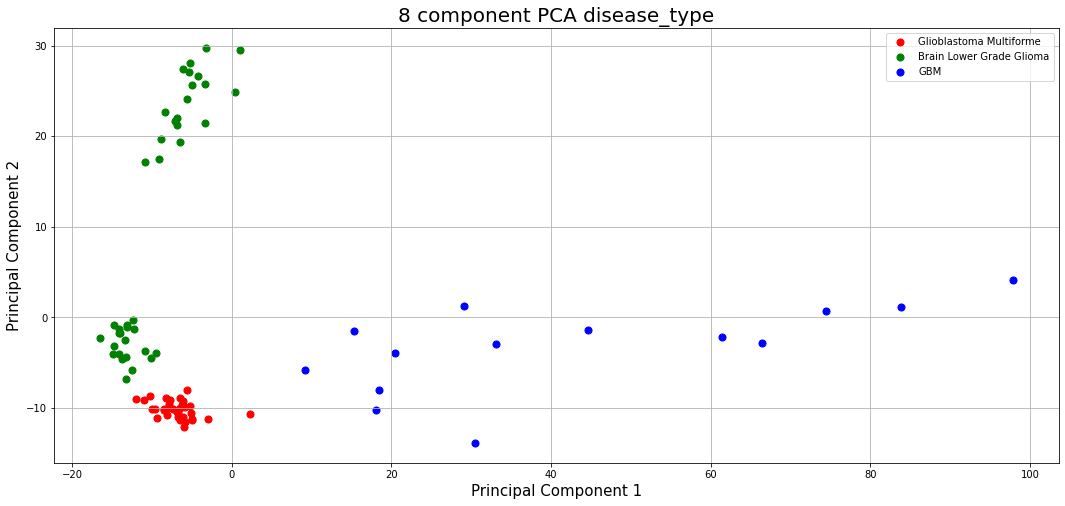

In [146]:
for column in ['disease_type']:
    print(column)
    ttests_boxplots_and_heatmaps(both_binary_df,
        both_binary_df.columns[both_binary_df.columns.str.contains("^chr")],column,box_p=1e-10,heat_p=0.1)
    

In [147]:
datetime.now().strftime("%Y%m%d %H:%M:%S")

'20210610 12:16:40'

disease_type
T-Testing
Boxplotting
 p : 2.8371647709053813e-21  ( t : 15.78690644471993 ) :  chr17 5143000


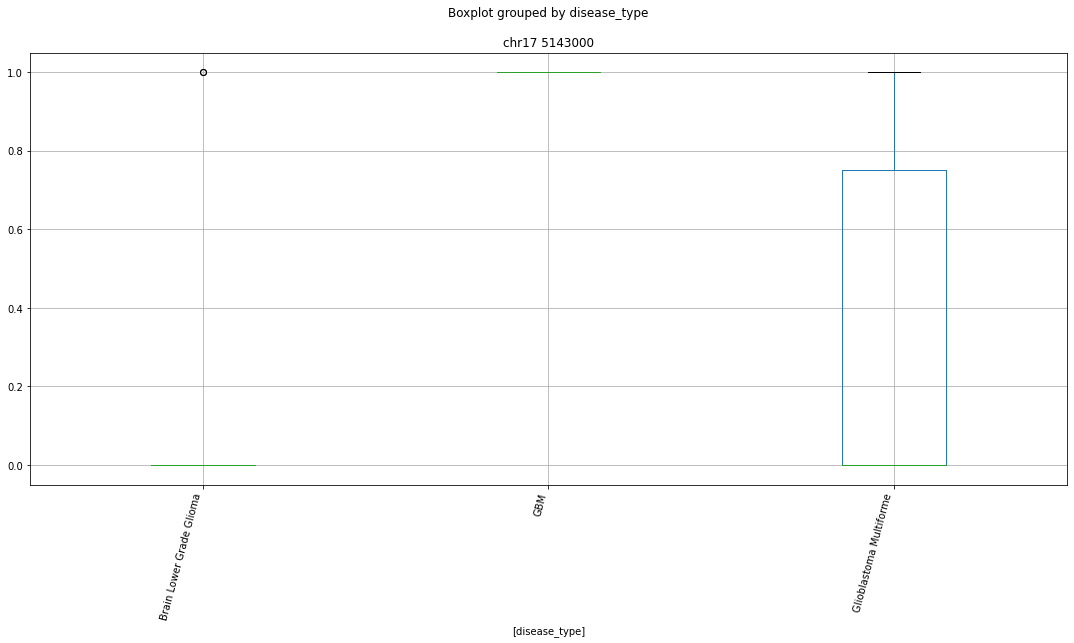

 p : 2.4075104891809472e-20  ( t : 15.005659309765589 ) :  chr2 3365000


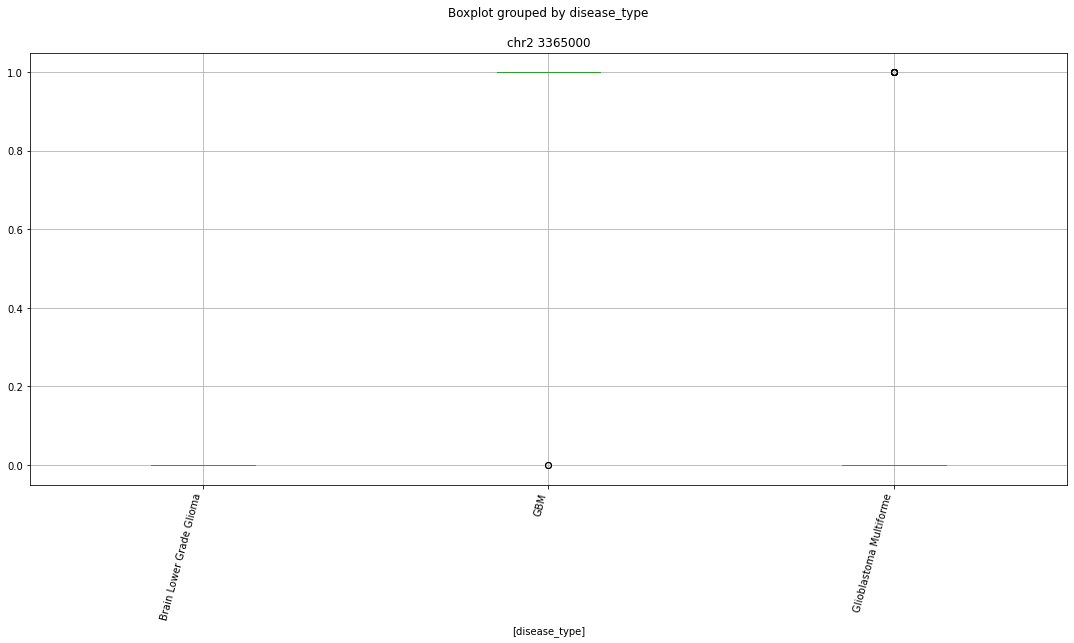

 p : 2.4075104891809472e-20  ( t : 15.005659309765589 ) :  chr14 58589000


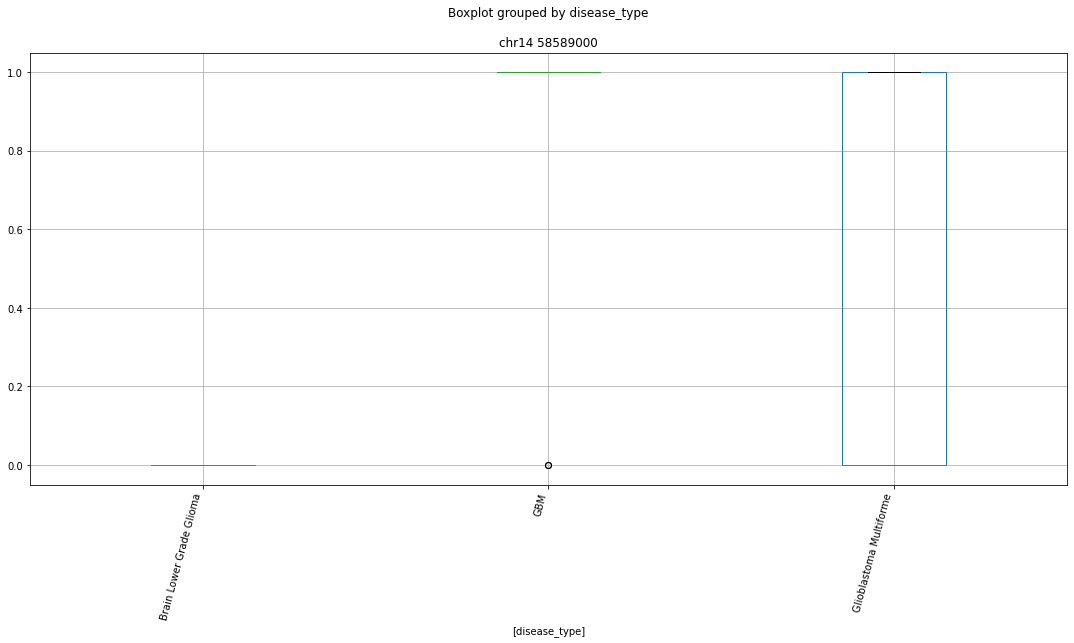

 p : 2.4075104891809472e-20  ( t : 15.005659309765589 ) :  chr12 37813000


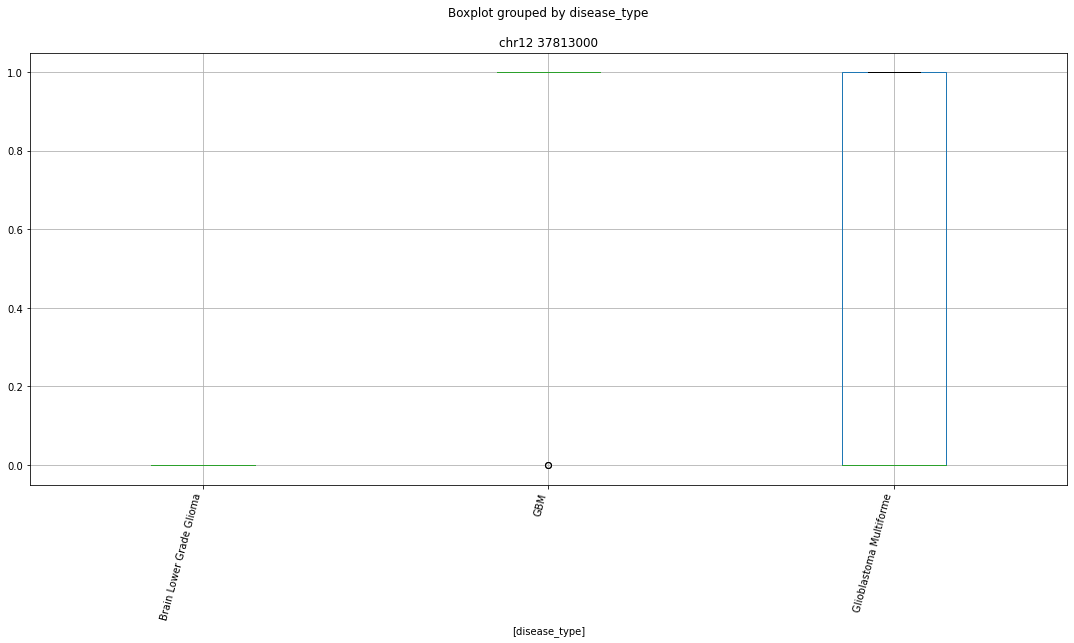

 p : 2.4075104891809472e-20  ( t : 15.005659309765589 ) :  chr9 6808000


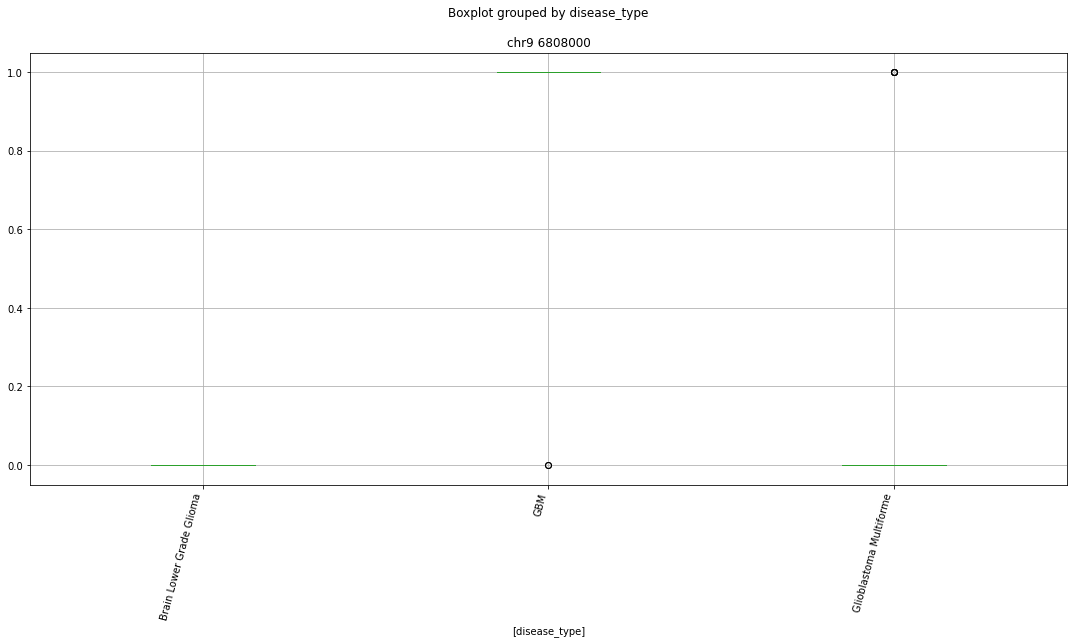

 p : 2.4075104891809472e-20  ( t : 15.005659309765589 ) :  chr10 70686000


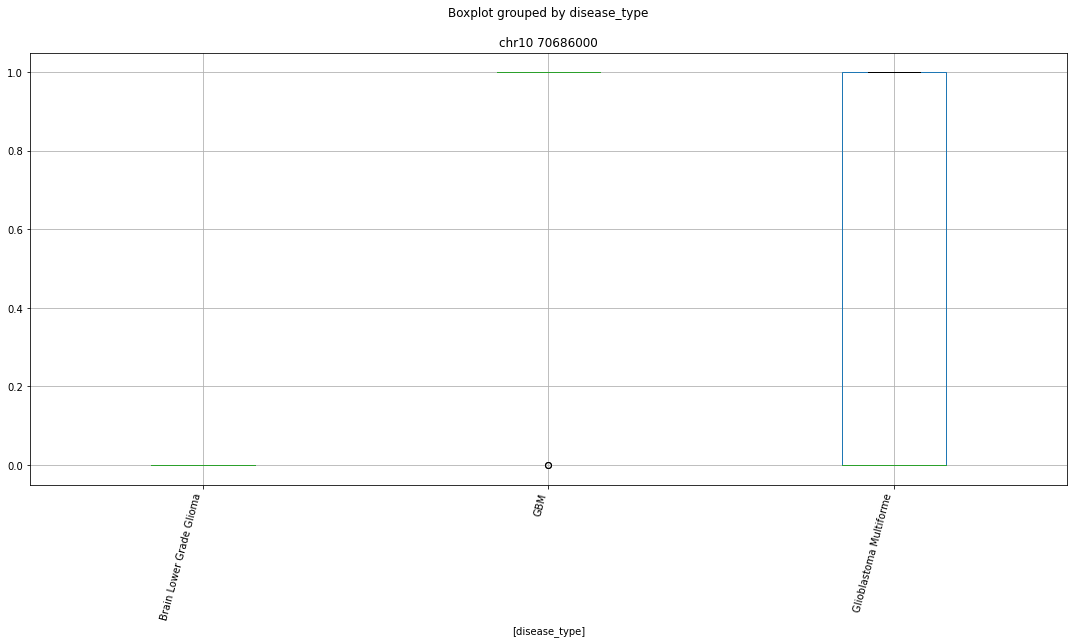

 p : 2.4075104891809472e-20  ( t : 15.005659309765589 ) :  chr20 45645000


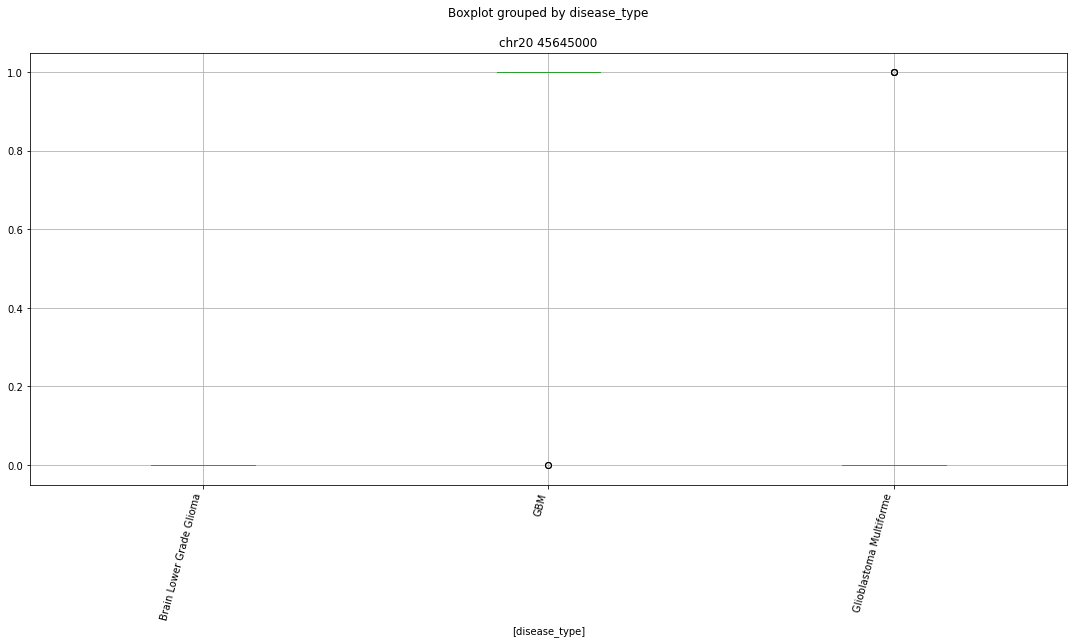

 p : 2.4234851722849214e-20  ( t : 15.003282913852896 ) :  chr16 89463000


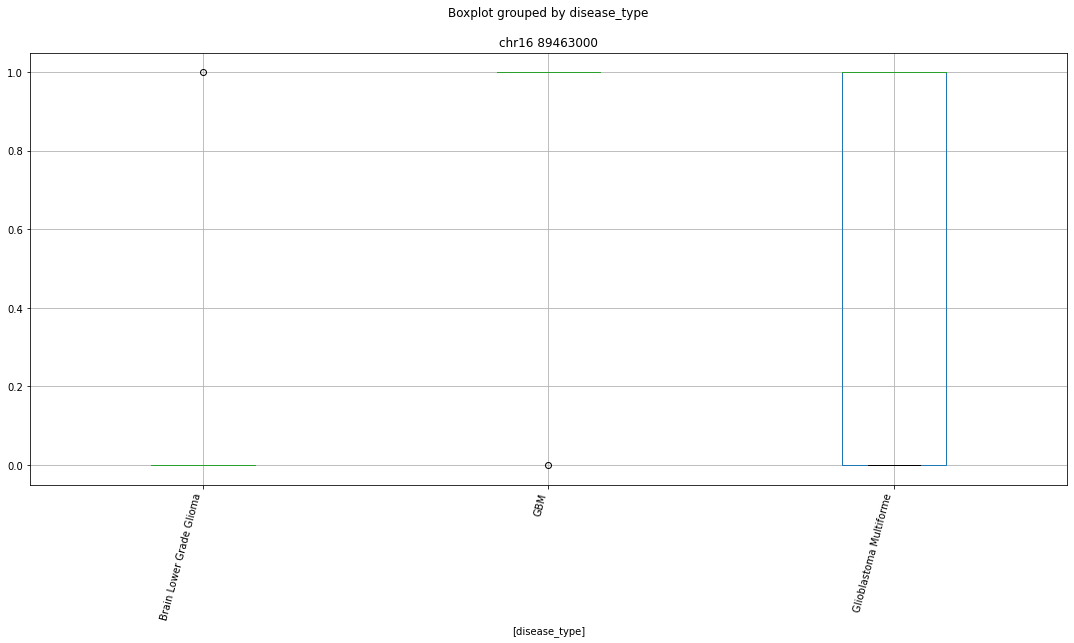

 p : 2.4234851722849214e-20  ( t : 15.003282913852896 ) :  chr13 46514000


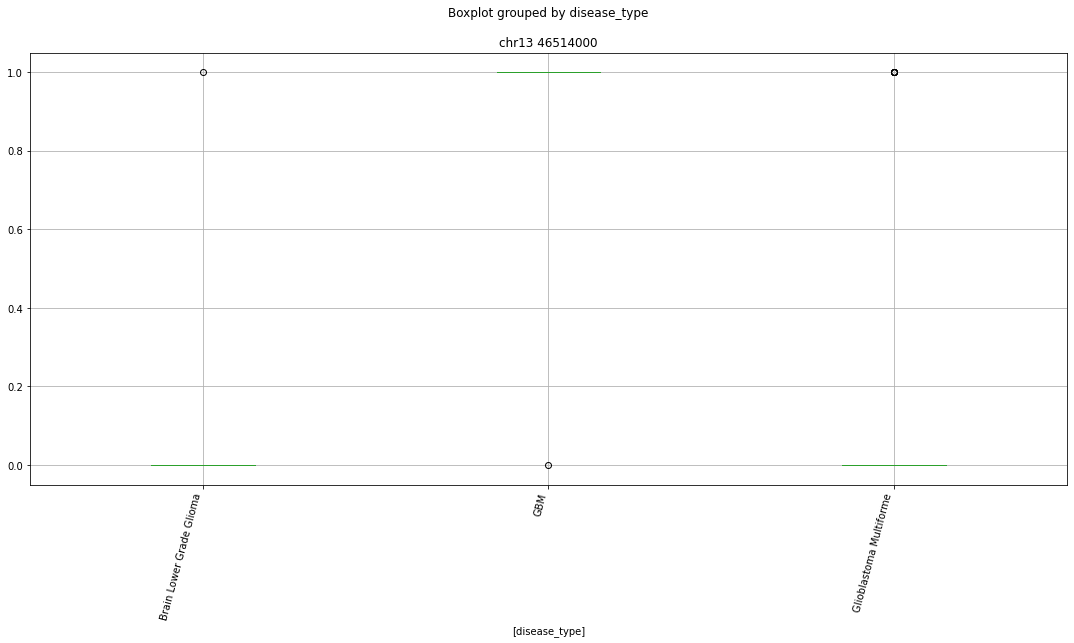

 p : 6.052106007130139e-19  ( t : 14.65150731722394 ) :  chr14 90445000


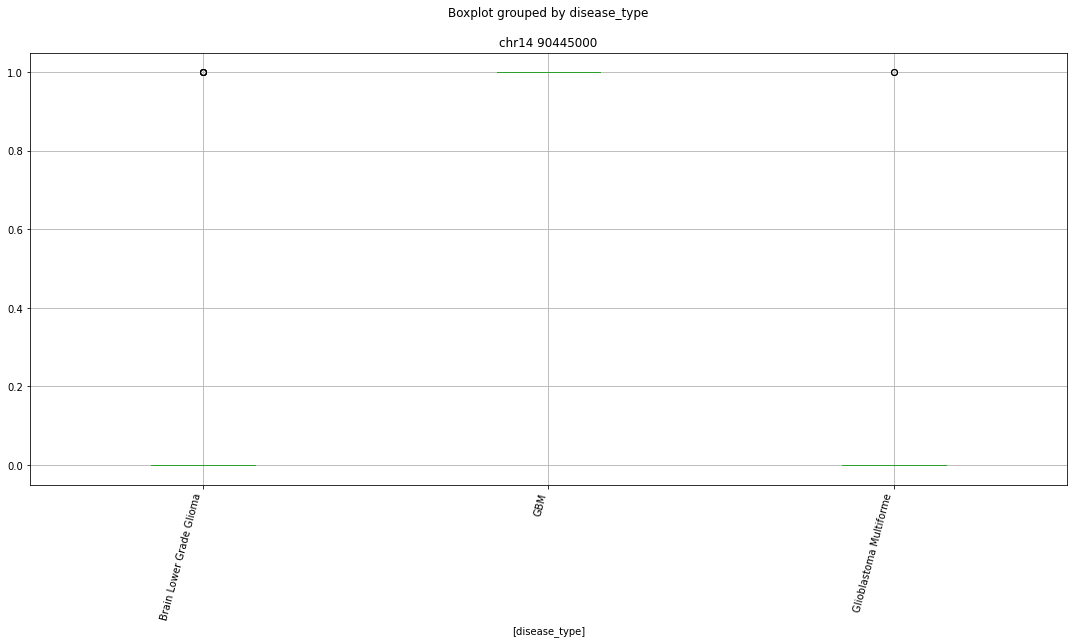

 p : 3.5344159057936754e-18  ( t : 13.982131454109561 ) :  chr2 11164000


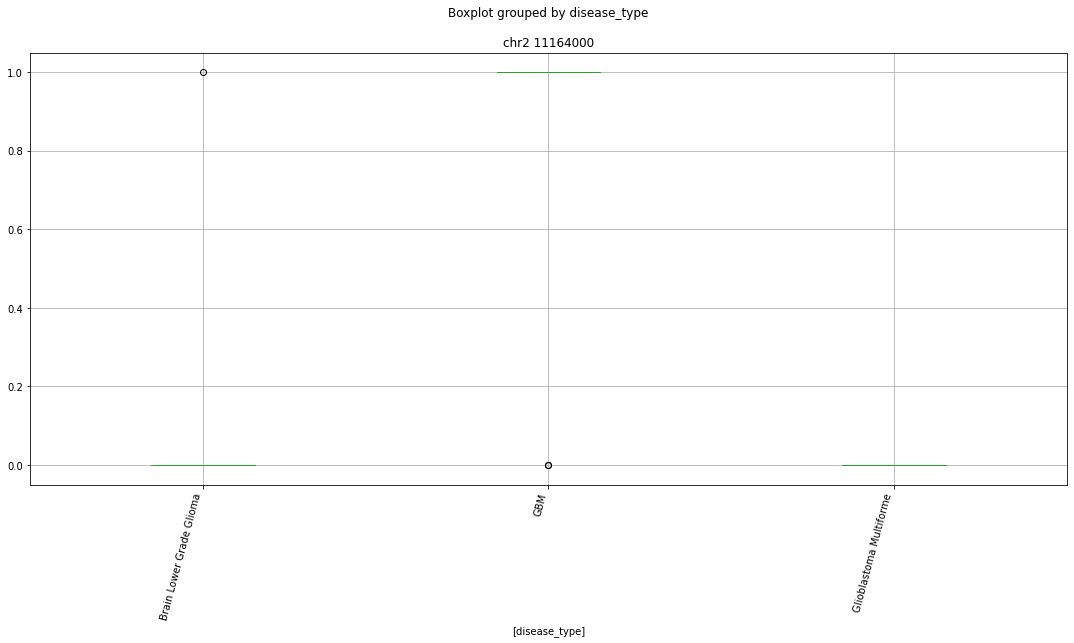

 p : 3.5344159057936754e-18  ( t : 13.982131454109561 ) :  chr16 31170000


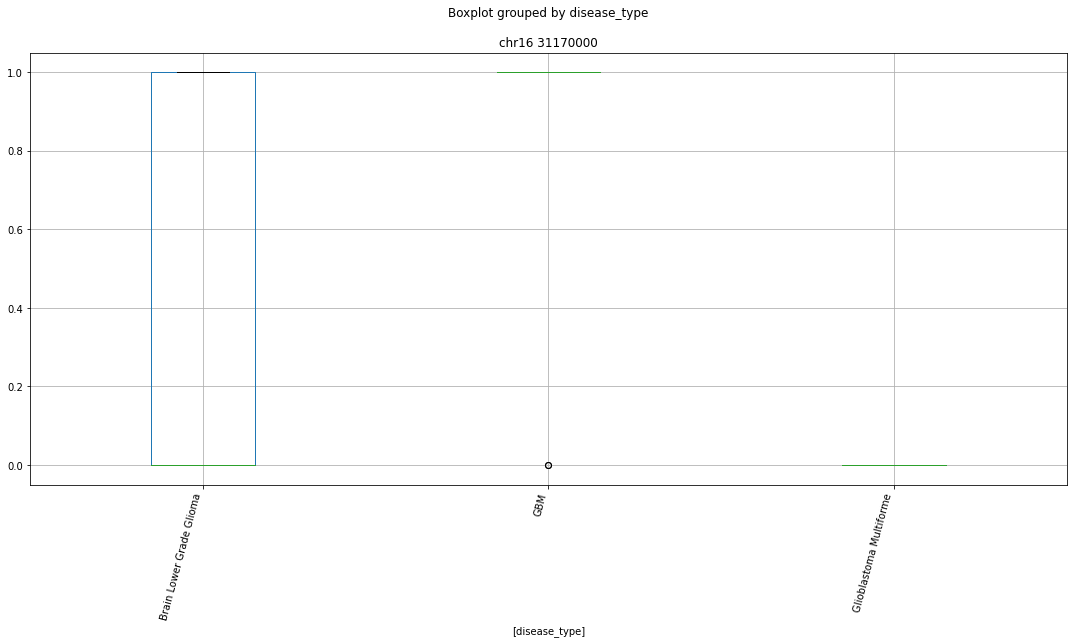

 p : 2.0346699265924837e-16  ( t : 11.961887225105135 ) :  chr11 124705000


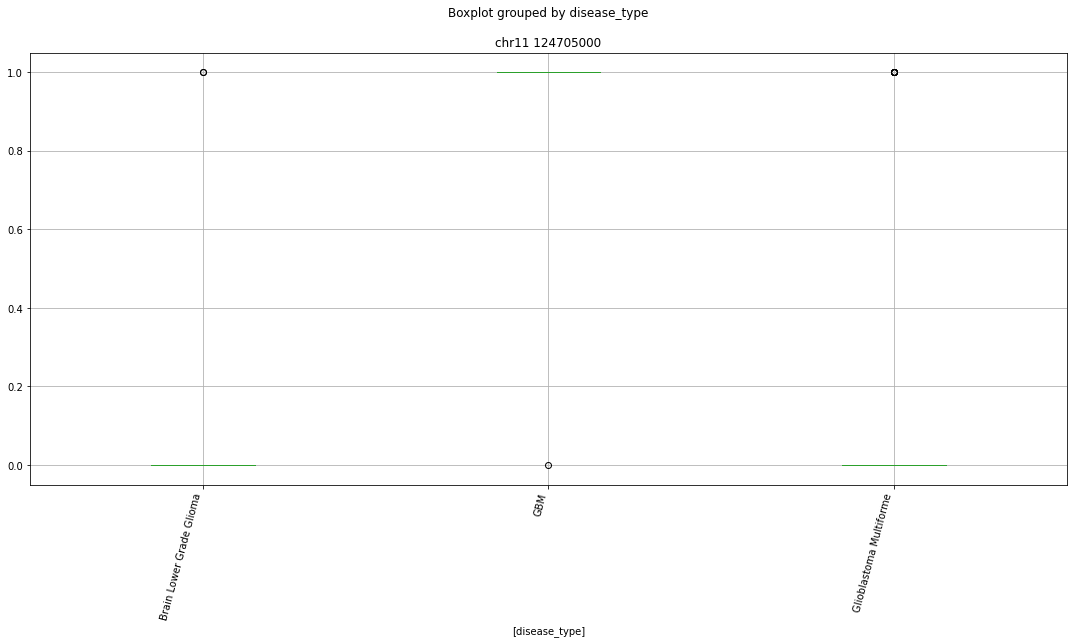

 p : 2.0346699265925125e-16  ( t : 11.961887225105132 ) :  chr20 32121000


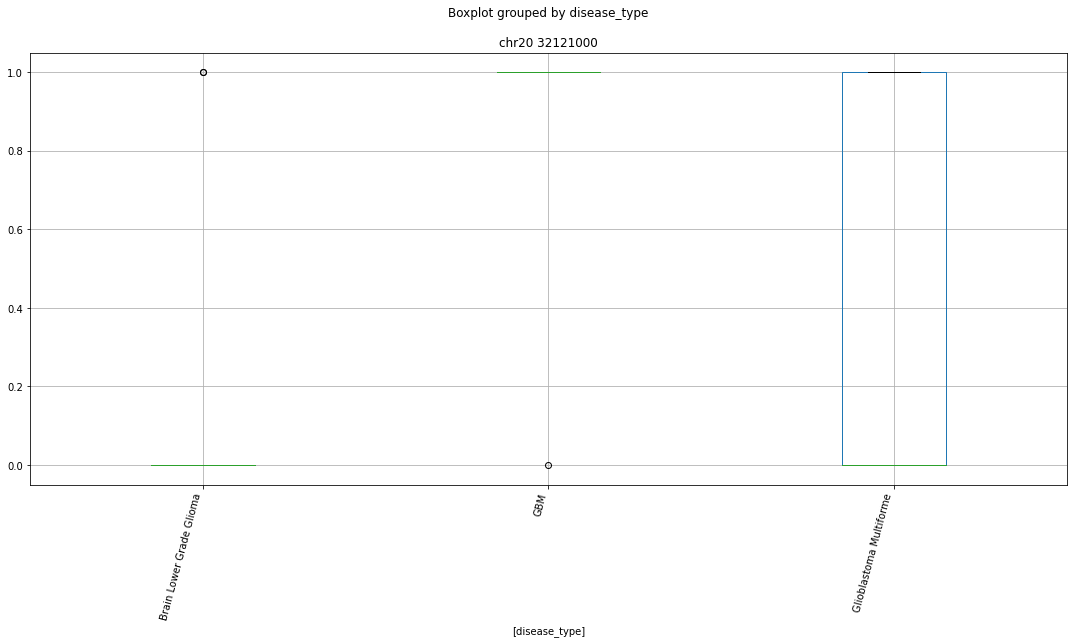

 p : 2.0346699265925125e-16  ( t : 11.961887225105132 ) :  chr17 27034000


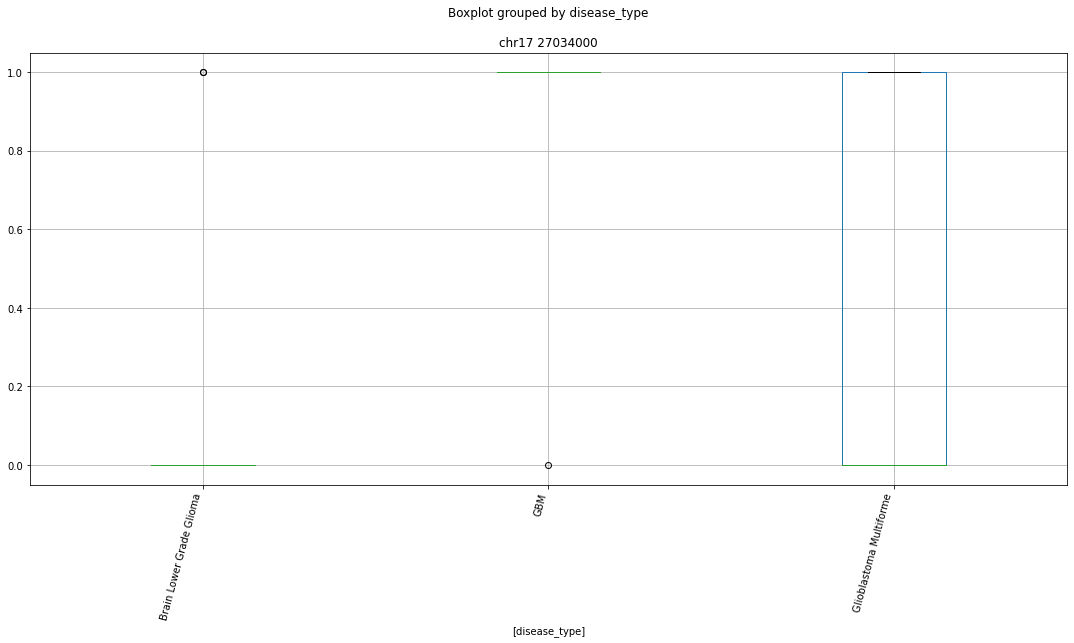

 p : 2.0346699265925125e-16  ( t : 11.961887225105132 ) :  chr2 186153000


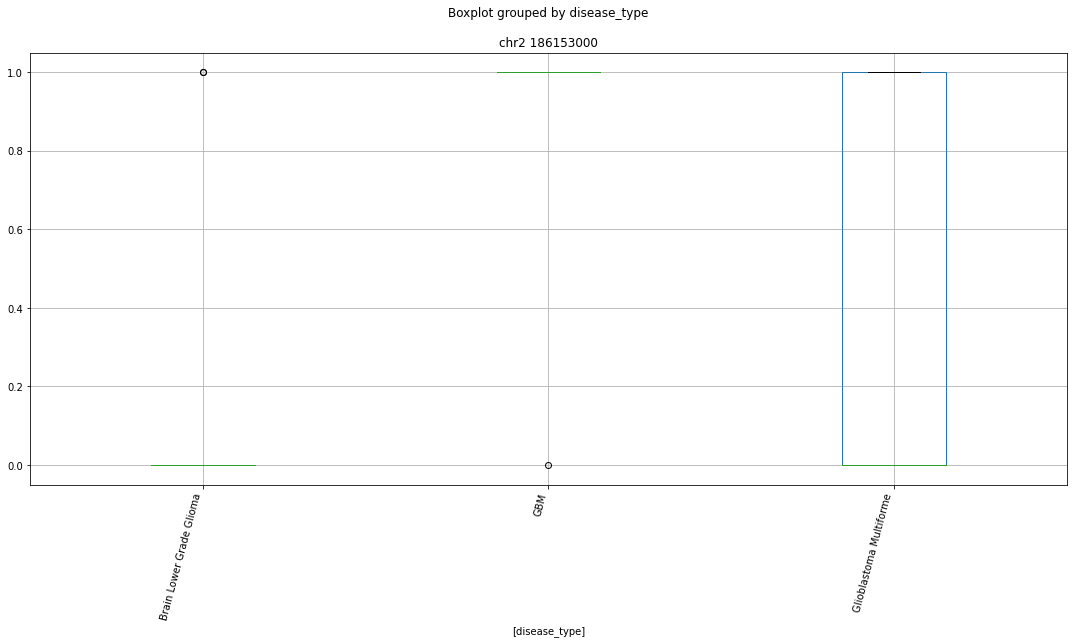

 p : 4.2462278382711956e-16  ( t : 11.730463485510949 ) :  chr1 21389000


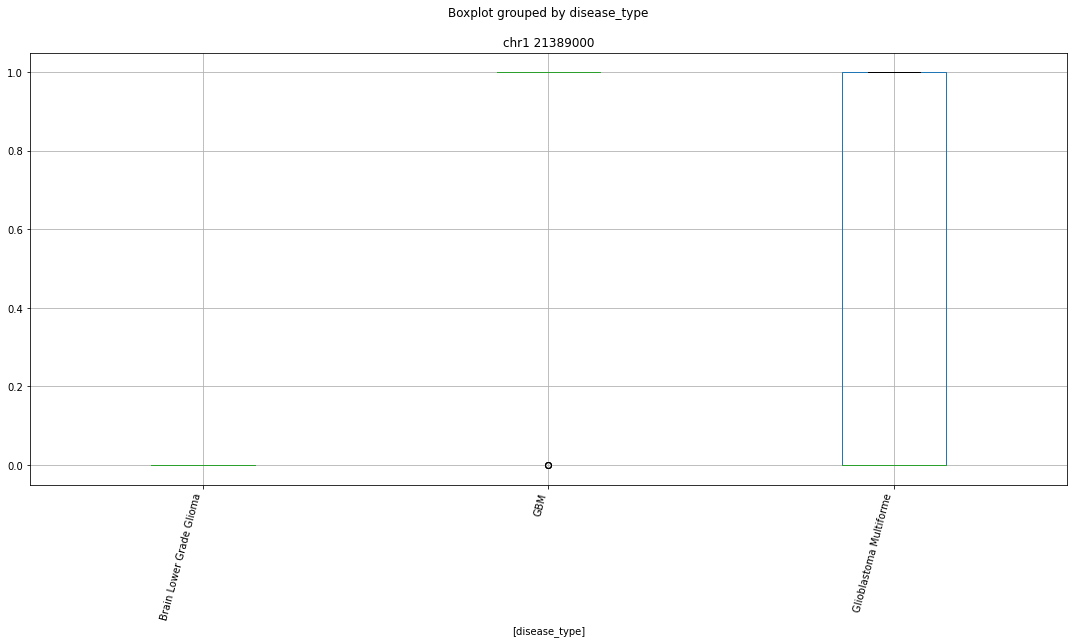

 p : 4.2462278382711956e-16  ( t : 11.730463485510949 ) :  chr2 143992000


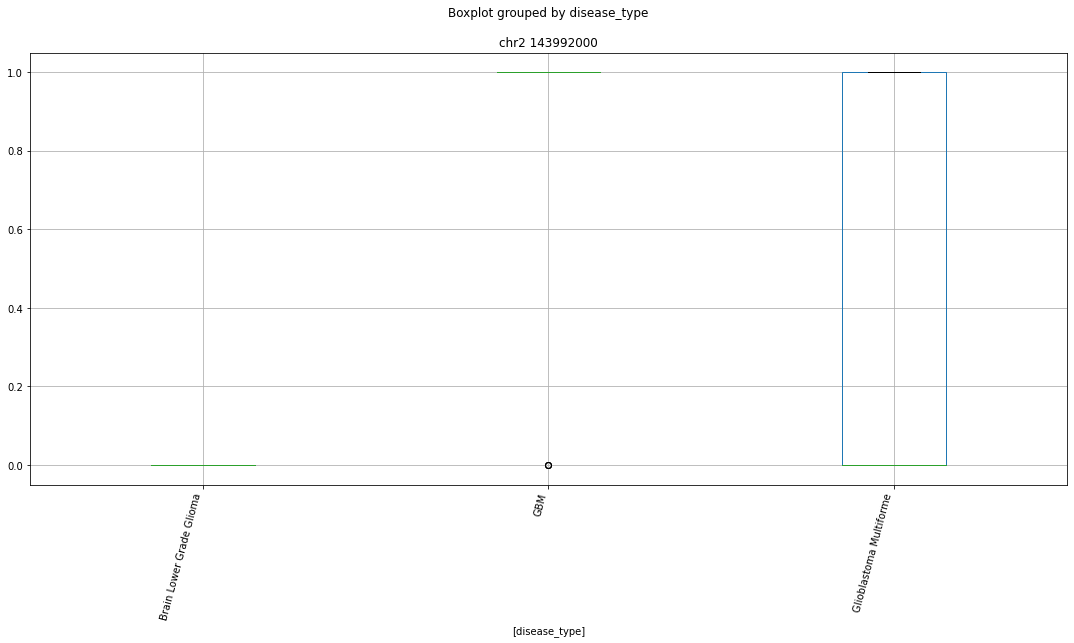

 p : 4.2462278382711956e-16  ( t : 11.730463485510949 ) :  chr5 142074000


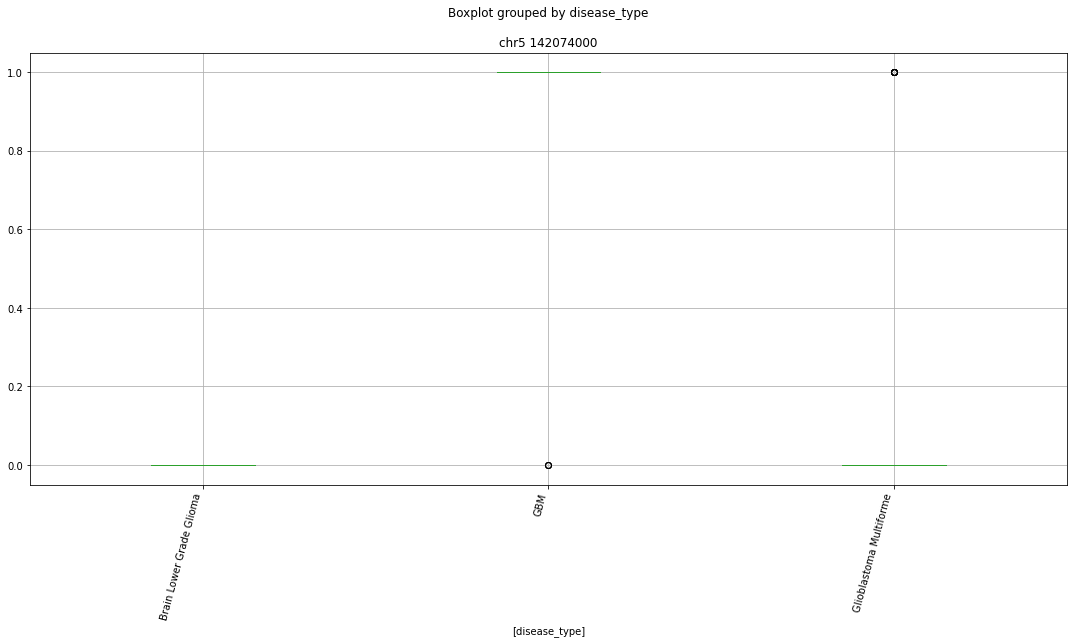

 p : 4.2462278382711956e-16  ( t : 11.730463485510949 ) :  chr1 111800000


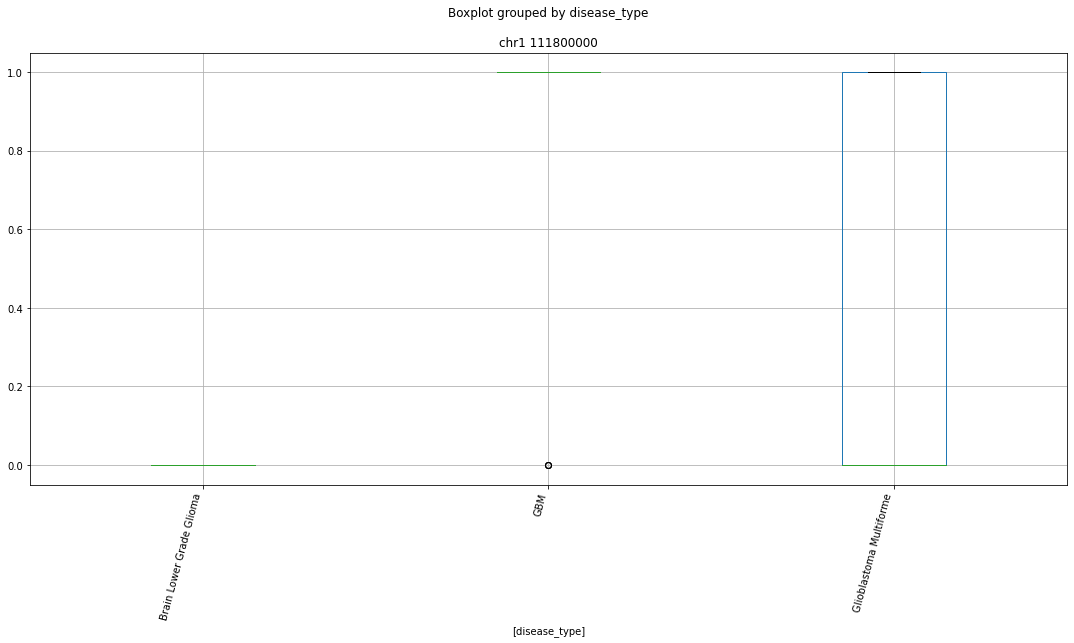

 p : 4.2462278382711956e-16  ( t : 11.730463485510949 ) :  chr2 233723000


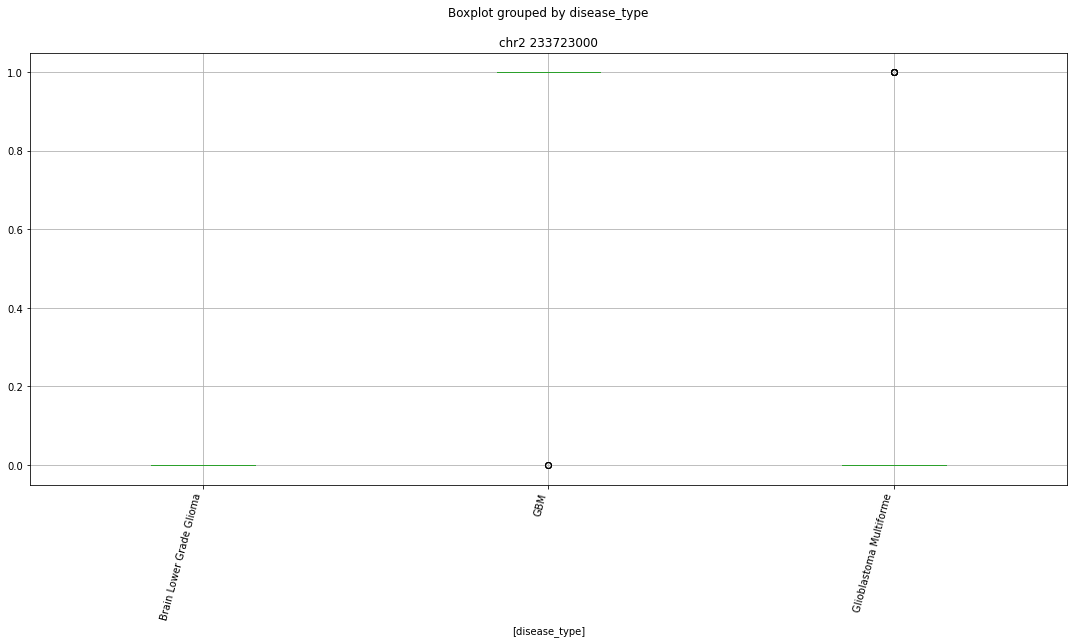

 p : 4.246227838271226e-16  ( t : 11.730463485510947 ) :  chr12 48915000


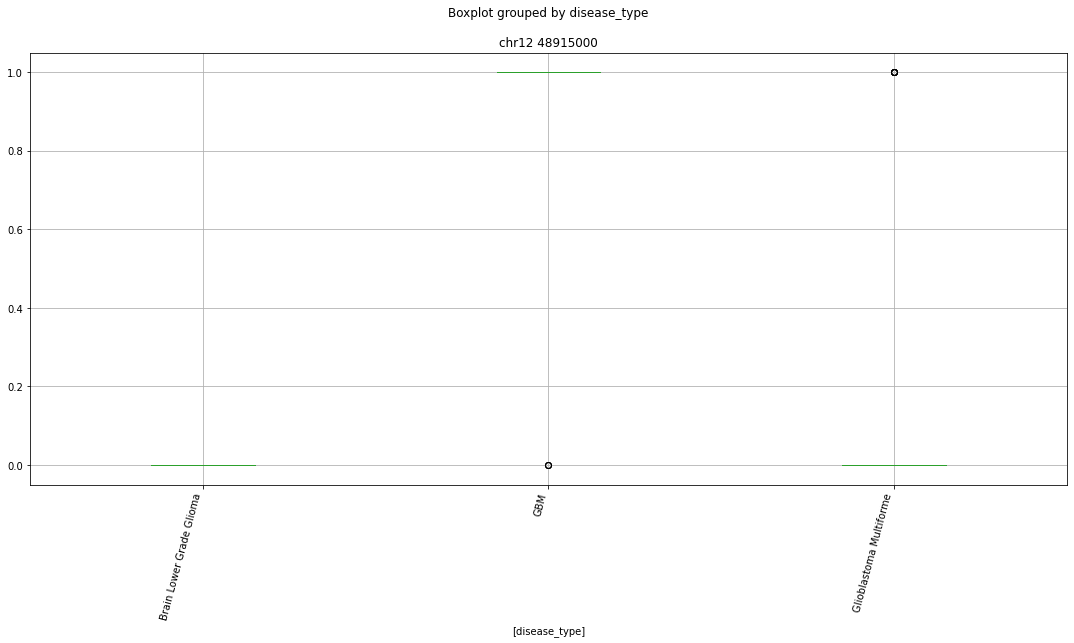

 p : 4.246227838271226e-16  ( t : 11.730463485510947 ) :  chr19 23532000


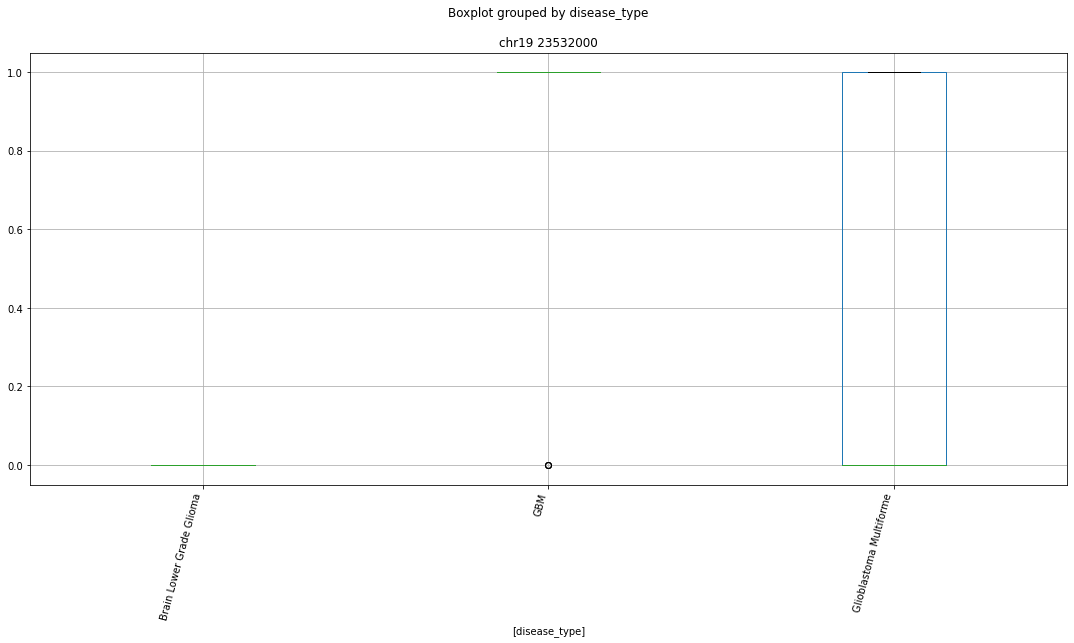

 p : 4.246227838271226e-16  ( t : 11.730463485510947 ) :  chr11 60492000


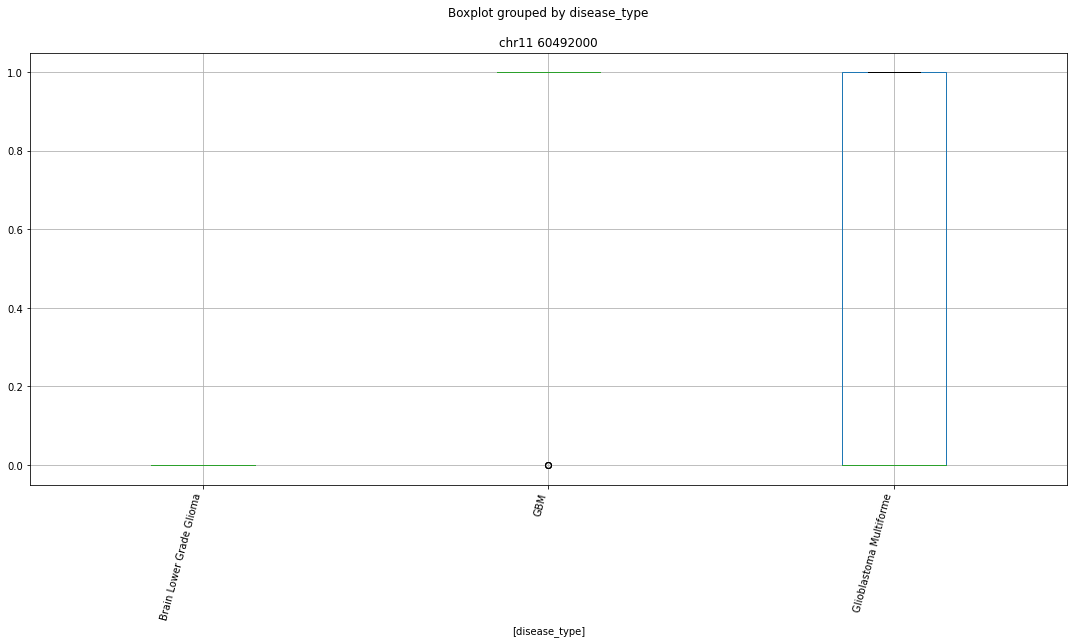

 p : 4.246227838271226e-16  ( t : 11.730463485510947 ) :  chr1 8912000


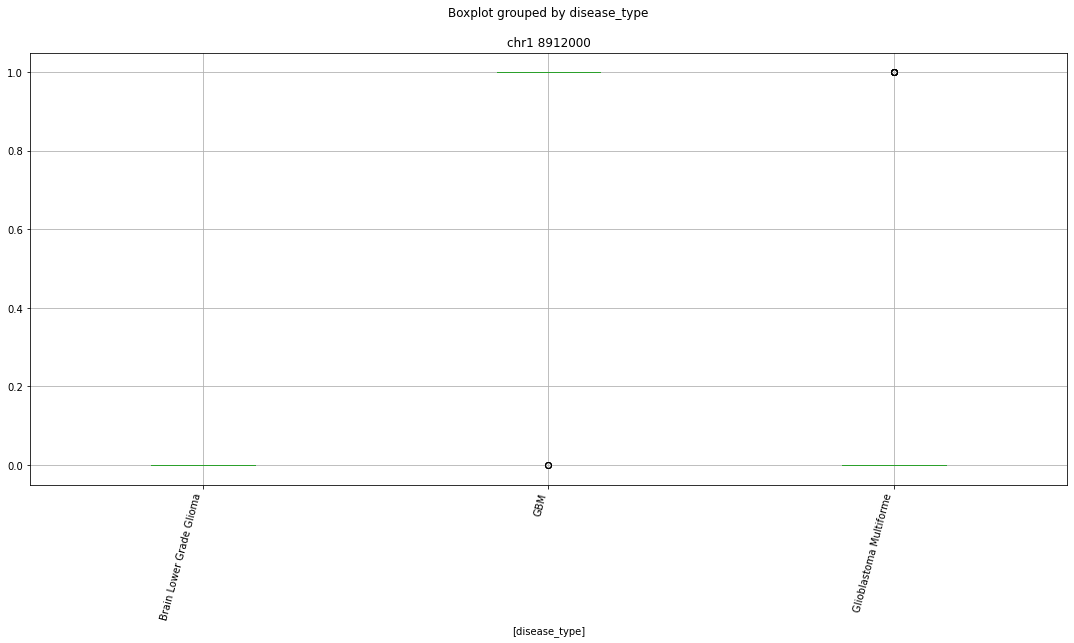

 p : 4.246227838271226e-16  ( t : 11.730463485510947 ) :  chr11 3398000


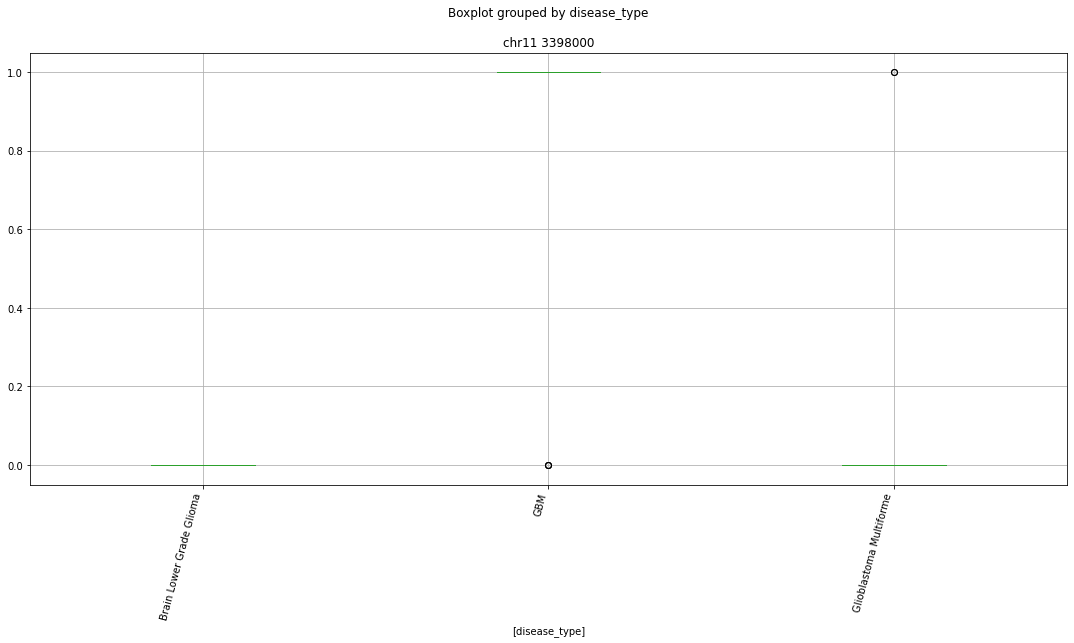

 p : 5.97829993619947e-16  ( t : 11.623581854721554 ) :  chr3 136724000


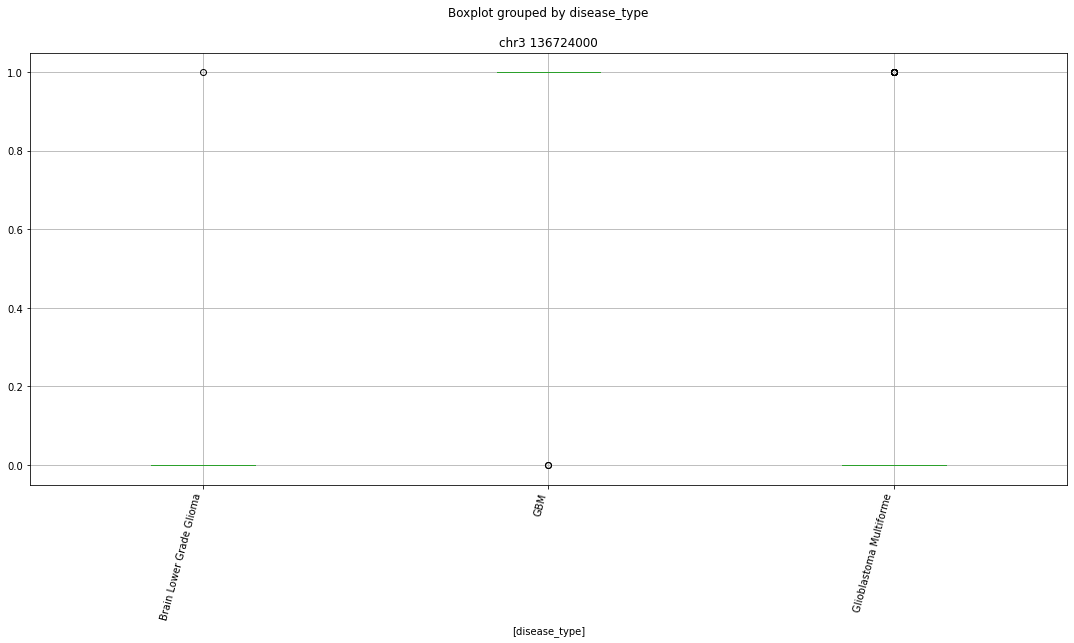

 p : 5.97829993619947e-16  ( t : 11.623581854721554 ) :  chr2 11164000


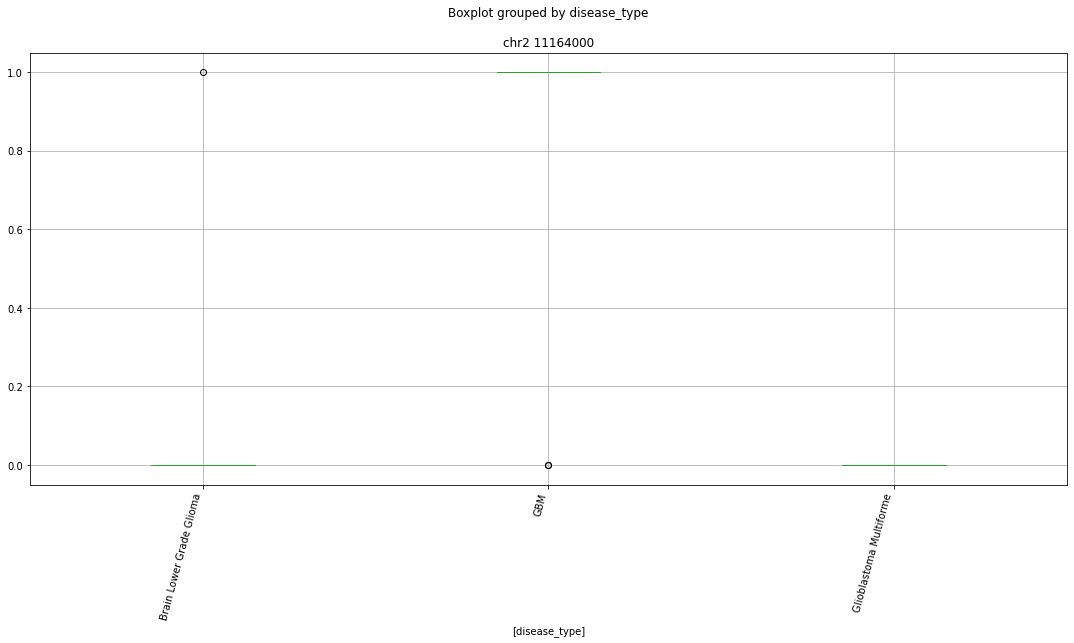

 p : 5.97829993619947e-16  ( t : 11.623581854721554 ) :  chr1 147062000


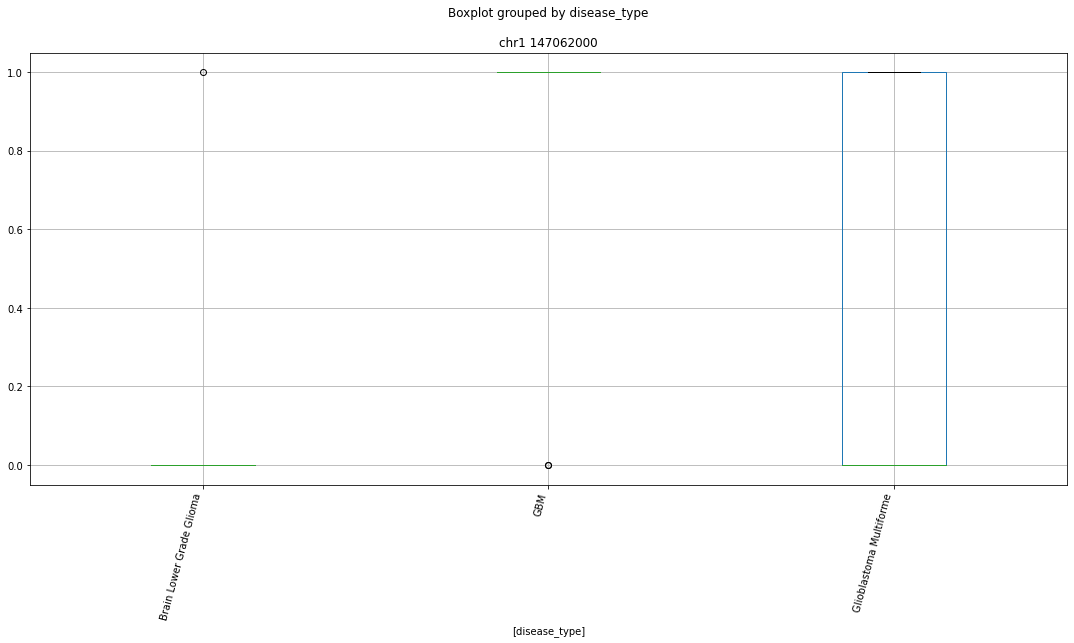

 p : 5.97829993619947e-16  ( t : 11.623581854721554 ) :  chr13 100618000


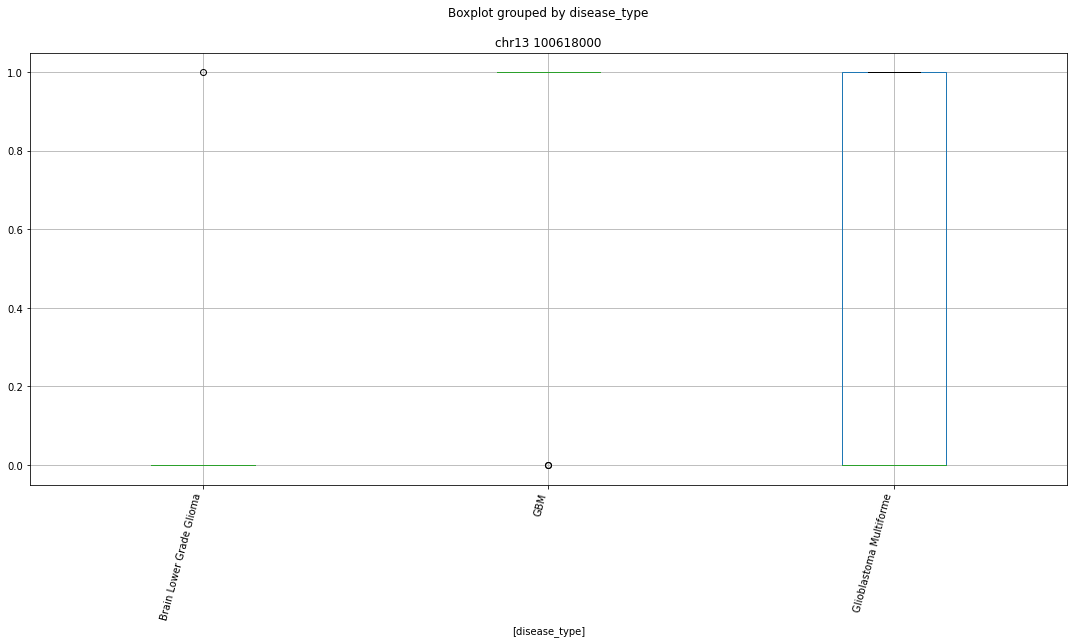

Clustermapping
['chr1 10029000' 'chr1 106413000' 'chr1 108161000' ... 'chrY 8917000'
 'disease_type' 'subject']


/Users/jakewendt/Library/Python/3.8/lib/python/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


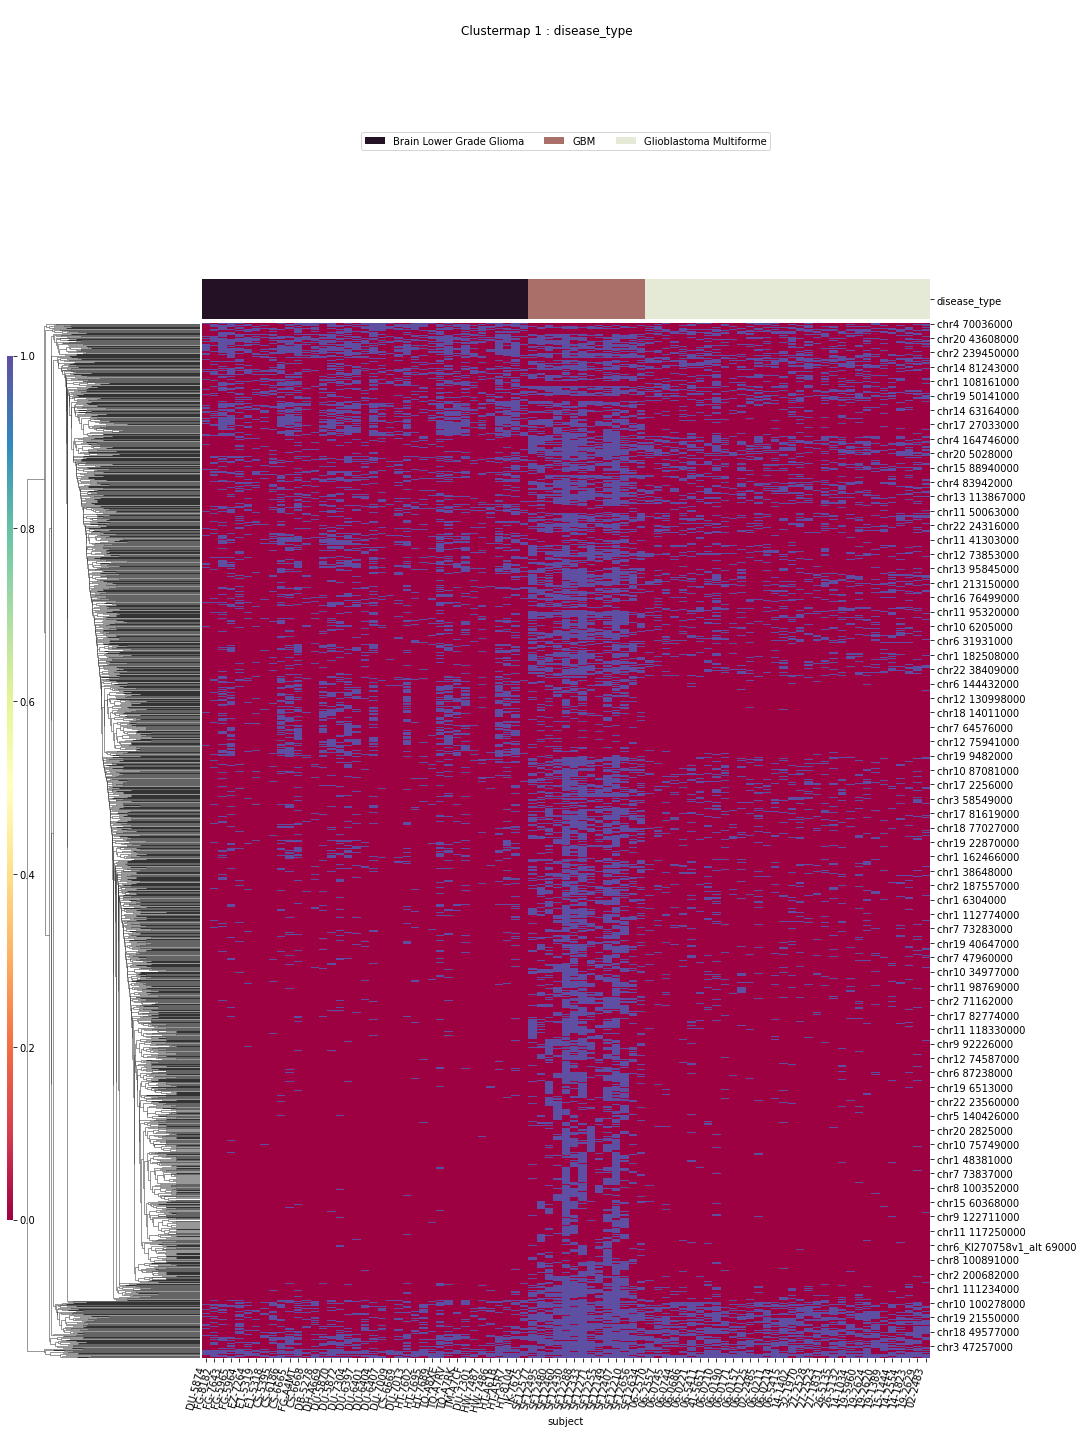

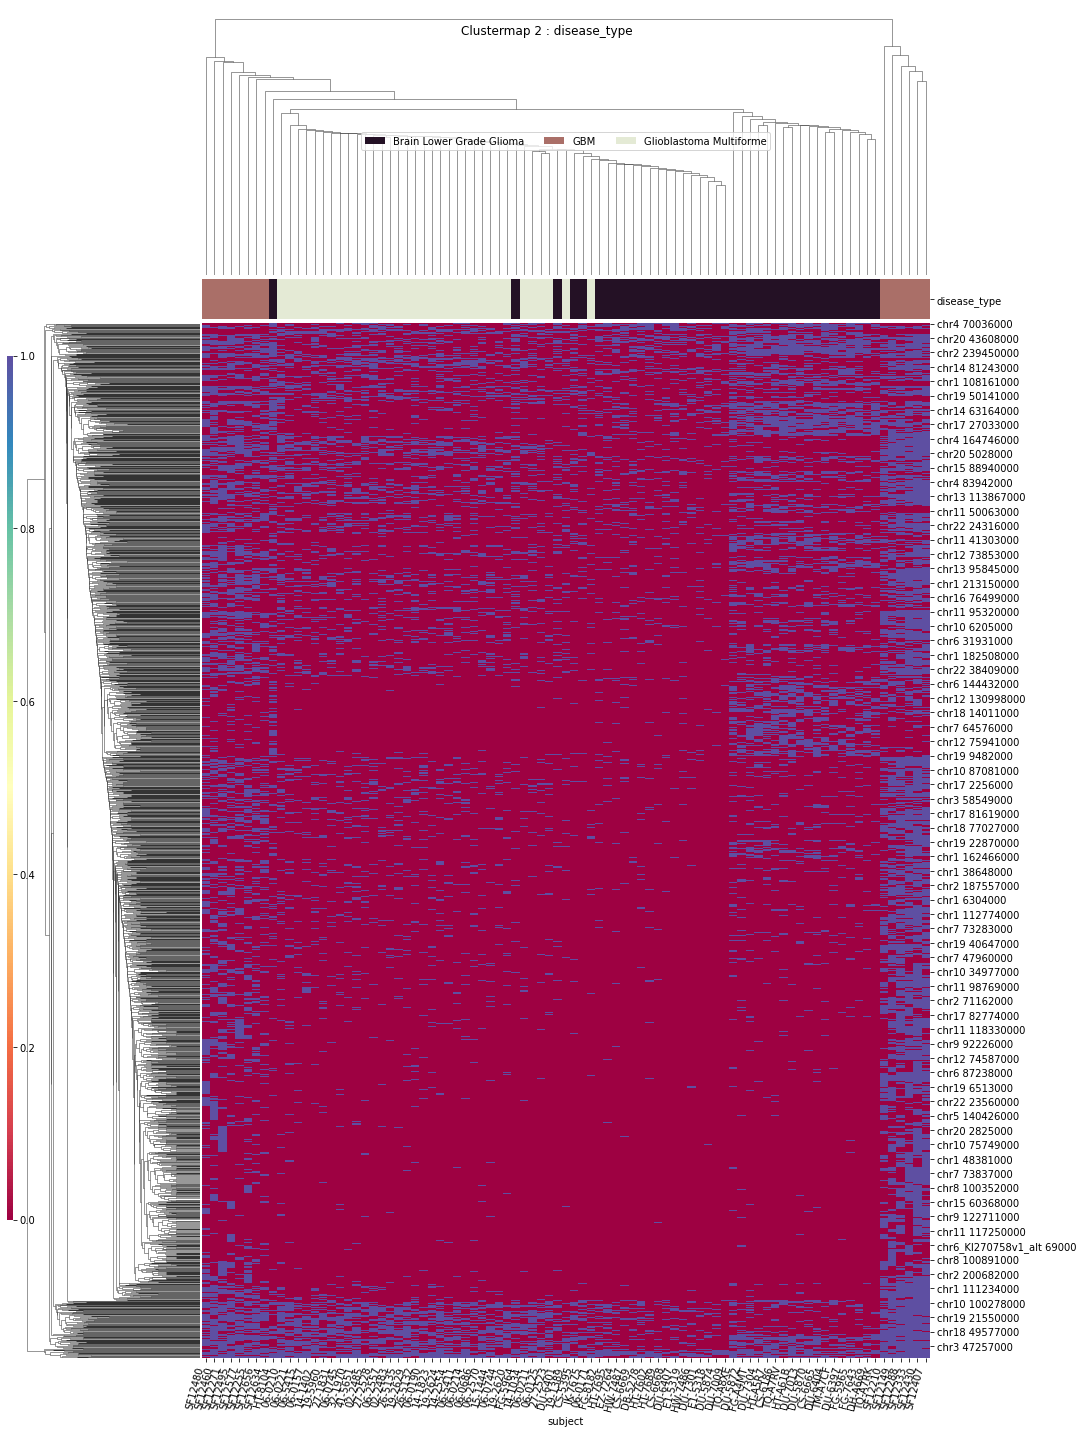

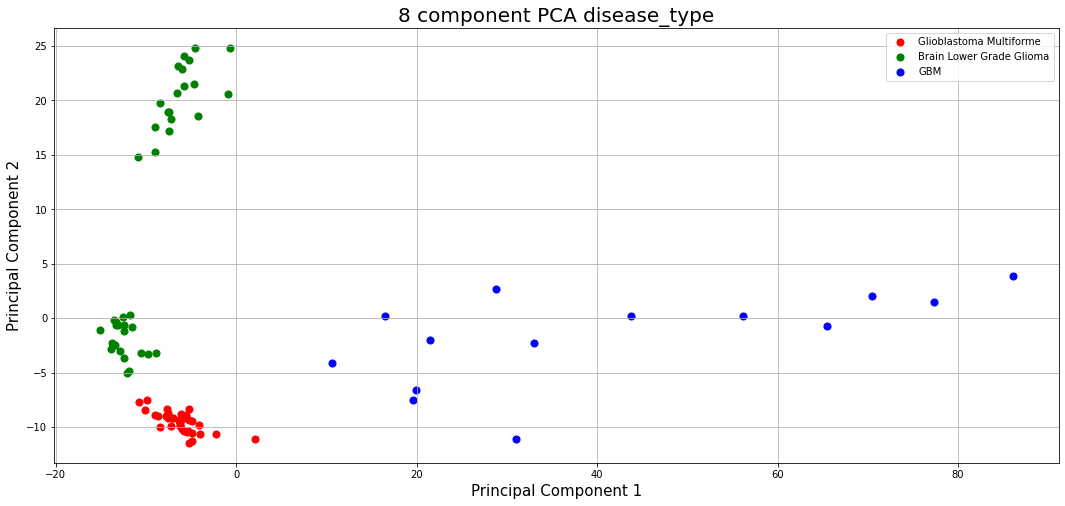

In [148]:
for column in ['disease_type']:
    print(column)
    ttests_boxplots_and_heatmaps(both_binary_df,
        both_binary_df.columns[both_binary_df.columns.str.contains("^chr")],column,box_p=1e-15,heat_p=0.01)
    

In [149]:
datetime.now().strftime("%Y%m%d %H:%M:%S")

'20210610 12:18:05'

disease_type
T-Testing
Boxplotting
 p : 2.8371647709053813e-21  ( t : 15.78690644471993 ) :  chr17 5143000


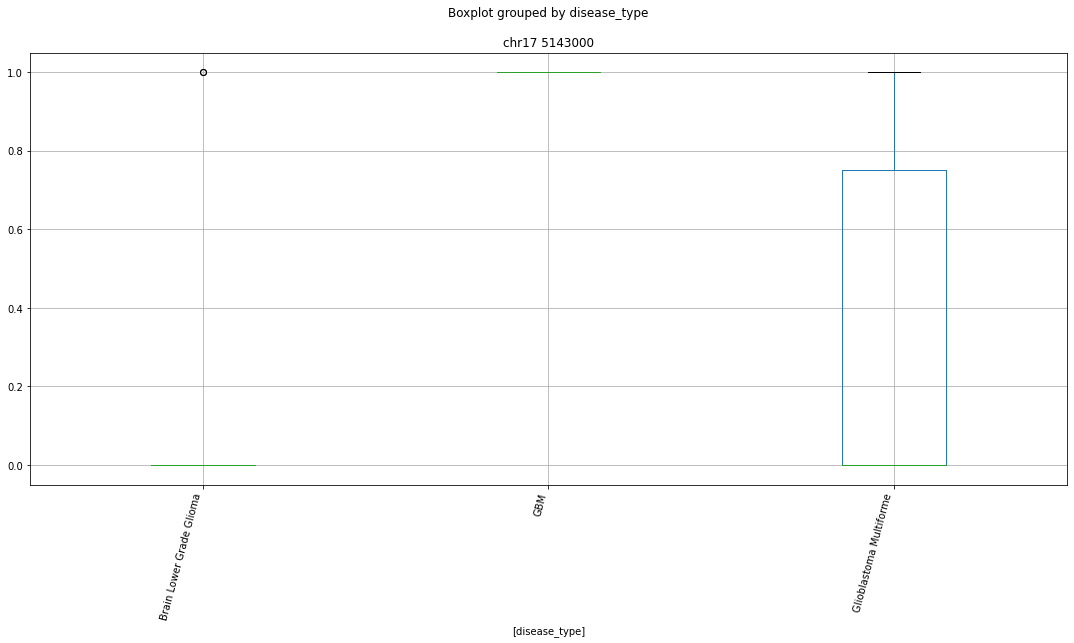

 p : 2.4075104891809472e-20  ( t : 15.005659309765589 ) :  chr14 58589000


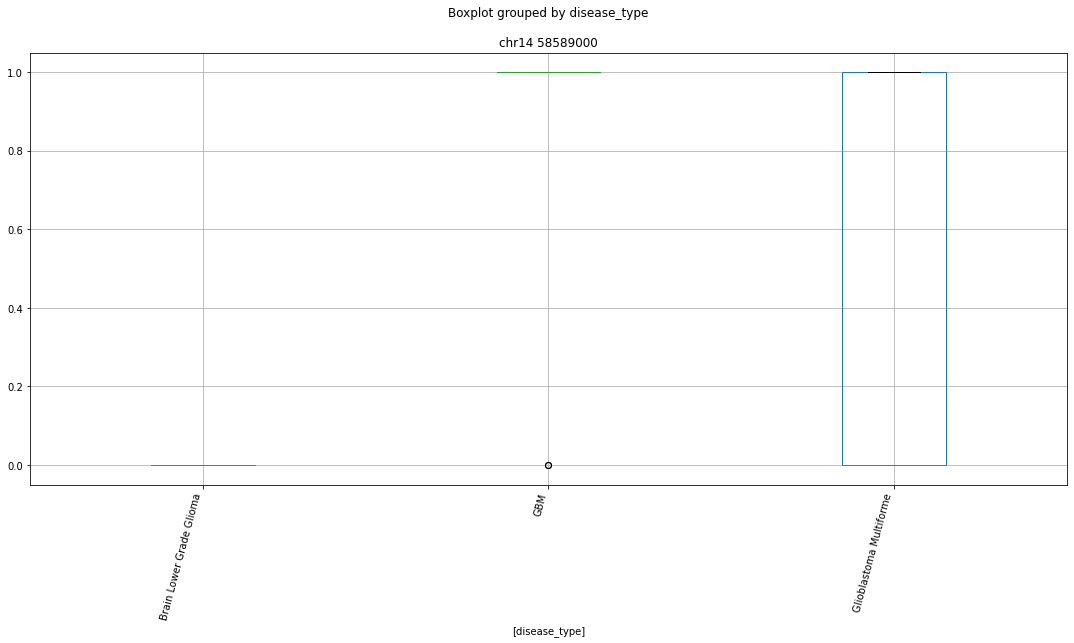

 p : 2.4075104891809472e-20  ( t : 15.005659309765589 ) :  chr2 3365000


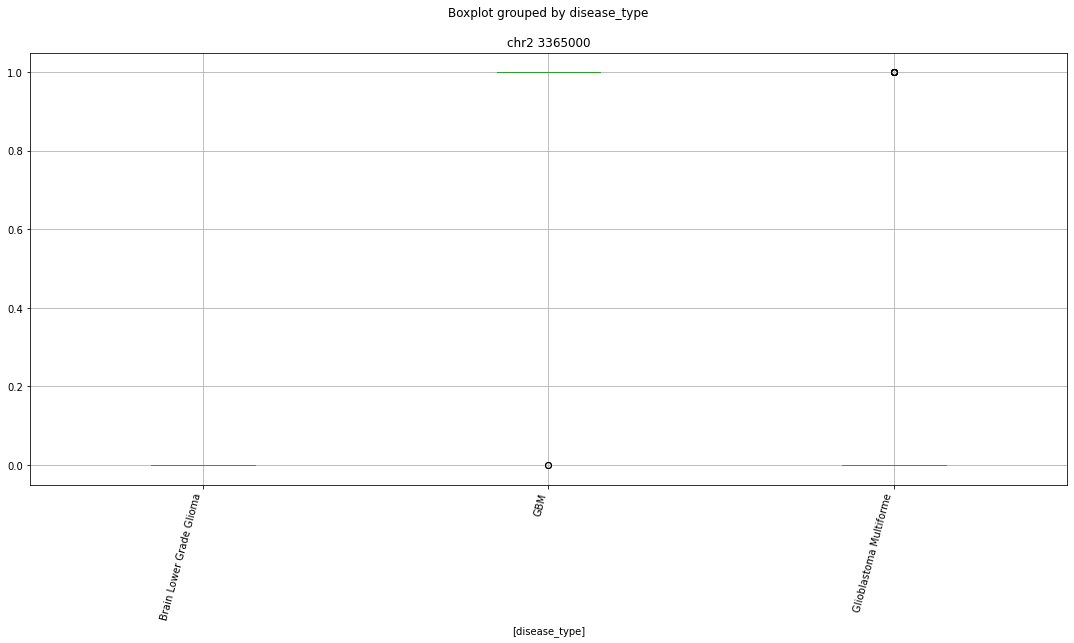

 p : 2.4075104891809472e-20  ( t : 15.005659309765589 ) :  chr9 6808000


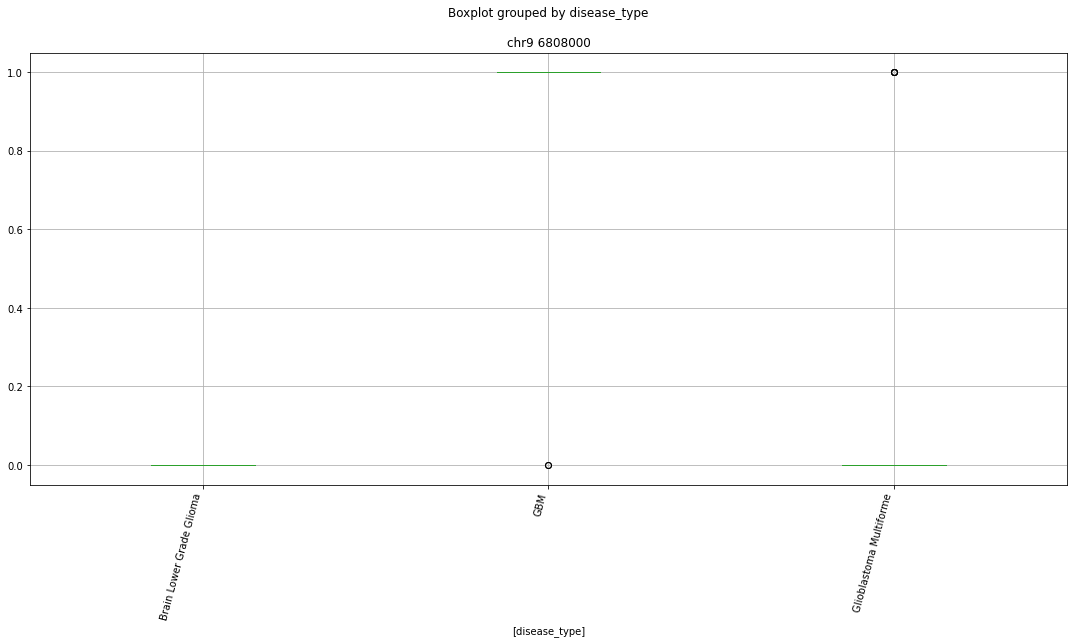

 p : 2.4075104891809472e-20  ( t : 15.005659309765589 ) :  chr12 37813000


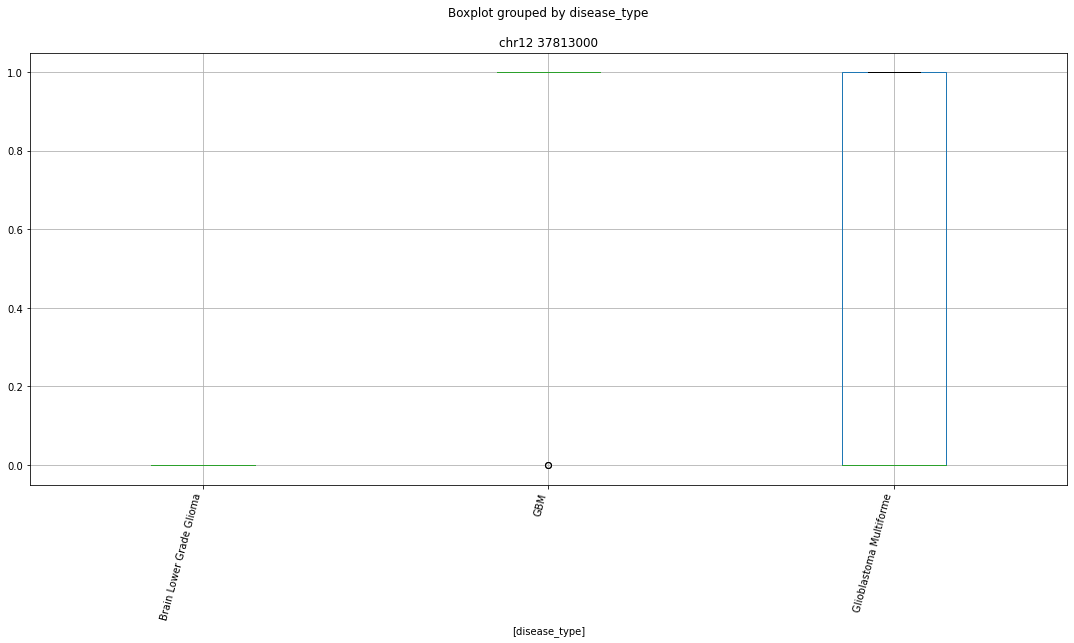

 p : 2.4075104891809472e-20  ( t : 15.005659309765589 ) :  chr20 45645000


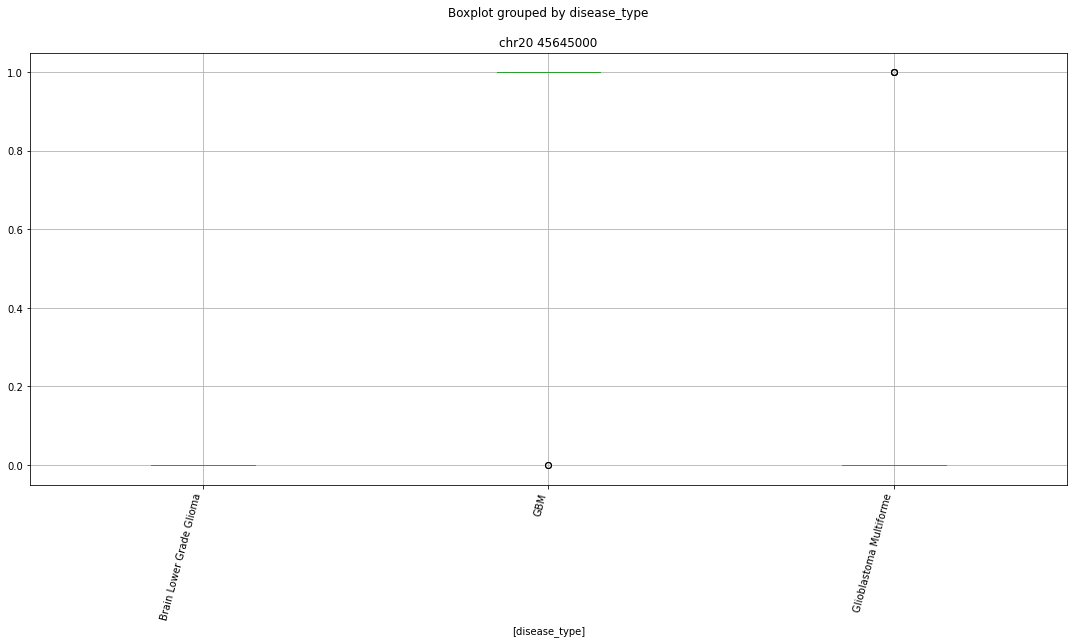

 p : 2.4075104891809472e-20  ( t : 15.005659309765589 ) :  chr10 70686000


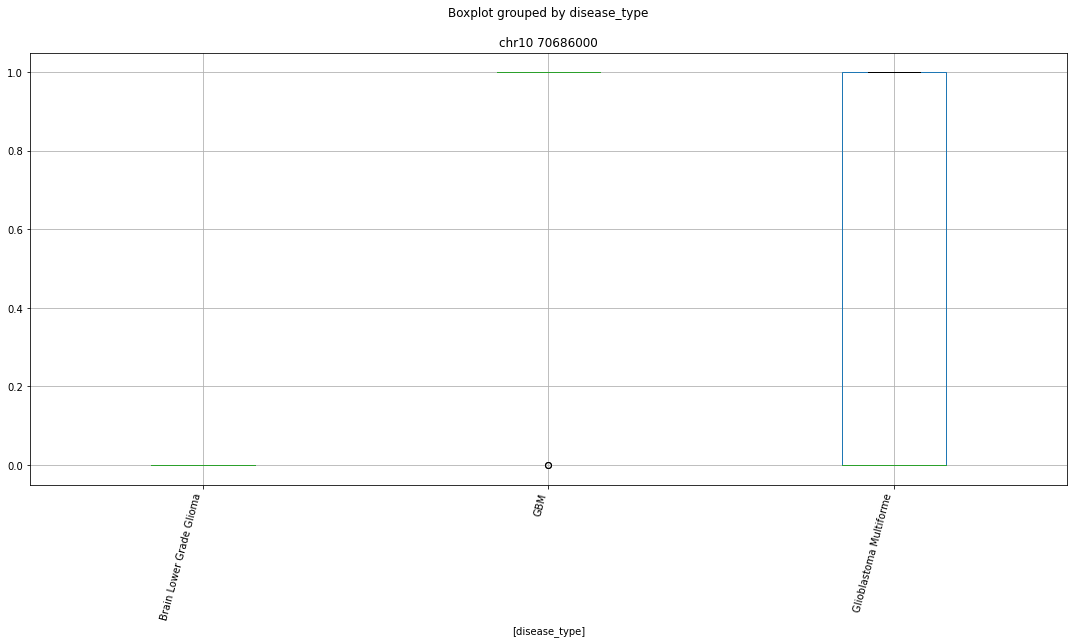

 p : 2.4234851722849214e-20  ( t : 15.003282913852896 ) :  chr13 46514000


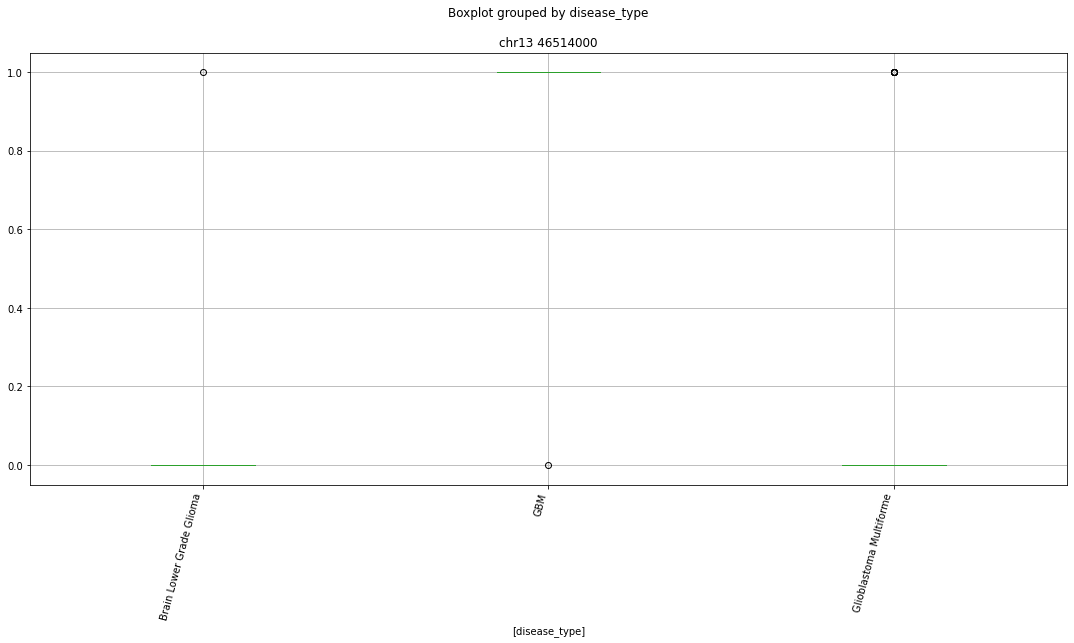

 p : 2.4234851722849214e-20  ( t : 15.003282913852896 ) :  chr16 89463000


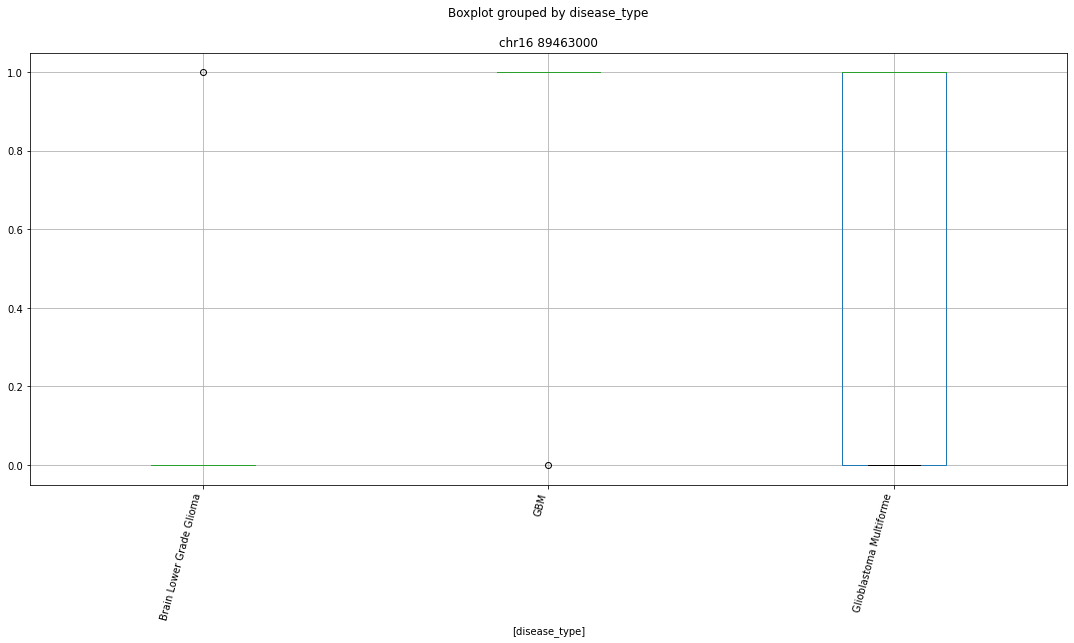

 p : 6.052106007130139e-19  ( t : 14.65150731722394 ) :  chr14 90445000


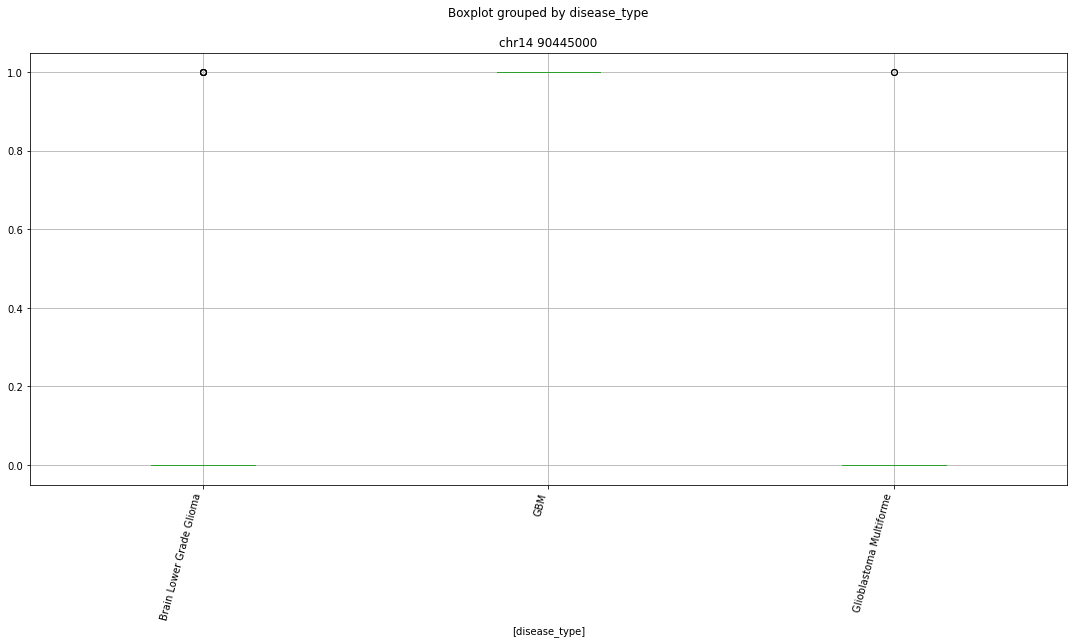

 p : 3.5344159057936754e-18  ( t : 13.982131454109561 ) :  chr16 31170000


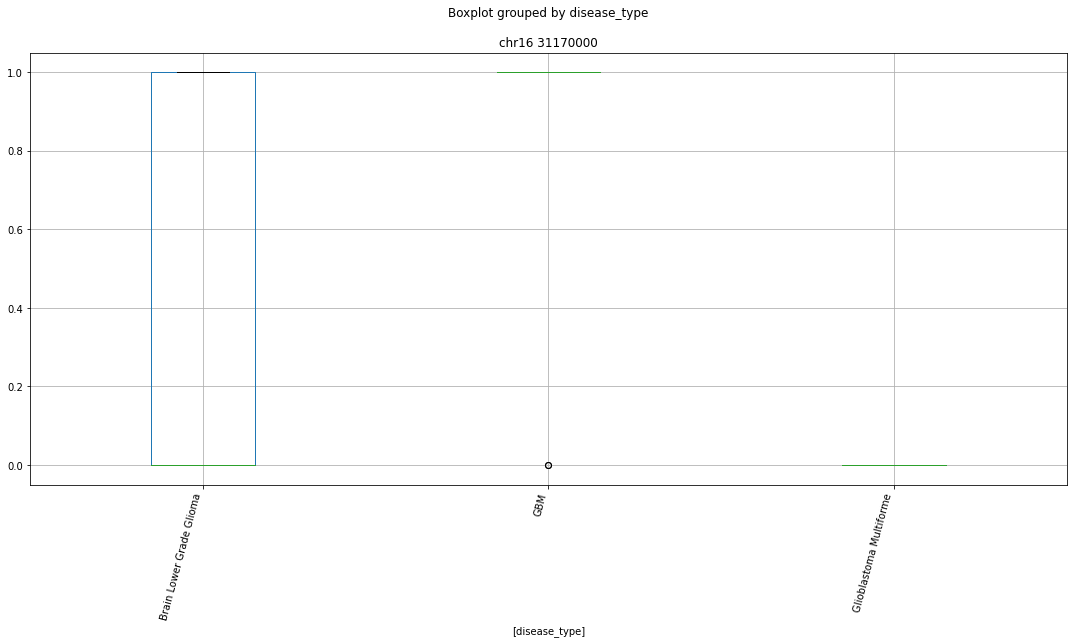

 p : 3.5344159057936754e-18  ( t : 13.982131454109561 ) :  chr2 11164000


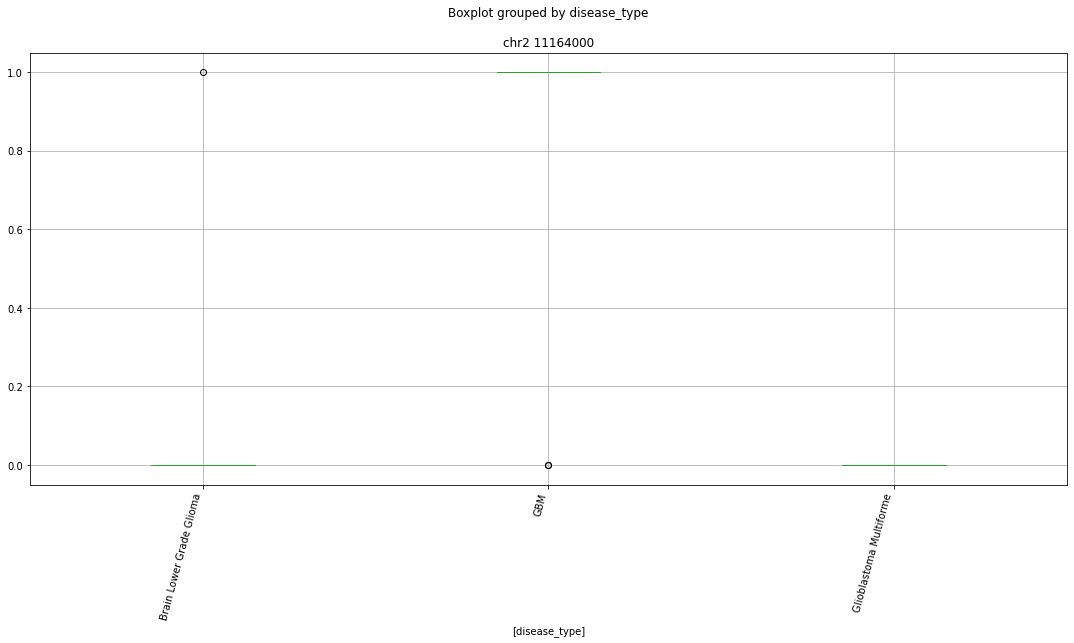

 p : 2.0346699265924837e-16  ( t : 11.961887225105135 ) :  chr11 124705000


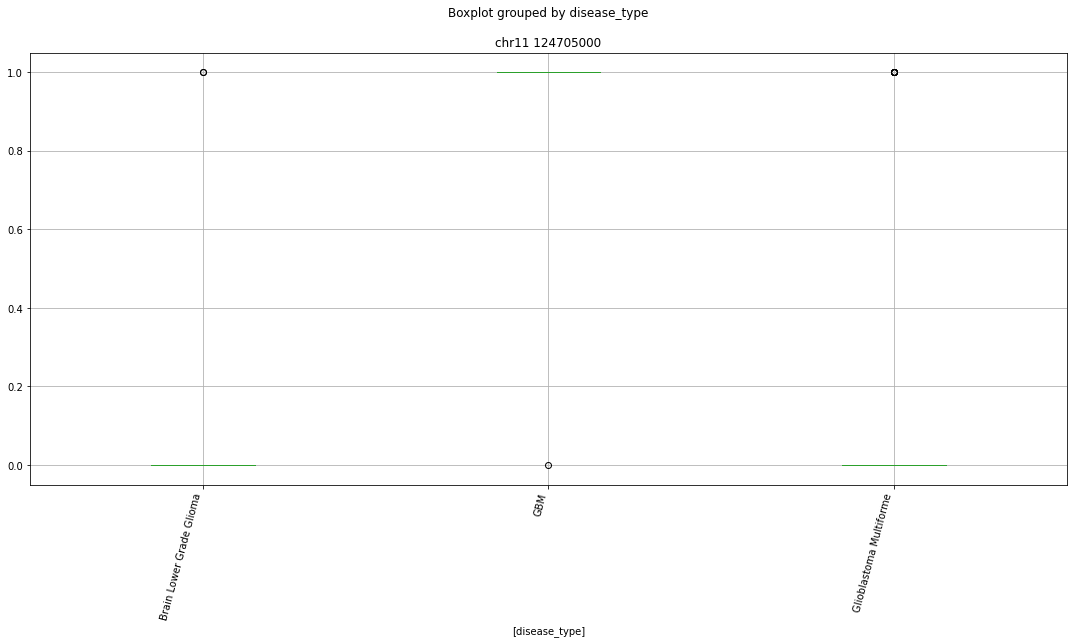

 p : 2.0346699265925125e-16  ( t : 11.961887225105132 ) :  chr20 32121000


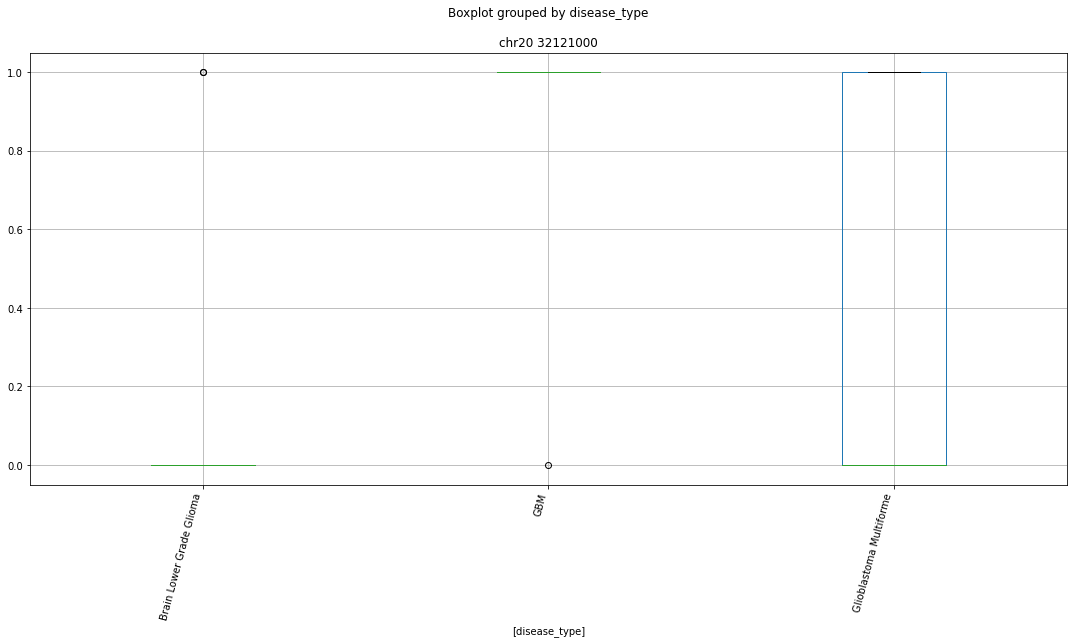

 p : 2.0346699265925125e-16  ( t : 11.961887225105132 ) :  chr2 186153000


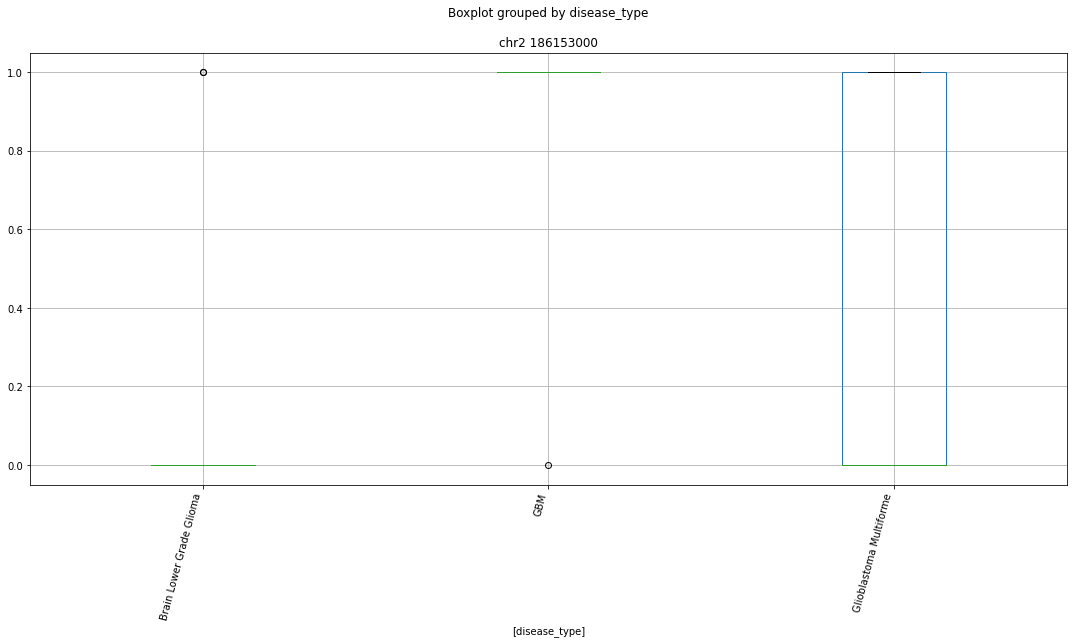

 p : 2.0346699265925125e-16  ( t : 11.961887225105132 ) :  chr17 27034000


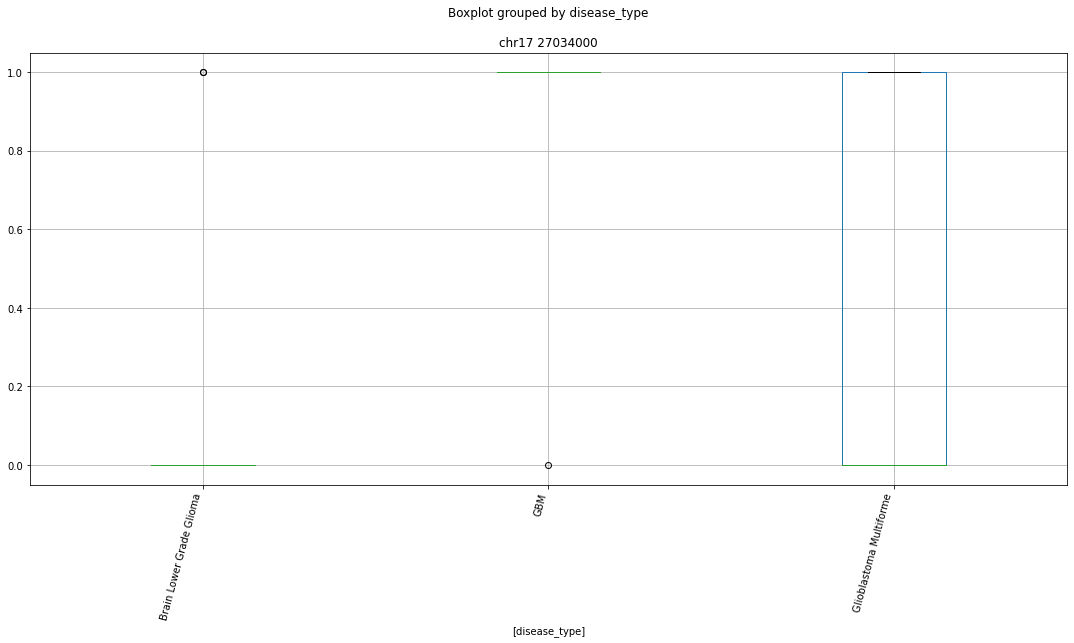

 p : 4.2462278382711956e-16  ( t : 11.730463485510949 ) :  chr1 111800000


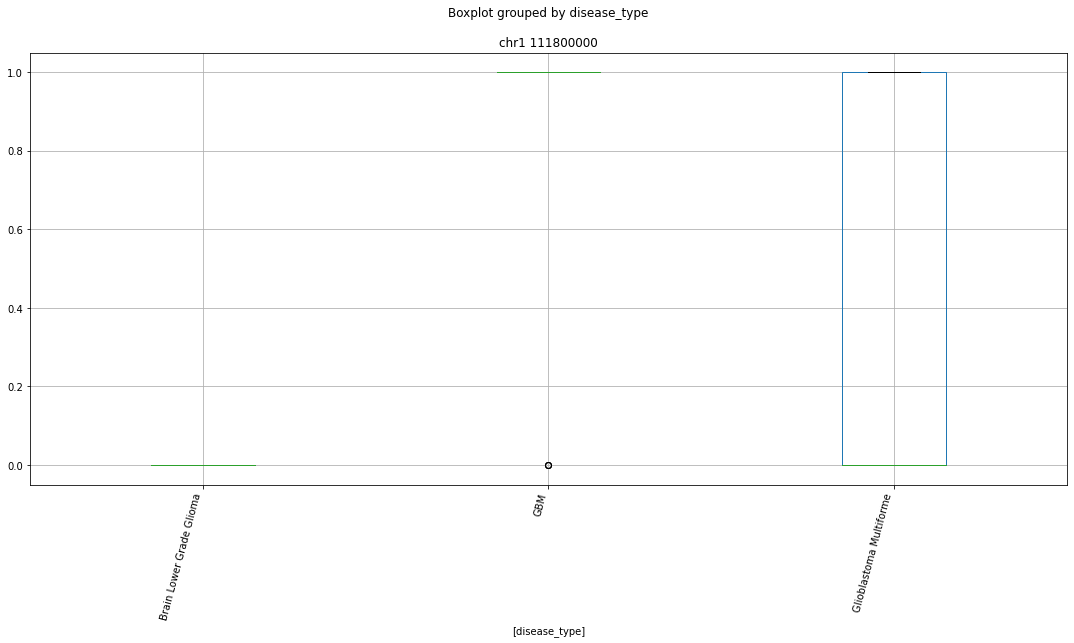

 p : 4.2462278382711956e-16  ( t : 11.730463485510949 ) :  chr1 21389000


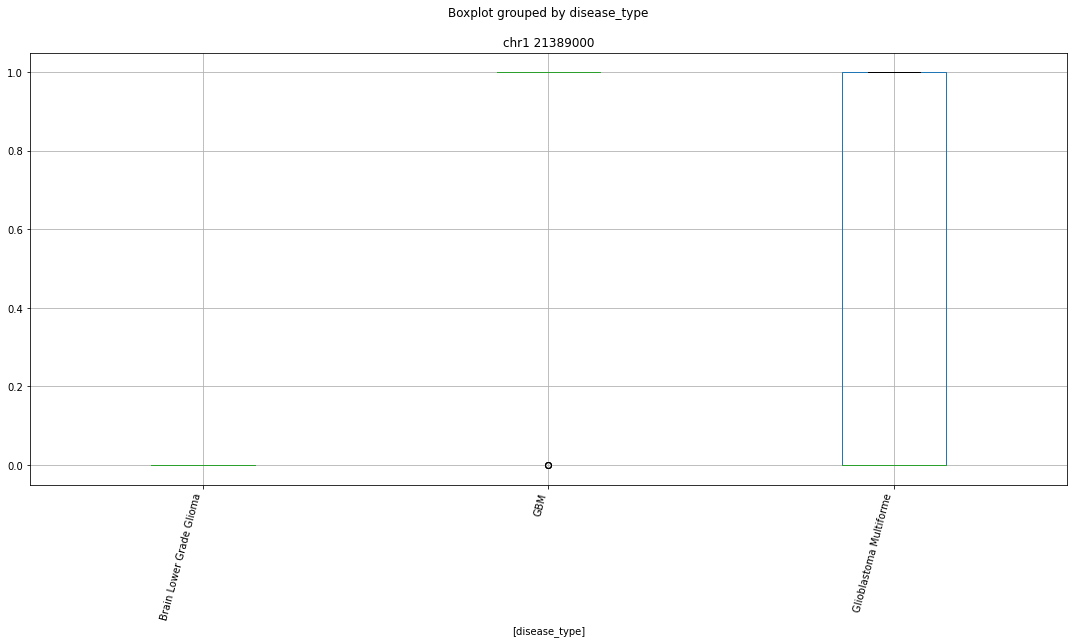

 p : 4.2462278382711956e-16  ( t : 11.730463485510949 ) :  chr2 233723000


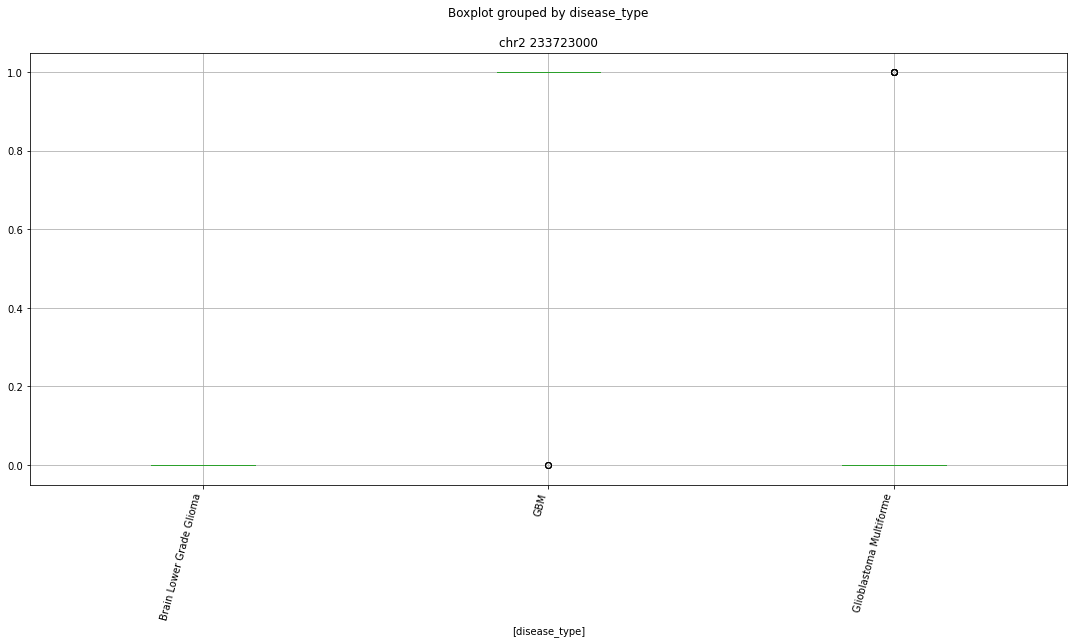

 p : 4.2462278382711956e-16  ( t : 11.730463485510949 ) :  chr2 143992000


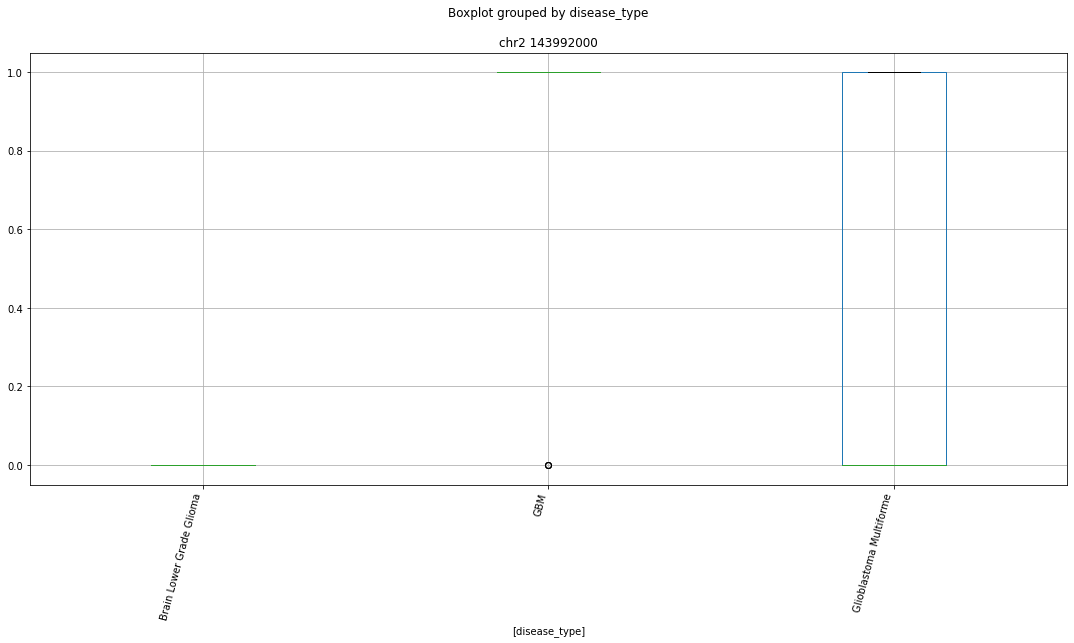

 p : 4.2462278382711956e-16  ( t : 11.730463485510949 ) :  chr5 142074000


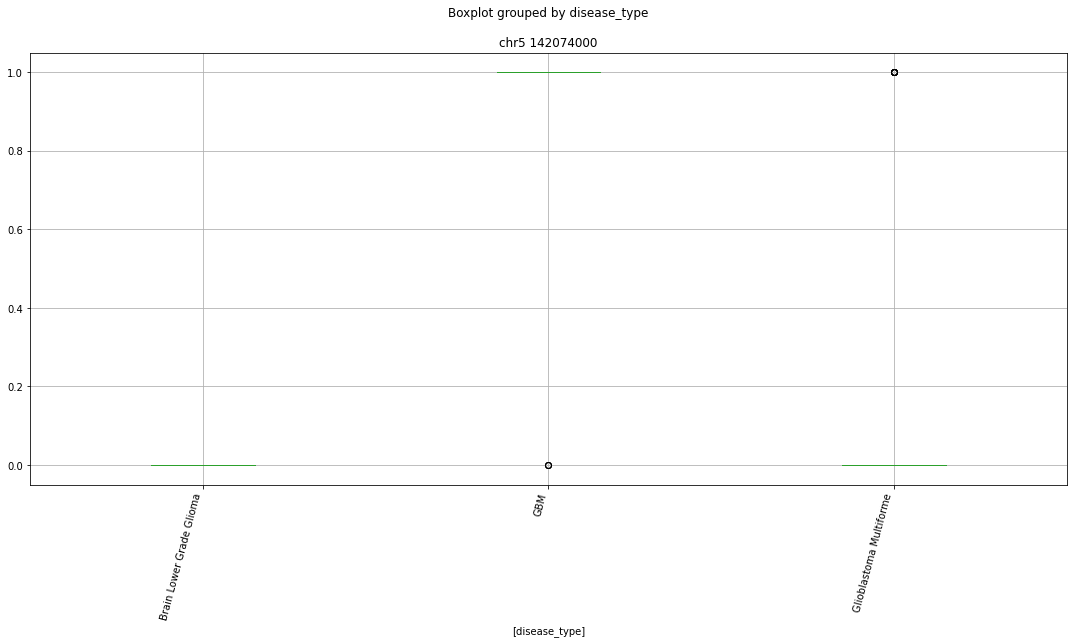

 p : 4.246227838271226e-16  ( t : 11.730463485510947 ) :  chr12 48915000


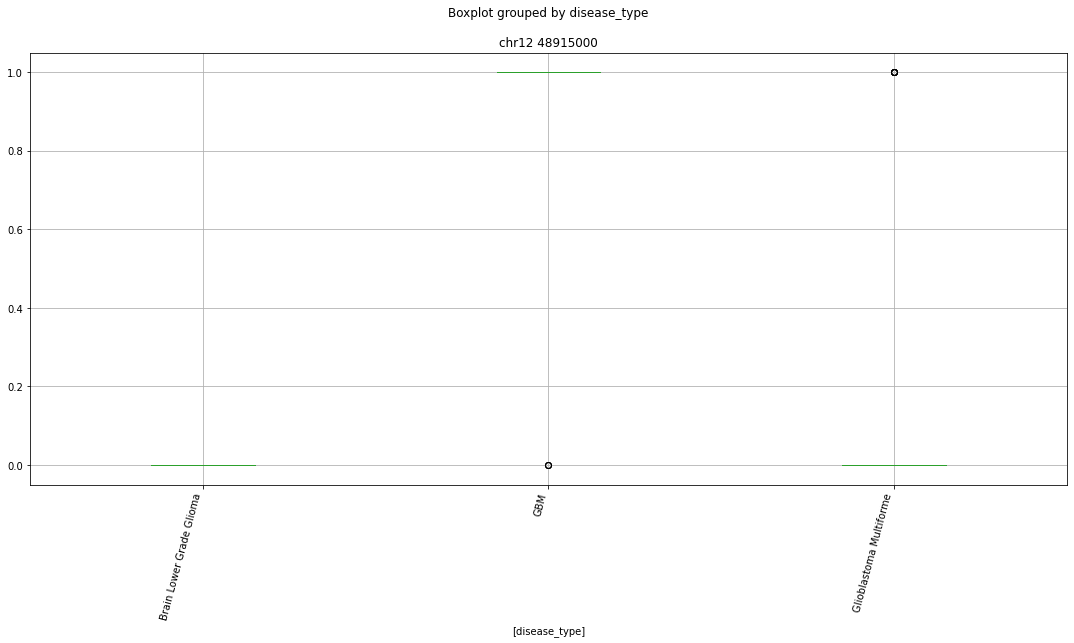

 p : 4.246227838271226e-16  ( t : 11.730463485510947 ) :  chr19 23532000


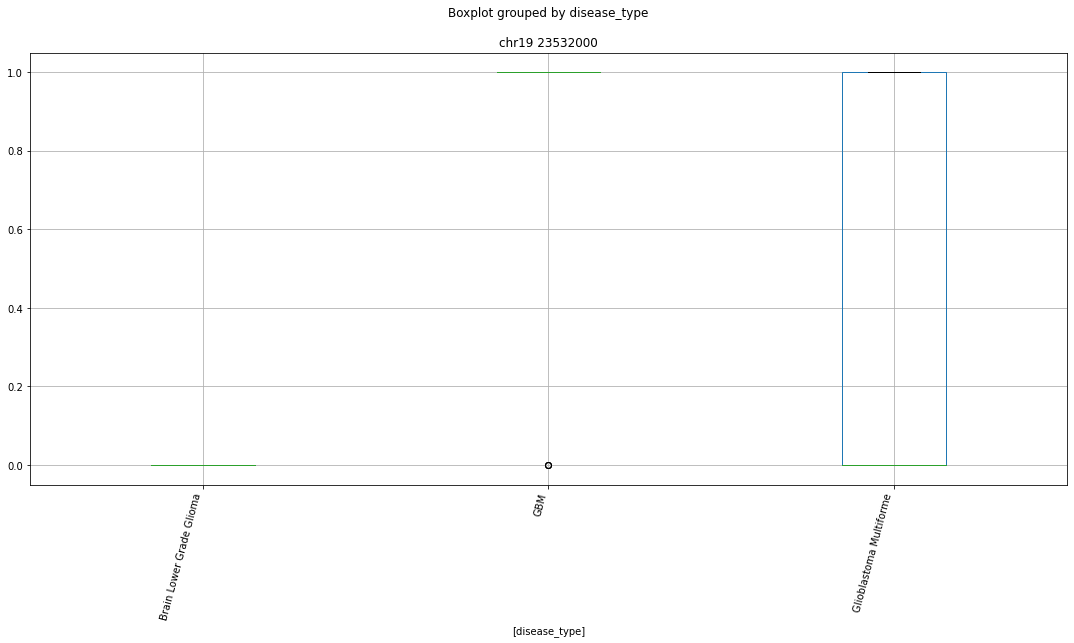

 p : 4.246227838271226e-16  ( t : 11.730463485510947 ) :  chr1 8912000


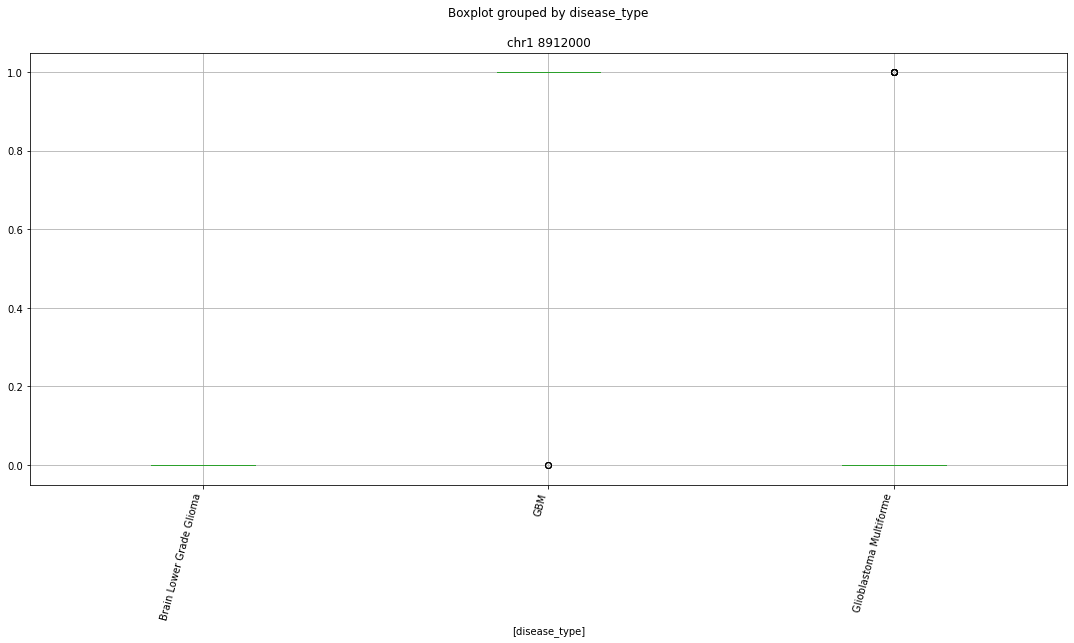

 p : 4.246227838271226e-16  ( t : 11.730463485510947 ) :  chr11 3398000


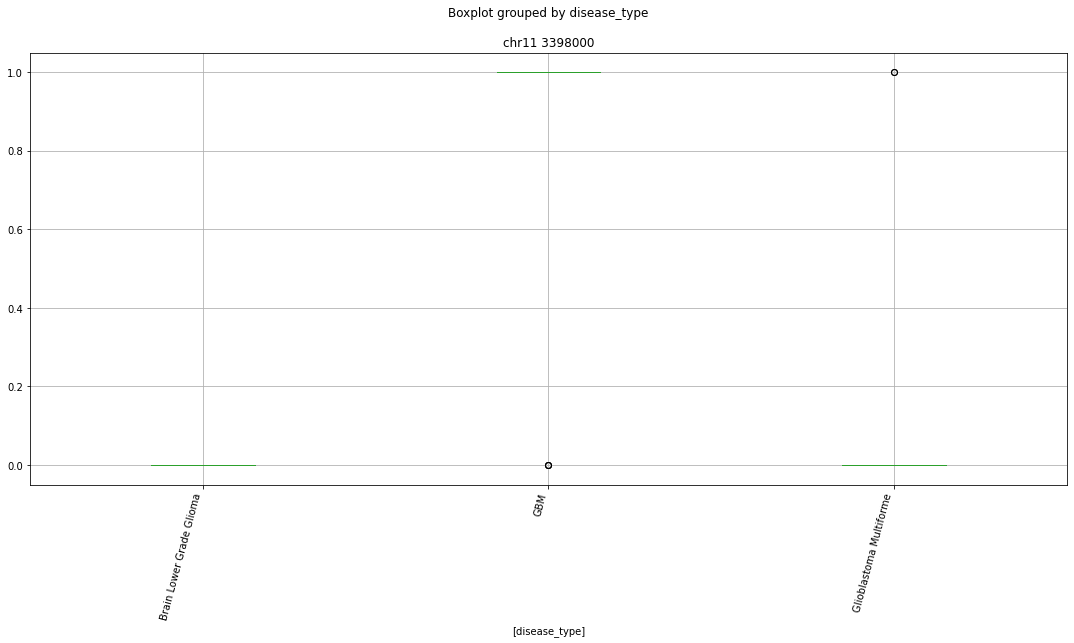

 p : 4.246227838271226e-16  ( t : 11.730463485510947 ) :  chr11 60492000


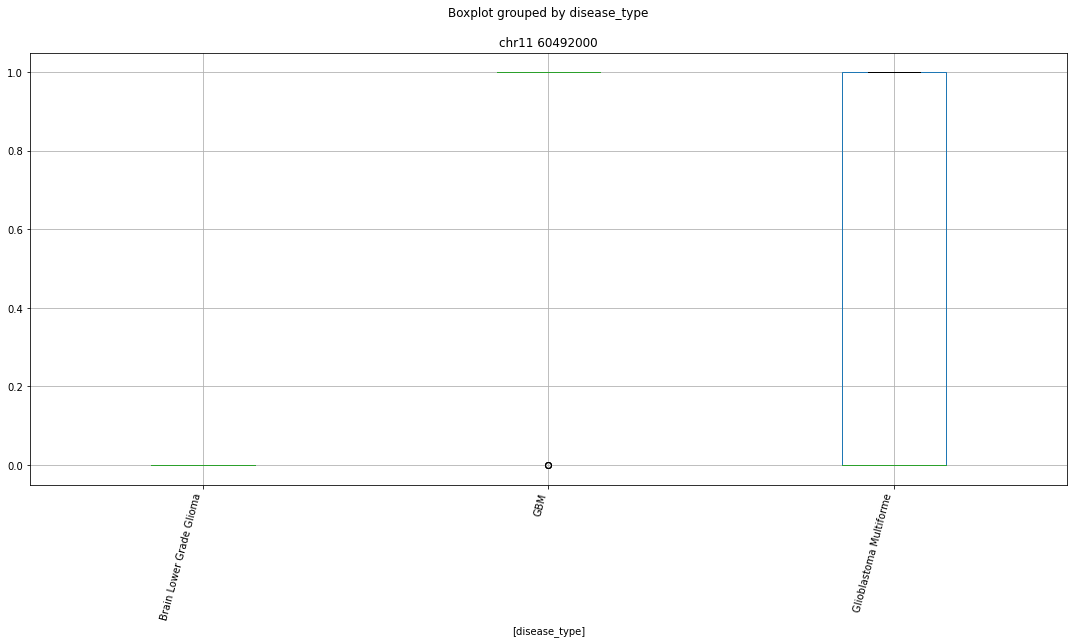

 p : 5.97829993619947e-16  ( t : 11.623581854721554 ) :  chr13 100618000


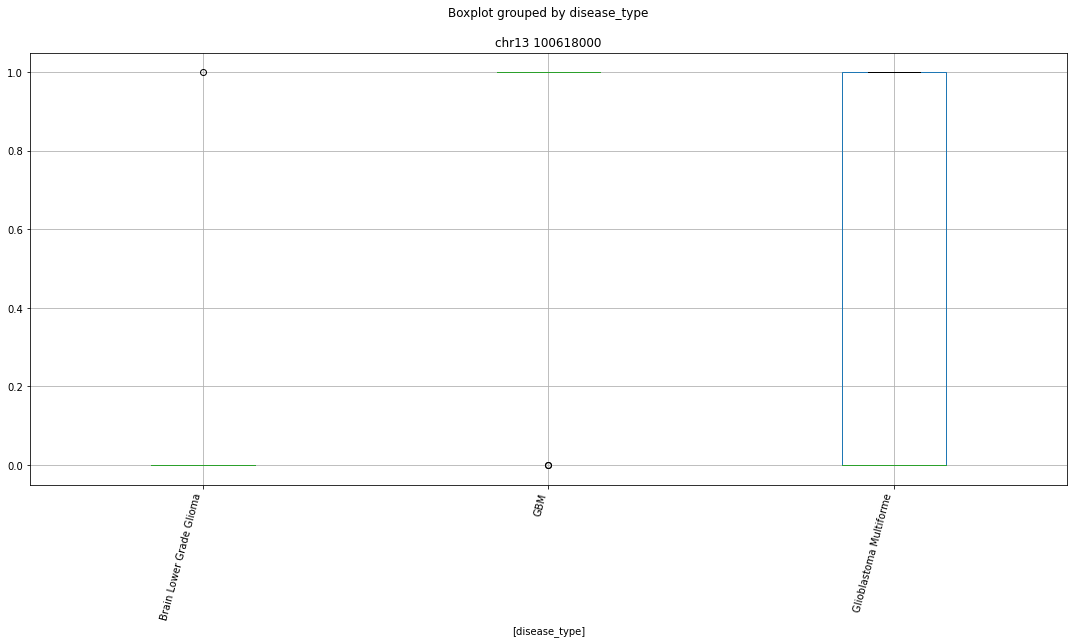

 p : 5.97829993619947e-16  ( t : 11.623581854721554 ) :  chr1 147062000


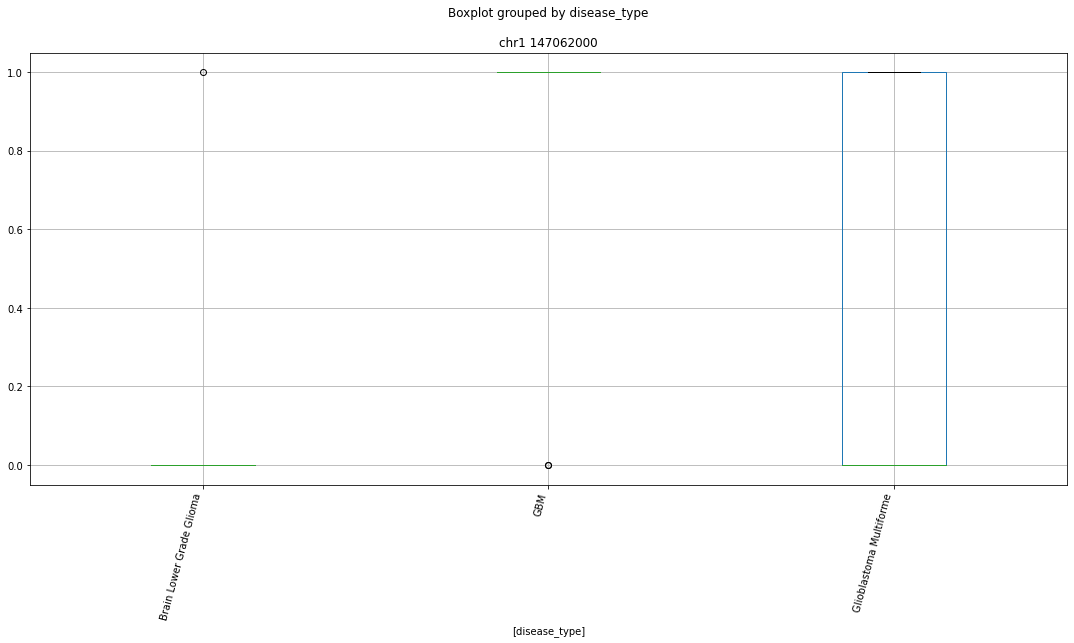

 p : 5.97829993619947e-16  ( t : 11.623581854721554 ) :  chr2 11164000


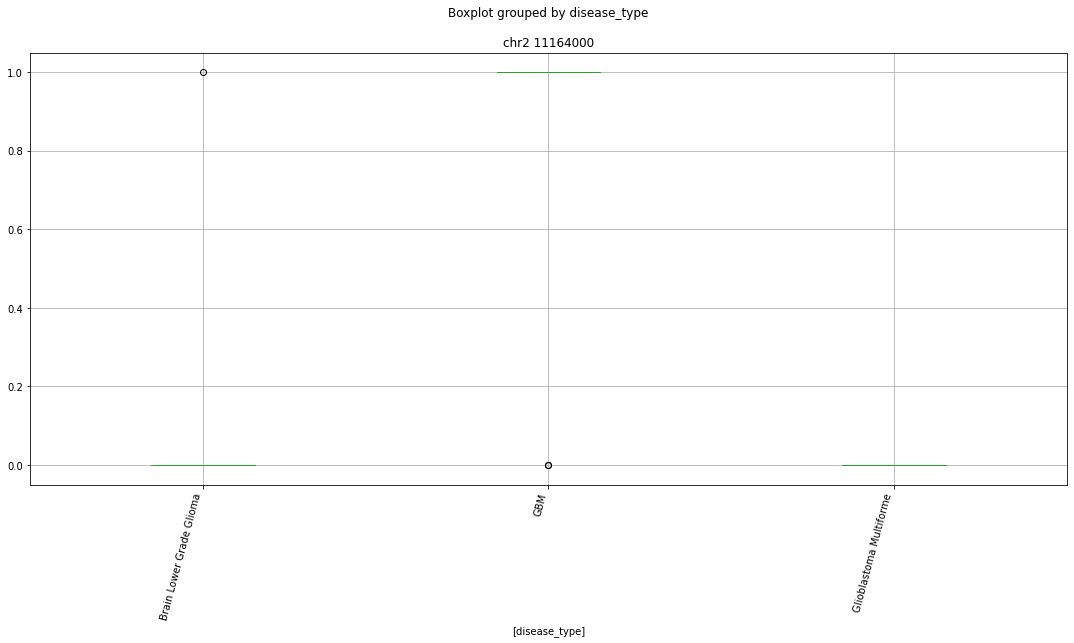

 p : 5.97829993619947e-16  ( t : 11.623581854721554 ) :  chr3 136724000


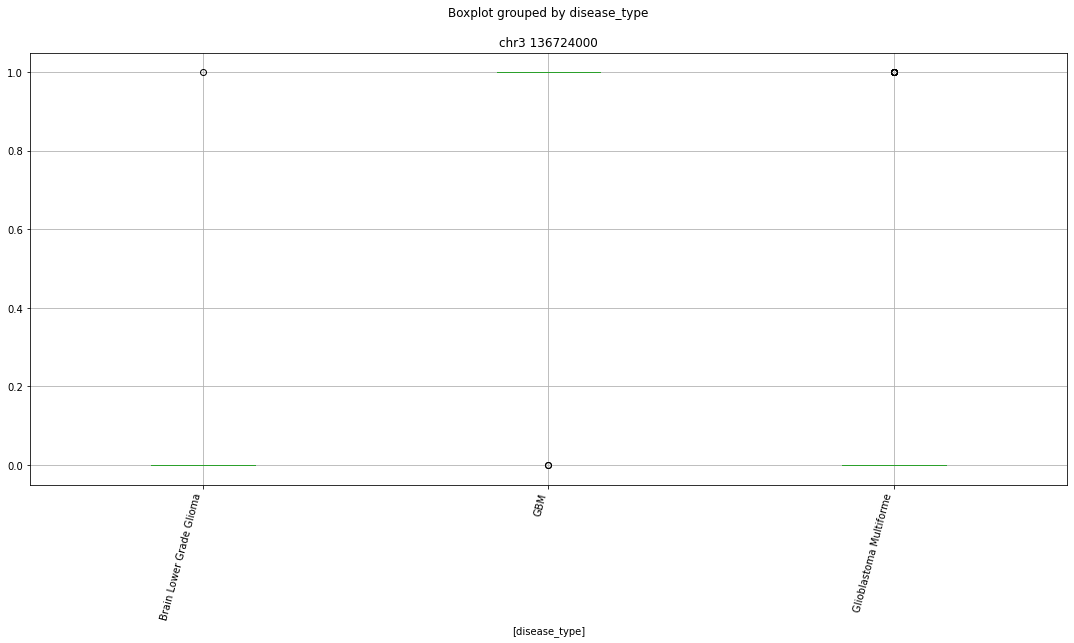

Clustermapping
['chr1 10029000' 'chr1 108675000' 'chr1 108676000' ... 'chrY 8917000'
 'disease_type' 'subject']


/Users/jakewendt/Library/Python/3.8/lib/python/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


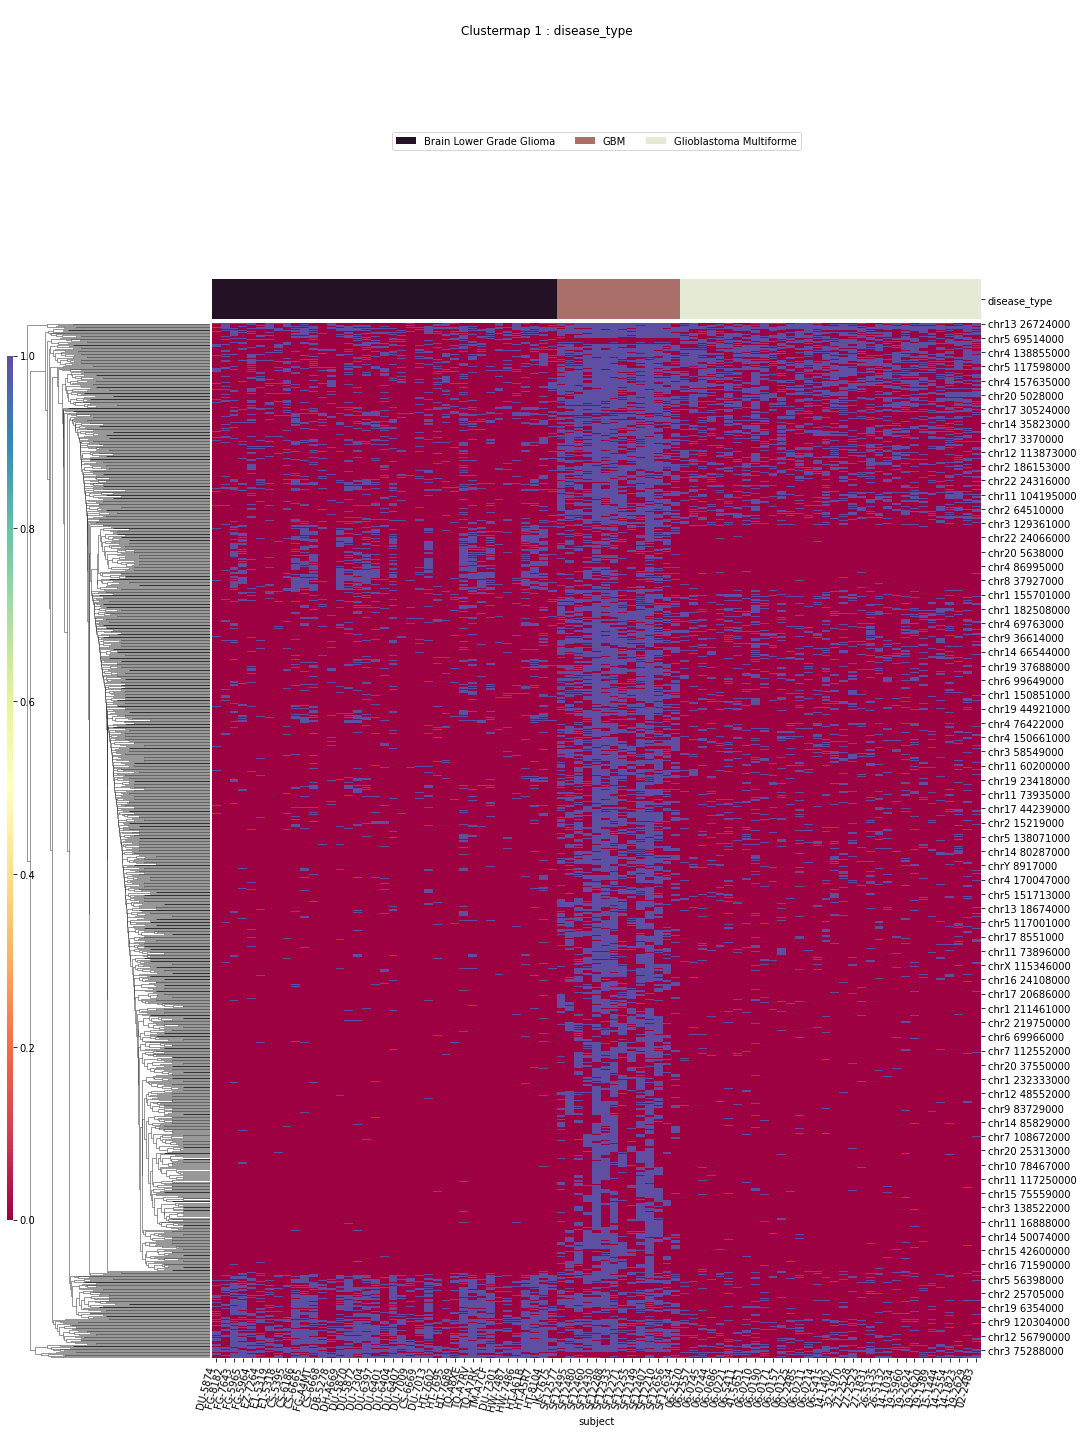

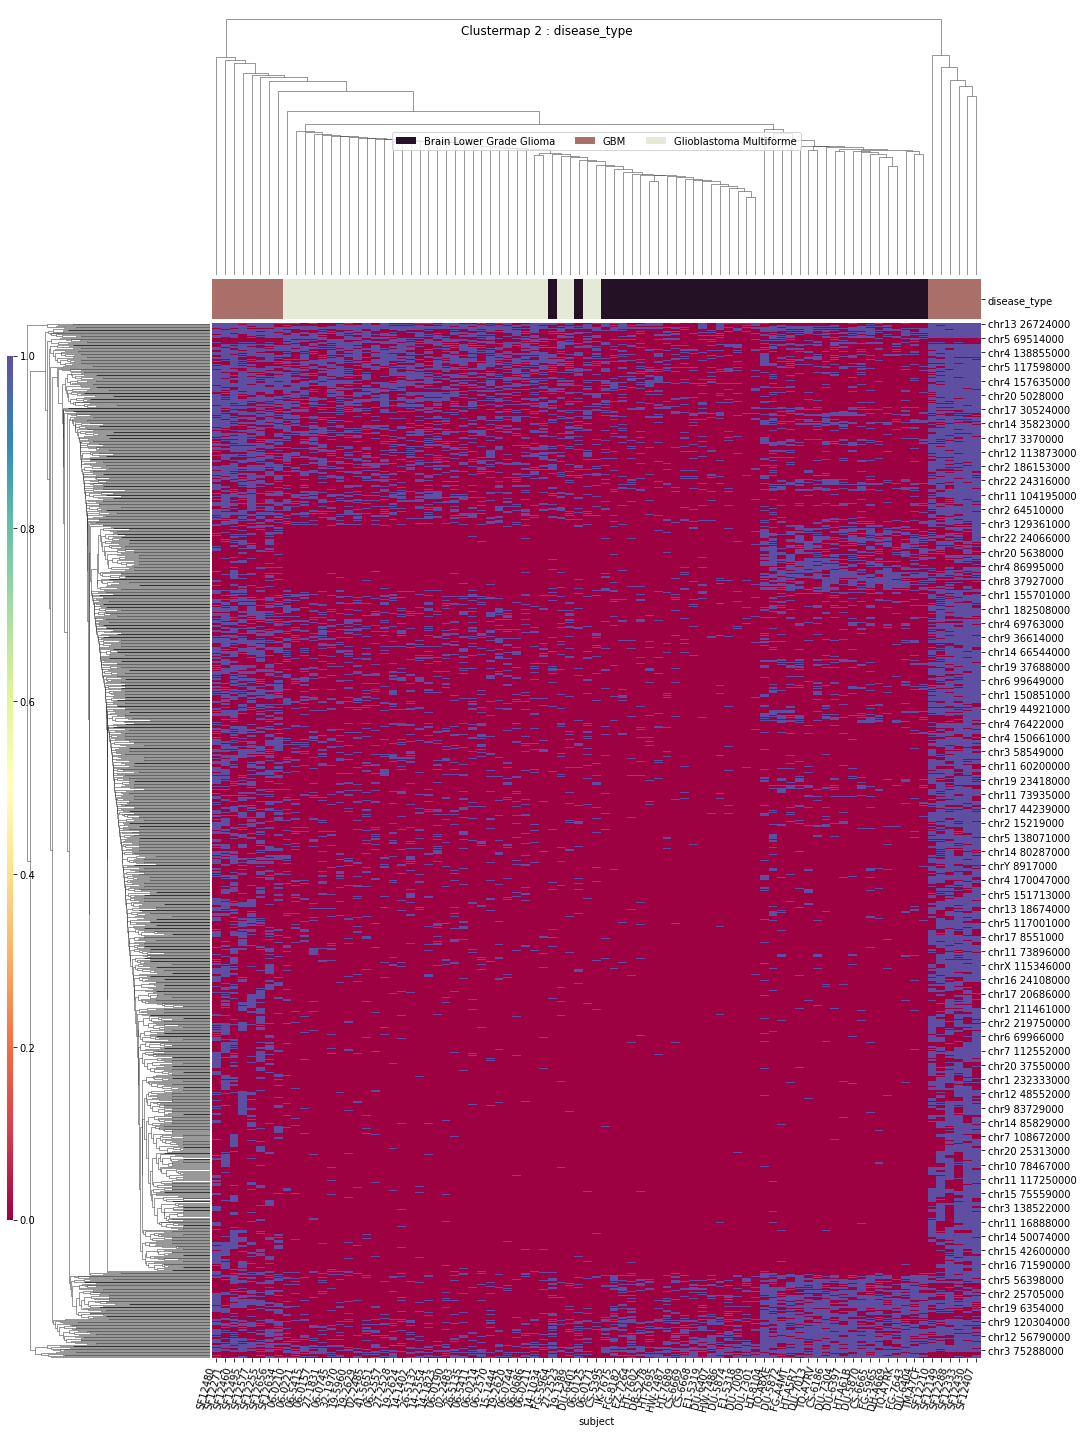

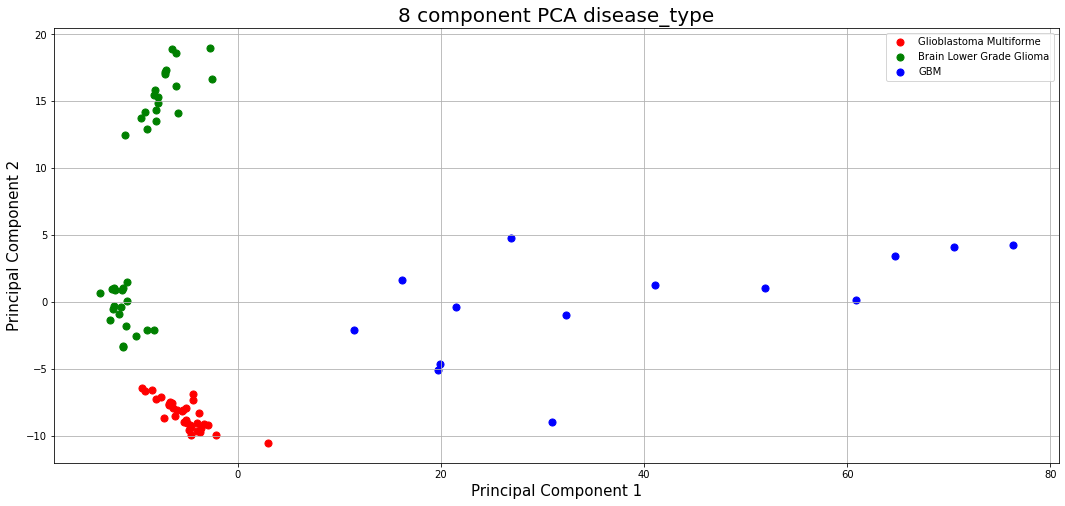

In [150]:
for column in ['disease_type']:
    print(column)
    ttests_boxplots_and_heatmaps(both_binary_df,
        both_binary_df.columns[both_binary_df.columns.str.contains("^chr")],column,box_p=1e-15,heat_p=0.001)
    

In [151]:
datetime.now().strftime("%Y%m%d %H:%M:%S")

'20210610 12:19:37'

---

In [152]:
plt.rcParams["figure.figsize"] = [18.0,8.0]

In [153]:
pd.set_option('display.max_columns', default_max_columns)

In [154]:
pd.set_option('display.max_rows',default_max_rows)

In [155]:
pd.set_option('display.precision', default_precision)